In [161]:
import glob,os,numpy as np

In [162]:
import glob,os,numpy as np
def get_pos(path):
    xml_file = os.path.dirname(path)+os.sep+os.path.basename(path).split('.')[0]+'.xml'
    x,y=0,0
    if os.path.exists(xml_file):
        txt = open(xml_file,'r').read()
        tag = '<stage_position type="custom">'
        x,y = eval(txt.split(tag)[-1].split('</')[0])
    return x,y

raw_fls = glob.glob(rf'S:\12_04_2025_JenieSample\H1_MER_set1\*.zarr')
dic_pos = {os.path.basename(fl.replace('.zarr','')):get_pos(fl) for fl in raw_fls}
    

In [10]:
len(dic_pos)

563

In [163]:
fls = np.sort(glob.glob(r'U:\MERFISHp\12_04_2025_JenieSample\mermake_fits\decodedNew_*--.npz'))[::-1]
len(fls)

563

In [164]:
fovs_compl = [fl.split('decodedNew_')[-1].split('--')[0] for fl in fls]

In [165]:
np.setdiff1d(list(dic_pos.keys()),fovs_compl)

array([], dtype='<U16')

In [ ]:
### Missing one fov: Conv_zscan1__013 - did not finish fitting for some reason

In [ ]:
### The subsequent code runs out of RAM. Did not experience this on my other PCs with 256-512 GB of RAM.
### Fix: Chunk the genes to 5 sets?

In [167]:
all_genes = [ln.split(',')[0] for ln in open(r'U:\MERFISHp\codebook_BRBB_500Markergn_NewAdaptors.csv','r')][1:]

In [ ]:
from tqdm import tqdm
for iset in range(5):
    gene_set = all_genes[iset::5]
    Xs = []
    genes=[]
    pos = []
    ifovs = []
    pos_fovs = []
    count_fov= 0
    for fl in tqdm(fls):
        fov = fl.split('decodedNew_')[-1].split('--')[0]
        XH_pruned = np.load(fl)['XH_pruned']
        icodesN = np.load(fl)['icodesN']
        gns_names = np.load(fl)['gns_names']
        scoreA = np.load(fl)['scoreA']
        keep = scoreA>-1.5
        XF = np.nanmean(XH_pruned[keep],axis=1)[:,[0,1,2,-3,-3]]
        XF[:,-1] = scoreA[keep]
        genes_ = gns_names[icodesN[keep]]
        keepG = np.isin(genes_,gene_set)
        genes_=genes_[keepG]
        XF=XF[keepG]
        #XF = np.load(fl)['XF']
        #genes_ = np.load(fl)['genes']
        p = dic_pos[fov]
        ps = [[0]+list(p)]*len(XF)
        pos.extend(ps)
        Xs.extend(XF)
        genes.extend(genes_)
        ifovs.extend([count_fov]*len(XF))
        pos_fovs.append(p)
        count_fov+=1
    Xs = np.array(Xs)
    genes = np.array(genes)
    pos = np.array(pos)
    ifovs=np.array(ifovs)
    pos_fovs=np.array(pos_fovs)
    flsv = rf'U:\MERFISHp\12_04_2025_JenieSample\final_spots\finalspots_s{iset}.npz'
    np.savez(flsv,Xs=Xs,genes=genes,pos=pos,ifovs=ifovs,pos_fovs=pos_fovs)

 12%|██████████                                                                       | 70/563 [05:54<49:31,  6.03s/it]

In [1]:
import numpy as np
iset=4
flsv = rf'U:\MERFISHp\12_04_2025_JenieSample\final_spots\finalspots_s{iset}.npz'
dic = np.load(flsv)
Xs=dic['Xs']
genes=dic['genes']
pos=dic['pos']
ifovs=dic['ifovs']
pos_fovs=dic['pos_fovs']

In [2]:
Xsf = Xs[:,:3]*[0.4,0.108333,0.108333]+pos[:,[0,1,2]]*[1,1,1]
#pos_fovs = pos[:,[0,2,1]]*[1,1,-1]+[0,284/2,284/2]
#Xsh = Xs.copy()
#Xsh[:,:3]=Xsf


In [56]:
gns,cts = np.unique(genes,return_counts=True)

In [57]:
gns[np.argsort(cts)[::-1]]

array(['Slc17a7', 'Slc30a3', 'Grm3', 'Whrn', 'Nptx2', 'Spon1', 'Slc38a1',
       'Sox10', 'Sorcs3', 'Lypd1', 'Cnr1', 'Kcnk9', 'Maf', 'Bcl11a',
       'Mog', 'Crym', 'Gad2', 'Rgs6', 'Rorb', 'Osbpl3', 'Npnt', 'Aqp4',
       'Unc5d', 'Slit2', 'Shisa6', 'Tcf7l2', 'Cnih3', 'Kcnab3', 'Vcan',
       'Chn2', 'Tbcc', 'Nos1', 'Tnc', 'Emx2', 'Megf11', 'Gli3', 'Met',
       'Htr2a', 'Fam163a', 'Ighm', 'Oxtr', 'Rwdd2a', 'Calb1', 'Marcksl1',
       'Prkd1', 'Fstl5', 'Slc17a8', 'Prkg2', 'Vwc2l', 'Frzb', 'Tmem215',
       'Cdh9', 'Adcyap1', 'Ngb', 'Pou6f2', 'Slc7a11', 'Medag', 'Pvalb',
       'Adamtsl1', 'Ntng1', 'Col8a1', 'Smoc2', 'Angpt1', 'Tacr1', 'Chat',
       'Oprk1', 'Pappa', 'Ankfn1', 'Ckap2l', 'Ethe1', '4930509J09Rik',
       'Vwa5b1', 'Pnoc', 'blank0085', 'Pde11a', 'blank0095', 'Zic4',
       'Eya2', 'Npsr1', 'Moxd1', 'blank0110', 'Slc6a3', 'Qrfpr', 'Prok2',
       'blank0070', 'Npbwr1', 'Rmst', 'Hoxb5', 'blank0125', 'Gpr149',
       'Cited1', 'Cidea', 'Glra3', 'Grem1', 'blank0010', 'G630016

In [3]:
import napari
V = napari.Viewer()
cols = ['r','g','y','c','m','w','orange','teal']


for ign,gene in enumerate(['Gad2',  'Rorb','Mog']):
    is_gene = genes==gene
    # from scipy.spatial import KDTree
    # XsfT = Xsf[is_gene]
    # dd,ii = KDTree(pos_fovsF).query(XsfT[:,1:])
    # keep = ifovs[is_gene]==ii
    # #genesf = genes[keep]
    #X = XsfT[keep]
    X = Xsf[is_gene]
    col = cols[ign%len(cols)]
    
    V.add_points(X[:,1:],border_width=0,face_color=col,size=1,name=gene)

In [ ]:
Calb1

In [8]:
ign,gene = 7,'Pvalb'
is_gene = genes==gene
# from scipy.spatial import KDTree
# XsfT = Xsf[is_gene]
# dd,ii = KDTree(pos_fovsF).query(XsfT[:,1:])
# keep = ifovs[is_gene]==ii
# #genesf = genes[keep]
#X = XsfT[keep]
X = Xsf[is_gene]
col = cols[ign%len(cols)]

V.add_points(X[:,1:],border_width=0,face_color=col,size=1,name=gene)

<Points layer 'Pvalb' at 0x23d3f7cf0a0>

In [29]:
vals,cts = np.unique(np.abs(np.round(np.diff(pos_fovs,axis=0),1)),return_counts=True)
vals[np.argsort(cts)[::-1]][1]

np.float64(288.1)

In [168]:
dfov = 288.1
from scipy.spatial import KDTree
tree = KDTree(pos_fovs)
neighs = tree.query_ball_point(pos_fovs,dfov*1.1)

In [37]:
ifov = 10
neigh = neighs[ifov]

In [41]:

import napari
V = napari.Viewer()
cols = ['r','g','y','c','m','w','orange','teal']

for ifv,ifovn in enumerate(neigh):
    keep = ifovs==ifovn
    X2d = Xsf[keep][:,1:]
    V.add_points(X2d,border_width=0,size=0.2,face_color=cols[ifv%len(cols)])

Cannot find steve


In [155]:
dic_pair={}

In [170]:
from tqdm import tqdm
for ifov in tqdm(np.arange(len(pos_fovs))):
    neigh = neighs[ifov]
    for ifovn in neigh:
        if (ifov,ifovn) not in dic_pair:
            keep = ifovs==ifov
            Xifov = Xsf[keep]
            genesifov = genes[keep]
            keep = ifovs==ifovn
            Xifovn = Xsf[keep]
            genesifovn = genes[keep]
            
            dd,ii = KDTree(Xifov).query(Xifovn)
            kp = dd<20
            Xifovn_ = Xifovn[kp]
            genesifovn_ = genesifovn[kp]
            dd,ii = KDTree(Xifovn).query(Xifov)
            kp = dd<20
            Xifov_ = Xifov[kp]
            genesifov_ = genesifov[kp]
            pix_size = [0.4,0.10833,0.10833]
            Xifov__ = Xifov_/pix_size
            Xifovn__ = Xifovn_/pix_size
            Xm = np.min(np.concatenate([Xifov__,Xifovn__]),axis=0)
            Xifov__=Xifov__-Xm
            Xifovn__=Xifovn__-Xm
            
            from ioMicro import get_im_from_Xh,get_Xtzxy
            def get_best_translation_points(X,X_ref,resc=10,target=1,return_counts=False):
                
                im,Xm = get_im_from_Xh(X,resc=resc,pad=0)
                im_ref,Xm_ref = get_im_from_Xh(X_ref,resc=resc,pad=0)
                
                from scipy.signal import fftconvolve
                im_cor = fftconvolve(im,im_ref[::-1,::-1,::-1])
                #plt.imshow(np.max(im_cor,0))
                tzxy = np.array(np.unravel_index(np.argmax(im_cor),im_cor.shape))-im_ref.shape+1+Xm-Xm_ref
                tzxy = tzxy*resc
                Npts=0
                tzxy,Npts = get_Xtzxy(X,X_ref,tzxy,resc=resc,target=target)
                if return_counts:
                    return tzxy,Npts
                return tzxy
            gns,cts = np.unique(np.concatenate([genesifov_,genesifovn_]),return_counts=True)
            best_genes = gns[np.argsort(cts)][-3:]
            dic_pair[(ifov,ifovn)]=[]
            for bgn in best_genes:
                try:
                    tzxy,elems = get_best_translation_points(Xifov__[genesifov_==bgn],Xifovn__[genesifovn_==bgn],resc=3,target=3,return_counts=True)
                    print(tzxy,elems)
                    tzxy = tzxy*pix_size
                    dic_pair[(ifov,ifovn)].append([tzxy,elems])
                except:
                    pass

  0%|                                                                                          | 0/563 [00:00<?, ?it/s]

[0. 0. 0.] 33020
[0. 0. 0.] 52214
[0. 0. 0.] 318157
[ -0.51609674 -64.14956223  25.59653435] 730
[ -0.56357627 -64.16698293  26.32795297] 1656
[ -0.55801828 -64.07843157  25.79765852] 5525
[  2.73659411  -9.4115342  -66.96980731] 594
[  2.67479863 -10.56065589 -66.9310935 ] 1250
[  2.69960847  -9.95279462 -66.87973294] 7899
[-1.63108994 65.82269353 -3.93438682] 299
[-1.67150351 65.80743298 -5.09737369] 582


  3%|██▋                                                                              | 19/563 [00:37<17:50,  1.97s/it]

[-1.68202565 65.75748515 -4.35951182] 5612
[-6.01442158 22.97947851 63.86634686] 324
[-6.05150093 24.25308811 63.59391021] 1175
[-6.00316991 22.93830856 63.61023516] 3385
[  0.52232534  64.15515462 -25.48239507] 595
[  0.56032646  64.16137786 -26.28186145] 1516
[  0.5746922   64.07515352 -25.73369192] 4682
[0. 0. 0.] 24405
[0. 0. 0.] 53498
[0. 0. 0.] 269168
[  5.28446093 -12.35639415 -63.67173336] 386
[  5.23418095 -12.71038178 -63.53123379] 960
[  5.29103688 -11.93183147 -63.72946904] 5522
[ 1.03616555e-02 -6.38106858e+01  7.35117535e+00] 320
[-4.52993203e-04 -6.39506096e+01  8.94401780e+00] 1004


  4%|██▉                                                                              | 20/563 [01:18<42:47,  4.73s/it]

[ 6.20428123e-02 -6.39480452e+01  8.05866843e+00] 5662
[-5.23429775 12.20308193 63.7187102 ] 322
[-5.2288938  12.69020008 63.56093997] 941
[-5.27539983 11.82100928 63.74161106] 3954
[0. 0. 0.] 26009
[0. 0. 0.] 53100
[0. 0. 0.] 269694
[  4.58903563 -20.12652145 -64.55373692] 480
[  4.55745731 -20.59839789 -64.31339733] 1225
[  4.51008092 -20.05520218 -64.38402447] 6262
[  0.11986646 -64.04979541   6.34413998] 608
[  0.07804585 -63.96393736   8.42184237] 1682
[  0.06876144 -64.09640533   7.90151984] 7300
[ -1.9168798   66.10674834 -28.39024541] 535
[ -2.01967173  66.19667017 -30.05430219] 860


  4%|██▉                                                                            | 21/563 [01:59<1:12:36,  8.04s/it]

[ -2.00304607  66.20048479 -29.07324008] 3758
[-4.52789199 19.92836059 64.4892946 ] 415
[-4.54338389 20.55193431 64.29063025] 1189
[-4.49760754 20.02742551 64.41703736] 4680
[0. 0. 0.] 26121
[0. 0. 0.] 54254
[0. 0. 0.] 282471
[  0.51355736 -65.44054233   7.42490343] 495
[  0.58274943 -65.37519797   8.16675844] 1959
[  0.55097429 -65.47903142   7.42542239] 7188
[  5.91104972 -15.18626912 -64.56300414] 486
[  5.86739147 -15.50997124 -64.35926818] 1053
[  5.93272667 -15.18146652 -64.33575388] 4250
[ -0.37894692  66.17904597 -28.78193237] 662
[ -0.39601165  66.26419245 -29.89913989] 1420


  4%|███                                                                            | 22/563 [02:41<1:46:49, 11.85s/it]

[ -0.37712216  66.28526942 -29.18414892] 5272
[-6.2549775  23.12638087 63.34899746] 42
[-6.12623331 24.68871385 63.29238829] 502
[-6.33911742 24.06971801 63.22826782] 1315
[-2.14850687e-02  6.38465428e+01 -7.12798441e+00] 260
[ 6.76570454e-03  6.39323514e+01 -8.91714149e+00] 940
[-4.97374409e-02  6.39204015e+01 -7.94353103e+00] 4534
[0. 0. 0.] 9684
[0. 0. 0.] 16152
[0. 0. 0.] 80765
[  5.2916433  -11.65677799 -63.62996723] 200
[  5.26361497 -15.43875109 -62.94277138] 508


  4%|███▏                                                                           | 23/563 [03:04<2:00:41, 13.41s/it]

[  5.32140347 -14.81201032 -62.82786789] 1481
[-0.11649911 64.03569077 -6.32855477] 524
[-5.82743964e-02  6.39612592e+01 -8.37430529e+00] 1486
[-0.0652574  64.08168772 -7.83973758] 5800
[-5.2164998  11.53736924 63.605497  ] 143
[-5.22756373 15.43199399 62.93125238] 492
[-5.32123121 14.85285112 62.87231168] 1083
[0. 0. 0.] 9311
[0. 0. 0.] 12594
[0. 0. 0.] 58677
[  5.15063385 -21.23470858 -64.228814  ] 145
[  5.0891039  -26.43112157 -63.51617408] 236


  4%|███▎                                                                           | 24/563 [03:26<2:13:44, 14.89s/it]

[  5.0127698  -24.95154881 -63.62227649] 880
[-0.5002391  65.44294848 -7.3956513 ] 447
[-0.56533681 65.37631184 -8.20581753] 1864
[-0.54877679 65.47109147 -7.38620498] 6092
[-5.11685655 20.7580214  64.30364452] 98
[-5.00350525 26.45861555 63.49277981] 211
[-4.95734783 25.14033097 63.64869468] 632
[0. 0. 0.] 8173
[0. 0. 0.] 13508
[0. 0. 0.] 56444
[  3.20900945 -13.31863676 -64.00349267] 143
[  3.10137136 -18.91250407 -63.22746357] 128


  4%|███▌                                                                           | 25/563 [03:47<2:24:46, 16.15s/it]

[  3.19443336 -17.55711778 -63.14801315] 386
[-3.19853226 13.28130633 63.99889907] 115
[-3.07152521 18.9628956  63.24763073] 122
[-3.20064557 18.18819617 63.12035323] 269
[0. 0. 0.] 3698
[0. 0. 0.] 4453
[0. 0. 0.] 11345
[ 2.14917405 63.41593963 -6.63144331] 398
[ 2.18848764 63.60734013 -7.75036881] 536
[ 2.15980536 63.56973241 -7.2044899 ] 1682
[   7.32892713   69.57169236 1150.14571137] 1


C:\Users\User\.conda\envs\merfishplus\lib\site-packages\numpy\_core\fromnumeric.py:3596: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\User\.conda\envs\merfishplus\lib\site-packages\numpy\_core\_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
  5%|███▋                                                                           | 26/563 [04:05<2:26:39, 16.39s/it]

[  7.49858666 -37.00267358 -62.69404981] 17
[-5.89764353 15.05616682 64.5425424 ] 405
[-5.86215356 15.49649525 64.35899178] 1044
[-5.88611308 15.07835616 64.3315936 ] 3231
[ -2.12516155 -63.45784216   6.67070661] 426
[ -2.21258481 -63.60784182   7.74664223] 604
[ -2.1628126  -63.55928971   7.29285699] 2043
[0. 0. 0.] 30838
[0. 0. 0.] 54745
[0. 0. 0.] 230124
[  5.93133449 -29.72773228 -64.12681663] 387
[  5.84564926 -31.81721324 -63.64423764] 676
[  5.8410343  -30.97129299 -63.64866733] 2796
[ -1.34409266  68.8247427  -30.00633512] 494
[ -1.171852    68.48289349 -29.06424574] 936


  5%|███▊                                                                           | 27/563 [04:41<3:08:31, 21.10s/it]

[ -1.25004189  68.41943287 -28.12025036] 3023
[-5.91897827 29.72539002 64.11834495] 299
[-5.82434078 31.86191938 63.66198219] 634
[-5.8224286  30.90971818 63.67699258] 2158
[0. 0. 0.] 9526
[0. 0. 0.] 10744
[0. 0. 0.] 38268
[-2.91653032e-01 -3.05019852e+02 -1.70482043e+02] 23
[ -0.45433446 -63.98946564   7.17858173] 30
[ -0.2128534  -65.10758743  14.43360989] 87
[  2.99021261 -23.20053091 -66.33871546] 63
[  3.03234838 -21.97652603 -66.5405096 ] 83
[  3.05835703 -23.13293674 -66.19906266] 286
[ -1.72882857  68.01681155 -28.36109902] 220
[ -1.87885267  68.6652693  -33.01614298] 424


  5%|███▉                                                                           | 28/563 [05:04<3:12:56, 21.64s/it]

[ -1.85949236  68.17990267 -30.28511465] 1110
[  -7.49407613 -169.43993551  461.90796346] 11
[  -9.00274444   95.23653342 1158.24999057] 3
[-7.43753299 37.11819462 62.62890715] 21
[ 0.41331744 64.02266222 -7.86702984] 18
[ 0.50030167 64.04147514 -6.85010997] 30
[  0.26946248  65.10191869 -14.42716569] 76
[0. 0. 0.] 1031
[0. 0. 0.] 1154
[0. 0. 0.] 1401


  5%|████                                                                           | 29/563 [05:15<2:46:51, 18.75s/it]

[   5.06174233  168.06824435 -316.07185703] 5
[  4.75557571  35.98398027 730.95435442] 9
[   6.12376236  123.73970727 -578.98309479] 12
[  -5.1497917  -168.02602763  316.83718474] 11
[  -5.66026112 -162.66957343  401.17984742] 5
[  -6.08988259 -123.42242416  579.28994736] 12
[0. 0. 0.] 1206
[0. 0. 0.] 1221
[0. 0. 0.] 1384
[  6.02795    -23.01417868 -64.08486933] 13
[   5.31317508  322.23092476 -342.18119314] 4
[ -5.43615246 120.81367906  69.38582592] 3
[-1.56491575 67.06360755 -9.67383009] 113
[-1.82503688 66.95542815 -9.01115297] 105


  5%|████▏                                                                          | 30/563 [05:29<2:34:19, 17.37s/it]

[ -1.95722003  66.96567865 -10.28578548] 113
[-5.95712839 22.59804127 64.30609191] 9
[ -5.79877436 -62.17623533 114.46949379] 1
[-5.18066151 29.04096396 63.69050573] 21
[0. 0. 0.] 1401
[0. 0. 0.] 2072
[0. 0. 0.] 2311
[  5.41585045 -26.07613544 -62.90711619] 20
[  5.25769816 -26.67524629 -63.12451933] 40
[  5.29734699 -23.90415665 -63.64864188] 57
[ -1.72129489  69.23460811 -15.36793227] 159
[-1.57374523 68.44659551 -9.1911113 ] 257


  6%|████▎                                                                          | 31/563 [05:45<2:31:17, 17.06s/it]

[-1.49702461 68.4790305  -9.10945593] 573
[-5.4056018  25.44563449 63.05529967] 15
[-5.23692164 27.04197355 63.14030919] 27
[-5.39941908 23.94270075 63.54498184] 46
[0. 0. 0.] 1608
[0. 0. 0.] 1966
[0. 0. 0.] 2236
[  5.22911595  -7.93261568 -62.49319386] 9
[-18.73200274 180.35597909 497.75319946] 5
[  5.43835272  -6.36152176 -62.3424024 ] 18
[-1.18214655 66.78088493 -7.82119995] 98
[-1.25991543 66.8305889  -8.56204572] 219


  6%|████▍                                                                          | 32/563 [06:01<2:28:36, 16.79s/it]

[-1.28013379 66.74948618 -8.57859455] 391
[-5.15407733  7.82776751 62.55935   ] 13
[ -34.91079307 -125.61331514 1406.29635058] 3
[-5.38775051  6.33382682 62.29307323] 15
[0. 0. 0.] 648
[0. 0. 0.] 653
[0. 0. 0.] 705
[   3.12945491   93.68784062 -856.86744819] 1
[  3.93630062 -27.1391054  -64.23037533] 28
[  2.95061409  18.21413382 595.03027176] 1
[ -1.36853227  66.75897623 -10.53847984] 52
[-1.36939551 66.20896076 -8.2087593 ] 63


  6%|████▋                                                                          | 33/563 [06:16<2:22:49, 16.17s/it]

[-1.31494479 66.26767207 -7.88867119] 354
[   -2.77152652  -401.24796482 -1277.3908275 ] 5
[-3.99280247 27.35149565 64.11260878] 18
[  -3.6433351  -224.5425099  -118.10226956] 10
[0. 0. 0.] 448
[0. 0. 0.] 468
[0. 0. 0.] 1193


  6%|████▊                                                                          | 34/563 [06:22<1:57:57, 13.38s/it]

[ -0.86751115 375.21961924 388.16019174] 4
[ 9.20497775e-01 -2.16559848e+03  1.24769647e+02] 4
[ 0.31133767 64.95441871 -7.78951098] 17
[ -1.6485728  491.72838459  89.35100895] 5
[    3.34609208 -1869.4554613   -146.99101344] 5
[ -0.24923261 -65.03330524   7.95995197] 23
[0. 0. 0.] 12170
[0. 0. 0.] 20777
[0. 0. 0.] 107912
[-5.2381223  30.07051324 64.52660151] 175
[-5.28549504 31.39629496 63.9103765 ] 501
[-5.33298189 30.54469781 64.00782219] 1840
[ -0.37089053  61.54779458 -27.12001988] 289
[ -0.41565381  61.54142148 -27.86379369] 668
[ -0.37214414  61.61029024 -27.30174562] 3682
[  6.23869323 -17.84346126 -63.64647728] 166
[  6.14699832 -23.75941219 -62.68663723] 569


  6%|████▉                                                                          | 35/563 [06:49<2:31:15, 17.19s/it]

[  6.24214197 -21.95965108 -62.84343538] 1137
[  1.43827627 -66.85006054  10.53000007] 60
[  1.33250559 -66.2452277    8.57855446] 74
[  1.32368289 -66.25124903   7.91236423] 377
[  5.29947289 -29.99259677 -64.44250183] 215
[  5.28408463 -31.30412895 -63.92240367] 508
[  5.35434737 -30.72801082 -63.98748881] 2463
[0. 0. 0.] 14871
[0. 0. 0.] 27698
[0. 0. 0.] 157268
[-5.47037658  1.60624012 63.38434844] 299
[-5.43032284  2.4277528  63.25732661] 938
[-5.46566045  2.12041074 63.22621806] 3270
[  0.98013091  60.78119787 -26.60137543] 287
[  1.04156535  60.86292792 -27.7926189 ] 626


  6%|█████                                                                          | 36/563 [07:19<3:05:37, 21.13s/it]

[  1.07590361  60.90671594 -27.09723133] 3108
[  1.2198432  -66.78333425   7.83144938] 103
[  1.26781807 -66.83466718   8.55894092] 245
[  1.33534051 -66.80222105   8.60301172] 470
[  5.50614089  -1.72592346 -63.35544469] 371
[  5.40601935  -2.3512435  -63.28430556] 975
[  5.47900949  -2.17063273 -63.22632567] 4619
[0. 0. 0.] 18189
[0. 0. 0.] 31052
[0. 0. 0.] 174073
[-5.48390257 21.71804834 64.31342407] 447
[-5.38221672 22.6514375  64.16091332] 489
[-5.4252325  22.17091378 64.29872537] 2613
[  1.34794606  60.21646836 -26.35602508] 309
[  1.36505695  60.22992396 -27.81224248] 940


  7%|█████▏                                                                         | 37/563 [07:52<3:35:21, 24.57s/it]

[  1.40688747  60.18931688 -26.81819682] 3115
[  1.71884707 -69.20602482  15.33445233] 177
[  1.55783933 -68.42332847   9.09129547] 302
[  1.5129797  -68.52329733   9.30083892] 713
[  5.52832999 -21.78790657 -64.36649347] 547
[  5.39317601 -22.58878289 -64.20016921] 507
[  5.44749113 -22.25297723 -64.30730395] 3252
[0. 0. 0.] 22173
[0. 0. 0.] 41119
[0. 0. 0.] 201402
[-5.95448999 22.47666965 64.12192762] 308
[-5.82456192 22.61659934 63.90131288] 893
[-5.86598394 22.04645958 63.79617861] 3567
[  1.37323911  59.02541246 -25.82689054] 481
[  1.40126141  59.01418982 -27.35597313] 895


  7%|█████▎                                                                         | 38/563 [08:25<3:57:53, 27.19s/it]

[  1.35741877  59.13006343 -26.48484901] 4468
[-2.98989811 23.39625682 66.26444471] 66
[-3.04237278 21.95096408 66.45809312] 49
[-3.02162464 22.83394966 66.27766405] 181
[  1.6283257  -67.04078093   9.84008554] 117
[  1.86171179 -66.93387195   8.89014442] 96
[  1.98314702 -66.91802574  10.3999543 ] 160
[  5.99846487 -22.5336369  -64.22895817] 452
[  5.85666331 -22.64746257 -63.90668731] 988
[  5.8994759  -22.17246629 -63.76901649] 4450
[0. 0. 0.] 15920
[0. 0. 0.] 24308
[0. 0. 0.] 110958
[  0.57958814  65.32315054 -24.92952016] 330
[  0.57187335  65.40458979 -26.85768809] 1218


  7%|█████▍                                                                         | 39/563 [08:53<3:58:55, 27.36s/it]

[  0.62377458  65.46778464 -26.11826508] 3852
[ -0.59244323 -65.36912369  24.93612738] 402
[ -0.57121826 -65.40253525  26.84375054] 1292
[ -0.6173591  -65.4826875   26.20661833] 4759
[0. 0. 0.] 25566
[0. 0. 0.] 56497
[0. 0. 0.] 242521
[-5.36254667 24.22439673 64.20634831] 259
[-5.34636118 26.49531798 64.17809178] 1607
[-5.41225021 25.45922014 64.26679773] 5082
[-0.43243534 60.08990886 -1.02077888] 1230
[-0.45483368 60.17452425 -2.50762057] 1525
[-0.45100114 60.03910876 -1.85746647] 4702
[  6.74901281 -28.18612202 -64.24969529] 977
[  6.672124   -29.35611841 -64.51651005] 1087


  7%|█████▌                                                                         | 40/563 [09:32<4:29:40, 30.94s/it]

[  6.73396956 -29.01693818 -64.56336432] 5327
[  1.73724799 -68.04538491  28.29214796] 300
[  1.92950989 -68.72461766  33.38809158] 523
[  1.88266872 -68.23379418  30.77169684] 1438
[  5.39786258 -24.35305821 -64.23891322] 352
[  5.35041247 -26.47411135 -64.20140082] 1648
[  5.4354566  -25.55874773 -64.25795421] 6541
[0. 0. 0.] 17099
[0. 0. 0.] 26603
[0. 0. 0.] 109257
[-5.25669244 29.07464167 64.24948618] 365
[-5.29219536 31.35141077 64.11605238] 1165
[-5.28750108 30.86259161 64.27666695] 2864
[ 1.3525387  58.63288946 -1.41147863] 345
[ 1.26708164 58.68216429 -5.39642044] 869


  7%|█████▊                                                                         | 41/563 [10:03<4:28:51, 30.90s/it]

[ 1.31075246 58.84099746 -4.85501471] 1958
[  1.34855712 -68.75841565  30.10424428] 563
[  1.19011797 -68.46466395  29.08214647] 1046
[  1.27534011 -68.41226138  28.19344511] 3732
[  5.28620688 -29.20865916 -64.23937899] 439
[  5.30330305 -31.31418021 -64.16576416] 1193
[  5.31261962 -30.98815743 -64.2603189 ] 3880
[0. 0. 0.] 33064
[0. 0. 0.] 53773
[0. 0. 0.] 252261
[-5.0341589  12.95746386 64.22553484] 427
[-5.13068581 17.32221686 63.66477961] 552
[-5.08727618 12.95777824 63.85093349] 4041
[ 1.43780527 58.80271584 -0.27968983] 990
[ 1.39597179 58.80903651 -2.20926947] 1208


  7%|█████▉                                                                         | 42/563 [10:45<4:58:31, 34.38s/it]

[ 1.39825139 58.71275187 -1.48029092] 4723
[  0.38088967 -66.18892367  28.77903115] 725
[  0.40438724 -66.28637806  29.93104807] 1550
[  0.367319   -66.30760669  29.2937785 ] 6680
[  5.06684094 -13.13141635 -64.21270996] 510
[  5.13212948 -16.91524361 -63.76659484] 575
[  5.09928429 -13.04402579 -63.84006402] 5667
[0. 0. 0.] 25107
[0. 0. 0.] 39340
[0. 0. 0.] 316094
[-6.1590182  19.16503134 64.12080261] 547
[-6.15541027 21.02623436 64.35356506] 1032
[-6.08524014 20.59557671 64.445349  ] 5655
[ 1.16546487 59.53149318 -1.18784964] 632
[ 1.20467272 59.57546566 -1.44307075] 724


  8%|██████                                                                         | 43/563 [11:30<5:25:00, 37.50s/it]

[ 1.21892213 59.42138383 -1.12537175] 5254
[-2.74085243  9.39087259 66.93127347] 516
[-2.65905143 10.47763518 66.93234083] 1194
[-2.69292284  9.89237333 66.89176574] 5869
[  1.92919517 -66.13931751  28.54136407] 624
[  2.00897358 -66.20132282  30.14346188] 974
[  2.02620218 -66.20413105  29.09599269] 4870
[  6.1731921  -19.16186258 -64.1490046 ] 662
[  6.17238021 -21.02444149 -64.34312566] 1086
[  6.1050563  -20.67051046 -64.44347704] 7869
[0. 0. 0.] 29363
[0. 0. 0.] 39353
[0. 0. 0.] 310264
[ 0.73463127 64.3939569  -1.08610961] 657
[ 0.70213934 64.49807    -2.69023408] 1131


  8%|██████▏                                                                        | 44/563 [12:15<5:43:32, 39.72s/it]

[ 0.70181704 64.48865644 -2.07842492] 7540
[ -0.73620467 -64.45885844   1.13722992] 786
[ -0.71863464 -64.48845927   2.70572377] 1164
[ -0.67369892 -64.51454478   2.1362856 ] 9307
[0. 0. 0.] 23792
[0. 0. 0.] 26776
[0. 0. 0.] 288624
[-5.12898231 11.3380993  63.95052144] 416
[-5.0976584  13.32817068 64.28076174] 914
[-5.09483881 11.87439895 64.12877384] 5742
[ 1.85018144e-02  6.03439747e+01 -1.98851513e+01] 413
[-5.09524314e-02  6.05072722e+01 -2.13172014e+01] 690
[ 3.91850276e-02  6.02674409e+01 -1.99638743e+01] 4628
[  6.63290901 -26.07224467 -64.68736231] 253
[  6.65552607 -24.819963   -64.01620964] 305


  8%|██████▎                                                                        | 45/563 [12:55<5:43:47, 39.82s/it]

[  6.62931093 -24.97043189 -64.12811952] 4111
[  1.68197009 -65.80717052   3.87688898] 388
[  1.68444557 -65.81656467   5.23881915] 658
[  1.68852777 -65.77555144   4.39063267] 6201
[  5.14713291 -11.42662214 -64.06282504] 497
[  5.1039098  -13.08163569 -64.23602071] 898
[  5.11564506 -11.94326519 -64.12776244] 7807
[0. 0. 0.] 19967
[0. 0. 0.] 25316
[0. 0. 0.] 267601
[-5.28997389 21.26521652 64.70758985] 199
[-5.26949257 22.23791048 65.01242199] 889
[-5.22666257 21.66798754 64.75676069] 5859
[  1.17222896  61.18274046 -19.86959798] 401
[  1.23982843  61.25867766 -20.65857032] 671


  8%|██████▍                                                                        | 46/563 [13:35<5:43:51, 39.91s/it]

[  1.26110177  61.20823475 -19.82345446] 5969
[  1.36260467 -65.17020944   4.01726705] 908
[  1.34612254 -65.22140046   5.04342817] 1957
[  1.40980026 -65.08644334   4.22712367] 11247
[  5.28237042 -21.28696177 -64.58390281] 248
[  5.27782245 -22.35087574 -65.00009671] 920
[  5.24108188 -21.73639687 -64.72938566] 7663
[0. 0. 0.] 28886
[0. 0. 0.] 36750
[0. 0. 0.] 324265
[-5.12181557 32.24695888 64.85057803] 441
[-5.11394792 33.48961777 64.82468262] 802
[-5.1056529  32.92726031 64.7020504 ] 3987
[  1.32456968  62.14462625 -21.59117656] 548
[  1.32740333  62.08296719 -19.58448431] 386


  8%|██████▌                                                                        | 47/563 [14:23<6:02:10, 42.11s/it]

[  1.37592045  62.18978483 -20.15522997] 4178
[  1.40930728 -64.38988004   4.98782471] 1892
[  1.42329924 -64.3533903    3.35821708] 2873
[  1.47234297 -64.42893755   4.33648825] 10385
[  5.13341444 -32.35773123 -64.86964471] 557
[  5.11221396 -33.51588166 -64.83599383] 836
[  5.10901714 -32.95194591 -64.70884804] 5193
[0. 0. 0.] 33527
[0. 0. 0.] 43927
[0. 0. 0.] 320092
[-4.93066524 22.08905637 64.56617216] 1311
[-4.88551704 20.89694909 64.77283035] 1398
[-4.89851888 21.11148253 64.32499774] 6493
[  1.36339427  62.80979692 -18.15771188] 227
[  1.24854628  62.82947896 -19.02915635] 300


  9%|██████▋                                                                        | 48/563 [15:11<6:17:33, 43.99s/it]

[  1.30875668  62.79073544 -19.38099037] 2622
[  1.16261751 -64.65079397   5.5152044 ] 2307
[  1.12507285 -64.58059505   4.60649593] 2897
[  1.19810086 -64.48023345   4.60710955] 9834
[  4.94315416 -22.0387053  -64.57340357] 1307
[  4.91366689 -21.01145414 -64.777184  ] 1720
[  4.91912153 -21.19285026 -64.30598805] 8285
[0. 0. 0.] 51617
[0. 0. 0.] 67187
[0. 0. 0.] 317810
[-5.57852624 30.72102004 64.374001  ] 1048
[-5.62943504 29.14237465 64.10574819] 1744
[-5.61006123 30.06073702 64.47639221] 3249
[  0.84855519  62.56053383 -20.74152078] 289
[  0.89543995  62.54726998 -18.62874348] 707


  9%|██████▉                                                                        | 49/563 [16:01<6:33:18, 45.91s/it]

[  0.92373138  62.53805326 -19.57431563] 3338
[-3.44279845 15.75417972 66.32471085] 558
[-3.39306872 15.81959307 67.35483622] 1094
[-3.30337207 15.01839084 67.13860834] 4256
[  1.51972609 -64.40990444   4.34709239] 817
[  1.57342875 -64.43992841   5.56611955] 1732
[  1.62575694 -64.43300343   4.43469773] 5571
[  5.63486584 -30.66737466 -64.39004518] 1137
[  5.66307956 -29.13632213 -64.12606032] 2051
[  5.64514889 -30.16033907 -64.4638589 ] 4479
[0. 0. 0.] 60435
[0. 0. 0.] 65973
[0. 0. 0.] 303048
[  0.4571003   64.17503925 -20.39752311] 1514
[  0.47277762  64.19560057 -19.25298418] 2826


  9%|███████                                                                        | 50/563 [16:52<6:43:35, 47.20s/it]

[  0.51636652  64.22228656 -19.86473258] 5765
[ -0.47326329 -64.18372257  20.36348405] 1596
[ -0.45800264 -64.20310108  19.2831608 ] 3137
[ -0.50428136 -64.2443478   19.94867085] 6867
[0. 0. 0.] 44992
[0. 0. 0.] 71463
[0. 0. 0.] 289141
[-5.12737437 16.22211475 64.68226997] 1225
[-5.10454835 14.60331482 64.50240139] 2257
[-5.06073863 15.1549302  64.43018473] 4017
[  1.6270661   62.67905303 -13.86405182] 495
[  1.72864504  62.53148532 -14.44381072] 643
[  1.73324775  62.52543318 -13.73734208] 4576
[  6.0531787  -31.81637281 -64.34916059] 545
[  6.08475958 -30.86236086 -64.3751456 ] 716


  9%|███████▏                                                                       | 51/563 [17:39<6:43:59, 47.34s/it]

[  5.99519977 -31.33166562 -64.15946272] 4059
[  1.19503973 -64.30553885  23.41545839] 1030
[  1.23321901 -64.32203653  23.36272348] 1011
[  1.26417394 -64.30947421  22.82752793] 5910
[  5.13873258 -16.25568056 -64.67526793] 1273
[  5.11666018 -14.67160284 -64.49770374] 2581
[  5.0876962  -15.24942969 -64.41371983] 5360
[0. 0. 0.] 56602
[0. 0. 0.] 80394
[0. 0. 0.] 302630
[-4.99188759 19.07629649 63.75931247] 1411
[-5.00138766 20.73649062 64.17756677] 1138
[-4.95040482 19.71612191 64.08742433] 4150
[  1.29701306  63.03642634 -15.50548149] 1450
[  1.2806283   62.96053966 -13.88398781] 1936


  9%|███████▎                                                                       | 52/563 [18:29<6:48:39, 47.98s/it]

[  1.2845544   62.84844252 -14.46062008] 5717
[  1.32092274 -65.17378504  22.65918314] 665
[  1.27043908 -65.19992763  23.3987709 ] 991
[  1.31960221 -65.22338435  22.66187551] 3984
[  4.99884307 -19.36354126 -63.71669928] 1710
[  5.01011142 -20.72380215 -64.13577602] 1211
[  4.97172411 -19.77659171 -64.07508629] 5425
[0. 0. 0.] 34492
[0. 0. 0.] 53893
[0. 0. 0.] 279013
[-4.85872009 35.03345441 64.55282344] 357
[-4.9366538  37.06898124 64.49986459] 690
[-4.8235691  35.90602332 64.49702929] 3133
[  1.39108438  63.03358789 -15.25690787] 1436
[  1.3216748   62.94724424 -13.66086598] 2433
[  1.34176153  62.8623454  -14.04064339] 5440


  9%|███████▍                                                                       | 53/563 [19:19<6:54:16, 48.74s/it]

[  0.81691098 -66.59556031  21.6081947 ] 296
[  0.88793454 -65.22721357  22.33823962] 492
[  1.02063317 -65.2647576   22.58868835] 766
[  0.89078458 -65.11193103  22.35764796] 4839
[  4.88077279 -35.05414765 -64.51574413] 427
[  4.93402159 -36.97942832 -64.40587918] 724
[  4.84513885 -35.9783851  -64.53188914] 4418
[0. 0. 0.] 24394
[0. 0. 0.] 37332
[0. 0. 0.] 247681
[-5.17466204 22.25212105 63.79394284] 492
[-5.25927616 25.49589461 64.13477869] 1015
[-5.22272721 22.90094425 64.02635426] 3563
[  1.06103139  62.9230937  -14.47571042] 653
[  1.05096701  62.89493821 -15.47890815] 1031
[  1.02013958  62.9338675  -14.4622586 ] 5275
[  1.92114387 -66.57578005  22.46091762] 406
[  2.21944192 -66.58050052  22.90768356] 744


 10%|███████▌                                                                       | 54/563 [20:06<6:48:25, 48.14s/it]

[  2.05376519 -66.44931285  22.73702903] 2493
[  5.21785271 -22.35515833 -63.83310105] 558
[  5.28665815 -25.643758   -64.2191074 ] 1040
[  5.26172658 -23.04203287 -64.07080224] 5011
[0. 0. 0.] 20945
[0. 0. 0.] 39748
[0. 0. 0.] 223228
[  0.60234299  64.46081225 -14.26793855] 389
[  0.55550404  64.43381752 -15.80773424] 1111
[  0.526754    64.38647426 -14.62311166] 4680
[-2.15514457 38.44700057 68.31960302] 157
[-2.07276615 39.26933794 68.20808287] 576
[-2.12722078 38.22446794 68.25402976] 1763
[  2.92255987 -64.30803693  23.45279771] 331
[  3.17374386 -64.37534066  24.18725993] 519


 10%|███████▋                                                                       | 55/563 [20:42<6:16:25, 44.46s/it]

[  3.11260492 -64.55842061  24.1265019 ] 2810
[ -0.56595092 -64.44006361  14.19175569] 469
[ -0.57493765 -64.43757177  15.75993843] 1181
[ -0.50576572 -64.40926542  14.7853198 ] 5538
[0. 0. 0.] 30419
[0. 0. 0.] 41897
[0. 0. 0.] 243667
[-4.81953217 38.24867221 64.25332746] 315
[-4.89368649 40.16564331 64.45998051] 673
[-4.75184393 39.09916503 64.44281057] 3136
[  0.9526954   63.62105462 -10.44853556] 577
[  1.04805846  63.71276431 -11.75852328] 915
[  0.97768797  63.64700674 -11.06699519] 4159
[  5.71848486 -23.64141039 -64.23281403] 599
[  5.74298632 -25.8957108  -64.60639952] 1090


 10%|███████▊                                                                       | 56/563 [21:24<6:09:59, 43.79s/it]

[  5.6764057  -24.37928251 -64.07606013] 4452
[  4.83478009 -38.33664232 -64.28819685] 451
[  4.89136675 -40.13028965 -64.45880983] 671
[  4.7570395  -39.09462506 -64.48598389] 3961
[0. 0. 0.] 20189
[0. 0. 0.] 40864
[0. 0. 0.] 211120
[ 1.67308682 64.07381576 -6.636596  ] 349
[ 1.7644494  64.28602511 -8.70853026] 902
[ 1.61447266 64.11577393 -7.74055418] 4542
[-2.5229808  14.50738742 66.99355448] 100
[-2.49690192 21.48738226 66.17572722] 114
[-2.59900577 20.09087636 65.93018101] 171
[  2.11073323 -64.75045596  19.17590139] 495
[  2.155038   -64.52865237  18.84488134] 1188


 10%|███████▉                                                                       | 57/563 [21:56<5:40:24, 40.36s/it]

[  2.02601496 -64.69532897  18.54862763] 4153
[ -0.93442707 -63.631985    10.43105996] 764
[ -1.05477759 -63.73140182  11.83407003] 1053
[ -0.98054385 -63.67090566  11.13793736] 4642
[0. 0. 0.] 45059
[0. 0. 0.] 47539
[0. 0. 0.] 255738
[  4.96187078 -24.62974064 -64.06560721] 1489
[  5.02892223 -23.43335693 -63.973347  ] 2814
[  4.93089856 -24.20777495 -63.96639267] 5233
[ -0.51087848  65.02776548 -26.02480886] 890
[ -0.51070459  65.05675872 -24.92239518] 1977
[ -0.46085094  64.92823006 -25.2823445 ] 4328
[-4.11017687 38.96551775 67.81474063] 391
[-4.08251252 40.60462396 67.59813968] 448


 10%|████████▏                                                                      | 58/563 [22:44<5:59:01, 42.66s/it]

[-4.13812385 39.628736   67.86979038] 1909
[-4.97658429 24.64089523 64.04406573] 1410
[-5.00369493 23.39350587 63.96367843] 2364
[-4.90292365 24.09890872 63.99535911] 3853
[0. 0. 0.] 51725
[0. 0. 0.] 81553
[0. 0. 0.] 247895
[ -0.2262063  -63.73489099  11.49579685] 1706
[ -0.20464372 -63.73052524  10.27489662] 2854
[ -0.18542251 -63.6948528   10.78830741] 5243
[  4.08194221 -35.04542565 -63.59808694] 945
[  4.05975021 -33.59593787 -63.4721481 ] 1788
[  4.07404908 -34.65617561 -63.58616241] 5695
[ -0.22961547  65.71462467 -26.98406672] 1161
[ -0.32155555  65.74446646 -25.08206621] 1366


 10%|████████▎                                                                      | 59/563 [23:29<6:03:44, 43.30s/it]

[ -0.21275875  65.81036726 -26.18250386] 5597
[ -1.03412685 -62.90520668  14.4758086 ] 780
[ -1.03642916 -62.88037498  15.53623858] 1140
[ -1.00013212 -62.94055469  14.57784257] 6224
[-5.6608995  23.5298677  64.22027172] 470
[-5.73975211 25.81385794 64.62827564] 1025
[-5.65090166 24.32675834 64.12685377] 3270
[  0.22886661  63.73658348 -11.52150339] 1545
[  0.21087702  63.72035607 -10.27932815] 2597
[  0.2044104   63.68792792 -10.77236018] 4393
[0. 0. 0.] 52405
[0. 0. 0.] 60752
[0. 0. 0.] 254884
[  5.15738937 -36.29470887 -64.50396763] 1402
[  5.18822742 -35.31627381 -64.45889163] 2812


 11%|████████▍                                                                      | 60/563 [24:15<6:08:32, 43.96s/it]

[  5.13291419 -35.81934427 -64.43650821] 4686
[ -1.3811071  -63.04622941  15.27516889] 1588
[ -1.30042399 -62.96261896  13.71794815] 2670
[ -1.33290974 -62.88015054  14.12275995] 6239
[-5.15579274 36.33339933 64.51088637] 1384
[-5.18159142 35.32046449 64.44280077] 2470
[-5.09403545 35.66221492 64.40436766] 3354
[0. 0. 0.] 47440
[0. 0. 0.] 70682
[0. 0. 0.] 252001
[  4.93504034 -21.45467454 -64.36344634] 965
[  4.98262708 -21.53151378 -65.19601658] 1435
[  4.90574702 -20.11054237 -64.16453419] 5884
[-0.89781544 64.71899081 -8.85202792] 637
[ -0.88280131  64.63717059 -10.09077157] 870


 11%|████████▌                                                                      | 61/563 [25:00<6:10:02, 44.23s/it]

[-0.84922439 64.61906185 -9.72668752] 4962
[ -1.30916667 -63.03572852  15.56090756] 1584
[ -1.26663807 -62.96846561  13.92128415] 2136
[ -1.27935884 -62.85508798  14.53228042] 6801
[-4.96067029 21.52005654 64.3854948 ] 976
[-5.0003326  21.30138867 65.12671627] 1279
[-4.87617043 19.99956    64.15171596] 4243
[0. 0. 0.] 28512
[0. 0. 0.] 31607
[0. 0. 0.] 229375
[  5.56317426 -15.0167833  -63.80670891] 292
[  5.56124017 -15.14103955 -63.75233475] 418
[  5.45890022 -15.68586634 -63.98610113] 3197
[-0.6725631  65.36129836 -9.48341499] 397
[-0.66289475 65.31954345 -8.15517351] 250


 11%|████████▋                                                                      | 62/563 [25:41<6:02:50, 43.45s/it]

[-0.63511062 65.36737147 -9.54448657] 3207
[ -1.61145222 -62.70154441  14.00250663] 576
[ -1.75776275 -62.54300518  14.51085467] 686
[ -1.72175524 -62.5382968   13.84613791] 5281
[-5.58091258 15.02719541 63.84795953] 266
[-5.51185886 15.0884065  63.79456103] 342
[-5.44077272 15.60294007 63.96708373] 2319
[0. 0. 0.] 17505
[0. 0. 0.] 24553
[0. 0. 0.] 204160
[  2.96257043 -33.78812245 -67.06619002] 271
[  2.90926335 -29.83586483 -66.1675349 ] 343
[  2.76746582 -30.19377471 -65.7833706 ] 2833
[ -0.97278448  65.97567342 -10.31032381] 143
[-0.98233233 65.91143152 -9.89083747] 333


 11%|████████▊                                                                      | 63/563 [26:20<5:49:15, 41.91s/it]

[ -0.93890254  65.99391771 -10.2187316 ] 3777
[ -0.8560014  -62.60264348  20.87289015] 309
[ -0.87060019 -62.56493256  18.7155317 ] 824
[ -0.89788065 -62.566139    19.66568034] 4226
[-6.05139096 31.81127861 64.33064264] 521
[-6.09414448 30.76503907 64.35499125] 622
[-5.9962763  31.31640745 64.17510934] 3052
[0. 0. 0.] 24131
[0. 0. 0.] 25529
[0. 0. 0.] 250167
[  5.28372725 -20.84491274 -64.18292614] 404
[  5.19304045 -22.03728208 -63.99987898] 325
[  5.20764031 -20.93192786 -64.08222347] 4695
[ -1.43702496  63.90805936 -17.16959357] 392
[ -1.45453094  63.90409105 -16.05822475] 334


 11%|████████▉                                                                      | 64/563 [27:01<5:46:13, 41.63s/it]

[ -1.44138151  63.7968954  -16.36536982] 3976
[ -1.33538447 -62.79547471  18.3459241 ] 337
[ -1.2734533  -62.81159     19.15300215] 380
[ -1.29498027 -62.77078704  19.54394765] 3353
[-5.2640535  20.76933271 64.17594951] 312
[-5.24357631 22.56241871 63.84524752] 363
[-5.18153772 20.84933761 64.07414303] 3568
[0. 0. 0.] 17569
[0. 0. 0.] 22790
[0. 0. 0.] 286153
[  5.14121494 -32.95552745 -64.66002428] 432
[  5.15105344 -33.57747322 -64.56874601] 516
[  5.11773087 -32.90577439 -64.55912834] 5529
[ -1.98165441  64.78662755 -15.86000403] 274
[ -1.96278448  64.76873271 -15.84710612] 393


 12%|█████████                                                                      | 65/563 [27:41<5:43:05, 41.34s/it]

[ -1.97655792  64.84798971 -15.916778  ] 4568
[ -1.36490404 -62.15088117  21.51384328] 639
[ -1.29227971 -62.10082248  19.74577187] 494
[ -1.35948868 -62.19712383  20.24150079] 5272
[-5.12575409 32.89934376 64.68745834] 360
[-5.11978981 33.57250737 64.62352846] 497
[-5.09750525 32.84847106 64.55379213] 4229
[0. 0. 0.] 27163
[0. 0. 0.] 29289
[0. 0. 0.] 331803
[  5.15429737 -21.93204914 -64.83192941] 399
[  5.05508294 -27.46531425 -64.71001845] 750
[  5.08990745 -22.34879855 -64.67319917] 6491
[ -1.89791957  64.63531511 -15.50721514] 441
[ -1.85589241  64.70299894 -15.87918054] 641


 12%|█████████▎                                                                     | 66/563 [28:25<5:48:32, 42.08s/it]

[ -1.91579644  64.60277611 -15.59678685] 5777
[ -1.15606003 -61.19004351  19.98857115] 472
[ -1.21226092 -61.25204862  20.7617134 ] 714
[ -1.24802222 -61.21154683  19.86331623] 7338
[-5.14811784 21.91066655 64.81947431] 317
[-5.10237481 27.70389888 64.61510942] 727
[-5.07354482 22.30403164 64.64771556] 4973
[0. 0. 0.] 25976
[0. 0. 0.] 32835
[0. 0. 0.] 327121
[  4.00454503 -11.67236964 -64.18435941] 436
[  3.90348348 -13.86625491 -64.5971262 ] 722
[  3.86574232 -11.92702618 -63.98221226] 6737
[ -2.09155409  65.8095951  -15.48326352] 383
[ -2.17199706  65.83531563 -16.82907555] 366


 12%|█████████▍                                                                     | 67/563 [29:08<5:50:05, 42.35s/it]

[ -2.07643071  65.8703571  -16.07443889] 4962
[-7.46051899e-03 -6.03720907e+01  1.99475676e+01] 510
[ 5.01669794e-02 -6.05205810e+01  2.14149533e+01] 766
[-2.21749967e-02 -6.02839472e+01  1.99508519e+01] 5347
[-3.97422905 11.64814714 64.2321338 ] 301
[-3.89612007 13.73278331 64.65820992] 645
[-3.84519986 11.81906561 63.96427863] 5114
[0. 0. 0.] 17908
[0. 0. 0.] 23105
[0. 0. 0.] 234002
[  1.95599313  64.16644621 -13.95646491] 370
[  2.02950278  64.11167172 -14.05468844] 427
[  2.06089288  64.16649614 -14.69665136] 4932
[  6.9821715  -20.73174783 -64.0872649 ] 339
[  7.01715829 -23.14013179 -64.81515577] 414


 12%|█████████▌                                                                     | 68/563 [29:47<5:40:32, 41.28s/it]

[  6.97668011 -21.53958458 -64.24222599] 3435
[ -1.93940007 -64.17174664  14.02031413] 398
[ -1.99487912 -64.10875476  14.09353376] 528
[ -2.07221809 -64.17252326  14.73244285] 5735
[0. 0. 0.] 16035
[0. 0. 0.] 24113
[0. 0. 0.] 244208
[  3.30343019 -20.1487553  -65.8312492 ] 424
[  3.28356487 -20.90791512 -66.38937787] 579
[  3.40329353 -20.78838931 -66.13022114] 4509
[ -1.98412824  65.82887544 -10.26505822] 480
[ -1.97197856  65.95080629 -11.11851604] 520
[ -1.92337694  65.95534411 -11.27384226] 5653
[-8.07072554 12.74693075 62.93762881] 369
[-8.05557019 13.43369652 62.98279874] 275


 12%|█████████▋                                                                     | 69/563 [30:25<5:33:12, 40.47s/it]

[-8.07299972 13.60712732 62.72844723] 2746
[-6.96401646 20.70161968 64.0695076 ] 281
[-7.0215773 23.0019887 64.7836712] 417
[-6.96030353 21.46771789 64.23565208] 2542
[0. 0. 0.] 20950
[0. 0. 0.] 22044
[0. 0. 0.] 224903
[ -0.36461398 -64.02922843  19.49983743] 292
[ -0.32899641 -64.1314675   21.45189689] 284
[ -0.34782054 -64.11063392  20.3037493 ] 3414
[  2.80073305 -11.08766351 -65.58537153] 518
[  2.77862289 -12.96422738 -66.62070632] 707
[  2.83124812 -11.97759714 -65.81688132] 4208
[ -1.59297231  64.43274047 -17.85746261] 300
[ -1.62949509  64.45394311 -16.4539948 ] 455


 12%|█████████▊                                                                     | 70/563 [31:04<5:27:00, 39.80s/it]

[ -1.44672924  64.4307705  -16.77024968] 4589
[ -1.15437469 -59.5645856    1.2511029 ] 761
[ -1.19652419 -59.57978804   1.44015799] 810
[ -1.20545973 -59.41839457   1.20519073] 6719
[-6.58745081 25.70955046 64.59585711] 188
[-6.66404077 24.74762837 64.01347957] 310
[-6.59588247 24.90292845 64.16391161] 2980
[  0.36231114  63.990474   -19.4957126 ] 259
[  0.30404734  64.13025498 -21.64951822] 231
[  0.36262462  64.12739066 -20.25938764] 2729
[0. 0. 0.] 22470
[0. 0. 0.] 26916
[0. 0. 0.] 256414
[  5.34574656 -14.20193737 -64.2899854 ] 408
[  5.40599246 -19.34250694 -66.00920821] 279


 13%|█████████▉                                                                     | 71/563 [31:43<5:24:48, 39.61s/it]

[  5.34136808 -14.02051726 -64.02095149] 4505
[ -1.4233683  -58.7951382    0.27646383] 1076
[ -1.40127246 -58.79446452   2.09256065] 1313
[ -1.38928066 -58.72742892   1.5477022 ] 5906
[-5.29010818 14.04489311 64.24059251] 293
[-5.45262182 19.28068133 66.08013166] 220
[-5.33103609 13.98931766 64.0386755 ] 3379
[0. 0. 0.] 25081
[0. 0. 0.] 42603
[0. 0. 0.] 221687
[  5.27889847 -29.37036672 -64.56974956] 290
[  5.21495269 -31.6684972  -64.66520319] 1275
[  5.29582208 -31.05209383 -64.56906716] 4482
[ -2.21466059  66.60210782 -19.82412634] 571
[ -2.26856785  66.66887376 -21.98508775] 1154


 13%|██████████                                                                     | 72/563 [32:22<5:23:25, 39.52s/it]

[ -2.1395985   66.68913674 -21.54110177] 3232
[ -1.33897093 -58.65036797   1.52556256] 389
[ -1.26249955 -58.64085778   5.34944324] 913
[ -1.2970477  -58.83226696   4.78203916] 2629
[-5.26214068 29.27350706 64.51689448] 249
[-5.21399541 31.61925412 64.65990915] 1187
[-5.27708489 30.95657526 64.60090527] 3508
[0. 0. 0.] 16434
[0. 0. 0.] 24650
[0. 0. 0.] 102545
[  3.5590166  -23.23943908 -64.87941071] 343
[  3.62224458 -24.72789172 -64.7824206 ] 2025
[  3.63086677 -24.27031948 -64.77359509] 6596
[-2.64565617e-03  6.40023908e+01 -2.02163058e+01] 204
[ -0.06913736  64.34337713 -25.44401734] 374


 13%|██████████▏                                                                    | 73/563 [32:54<5:04:49, 37.33s/it]

[ -0.06509419  64.11183531 -24.037124  ] 862
[  0.46147861 -60.09352806   1.02898485] 1309
[  0.46106885 -60.16718216   2.56975107] 1648
[  0.45829112 -60.04802027   1.92323818] 5882
[-3.55523329 23.08219928 64.88469965] 277
[-3.62158688 24.75821629 64.7638465 ] 2014
[-3.60771603 24.24561742 64.79409415] 5112
[0. 0. 0.] 24674
[0. 0. 0.] 54097
[0. 0. 0.] 259543
[  1.85762118  62.37294749 -19.53883167] 998
[  1.85114491  62.41890676 -20.6831344 ] 1543
[  1.89734991  62.41091452 -20.13645768] 4877
[  7.30644867 -25.75528279 -63.3705043 ] 374
[  7.39368593 -27.53865028 -64.02358965] 629


 13%|██████████▍                                                                    | 74/563 [33:37<5:18:27, 39.07s/it]

[  7.40611211 -25.9669921  -63.77205166] 6615
[ 5.20717013e-02 -6.40621106e+01  2.04857231e+01] 230
[ 6.18895253e-02 -6.42304378e+01  2.50137089e+01] 421
[ 4.94681468e-02 -6.40916450e+01  2.39186745e+01] 1105
[0. 0. 0.] 13387
[0. 0. 0.] 15352
[0. 0. 0.] 68171
[  5.54385823 -25.49937133 -64.57521994] 282
[  5.42831687 -26.27394609 -64.6340803 ] 1500
[  5.45245522 -25.86776303 -64.59713294] 6302
[  1.97997513  67.78777749 -15.04548076] 150
[  1.95405846  67.80611035 -14.84164522] 156
[  1.88813365  67.9603353  -18.19651846] 463
[-7.48316814 32.40626552 63.79446021] 254
[-7.561763   34.39560531 63.74667228] 1067


 13%|██████████▌                                                                    | 75/563 [34:06<4:53:07, 36.04s/it]

[-7.48417721 33.46411017 63.6993783 ] 3175
[ -1.84950031 -62.37368109  19.61182257] 1086
[ -1.85346358 -62.41649836  20.66897006] 1696
[ -1.88464793 -62.4241609   20.19311519] 6105
[-5.51673359 25.38493028 64.53116597] 197
[-5.43856587 26.25823582 64.65003758] 1408
[-5.4432902  25.86079717 64.64028108] 4880
[0. 0. 0.] 22668
[0. 0. 0.] 44694
[0. 0. 0.] 229564
[  5.85849326 -24.07259726 -64.09141243] 288
[  5.88272112 -26.39997701 -64.90829641] 620
[  5.87928788 -24.51212606 -64.53938765] 4774
[  1.55119942  68.09767023 -15.37572002] 493
[  1.55036126  68.15335845 -16.91853142] 936


 13%|██████████▋                                                                    | 76/563 [34:46<5:02:25, 37.26s/it]

[  1.58294159  68.05204952 -15.77181383] 3428
[-5.83641235 23.73682197 64.10490735] 199
[-5.87412936 26.10260469 64.83850651] 568
[-5.87891429 24.44353126 64.53893672] 3523
[0. 0. 0.] 22668
[0. 0. 0.] 24988
[0. 0. 0.] 248542
[ -0.35898732 -63.73301156  20.04874689] 609
[ -0.32686906 -63.84769475  21.91387109] 888
[ -0.39795938 -63.85052585  21.10727184] 5577
[  4.88455202 -20.01614908 -65.30724454] 395
[  4.8307413  -25.79144642 -66.61468015] 524
[  4.87666289 -21.02343981 -65.31664156] 4404
[ -0.87845183  68.1396916  -16.38753502] 393
[ -0.92777535  68.14805633 -17.00693   ] 405


 14%|██████████▊                                                                    | 77/563 [35:25<5:05:08, 37.67s/it]

[ -0.85008915  68.05996309 -16.36390709] 3471
[-7.30932532 25.75548426 63.39285262] 300
[-7.35736488 27.5420908  64.01126845] 637
[-7.39621406 25.93423546 63.79349184] 4963
[  0.37237284  63.69394691 -19.96356163] 536
[  0.33449565  63.82785164 -21.8694151 ] 806
[  0.41010574  63.8566237  -21.03008265] 4486
[0. 0. 0.] 26070
[0. 0. 0.] 34232
[0. 0. 0.] 295060
[ -0.24136778 -63.41831667   1.01548692] 606
[ -0.24608534 -63.43215449   2.69680342] 538
[ -0.2763064  -63.36352328   1.58978972] 5587
[  2.89478845 -20.15369394 -66.01349716] 463
[  2.96171299 -23.93680933 -66.24494284] 730


 14%|██████████▉                                                                    | 78/563 [36:07<5:14:04, 38.85s/it]

[  3.01523059 -20.97297214 -65.70197562] 6391
[ -1.34374985 -59.02818648  25.9214578 ] 618
[ -1.40814851 -58.99882266  27.40060127] 1007
[ -1.36855146 -59.13260271  26.53025969] 5288
[-6.72948364 28.12268233 64.27859509] 823
[-6.68633667 29.36301104 64.51947349] 1097
[-6.7025324  28.92910444 64.60338983] 4022
[ 0.27147235 63.38884238 -0.98132048] 500
[ 0.26050277 63.43046859 -2.69726073] 499
[ 0.28333765 63.34174169 -1.52998458] 4646
[0. 0. 0.] 27834
[0. 0. 0.] 43192
[0. 0. 0.] 267617
[  5.54542836 -21.00243279 -64.84979425] 367
[  5.44771454 -21.95973809 -65.07626225] 770


 14%|███████████                                                                    | 79/563 [36:49<5:21:35, 39.87s/it]

[  5.47718533 -21.39106778 -64.73574516] 4743
[ -1.31000731 -60.23364506  26.2892213 ] 377
[ -1.36231361 -60.23738965  27.78682524] 1057
[ -1.3898689  -60.20542479  26.92313843] 4012
[-5.50988686 20.81715262 64.86747675] 278
[-5.43740525 21.93890703 65.10048996] 732
[-5.46120463 21.3308646  64.73942811] 3733
[0. 0. 0.] 32758
[0. 0. 0.] 50158
[0. 0. 0.] 284779
[  5.12616169  -1.45146359 -63.70483719] 727
[  5.07566531  -2.72509068 -63.5166234 ] 1217
[  5.16410995  -1.7985476  -63.68827501] 4865
[-2.30411074 63.88926073 -2.01176117] 651
[-2.33846774 63.94361132 -3.26691522] 1097


 14%|███████████▏                                                                   | 80/563 [37:30<5:22:40, 40.08s/it]

[-2.24997753 63.93980989 -2.73279321] 5115
[ -0.97446765 -60.80446188  26.72075538] 352
[ -1.04827246 -60.86880728  27.79899924] 675
[ -1.04944923 -60.93295322  27.13580802] 3808
[-5.11690907  1.38642547 63.71625443] 572
[-5.0634634   2.57942098 63.53153116] 1139
[-5.14483924  1.6872302  63.6467116 ] 3528
[0. 0. 0.] 29437
[0. 0. 0.] 52647
[0. 0. 0.] 272154
[  3.92687186 -29.12407838 -64.84350206] 351
[  3.89269415 -30.28104924 -64.75199034] 1078
[  3.87794766 -29.63771907 -64.92440088] 4451
[-1.50667469 64.00723218 -1.58363831] 769
[-1.50781374 64.10208705 -2.7244405 ] 1438


 14%|███████████▎                                                                   | 81/563 [38:11<5:24:09, 40.35s/it]

[-1.49625872 64.08263698 -2.04117292] 7181
[  0.35553551 -61.56397209  27.06987   ] 387
[  0.41544955 -61.52383318  27.87834639] 693
[  0.39072263 -61.60556104  27.36657701] 4384
[-3.86301257 29.09608477 64.83086849] 268
[-3.90440954 30.30644196 64.7558745 ] 1028
[-3.86225784 29.55426848 64.91554917] 3284
[0. 0. 0.] 25856
[0. 0. 0.] 54085
[0. 0. 0.] 263609
[ 0.5438175  63.96167423 -1.01657734] 583
[ 0.56921672 63.99965183 -2.66630775] 1389
[ 0.51985548 63.95903974 -1.53712825] 4808
[  7.11172521 -16.4008386  -62.31428287] 391
[  6.96499278 -17.48178292 -62.26070977] 1208


 15%|███████████▌                                                                   | 82/563 [38:51<5:23:30, 40.35s/it]

[  7.06383458 -17.00187181 -62.42437288] 5139
[ -0.55123543 -63.97635399   1.10356481] 695
[ -0.5573544  -64.00768319   2.66678374] 1521
[ -0.52454852 -63.96302924   1.61969352] 5767
[0. 0. 0.] 39743
[0. 0. 0.] 60314
[0. 0. 0.] 314885
[-5.89702058 29.07626623 64.39126202] 543
[-5.8562699  30.43417357 64.42870118] 1003
[-5.8541449  29.67252937 64.33844428] 4838
[ -0.47773165  64.94432696 -20.97723656] 608
[ -0.52620048  65.18372631 -22.47732476] 903
[ -0.47885563  65.12106747 -21.53649227] 4520
[  6.50904107 -16.21829712 -62.54332678] 1527
[  6.52403557 -17.68497289 -62.33757941] 1654


 15%|███████████▋                                                                   | 83/563 [39:37<5:36:46, 42.10s/it]

[  6.5983934  -16.95099711 -62.43956014] 7151
[  1.52512284 -64.03516117   1.57712621] 854
[  1.51207392 -64.12209856   2.69802652] 1553
[  1.50206276 -64.09818054   2.15258541] 9003
[  5.92642326 -29.27981279 -64.4834061 ] 696
[  5.8477599  -30.42455547 -64.46759905] 1062
[  5.84918043 -29.77866462 -64.34821058] 6276
[0. 0. 0.] 36754
[0. 0. 0.] 53719
[0. 0. 0.] 349648
[-5.88813539  0.89128506 63.4663126 ] 447
[-5.86783079  1.84492529 63.57441125] 1035
[-5.88466489  1.26967393 63.63808688] 5385
[  2.37139622  63.3794742  -20.06804297] 532
[  2.38822964  63.47743665 -22.05765585] 833


 15%|███████████▊                                                                   | 84/563 [40:23<5:46:28, 43.40s/it]

[  2.43626495  63.39248733 -20.85236427] 4482
[-2.88226459 20.15202768 66.00955695] 384
[-2.97164293 23.98258112 66.29010472] 671
[-2.99133738 20.83638712 65.71877275] 4717
[  2.31852393 -63.91407697   2.03411552] 787
[  2.33006911 -63.94649702   3.34259041] 1216
[  2.2715362  -63.94988815   2.86170937] 6350
[  5.91299706  -0.92671502 -63.41562174] 573
[  5.86797847  -1.89898312 -63.61884815] 1086
[  5.89471063  -1.3359306  -63.62287749] 7141
[0. 0. 0.] 28720
[0. 0. 0.] 36416
[0. 0. 0.] 296378
[  2.29915425  63.74367656 -19.7216004 ] 507
[  2.30547081  63.94272531 -21.15385726] 621


 15%|███████████▉                                                                   | 85/563 [41:05<5:42:23, 42.98s/it]

[  2.28033508  63.84906948 -20.22328804] 4195
[-4.85818231 20.146815   65.35225789] 346
[-4.86712329 25.89835315 66.62725728] 478
[-4.85657815 20.96795802 65.32559739] 3125
[ -2.28485087 -63.76524056  19.76636669] 591
[ -2.30426971 -63.94927656  21.14344563] 655
[ -2.2587025  -63.83746251  20.26206165] 5372
[0. 0. 0.] 26466
[0. 0. 0.] 31133
[0. 0. 0.] 279340
[  5.99720895  -1.19073611 -63.79340003] 617
[  5.93650323  -1.91599539 -63.85795971] 795
[  6.04559104  -1.59695739 -63.80480478] 7832
[  1.9165796   66.8282927  -14.89529389] 533
[  1.93405299  66.81665381 -16.50355396] 854


 15%|████████████                                                                   | 86/563 [41:46<5:36:44, 42.36s/it]

[  1.93307176  66.86079484 -15.32024536] 5349
[ -2.36652396 -63.40281709  20.20380254] 616
[ -2.38658041 -63.49338187  22.12058636] 882
[ -2.4227011  -63.43199279  20.90087667] 5569
[-5.94258689  1.02972988 63.7382268 ] 491
[-5.92702996  1.88736029 63.84785688] 736
[-6.02112797  1.5060104  63.80259984] 5632
[0. 0. 0.] 27662
[0. 0. 0.] 28318
[0. 0. 0.] 315570
[  3.06383325 -27.47821105 -64.91718976] 407
[  2.97289017 -29.14802981 -65.35493746] 240
[  3.0093612  -28.07773625 -64.92410596] 5069
[ -4.89556818  66.34159912 -14.70972263] 495
[ -4.92131721  66.27186301 -15.58978951] 615


 15%|████████████▏                                                                  | 87/563 [42:30<5:39:01, 42.73s/it]

[ -4.91215613  66.38708831 -15.41357444] 5442
[  0.49008452 -65.00326691  21.01229159] 773
[  0.53627252 -65.20026741  22.52054325] 1033
[  0.48240614 -65.12920201  21.57796103] 5869
[-3.05603481 27.4555673  64.88629995] 330
[-2.95251649 29.11196039 65.33158398] 240
[-2.99273927 28.02578454 64.89180233] 3987
[0. 0. 0.] 32006
[0. 0. 0.] 35799
[0. 0. 0.] 329276
[  0.8337918   60.54023819 -16.4371967 ] 463
[  0.81390058  60.45658723 -13.82400362] 383
[  0.83051748  60.451054   -14.25643607] 4134
[  6.970398   -18.26939727 -62.45639845] 610
[  6.91813975 -18.8943617  -62.43855794] 812


 16%|████████████▎                                                                  | 88/563 [43:14<5:41:44, 43.17s/it]

[  6.96970709 -18.59304705 -62.61226688] 5308
[  4.90179677 -66.34590003  14.82946301] 597
[  4.92180665 -66.28633868  15.60259054] 653
[  4.91769603 -66.39698833  15.53066733] 6891
[0. 0. 0.] 25747
[0. 0. 0.] 27463
[0. 0. 0.] 293275
[ 0.78030425  1.93577762 63.8478532 ] 400
[ 0.90784723  2.20846775 63.86544505] 586
[ 0.81993211  2.18713498 63.72999793] 4996
[  4.10129551  60.04998283 -10.0146457 ] 299
[ 4.14730138 60.05417867 -9.22238677] 484
[ 4.11610692 60.07107589 -9.80370298] 4628
[  8.75983206 -33.53847602 -63.80288467] 441
[  8.709672   -34.84458179 -63.90280773] 479


 16%|████████████▍                                                                  | 89/563 [43:56<5:38:24, 42.84s/it]

[  8.74075315 -34.1638106  -63.94446838] 5122
[ -1.93849411 -66.81568768  14.88451795] 635
[ -1.95086451 -66.84081556  16.53149334] 936
[ -1.93842333 -66.90266411  15.40568099] 6636
[ -0.77689529  -1.99587797 -63.7870465 ] 463
[ -0.91954986  -2.27801354 -63.90600568] 642
[ -0.81378612  -2.2438074  -63.70621239] 6845
[0. 0. 0.] 17326
[0. 0. 0.] 26488
[0. 0. 0.] 247282
[-7.72165635 21.5822249  64.40079134] 246
[-7.65067068 21.54582835 64.5169095 ] 331
[-7.62506412 22.02281909 64.35721591] 2243
[-2.12169    60.30636465 -8.89010648] 379
[ -2.17095235  60.37808277 -10.03892115] 441


 16%|████████████▋                                                                  | 90/563 [44:35<5:27:53, 41.59s/it]

[-2.14610127 60.25966838 -9.81258342] 4354
[  0.85586431 -68.19704808  16.46585183] 500
[  0.93023917 -68.16229598  17.0227197 ] 413
[  0.86122641 -68.07013032  16.36627869] 4213
[  7.76287524 -21.79027756 -64.43815173] 377
[  7.68084744 -21.76984976 -64.56148409] 425
[  7.63349947 -22.23683244 -64.3908246 ] 3205
[0. 0. 0.] 20332
[0. 0. 0.] 23255
[0. 0. 0.] 245557
[-3.37817773 23.4641733  64.30526712] 183
[-3.27755596 24.39053869 64.80028438] 434
[-3.4075358  23.83640057 64.48283725] 4297
[ 0.08087945 59.26006954 -9.02126903] 327
[-5.43562338e-02  5.94391944e+01 -1.09664319e+01] 367


 16%|████████████▊                                                                  | 91/563 [45:12<5:16:43, 40.26s/it]

[ 2.62721332e-02  5.93754161e+01 -1.01040429e+01] 3222
[ -1.5247499  -68.11129149  15.26385917] 504
[ -1.54005346 -68.14256053  16.978988  ] 1015
[ -1.56614497 -68.05614444  15.85062895] 4270
[  3.42013328 -23.55616163 -64.33064381] 252
[  3.31229386 -24.37069111 -64.76686347] 495
[  3.42048739 -23.89361366 -64.47006375] 5795
[0. 0. 0.] 20588
[0. 0. 0.] 35744
[0. 0. 0.] 173941
[-5.13159568 25.91718454 64.58721461] 61
[-5.07667066 28.58480509 64.59876012] 645
[-5.05695313 28.74916807 64.41888487] 1420
[-2.45730358 59.42267721 -8.33449203] 1024
[ -2.45470447  59.52520703 -10.4335117 ] 1306


 16%|████████████▉                                                                  | 92/563 [45:47<5:02:55, 38.59s/it]

[-2.44423381 59.54987553 -9.86847284] 4527
[ -1.99519718 -67.86356343  15.11617165] 195
[ -1.93703649 -67.8406315   14.8990988 ] 181
[ -1.9237947  -67.97034196  18.24245465] 622
[  5.18308317 -25.83855929 -64.52187669] 91
[  5.0153462  -29.78178849 -64.21487689] 723
[  5.07673966 -28.27503458 -64.5229775 ] 2020
[0. 0. 0.] 11275
[0. 0. 0.] 11837
[0. 0. 0.] 54407
[-9.09582329 30.51317216 64.02800048] 159
[-9.07842049 30.92008619 64.33451   ] 432
[-9.09702967 30.62279039 64.27688021] 1839
[-1.59054982 60.20515002 -9.41538656] 184
[ -1.59143707  60.18048609 -12.88617111] 252


 17%|█████████████                                                                  | 93/563 [46:12<4:30:21, 34.51s/it]

[ -1.68628015  60.08164019 -13.39495254] 742
[-2.79690308 11.11922979 65.55372869] 420
[-2.766674   13.03320514 66.61301667] 648
[-2.82499805 11.97146938 65.87584622] 3191
[  2.24191309 -66.59840673  19.8209793 ] 654
[  2.26793622 -66.68708978  22.00053394] 1246
[  2.14650488 -66.6804334   21.65337449] 4349
[  7.46909404 -32.56778596 -63.8070097 ] 331
[  7.5644948  -34.37838657 -63.7762632 ] 1138
[  7.49345137 -33.52317333 -63.68604412] 4218
[0. 0. 0.] 24575
[0. 0. 0.] 47796
[0. 0. 0.] 237909
[  0.37187922  64.67538032 -13.96064444] 1221
[  0.41550737  64.78805041 -15.94504663] 1327


 17%|█████████████▏                                                                 | 94/563 [46:51<4:40:08, 35.84s/it]

[  0.38605804  64.87379636 -15.23744376] 5056
[  9.11906254 -30.64203841 -63.95512312] 216
[  9.10983262 -30.95115761 -64.37105165] 462
[  9.10567547 -30.77142966 -64.26011901] 2469
[ -0.34194615 -64.6724148   14.02669747] 1409
[ -0.42429884 -64.79610808  15.91454613] 1423
[ -0.38159398 -64.89076976  15.33851202] 6469
[0. 0. 0.] 32483
[0. 0. 0.] 59254
[0. 0. 0.] 285148
[-4.63721241 10.6150499  63.93943476] 202
[-4.70490619 11.71836487 64.09159962] 390
[-4.64843284 10.82707179 63.93590486] 4427
[ 0.80724825 63.92088224 -9.94638484] 979
[  0.80979846  63.97151144 -11.73746655] 1976


 17%|█████████████▎                                                                 | 95/563 [47:32<4:52:13, 37.46s/it]

[  0.80956992  63.82577599 -11.25466988] 5630
[-3.28023305 20.04925723 65.84514397] 372
[-3.26389513 20.80581791 66.42440584] 476
[-3.39647778 20.68209618 66.15022289] 3460
[  1.5809686  -64.45559233  17.92321503] 342
[  1.63093223 -64.45971287  16.54799549] 553
[  1.45719909 -64.4484495   16.78878214] 5340
[  4.64701578 -10.78731264 -63.88405512] 317
[  4.69744053 -11.73233312 -64.10037337] 411
[  4.65920648 -10.84460071 -63.94775985] 5758
[0. 0. 0.] 21365
[0. 0. 0.] 24272
[0. 0. 0.] 269017
[-3.11344737 65.36842538 -9.80224197] 390
[ -3.17654296  65.47424643 -11.26571436] 671


 17%|█████████████▍                                                                 | 96/563 [48:12<4:57:14, 38.19s/it]

[ -3.17683434  65.38974355 -10.45224038] 5174
[ -0.79763295 -63.93193832  10.05661757] 958
[ -0.80800944 -63.97496865  11.78500356] 2045
[ -0.80884461 -63.85527388  11.30939689] 6987
[0. 0. 0.] 26415
[0. 0. 0.] 49974
[0. 0. 0.] 252760
[-8.67104569 11.78294887 64.17036528] 392
[-8.69829461 13.03631552 64.61361562] 577
[-8.65541111 12.4894283  64.30315722] 4971
[  6.33170688  61.01775651 -25.43514441] 629
[  6.37483451  61.09824489 -26.24921904] 989
[  6.36775769  61.18685501 -25.46487364] 4107
[  6.5685432  -34.05569744 -63.18040324] 125
[  6.74046487 -33.5833431  -63.28504656] 269


 17%|█████████████▌                                                                 | 97/563 [48:52<5:00:28, 38.69s/it]

[  6.78416163 -34.51948205 -63.48267303] 742
[  3.13631784 -65.36786356  10.03239303] 457
[  3.19041727 -65.44979241  11.24921832] 754
[  3.19364494 -65.39537921  10.50866773] 6435
[  8.70017342 -11.88172551 -64.12516685] 481
[  8.68030428 -12.95629115 -64.56809462] 625
[  8.67209502 -12.49544672 -64.27737334] 6317
[0. 0. 0.] 23990
[0. 0. 0.] 24097
[0. 0. 0.] 255113
[-2.02187943 22.24537685 65.15526744] 274
[-2.07958423 20.6926456  64.92879122] 384
[-2.09496216 21.29107395 65.18193141] 3842
[  3.60568253  62.37853513 -25.52748265] 427
[  3.55877387  62.36692785 -25.69515724] 452


 17%|█████████████▊                                                                 | 98/563 [49:32<5:02:47, 39.07s/it]

[  3.60736654  62.43519593 -26.35942103] 4243
[  1.98135327 -65.82460503  10.28684932] 500
[  1.98576561 -65.93374028  11.21689618] 616
[  1.94640264 -65.96598951  11.32864523] 6875
[  2.03691027 -22.34734609 -65.11487813] 360
[  2.11511989 -20.76407382 -64.95276513] 520
[  2.11077255 -21.36835555 -65.1664872 ] 4999
[0. 0. 0.] 23225
[0. 0. 0.] 27333
[0. 0. 0.] 266611
[-6.13192661  9.52481665 63.61107267] 419
[-6.14025301  9.68114892 63.49547234] 422
[-6.11150922 10.21150741 63.69114241] 5478
[ -2.49570812  62.33084795 -26.26207917] 224
[ -2.48747933  62.3571402  -26.23650512] 350


 18%|█████████████▉                                                                 | 99/563 [50:11<5:03:12, 39.21s/it]

[ -2.49817048  62.35120019 -26.74561317] 3738
[  2.13771235 -65.78684311  15.6815922 ] 465
[  2.16083964 -65.82468298  16.87737672] 409
[  2.07812089 -65.87805341  16.11499579] 5808
[  8.07207556 -12.82523974 -62.97362441] 415
[  8.12315903 -13.73281434 -63.04652064] 389
[  8.0876545  -13.75492692 -62.724324  ] 3913
[0. 0. 0.] 14307
[0. 0. 0.] 25291
[0. 0. 0.] 256679
[-4.85506566 20.89879114 64.62957989] 317
[-4.84617982 24.5363905  65.39534747] 371
[-4.93582127 22.15471416 64.74204128] 3945
[ 3.73009129e-03  6.20641258e+01 -9.43051812e+00] 402
[ 3.96310688e-03  6.20393561e+01 -1.02400728e+01] 447


 18%|█████████████▊                                                                | 100/563 [50:51<5:03:32, 39.34s/it]

[-1.96747936e-02  6.20809874e+01 -1.05947830e+01] 4889
[  1.91507771 -64.64372662  15.63704483] 488
[  1.85308247 -64.71110252  16.01756037] 759
[  1.92348341 -64.61174337  15.65837221] 6834
[  4.88679982 -21.11975847 -64.61603775] 409
[  4.8804891  -24.51908755 -65.36902423] 404
[  4.96691727 -22.21197455 -64.73590118] 5398
[0. 0. 0.] 22359
[0. 0. 0.] 25969
[0. 0. 0.] 302076
[-5.2490476  32.95901934 64.56141233] 313
[-5.17692992 35.61113843 64.59439423] 394
[-5.15697656 33.33794127 64.57544818] 3560
[ 0.09796502 62.64896694 -9.53147612] 519
[  0.06287461  62.68903667 -10.37727131] 448


 18%|█████████████▉                                                                | 101/563 [51:33<5:09:55, 40.25s/it]

[  0.10876187  62.66391704 -10.79021619] 4752
[  1.95396163 -64.79464739  15.8720087 ] 299
[  1.97163023 -64.78554871  15.85003814] 465
[  1.9937852  -64.86694902  15.99835361] 5498
[  5.28800098 -33.01672461 -64.52558469] 394
[  5.18877859 -35.1525919  -64.69197223] 418
[  5.17225839 -33.41663124 -64.57565764] 4774
[0. 0. 0.] 23705
[0. 0. 0.] 24392
[0. 0. 0.] 294443
[-4.66654035 19.2984093  64.12589663] 451
[-4.67435681 23.49713362 64.13048591] 353
[-4.66362494 19.58344433 64.14513699] 3302
[  1.37284585  62.81303201 -10.18614867] 459
[  1.29615295  62.76994978 -11.44992464] 539


 18%|██████████████▏                                                               | 102/563 [52:15<5:12:37, 40.69s/it]

[  1.38662786  62.78027727 -11.04306253] 6508
[-2.95378072 33.97849266 67.24239541] 267
[-2.86022883 29.64077242 66.14148994] 265
[-2.76607932 30.1426689  65.79326453] 1966
[  1.45059926 -63.90249868  17.23266158] 443
[  1.44643019 -63.87468232  15.93021238] 388
[  1.45783858 -63.81295678  16.41417425] 4819
[  4.69568911 -19.36281525 -64.14073114] 545
[  4.64832293 -23.70939719 -63.97022038] 375
[  4.68101569 -19.64321208 -64.12032785] 4586
[0. 0. 0.] 16612
[0. 0. 0.] 23045
[0. 0. 0.] 253637
[ 1.10991538 65.96136826 -8.51001849] 598
[ 1.07915853 65.97386265 -8.75081109] 716


 18%|██████████████▎                                                               | 103/563 [52:55<5:11:04, 40.57s/it]

[ 1.1454356  66.05925678 -8.54981036] 6701
[ -1.36096252 -62.78245578  10.21019851] 537
[ -1.28360953 -62.77159819  11.48786501] 615
[ -1.36086304 -62.78163908  11.11338426] 8238
[0. 0. 0.] 20737
[0. 0. 0.] 26361
[0. 0. 0.] 316522
[  3.9323342  -31.83565251 -64.5416754 ] 442
[  3.9311445  -33.19180145 -64.79423143] 489
[  3.84672335 -33.98529168 -64.86089865] 6328
[  0.95790345  66.53396874 -22.92034179] 391
[  0.99305903  66.43664538 -24.05592293] 419
[  0.96167225  66.37162001 -24.45707099] 5045
[-4.95394471 23.80901904 66.3988123 ] 579
[-4.86321075 21.76077739 65.86005697] 443


 18%|██████████████▍                                                               | 104/563 [53:41<5:21:48, 42.07s/it]

[-4.91030092 22.78545139 66.01251618] 5622
[ -0.09341249 -62.6432715    9.51791016] 598
[-4.18863608e-02 -6.27137002e+01  1.04138245e+01] 511
[ -0.095434   -62.68388816  10.87401737] 5988
[-3.92880095 31.8991391  64.57051803] 356
[-3.92192221 33.24825236 64.84875735] 372
[-3.83980589 33.99501703 64.90067915] 4911
[0. 0. 0.] 21650
[0. 0. 0.] 24211
[0. 0. 0.] 284291
[  2.0377581   64.36007817 -25.06694672] 256
[  2.006673    64.41701831 -25.34483051] 467
[  1.92926638  64.41196567 -25.91770092] 4216
[  4.76590752 -23.39757562 -63.58136749] 358
[  4.85055317 -21.78340073 -64.70637043] 309


 19%|██████████████▌                                                               | 105/563 [54:23<5:20:43, 42.02s/it]

[  4.75360509 -21.8975553  -64.5959993 ] 7487
[ -2.02860166 -64.37368082  25.06461574] 293
[ -1.98418505 -64.41360131  25.35966939] 526
[ -1.92372958 -64.41524581  26.02248021] 5230
[0. 0. 0.] 16542
[0. 0. 0.] 16680
[0. 0. 0.] 227994
[  4.68307393 -17.72102426 -64.43864754] 187
[  4.52728401 -18.39927351 -64.59950982] 292
[  4.51457931 -18.53142504 -64.49153313] 2541
[ -0.30905461  67.89702704 -16.69453345] 621
[ -0.2435464   67.84803666 -16.8395795 ] 977
[ -0.24634901  67.79350293 -17.05255825] 3331
[-4.9246919  33.60118275 66.47565497] 415
[-4.80194447 34.0686749  65.57312314] 323


 19%|██████████████▋                                                               | 106/563 [55:01<5:11:12, 40.86s/it]

[-4.79507054 35.23168457 65.69654859] 3877
[  6.14745003  -9.74465533 -63.5324634 ] 545
[  6.17583021  -9.68280918 -63.45943384] 511
[  6.13144607 -10.26873347 -63.69079318] 7468
[-8.57283529e-04 -6.20872375e+01  9.69097287e+00] 487
[-3.91041997e-03 -6.20412520e+01  1.03247654e+01] 522
[ 2.77075256e-02 -6.20971401e+01  1.07088363e+01] 6085
[-4.71461568 23.36759252 63.61316621] 305
[-4.77818952 21.3609128  64.69273276] 229
[-4.71638702 21.79565828 64.60839199] 5611
[0. 0. 0.] 18559
[0. 0. 0.] 25991
[0. 0. 0.] 282846
[  1.72114363  68.40596972 -26.00794072] 365
[  1.61175141  68.51344195 -25.87990533] 113


 19%|██████████████▊                                                               | 107/563 [55:41<5:08:09, 40.55s/it]

[  1.74580568  68.46164317 -26.15352761] 3595
[  2.53615936 -62.37981113  26.41316082] 277
[  2.51186246 -62.36045731  26.12483704] 399
[  2.5006062  -62.36241859  26.81652474] 4720
[0. 0. 0.] 24303
[0. 0. 0.] 27721
[0. 0. 0.] 248941
[  8.29608505 -21.41058411 -64.25224849] 432
[  8.16904777 -21.10042944 -64.63937728] 474
[  8.22450654 -21.88697598 -64.46915389] 3570
[  4.40809484  70.09217018 -14.79617624] 531
[  4.4017494   70.23165989 -16.30585457] 367
[  4.39205451  70.23045649 -15.32540521] 5184
[-1.85472673 17.37295509 63.90481586] 261
[-1.80776884 15.50415602 63.67836138] 536


 19%|██████████████▉                                                               | 108/563 [56:22<5:09:10, 40.77s/it]

[-1.83029108 16.36236557 63.71576539] 5243
[ -3.5890737  -62.40352252  25.58888662] 491
[ -3.54801724 -62.39338896  25.80831649] 614
[ -3.60620534 -62.44676228  26.42430648] 5161
[-8.25806792 21.31909294 64.21837841] 376
[-8.1462587  20.99086823 64.59719199] 336
[-8.21195678 21.75224778 64.42934547] 2425
[0. 0. 0.] 25926
[0. 0. 0.] 28819
[0. 0. 0.] 257268
[ 11.51254228 -13.01618815 -63.83429678] 911
[ 11.43596265 -14.24914609 -63.73143177] 919
[ 11.4530431  -13.45020837 -63.84823482] 5833
[  0.77780749  70.11031505 -16.45245533] 391
[  0.84135085  70.13800705 -15.46269392] 455


 19%|███████████████                                                               | 109/563 [57:02<5:06:36, 40.52s/it]

[  0.84090128  70.06079973 -16.08476383] 4707
[ -6.31235427 -61.01658272  25.53464282] 729
[ -6.38271949 -61.10024072  26.25533923] 1119
[ -6.35441508 -61.2051335   25.53610593] 5010
[-11.50819315  13.01805038  63.85346743] 804
[-11.42295636  14.19205745  63.76708728] 914
[-11.42515065  13.35088031  63.85101514] 4360
[0. 0. 0.] 26115
[0. 0. 0.] 46726
[0. 0. 0.] 217080
[  0.54463682 -33.29690523 -64.21683897] 125
[  0.72554477 -30.56865192 -63.91391758] 355
[  0.67853667 -30.83769336 -64.43555172] 374
[ -5.76212827  70.60785846 -17.87891544] 753
[ -5.6525609   70.38039052 -16.95476471] 1016


 20%|███████████████▏                                                              | 110/563 [57:40<5:01:28, 39.93s/it]

[ -5.56367317  70.2902846  -15.80740748] 4325
[-0.621485   30.28910131 64.18849952] 111
[-0.70375154 30.33588591 63.93167785] 285
[-0.64059992 30.77114201 64.45452251] 251
[0. 0. 0.] 17171
[0. 0. 0.] 17974
[0. 0. 0.] 98501
[ -0.31948666 -64.56429379  27.24621779] 484
[ -0.21491039 -64.50387212  29.77788889] 338
[ -0.2626941  -64.57763564  28.97829493] 1210
[  4.34113867 -21.38474099 -65.13989529] 325
[  4.27183215 -22.33626627 -65.23114409] 1733
[  4.31166339 -21.86828315 -65.23673416] 7639
[ -1.34125071  69.57512319 -16.04032219] 423
[   -3.25305176 -2141.76342229   163.82615771] 2


 20%|███████████████▍                                                              | 111/563 [58:10<4:36:58, 36.77s/it]

[ -1.31762794  69.64860584 -17.62846237] 1307
[  1.62347532 -60.22279594   9.59764679] 265
[  1.55341553 -60.26184085  13.02598034] 272
[  1.65064366 -60.0764808   13.23383953] 1061
[-6.60832016 34.02148135 63.18033924] 127
[-6.69415054 33.51887294 63.29572172] 182
[-6.7561779  34.4224275  63.47654923] 468
[  0.32090533  64.56950879 -27.27646401] 446
[  0.22314323  64.49176871 -29.81240714] 300
[  0.27056108  64.55148699 -29.03766763] 880
[0. 0. 0.] 16276
[0. 0. 0.] 17343
[0. 0. 0.] 88533
[  4.26874784 -25.7108414  -64.55629276] 285
[  4.18040748 -26.55989559 -64.38990413] 1630


 20%|███████████████▌                                                              | 112/563 [58:38<4:16:56, 34.18s/it]

[  4.20045894 -25.88190329 -64.47703527] 6165
[  2.48500029 -59.41753603   8.37588112] 1127
[  2.45511361 -59.50736891  10.33070065] 1357
[  2.45305797 -59.54992879   9.97446425] 5298
[-4.25826864 25.64955742 64.45081422] 210
[-4.20567619 26.58497408 64.41640009] 1500
[-4.1884622  25.82493653 64.49064528] 4982
[0. 0. 0.] 27378
[0. 0. 0.] 50578
[0. 0. 0.] 273874
[  5.93062392 -23.43038167 -64.35118003] 298
[  5.83654097 -27.22622968 -64.58022069] 428
[  5.88774793 -24.33777172 -64.19400183] 4690
[  0.391068    68.83703868 -26.23268232] 738
[  0.37848382  68.93760087 -27.91785185] 945


 20%|███████████████▋                                                              | 113/563 [59:18<4:29:15, 35.90s/it]

[  0.423343    68.99107216 -27.12251184] 3695
[ -0.10057932 -59.29496912   9.21239655] 388
[ 4.88848388e-02 -5.94463105e+01  1.08456112e+01] 413
[-2.06759424e-02 -5.93787875e+01  1.02232070e+01] 3892
[-5.8793824  23.39459469 64.42643285] 238
[-5.83199745 26.94587835 64.38269865] 420
[-5.86878267 24.30487904 64.25062771] 3748
[0. 0. 0.] 17279
[0. 0. 0.] 23928
[0. 0. 0.] 253587
[  5.50271513 -24.55793884 -65.26786435] 398
[  5.50665119 -20.72659867 -64.51099706] 411
[  5.49157938 -21.01631799 -64.4915601 ] 4541
[ -0.1152573   70.84820772 -27.28130609] 250
[-1.44309510e-02  7.07975600e+01 -2.63994286e+01] 286


 20%|███████████████▊                                                              | 114/563 [59:57<4:36:15, 36.92s/it]

[-2.29254029e-02  7.08762418e+01 -2.70983146e+01] 3882
[  2.1600654  -60.32973957   9.00312427] 435
[  2.18819775 -60.35513632  10.08152051] 569
[  2.13640066 -60.27867004   9.93198065] 5685
[-5.45102598 24.65852555 65.25238073] 316
[-5.455919   20.43213532 64.36915009] 318
[-5.46456875 20.8735026  64.48449585] 3609
[0. 0. 0.] 19747
[0. 0. 0.] 25646
[0. 0. 0.] 258638
[  5.4029781   -1.23976246 -63.55834221] 365
[  5.53877142  -1.94764995 -63.61129806] 511
[  5.5057256   -2.21145162 -63.64721149] 5824
[ -0.32416377  68.45882336 -28.33052978] 376
[ -0.30775233  68.31239773 -27.08721176] 430


 20%|███████████████▌                                                            | 115/563 [1:00:36<4:40:30, 37.57s/it]

[ -0.25399446  68.36095597 -26.81389954] 4405
[ -4.11188006 -60.03161506  10.03952481] 332
[ -4.12665876 -60.06781659   9.27133316] 566
[ -4.10680744 -60.10325489   9.86277831] 5824
[-5.39718116  1.06793021 63.57866066] 291
[-5.52363755  1.9172225  63.64228338] 400
[-5.49385696  2.13461604 63.6698198 ] 4514
[0. 0. 0.] 20906
[0. 0. 0.] 28692
[0. 0. 0.] 285113
[  5.49115433 -30.2783599  -64.37378372] 393
[  5.44914515 -31.99584248 -65.35075538] 435
[  5.48452712 -30.81478116 -64.68876957] 5799
[ -1.01446585  68.85851178 -25.6360274 ] 215
[ -0.945981    68.84207564 -26.42748841] 407


 21%|███████████████▋                                                            | 116/563 [1:01:18<4:50:10, 38.95s/it]

[ -0.95512     68.89483997 -26.93825497] 4210
[-5.47129628 30.20736034 64.4009168 ] 317
[-5.43777207 31.939412   65.31098921] 413
[-5.48682221 30.78733287 64.68153337] 4327
[0. 0. 0.] 23928
[0. 0. 0.] 25740
[0. 0. 0.] 323367
[ -0.91844504 -63.95931501  11.3915842 ] 417
[ -0.80670101 -63.85579989   9.71184612] 426
[ -0.83457985 -63.88984068  10.31075645] 6586
[  5.85137118 -15.04854473 -64.51796124] 414
[  5.76100761 -15.97049878 -64.2968546 ] 383
[  5.89374571 -15.40406054 -64.38479622] 8320
[ -0.87190706  68.28293665 -26.6818585 ] 413
[ -0.78247947  68.45348011 -27.79200478] 370


 21%|███████████████▊                                                            | 117/563 [1:02:03<5:01:48, 40.60s/it]

[ -0.75028747  68.30223975 -26.98722532] 5212
[ -0.81364006 -60.5576875   16.45440094] 469
[ -0.79455111 -60.44669273  13.82285253] 469
[ -0.82669848 -60.4645326   14.35915169] 5366
[-8.75228293 33.40918647 63.80690401] 310
[-8.70990074 34.78517754 63.91763471] 457
[-8.73903072 34.12806145 63.94210446] 3656
[  0.89703499  63.9824917  -11.40950248] 390
[ 0.80746181 63.83652484 -9.59690178] 367
[  0.83505834  63.87908778 -10.21249952] 5234
[0. 0. 0.] 23789
[0. 0. 0.] 27029
[0. 0. 0.] 311017
[  6.38232538 -15.79184168 -63.73521474] 486
[  6.37318058 -14.79687652 -63.2349954 ] 375


 21%|███████████████▉                                                            | 118/563 [1:02:45<5:04:43, 41.09s/it]

[  6.43407588 -15.5007951  -63.51672127] 5001
[-5.82576839 14.94841918 64.41535106] 324
[-5.75243289 15.91281368 64.27989559] 424
[-5.8549481  15.32771826 64.39813444] 6263
[0. 0. 0.] 20944
[0. 0. 0.] 23971
[0. 0. 0.] 291670
[  5.55871376 -22.12174506 -64.52011692] 406
[  5.43861542 -23.28287701 -64.41637894] 670
[  5.48927806 -22.70056685 -64.58690118] 4825
[ -0.25844233 -63.77599423  12.52850878] 567
[ -0.2271368  -63.62014944  11.10073011] 410
[ -0.27207345 -63.63229307  11.1103751 ] 8310
[ -0.98653688  64.28160722 -28.45022036] 398
[ -1.09273475  64.33157346 -30.15676229] 631


 21%|████████████████                                                            | 119/563 [1:03:27<5:05:47, 41.32s/it]

[ -1.07844224  64.22629254 -29.34954417] 5146
[-5.49837562 21.97062203 64.51218396] 330
[-5.42617704 23.25806838 64.41070451] 653
[-5.47161309 22.60688853 64.58290764] 3610
[0. 0. 0.] 17073
[0. 0. 0.] 23614
[0. 0. 0.] 235551
[  5.07630083 -27.06378582 -64.17396559] 419
[  5.02032111 -28.41540829 -64.44752094] 460
[  5.11248609 -27.74146759 -64.4173179 ] 4080
[ -1.4322434  -62.33567548  10.85207924] 551
[ -1.53048441 -62.48355589  12.46248424] 717
[ -1.50962304 -62.38584403  10.87434181] 6098
[ -1.07755819  65.59832272 -28.25811497] 368
[ -1.1553081   65.61169588 -30.27170875] 253


 21%|████████████████▏                                                           | 120/563 [1:04:07<5:01:15, 40.80s/it]

[ -1.13711537  65.55857358 -29.17301546] 3268
[-5.04544402 26.76844141 64.13857059] 318
[-5.03164132 28.37559172 64.48592974] 434
[-5.11145772 27.73293436 64.4885754 ] 2991
[0. 0. 0.] 42716
[0. 0. 0.] 64716
[0. 0. 0.] 271969
[ -0.10035812 -64.955399    10.39884872] 1006
[ -0.08245161 -64.87764661   8.97590326] 2635
[ -0.09359147 -64.92874897   9.98078865] 5029
[  6.67211091 -16.46231521 -65.67310856] 1754
[  6.72883249 -15.23017949 -65.73195301] 2622
[  6.75676448 -15.92131678 -65.72357953] 7675
[ -0.42809635  64.08055949 -29.89118957] 732
[ -0.37239065  64.146594   -28.16193598] 1694


 21%|████████████████▎                                                           | 121/563 [1:04:54<5:15:26, 42.82s/it]

[ -0.44051709  64.08068263 -28.80846907] 5149
[  1.46021121  62.30169639 -10.40263797] 441
[  1.52298689  62.45755866 -12.34432191] 600
[  1.51675016  62.36290603 -10.81328879] 5011
[0. 0. 0.] 37378
[0. 0. 0.] 49253
[0. 0. 0.] 273514
[-4.27602207 20.74620007 64.93948601] 317
[-4.1793628  22.30751061 65.21218673] 360
[-4.28323967 21.80658212 64.63702536] 3935
[  1.27590705 -65.14440768  16.5866357 ] 2059
[  1.3007598  -65.06048834  15.35835856] 3461
[  1.24979644 -64.9524243   15.8446155 ] 8541
[  6.39510988 -30.27966017 -66.21156393] 1368
[  6.46090445 -29.00140373 -66.13863797] 2916


 22%|████████████████▍                                                           | 122/563 [1:05:42<5:26:11, 44.38s/it]

[  6.50509571 -29.78025953 -66.04032616] 6333
[-6.37601392 15.77524726 63.69326688] 482
[-6.32105289 14.61316639 63.29269842] 290
[-6.40534511 15.48804257 63.52512812] 3638
[  0.24139415  63.753739   -12.25546842] 527
[  0.2813282   63.57469697 -11.02301436] 388
[  0.28430879  63.62819742 -11.04624823] 6727
[  4.28307379 -20.79770692 -64.94932063] 461
[  4.20549905 -22.31521312 -65.25501426] 359
[  4.31831681 -21.80743765 -64.61000333] 5317
[0. 0. 0.] 20999
[0. 0. 0.] 24820
[0. 0. 0.] 279969
[ -0.2676645  -63.6864561   14.76996052] 613
[ -0.31386902 -63.65925083  15.51479008] 875


 22%|████████████████▌                                                           | 123/563 [1:06:25<5:21:42, 43.87s/it]

[ -0.28782816 -63.71851109  15.0788674 ] 7836
[-6.90170658 18.17133371 62.47136024] 406
[-6.93292833 18.87180341 62.47517489] 760
[-6.95326082 18.5228612  62.62431928] 3894
[  0.29360735  63.63920914 -14.72446065] 516
[  0.31070503  63.66887918 -15.45403993] 770
[  0.29030288  63.7057029  -15.02400611] 6361
[0. 0. 0.] 44948
[0. 0. 0.] 52578
[0. 0. 0.] 338767
[  5.77488409 -21.85384437 -64.49504516] 1403
[  5.70498977 -23.34349106 -64.76024551] 1700
[  5.83540528 -22.60092278 -64.49083234] 8211
[  0.08133995 -63.79468572  21.66637842] 1290
[  0.08820987 -63.77818341  19.97945199] 2569


 22%|████████████████▋                                                           | 124/563 [1:07:15<5:34:00, 45.65s/it]

[  0.12275668 -63.72628272  20.60415709] 7721
[ -1.28013029  65.14038448 -16.55824606] 1921
[ -1.27541162  65.05094197 -15.31861975] 3231
[ -1.23275458  64.95197355 -15.79122622] 7140
[-5.7619032  21.75748977 64.47298879] 1187
[-5.70161521 23.35113308 64.77942579] 1627
[-5.82598616 22.56887821 64.50282385] 6159
[0. 0. 0.] 53060
[0. 0. 0.] 62295
[0. 0. 0.] 331605
[  5.70448207 -31.38090949 -63.14577076] 631
[  5.8179415  -28.6305262  -64.37124927] 1561
[  5.87290708 -27.75411756 -64.22615119] 5872
[ -1.64958434 -62.18750443  19.98484057] 551
[ -1.71578396 -62.22794514  21.33472412] 1089


 22%|████████████████▊                                                           | 125/563 [1:08:06<5:46:36, 47.48s/it]

[ -1.65256598 -62.29673124  20.37875741] 5297
[-5.76096121 31.45873406 63.16629468] 568
[-5.80642147 28.66075134 64.39577325] 1492
[-5.85657891 27.66198991 64.23270066] 4575
[0. 0. 0.] 30342
[0. 0. 0.] 50944
[0. 0. 0.] 267150
[ -1.04154819 -63.43563044  19.73399992] 436
[ -1.06675049 -63.48355121  21.83834489] 928
[ -1.08322097 -63.43906634  20.74580977] 5086
[  3.91350137 -15.04608248 -66.43026271] 402
[  3.73670506 -16.29913401 -66.16230744] 874
[  3.83702278 -15.34270272 -66.36003927] 5170
[ -0.64016547  62.81779979 -17.88486222] 1222
[ -0.58296592  62.7961204  -16.53530185] 1592


 22%|█████████████████                                                           | 126/563 [1:08:54<5:45:25, 47.43s/it]

[ -0.59544814  62.80357386 -17.14655827] 5335
[  1.03267639  63.40798234 -19.6540324 ] 399
[  1.09582862  63.49652237 -21.72823061] 848
[  1.08277922  63.41657891 -20.63851639] 4266
[0. 0. 0.] 17884
[0. 0. 0.] 33757
[0. 0. 0.] 190052
[-6.44097148 28.19235178 64.11946849] 300
[-6.39073702 29.83454931 64.08378971] 760
[-6.43913961 28.99848246 64.05930396] 2896
[  0.30102349 -64.63401525   0.64987232] 347
[  0.44227263 -65.06737536   4.73758385] 227
[  0.57946009 -65.32100717   4.70362912] 571
[  6.26742648 -15.61796766 -65.19908165] 208
[  6.17058246 -16.83418156 -65.32487291] 384


 23%|█████████████████▏                                                          | 127/563 [1:09:27<5:14:14, 43.24s/it]

[  6.23055986 -16.19918588 -65.35889402] 2259
[0. 0. 0.] 13714
[0. 0. 0.] 21970
[0. 0. 0.] 113220
[ 0.50968774 64.14639486  0.97818919] 481
[ 0.46525677 64.14529767 -1.25420737] 1260
[ 0.49688263 64.17347765 -0.51504984] 4396
[-3.65226088 21.08200264 65.71802953] 165
[-3.43503518 22.51212788 65.8570567 ] 834
[-3.5042858  21.68274231 65.80704099] 3356
[  0.94952041 -64.94580039  28.48200639] 130
[  0.71486513 -64.68206255  27.67587761] 104
[  0.8991081  -65.38466766  33.47423576] 32
[  7.18673802 -28.22141459 -64.39772199] 148
[  7.22911779 -30.429108   -63.7876302 ] 275


 23%|█████████████████▎                                                          | 128/563 [1:09:55<4:39:36, 38.57s/it]

[  7.12246554 -32.75403199 -63.22516835] 291
[  1.63651092  62.19324056 -19.81104376] 430
[  1.71827637  62.22349198 -21.25432332] 962
[  1.66749472  62.27708052 -20.26957287] 4329
[  6.46664178 -28.28031632 -64.13801387] 371
[  6.40388162 -29.85813618 -64.06954683] 794
[  6.45874438 -29.10553943 -64.05882563] 4003
[ -0.51485428 -64.16253645  -0.97148725] 543
[ -0.47638442 -64.14491942   1.22297889] 1392
[ -0.48612013 -64.1871544    0.58103672] 5564
[0. 0. 0.] 24004
[0. 0. 0.] 48338
[0. 0. 0.] 253348
[-4.01435754 20.44828352 64.49480008] 478
[-3.91914162 21.67879294 64.37327023] 1673


 23%|█████████████████▍                                                          | 129/563 [1:10:35<4:42:53, 39.11s/it]

[-4.04946073 21.12970786 64.38274692] 3742
[-6.49272785 16.1641418  62.50626665] 1325
[-6.52522253 17.67194272 62.35330276] 1566
[-6.5737172  16.87168939 62.42798441] 5490
[ -0.07704979  63.78255539 -21.60804606] 1170
[ -0.07715644  63.76169936 -19.96927713] 2304
[ -0.10870645  63.72093991 -20.5256545 ] 6409
[  4.06951262 -20.47785977 -64.56800942] 619
[  3.93019686 -21.71926402 -64.35009152] 1739
[  4.06413833 -21.18351714 -64.38382769] 5178
[0. 0. 0.] 38261
[0. 0. 0.] 61190
[0. 0. 0.] 287156
[ 2.18464544e-02 -6.34151747e+01  1.25824810e+00] 698
[ 1.05218783e-02 -6.35162036e+01  2.64449500e+00] 1471


 23%|█████████████████▌                                                          | 130/563 [1:11:23<5:02:09, 41.87s/it]

[ 8.36776602e-03 -6.35271233e+01  1.72065730e+00] 6215
[-7.07321469 16.2603752  62.2087327 ] 312
[-6.95922644 17.43342491 62.23626012] 1163
[-7.0472477  16.87240284 62.4194795 ] 3854
[  3.65788402 -21.16681893 -65.74575623] 232
[  3.43324728 -22.51541268 -65.87896081] 864
[  3.52909542 -21.73233504 -65.78071508] 4446
[-6.48811180e-03  6.34201091e+01 -1.19799639e+00] 612
[-2.25074565e-02  6.35335858e+01 -2.59791150e+00] 1367
[-1.13688321e-02  6.35159410e+01 -1.68586911e+00] 5468
[0. 0. 0.] 21472
[0. 0. 0.] 46227
[0. 0. 0.] 244288
[ -0.42510211 -63.88161437  25.67923135] 309
[ -0.40451289 -63.83795364  26.74777465] 742


 23%|█████████████████▋                                                          | 131/563 [1:12:02<4:53:21, 40.74s/it]

[ -0.38437487 -63.8683293   25.79276262] 2760
[-6.21386497 17.79544493 63.6691959 ] 149
[-6.17602431 23.50723514 62.73568409] 510
[-6.21544465 21.95641211 62.92152663] 899
[  0.45734164  63.88021873 -25.63241812] 243
[  0.40902222  63.83938922 -26.75823577] 706
[  0.41491909  63.86092177 -25.68531857] 2272
[0. 0. 0.] 5842
[0. 0. 0.] 6425
[0. 0. 0.] 20944


 23%|█████████████████▊                                                          | 132/563 [1:12:21<4:05:40, 34.20s/it]

[  4.43746952 -24.26878843 -63.95988057] 15
[ -0.88178906  64.97482872 -28.70007816] 98
[ -0.75478245  64.78959872 -27.76528626] 80
[ -0.9233383   65.42158097 -33.55741142] 34
[ -15.45698569 -342.2771965   159.78122393] 8
[-4.44379224 24.55336326 63.88824153] 21
[0. 0. 0.] 512
[0. 0. 0.] 544


 24%|█████████████████▉                                                          | 133/563 [1:12:34<3:20:05, 27.92s/it]

[0. 0. 0.] 625
[-0.28989366 64.59727006 -0.60482623] 290
[-0.42251404 65.10953116 -4.91209843] 199
[-0.56583375 65.29878612 -4.70347754] 397
[-7.18497075 28.12972795 64.38911016] 135
[-7.21858227 30.43658533 63.72880243] 248
[-7.1017152  33.77726536 63.22877594] 195
[0. 0. 0.] 3669
[0. 0. 0.] 5145
[0. 0. 0.] 8666
[-13.76193047 192.40125423  44.09797207] 4
[-19.62221766 330.76442651 101.68711734] 2


 24%|██████████████████                                                          | 134/563 [1:12:51<2:56:59, 24.75s/it]

[  4.17527215 -20.42043079 -62.76317913] 25
[ -33.52060175 -213.4663581  -116.51343467] 2
[ -28.4082799  -189.25106248  114.90759338] 4
[-4.10122581 20.82268879 62.82035413] 12
[0. 0. 0.] 649
[0. 0. 0.] 670
[0. 0. 0.] 1224
[ 1.767109   63.41898441 -0.55291063] 35
[ 1.18282785 63.83858184 -6.40340319] 49


 24%|██████████████████▏                                                         | 135/563 [1:13:03<2:28:39, 20.84s/it]

[ 1.46008601 64.20363749 -7.79522957] 40
[-6.27968039 15.49072269 65.22698701] 153
[-6.15787267 16.82840293 65.30721808] 343
[-6.21112205 16.1190673  65.38459761] 1675
[ -1.78026635 -63.4940221    0.78195388] 42
[ -1.1641932  -63.78041696   6.22158071] 54
[ -1.69928962 -63.54478669   1.83755783] 49
[0. 0. 0.] 9241
[0. 0. 0.] 12556
[0. 0. 0.] 57184
[  4.77528546 -29.92567988 -64.33428059] 62
[  4.76325119 -32.83548488 -63.88543326] 230
[  4.87483609 -32.11949765 -63.6990964 ] 714
[ -1.24048484  64.28236468 -20.44875606] 233
[ -1.33551673  64.32961499 -21.6694059 ] 619


 24%|██████████████████▎                                                         | 136/563 [1:13:26<2:34:06, 21.66s/it]

[ -1.31018874  64.28445997 -20.72570612] 2760
[-4.74710102 29.7914621  64.29934842] 47
[-4.80278238 32.88480513 63.88959589] 238
[-4.84937493 32.11793318 63.70452547] 506
[0. 0. 0.] 2204
[0. 0. 0.] 2482
[0. 0. 0.] 7667
[ -0.70642949  64.40274266 -20.47563616] 153
[ -0.78427818  64.56391883 -23.51946846] 213


 24%|██████████████████▍                                                         | 137/563 [1:13:41<2:18:23, 19.49s/it]

[ -0.75138709  64.42208564 -21.72034372] 556
[0. 0. 0.] 1774
[0. 0. 0.] 2513
[0. 0. 0.] 3981
[-5.94159723 17.55318132 63.59676461] 202
[-5.74245553 22.98910814 62.9688146 ] 311
[-5.967613   22.64617267 62.95684285] 412
[  1.78805936  62.9341377  -15.57175964] 94
[ -6.40545322 146.61230759 332.87867897] 12


 25%|██████████████████▋                                                         | 138/563 [1:13:55<2:06:49, 17.90s/it]

[  1.65383144  63.30222992 -17.31988675] 107
[  0.71948914 -64.39011102  20.7164775 ] 191
[  0.74541281 -64.51640601  23.21640699] 268
[  0.78612466 -64.43297693  21.87082003] 712
[  5.96210177 -17.59393714 -63.59681209] 218
[  5.74982915 -22.960615   -63.01472206] 332
[  5.96400051 -22.44322811 -62.85968697] 539
[0. 0. 0.] 10883
[0. 0. 0.] 22210
[0. 0. 0.] 110165
[-5.47725348 30.95075588 64.34292781] 150
[-5.40670848 31.36665088 64.31731091] 556
[-5.45874154 30.78529965 64.22794088] 2730
[  2.28755711  63.2468376  -15.04931484] 278
[  2.29329987  63.21199459 -16.1808136 ] 762


 25%|██████████████████▊                                                         | 139/563 [1:14:21<2:23:52, 20.36s/it]

[  2.29050785  63.18967807 -15.03256453] 3418
[-3.89604941 15.14992687 66.42908832] 351
[-3.7251132  16.26633551 66.16535546] 802
[-3.80311379 15.29998734 66.35453804] 3734
[  1.2667497  -64.28831648  20.71112962] 287
[  1.37866022 -64.31720206  21.68531107] 696
[  1.31168674 -64.27252226  20.79740547] 3289
[  5.47444769 -30.97671148 -64.30775499] 242
[  5.41921914 -31.43000162 -64.34670645] 591
[  5.48404869 -30.81647161 -64.19248734] 3808
[0. 0. 0.] 20660
[0. 0. 0.] 39582
[0. 0. 0.] 229519
[  0.48214538  64.06988137 -14.68522851] 566
[  0.50831065  64.08062881 -15.79027266] 797


 25%|██████████████████▉                                                         | 140/563 [1:14:58<2:57:46, 25.22s/it]

[  0.45045072  64.06742736 -15.35188407] 3708
[ -0.46714472 -64.07834096  14.8364235 ] 682
[ -0.4885206  -64.0713977   15.86262696] 854
[ -0.44039515 -64.08077806  15.35625987] 4630
[0. 0. 0.] 32813
[0. 0. 0.] 52088
[0. 0. 0.] 261864
[-4.87619273 15.01077901 64.57601897] 1569
[-4.79422868 12.95730716 64.03637349] 1843
[-4.89992831 14.11987347 64.46823975] 4252
[  1.96705508  62.9855417  -11.40560522] 1388
[  1.88187706  62.97465772 -10.28088572] 1856
[  1.9551096   62.9413576  -10.52559613] 5263
[  7.33193495 -31.23902453 -64.0833099 ] 366
[  7.28709861 -32.48445207 -64.1835909 ] 730


 25%|███████████████████                                                         | 141/563 [1:15:43<3:39:40, 31.23s/it]

[  7.27529955 -31.73696268 -64.31268701] 4159
[  0.08942373  64.95106954 -10.37100887] 921
[ 0.08040736 64.85259446 -8.93422777] 2312
[ 0.11525934 64.91733053 -9.93792026] 3842
[-6.38729279 30.31534095 66.20504641] 1356
[-6.43890289 28.98585081 66.16542027] 2539
[-6.46665753 29.70327613 66.01147319] 4658
[  0.63763358 -62.80950764  17.8570423 ] 1267
[  0.60637303 -62.80561268  16.5767099 ] 1808
[  0.61338769 -62.81030454  17.19422708] 6401
[  4.86910657 -15.04254695 -64.58917113] 1664
[  4.82637569 -13.00155583 -64.03264769] 1997
[  4.93026215 -14.22769825 -64.47249891] 5838
[0. 0. 0.] 57546
[0. 0. 0.] 95751


 25%|███████████████████▏                                                        | 142/563 [1:16:36<4:24:04, 37.64s/it]

[0. 0. 0.] 308527
[-6.66457427 16.4525469  65.67721435] 1610
[-6.71435393 15.18686445 65.73257773] 2282
[-6.72730199 15.85761619 65.7320035 ] 5674
[ -1.97624534 -62.96787078  11.46903953] 1545
[ -1.86571187 -62.9749769   10.34809774] 2141
[ -1.95029759 -62.93762339  10.57980248] 6583
[0. 0. 0.] 56803
[0. 0. 0.] 85424
[0. 0. 0.] 303436
[  5.39870526 -34.14124905 -63.28969502] 488
[  5.44771837 -31.26172233 -64.41609394] 834
[  5.47700534 -30.57479754 -64.34908763] 4414
[ -1.58291318  65.67129523 -28.56611685] 1322
[ -1.53302592  65.6289842  -26.84607328] 2091


 25%|███████████████████▎                                                        | 143/563 [1:17:25<4:48:29, 41.21s/it]

[ -1.51468575  65.75662929 -27.53704898] 4418
[-5.45099216 34.19823128 63.11519422] 384
[-5.44432155 31.32436677 64.38648601] 824
[-5.46858654 30.44515009 64.33738825] 3138
[0. 0. 0.] 27976
[0. 0. 0.] 46277
[0. 0. 0.] 249838
[-5.87821051e-02 -6.38043034e+01  1.00432329e+01] 481
[ -0.13475115 -63.81871221  11.2400472 ] 1322
[ -0.13954138 -63.83048018  10.73286328] 5937
[  4.41429217 -17.06272832 -65.89543161] 396
[  4.40067517 -19.07097644 -66.52172679] 832
[  4.42249644 -17.48871663 -65.98088972] 5360
[ -1.11107858  65.02947545 -27.32502651] 556
[ -1.16853324  65.07047607 -28.26239254] 932


 26%|███████████████████▍                                                        | 144/563 [1:18:09<4:53:33, 42.04s/it]

[ -1.14553291  65.0722005  -27.99239227] 3806
[ -2.28029125 -63.32171962  15.24739301] 358
[ -2.31177507 -63.23030724  16.23157644] 882
[ -2.25888292 -63.21222592  15.12181308] 4207
[-7.27153418 31.01791103 64.08776456] 263
[-7.28608451 32.5352039  64.24372286] 705
[-7.27737799 31.63351479 64.29980882] 3307
[ 0.0866824  63.78361873 -9.79788025] 384
[  0.1399425   63.82940684 -11.20165898] 1234
[  0.16043036  63.82226399 -10.66189943] 4836
[0. 0. 0.] 21525
[0. 0. 0.] 38631
[0. 0. 0.] 229131
[  5.46307786 -18.0325278  -64.47807828] 363
[  5.37033648 -18.88489069 -64.48173286] 539


 26%|███████████████████▌                                                        | 145/563 [1:18:47<4:43:53, 40.75s/it]

[  5.5420804  -18.75550446 -64.77276861] 3671
[ -1.76340971 -63.02983433  15.59305665] 100
[ -18.71206678  203.60637542 -303.61652831] 14
[ -1.65677719 -63.28354791  17.39464009] 131
[-5.47617717 18.02539783 64.34014426] 276
[-5.35209972 18.85840189 64.4773542 ] 554
[-5.52410543 18.72375768 64.79411649] 2706
[0. 0. 0.] 13433
[0. 0. 0.] 24919
[0. 0. 0.] 124041
[  3.96681846 -29.68595838 -64.51954545] 43
[  4.05615282 -28.10201115 -64.14875702] 59
[  4.04322414 -28.66616372 -64.35198837] 206
[ -0.91671741  64.59234668 -11.64696431] 432
[ -0.98430098  64.74492324 -12.72454304] 947


 26%|███████████████████▋                                                        | 146/563 [1:19:14<4:15:16, 36.73s/it]

[ -0.92793206  64.56254267 -12.02441159] 3515
[-3.87817166 28.86482038 64.78454194] 32
[-4.0370869  28.23464274 64.11603065] 51
[-4.02691121 28.60842155 64.34537233] 152
[0. 0. 0.] 1572
[0. 0. 0.] 3005
[0. 0. 0.] 3853
[  1.74812993  62.2661732  -10.71197078] 39
[  1.57248682  62.46915053 -13.14815041] 114


 26%|███████████████████▊                                                        | 147/563 [1:19:28<3:26:02, 29.72s/it]

[  1.54057293  62.50427926 -12.96078605] 331
[-4.37283491 16.98546181 65.96953853] 300
[-4.41329535 18.84682721 66.40393783] 752
[-4.40562041 17.39985175 65.99076101] 3969
[  0.96049411 -64.64243356  11.63255943] 503
[  0.98067776 -64.75974645  12.7203206 ] 963
[  0.9495107  -64.57707904  12.0720451 ] 4216
[0. 0. 0.] 22062
[0. 0. 0.] 34615
[0. 0. 0.] 236089
[  0.26226877  64.23739148 -25.24385545] 386
[  0.1490642   64.31086655 -27.67466367] 613
[  0.21509503  64.35597546 -26.43766089] 3803
[  6.78184802 -29.90072897 -64.20611862] 295
[  6.6562049  -31.42165889 -64.33205866] 619


 26%|███████████████████▉                                                        | 148/563 [1:20:04<3:40:26, 31.87s/it]

[  6.72513307 -30.48766163 -64.33324055] 3597
[ -0.22930462 -64.27993219  25.52118741] 514
[ -0.1542305  -64.33082103  27.76911135] 632
[ -0.20780054 -64.37352831  26.52134656] 4741
[0. 0. 0.] 26996
[0. 0. 0.] 41206
[0. 0. 0.] 258503
[-5.79168403 17.99854296 64.1018709 ] 529
[-5.66037919 19.55578547 63.97313202] 976
[-5.78033842 18.41439273 64.16358132] 3153
[  2.14862645  63.42365256 -15.33688116] 613
[  2.24310089  63.61931497 -17.30959529] 1053
[  2.20775202  63.42204882 -16.21116765] 4076
[  7.81752249 -31.21352591 -63.16023386] 403
[  7.8525459  -32.20912998 -63.49016165] 651


 26%|████████████████████                                                        | 149/563 [1:20:46<4:00:29, 34.85s/it]

[  7.86967253 -31.3904514  -63.30249106] 3855
[  1.16529128 -65.09349177  27.32072327] 595
[  1.16253722 -65.07121742  28.2815727 ] 997
[  1.14821487 -65.09320426  28.10095567] 4667
[  5.79616422 -17.88015194 -64.09794133] 634
[  5.65664341 -19.58834508 -63.96426288] 1022
[  5.80318998 -18.49854798 -64.13373149] 4363
[0. 0. 0.] 51260
[0. 0. 0.] 57244
[0. 0. 0.] 278637
[-5.82563418 31.81774197 64.59619147] 1090
[-5.78402546 30.55855406 64.4940814 ] 1982
[-5.86940499 31.43874916 64.46116955] 3756
[  2.07411027  63.5728293  -16.92928079] 1555
[  2.0443836   63.48365556 -15.04584046] 2724


 27%|████████████████████▏                                                       | 150/563 [1:21:33<4:25:26, 38.56s/it]

[  2.05537152  63.53042412 -15.98564156] 5097
[  1.56963179 -65.67256417  28.37903429] 1359
[  1.5571452  -65.63375401  26.93060292] 2338
[  1.53668277 -65.76220937  27.55250215] 5265
[  5.82515349 -31.95690171 -64.59444015] 1160
[  5.8079095  -30.55423007 -64.48701389] 2242
[  5.87963487 -31.54921792 -64.46481832] 5111
[0. 0. 0.] 42774
[0. 0. 0.] 66812
[0. 0. 0.] 244138
[-5.62574283 14.9658096  64.62034659] 766
[-5.59026037 13.58626007 64.78254821] 999
[-5.65942623 14.37484484 64.5289022 ] 5399
[  2.0452536   62.9165023  -16.17268937] 836
[  2.08283316  62.905976   -14.82930298] 1088


 27%|████████████████████▍                                                       | 151/563 [1:22:18<4:37:21, 40.39s/it]

[  2.06759986  62.88316933 -15.52847845] 3637
[  0.43202206 -64.06431286  29.84758974] 763
[  0.37702149 -64.169552    28.18998693] 1930
[  0.46593167 -64.1036842   28.90429248] 6617
[  5.59437987 -15.073038   -64.62345117] 809
[  5.59151327 -13.64995007 -64.81138885] 1147
[  5.67751436 -14.36801326 -64.48656328] 6726
[0. 0. 0.] 23935
[0. 0. 0.] 27708
[0. 0. 0.] 240497
[-5.71885766 30.73467892 64.16759102] 213
[-5.75889526 28.56669892 63.97156288] 172
[-5.75354683 28.50421603 64.29050839] 3257
[  1.97644789  63.18614037 -15.18325226] 329
[  1.90684659  63.25868749 -15.59992121] 339


 27%|████████████████████▌                                                       | 152/563 [1:23:00<4:39:57, 40.87s/it]

[  1.96422356  63.37231967 -16.32997999] 3873
[  1.14108469 -65.61560661  28.5547925 ] 485
[  1.16442371 -65.5969954   30.30432051] 279
[  1.14698168 -65.57770475  29.30245748] 4081
[  5.7190678  -30.79356371 -64.03880426] 231
[  5.7689464  -28.87041886 -64.10760212] 246
[  5.78024334 -28.56475253 -64.27656443] 4179
[0. 0. 0.] 15741
[0. 0. 0.] 21809
[0. 0. 0.] 267750
[-5.38149111 20.8983391  64.22028256] 214
[-5.35087002 23.10613565 65.06448083] 358
[-5.43502225 21.77836908 64.39667292] 4007
[  2.0082164   62.89025459 -14.94904585] 375
[  1.97703244  62.95542654 -16.58464063] 387


 27%|████████████████████▋                                                       | 153/563 [1:23:39<4:35:46, 40.36s/it]

[  2.02550278  63.08923133 -15.61759224] 4297
[  1.00817165 -64.28028589  28.48524809] 463
[  1.09701362 -64.33314121  30.09642318] 677
[  1.08521421 -64.24205809  29.38111226] 6596
[  5.41134436 -20.89738391 -64.20987101] 280
[  5.33406121 -22.96383514 -64.97554316] 407
[  5.45826988 -21.81676409 -64.37502136] 5504
[0. 0. 0.] 25286
[0. 0. 0.] 28450
[0. 0. 0.] 334741
[  1.62996766  64.15175623 -15.26659312] 435
[  1.5534572   64.19279098 -18.72654694] 588
[  1.61169886  64.15327539 -15.53603833] 5206
[-5.5125762  19.91961935 66.12315631] 449
[-5.54635061 19.60306811 66.95007763] 451


 27%|████████████████████▊                                                       | 154/563 [1:24:23<4:42:43, 41.48s/it]

[-5.54958166 19.70107312 66.46052909] 5847
[ -1.61028858 -64.1483727   15.22239592] 547
[ -1.59678201 -64.23103394  18.7316676 ] 663
[ -1.60081489 -64.1517416   15.57475218] 6507
[0. 0. 0.] 18277
[0. 0. 0.] 20266
[0. 0. 0.] 279315
[  5.64048297 -23.79194065 -64.39360676] 267
[  5.79612086 -24.8509118  -65.31027469] 597
[  5.90278115 -24.67305374 -65.24069872] 3912
[ -0.42925004  63.50648846 -21.15372525] 411
[ -0.46256495  63.47547494 -20.61850182] 600
[ -0.4768485   63.4580633  -21.48289849] 5182
[-5.24815665 18.40543791 66.62790359] 289
[-5.07148548 16.88247    66.38278345] 581


 28%|████████████████████▉                                                       | 155/563 [1:25:05<4:42:25, 41.53s/it]

[-5.23197975 18.73222887 66.33082491] 5004
[ -1.98831855 -62.91535083  15.02231097] 426
[ -1.98446342 -62.96475455  16.35783441] 362
[ -2.025698   -63.0899576   15.66973686] 5563
[-5.67773567 23.56646659 64.23997768] 207
[-5.77591872 24.91456517 65.36709812] 539
[-5.88184036 24.62721519 65.28124938] 2681
[0. 0. 0.] 22160
[0. 0. 0.] 26029
[0. 0. 0.] 308226
[  5.61933061 -27.20462763 -64.04005287] 357
[  5.72259433 -31.71069937 -63.41789455] 332
[  5.70584694 -28.68865609 -64.03187556] 5199
[ -0.6350066   64.9933987  -24.43816367] 448
[ -0.5385166   64.78083019 -19.4387593 ] 868


 28%|█████████████████████                                                       | 156/563 [1:25:46<4:39:57, 41.27s/it]

[ -0.56662961  64.78954002 -21.43423227] 5555
[ -1.95605503 -63.16939229  15.31938094] 404
[ -1.88875894 -63.32032826  15.85916002] 414
[ -1.93925783 -63.36436295  16.36770103] 5038
[-5.59280179 27.21634428 63.93440472] 294
[-5.71173553 32.85702682 63.23366384] 345
[-5.68335733 28.59248368 64.02445356] 3870
[0. 0. 0.] 17915
[0. 0. 0.] 22574
[0. 0. 0.] 240744
[  5.6784248  -15.63700695 -64.00748545] 410
[  5.79864172 -14.45224365 -64.24945567] 477
[  5.73287558 -14.78454999 -64.09615186] 3883
[ -0.4785365   64.51980719 -20.59051171] 428
[ -0.52040539  64.50330487 -21.37888052] 513


 28%|█████████████████████▏                                                      | 157/563 [1:26:24<4:33:10, 40.37s/it]

[ -0.47237418  64.4735222  -20.92461628] 4624
[ -2.04480169 -62.9041321   16.24783245] 910
[ -2.06149122 -62.9045619   14.85040304] 1250
[ -2.06579344 -62.91248133  15.67150718] 4574
[-5.66350897 15.5511725  63.99750397] 388
[-5.76987958 14.0721396  64.17792581] 329
[-5.69316007 14.773012   64.08760299] 2909
[0. 0. 0.] 27173
[0. 0. 0.] 28558
[0. 0. 0.] 237171
[  5.81487796 -31.0609599  -64.53285276] 574
[  5.79828467 -29.59282946 -64.54621991] 1318
[  5.89685566 -30.49865743 -64.64167942] 3729
[ -0.76676348  64.90219814 -20.84019054] 300
[ -0.82828696  64.95623857 -22.704439  ] 424


 28%|█████████████████████▎                                                      | 158/563 [1:27:03<4:30:21, 40.05s/it]

[ -0.76934701  65.08165834 -22.14566679] 3636
[ -2.06968651 -63.56369741  16.90045894] 1635
[ -2.0317086  -63.48240104  15.0743075 ] 3049
[ -2.04905013 -63.55893029  16.01287987] 6403
[-5.813356   30.97700674 64.52764095] 548
[-5.76608143 29.50976033 64.54685283] 1133
[-5.85315303 30.36747906 64.65932444] 2658
[0. 0. 0.] 47935
[0. 0. 0.] 81326
[0. 0. 0.] 250792
[  5.87627178 -19.15144878 -64.53099567] 953
[  5.88014954 -17.59891752 -64.30038525] 1715
[  5.90864114 -18.33427952 -64.32832204] 6201
[ -0.8573716   64.42746357 -21.86766008] 1200
[ -0.83878236  64.39171352 -20.3146815 ] 2284


 28%|█████████████████████▍                                                      | 159/563 [1:27:50<4:42:40, 41.98s/it]

[ -0.81130404  64.33446225 -21.1370231 ] 4260
[ -2.13772293 -63.42292763  15.51491142] 718
[ -2.24681522 -63.61758291  17.32832031] 1117
[ -2.20187539 -63.41604062  16.25220836] 5000
[-5.90161387 19.23521217 64.60229645] 938
[-5.87271086 17.68859998 64.29876248] 1629
[-5.89186174 18.24496697 64.31486041] 4436
[0. 0. 0.] 33113
[0. 0. 0.] 43975
[0. 0. 0.] 252886
[  6.00884975 -30.24227367 -64.38948321] 441
[  5.90118922 -32.13069401 -63.90598214] 1020
[  5.94784842 -30.92677784 -64.22794631] 5661
[ -1.11205049  64.50057186 -20.54866518] 794
[ -1.06566978  64.45832773 -21.50791446] 750


 28%|█████████████████████▌                                                      | 160/563 [1:28:33<4:45:29, 42.50s/it]

[ -1.05432243  64.59238114 -20.851109  ] 3972
[-5.98503831 30.27458726 64.42132004] 342
[-5.87386625 32.15285926 63.85046327] 946
[-5.94379163 30.81865693 64.22396345] 4238
[0. 0. 0.] 21611
[0. 0. 0.] 37855
[0. 0. 0.] 242371
[ -0.30548804 -63.97549764  17.00649799] 407
[ -0.35883806 -63.99218055  18.38945534] 1222
[ -0.35030057 -63.97575466  17.55278888] 4435
[  4.37158484 -28.6610945  -65.92618614] 219
[  4.25953078 -29.64193158 -66.22206213] 1448
[  4.30353127 -28.84244905 -66.10621793] 4911
[ -1.26132706  66.14471775 -20.11736779] 481
[ -1.22889209  66.3275051  -22.24589922] 769


 29%|█████████████████████▋                                                      | 161/563 [1:29:10<4:33:11, 40.78s/it]

[ -1.198057    66.19893856 -20.86495483] 3880
[-7.76203949 31.11141953 63.19328788] 329
[-7.80156336 31.83970129 63.35120742] 564
[-7.82976899 31.26014153 63.28141813] 2975
[  0.35186199  63.96902791 -16.97366984] 345
[  0.3662231   63.97844933 -18.35599514] 1142
[  0.35236489  63.96536651 -17.45120177] 3600
[0. 0. 0.] 19734
[0. 0. 0.] 37543
[0. 0. 0.] 210523
[ -1.22795998 -63.60211487  24.07942162] 344
[ -1.24065254 -63.68853623  25.46189782] 600
[ -1.21668322 -63.64332855  24.79424703] 2424
[  4.22263657 -27.51486881 -66.92861169] 193
[  4.30752306 -28.19605978 -66.32517225] 231


 29%|█████████████████████▊                                                      | 162/563 [1:29:43<4:16:02, 38.31s/it]

[  4.33810024 -27.33445857 -66.25432554] 1236
[ -1.81944243 -62.18454152  10.5369637 ] 57
[ -1.51908041 -62.42098136  13.06473453] 107
[ -1.52756633 -62.57713385  13.19580049] 510
[-6.74759706 29.76002388 64.18722333] 234
[-6.64873978 31.37889821 64.37611121] 587
[-6.70572355 30.46029891 64.3385043 ] 2691
[  1.22699287  63.60376227 -24.04705619] 310
[  1.21549615  63.70951651 -25.51636493] 542
[  1.21101898  63.65057812 -24.73762639] 1951
[0. 0. 0.] 9665
[0. 0. 0.] 17100


 29%|██████████████████████                                                      | 163/563 [1:30:05<3:42:57, 33.44s/it]

[0. 0. 0.] 68240
[-4.33835533 33.0515269  65.37476617] 165
[-4.2852463  28.12764831 66.33539135] 210
[-4.29401347 27.20188454 66.31066167] 907
[0. 0. 0.] 1620
[0. 0. 0.] 1932
[0. 0. 0.] 4255
[  0.30066182  63.32032678 -23.62932976] 26
[-27.05815361 228.36718389 257.51847548] 5


 29%|██████████████████████▏                                                     | 164/563 [1:30:19<3:03:48, 27.64s/it]

[  0.09861528  63.87496342 -24.59313929] 21
[-4.32114361 28.38515134 65.86047774] 165
[-4.2487578  29.58350439 66.26838979] 1345
[-4.29566846 28.78721784 66.13777288] 3631
[ -0.30767983 -63.23930625  23.51018304] 25
[  -9.94416267   12.00087588 -147.22468773] 4
[-6.29651137e-02 -6.39624756e+01  2.46974364e+01] 33
[0. 0. 0.] 5624
[0. 0. 0.] 10791
[0. 0. 0.] 40763
[ 5.91433230e-02  6.53236619e+01 -2.29550406e+01] 35
[  0.29960302  64.80955284 -21.23234222] 406


 29%|██████████████████████▎                                                     | 165/563 [1:30:39<2:47:53, 25.31s/it]

[  0.24724047  64.82762951 -20.34366706] 1059
[ -0.08808046 -65.2585407   22.95947134] 60
[ -0.29924644 -64.8432899   21.22746795] 451
[ -0.24194091 -64.84643265  20.27575053] 1335
[0. 0. 0.] 11491
[0. 0. 0.] 22233
[0. 0. 0.] 110741
[-5.69030272 29.15272034 64.72582505] 294
[-5.89195961 30.86609596 64.68938648] 705
[-5.84842154 30.1859967  64.6838472 ] 3069
[  0.92575269  63.98378394 -27.78138794] 177
[  0.98679243  63.85431305 -28.13183616] 703


 29%|██████████████████████▍                                                     | 166/563 [1:31:03<2:45:03, 24.95s/it]

[  1.0579103   63.78309185 -27.65337269] 2149
[  1.27955957 -66.17369413  20.22288146] 628
[  1.23662345 -66.31533469  22.25194059] 850
[  1.194405   -66.19044079  20.92423463] 4721
[  5.72320535 -29.13551814 -64.67370172] 336
[  5.92122002 -30.82247113 -64.73618557] 711
[  5.86610941 -30.28779342 -64.69358063] 4225
[0. 0. 0.] 27225
[0. 0. 0.] 36693
[0. 0. 0.] 238454
[-5.7418075  27.99668916 64.28110935] 442
[-5.64080078 29.80407884 64.49417258] 716
[-5.77936447 29.15869155 64.35776712] 3115
[  2.30282106  62.54459357 -27.61391095] 520
[  2.30481439  62.46612809 -28.62052457] 727


 30%|██████████████████████▌                                                     | 167/563 [1:31:41<3:11:07, 28.96s/it]

[  2.32088836  62.43492558 -27.81099631] 3914
[  1.11181162 -64.51748898  20.61734642] 946
[  1.06206857 -64.43519572  21.49578019] 810
[  1.05379366 -64.61346146  20.95923986] 4913
[  5.75376446 -28.08756041 -64.30254552] 494
[  5.65451598 -29.87600965 -64.40683457] 779
[  5.80082536 -29.2000987  -64.32969197] 4084
[0. 0. 0.] 47456
[0. 0. 0.] 61119
[0. 0. 0.] 266709
[-5.65558458 19.06560964 64.43913286] 1624
[-5.64639898 17.66594413 64.2611832 ] 2683
[-5.68062416 18.22136237 64.28048607] 4455
[  0.86084927  63.86650067 -28.90020179] 1250
[  0.86652638  63.79964853 -27.32420711] 2308


 30%|██████████████████████▋                                                     | 168/563 [1:32:28<3:45:03, 34.19s/it]

[  0.93685385  63.73644241 -28.11321278] 4436
[  0.86833086 -64.43644154  21.84369754] 1274
[  0.84214504 -64.40059045  20.38073302] 2372
[  0.83021012 -64.33364732  21.1934597 ] 5241
[  5.65356194 -19.11597633 -64.45510905] 1697
[  5.67072066 -17.71202847 -64.29383528] 3065
[  5.70251564 -18.30687737 -64.29622813] 6045
[0. 0. 0.] 42031
[0. 0. 0.] 51689
[0. 0. 0.] 253048
[-5.81095565 31.04818991 64.61001889] 292
[-5.63643547 29.30734458 64.5454221 ] 552
[-5.76772778 31.01546724 64.31653986] 3012
[  2.02529688  64.09172279 -27.59766079] 1163
[  2.04923233  64.08378215 -28.70469786] 1004


 30%|██████████████████████▊                                                     | 169/563 [1:33:10<4:00:26, 36.62s/it]

[  2.03299806  64.09475312 -27.82808352] 4305
[  0.77032128 -64.92349107  20.93940846] 379
[  0.80018219 -64.97203847  22.84976023] 467
[  0.77292257 -65.07494962  22.17266309] 4277
[  5.84413366 -30.88830973 -64.57749052] 387
[  5.63817384 -29.3060897  -64.51824606] 607
[  5.79341779 -31.11109165 -64.32740859] 4008
[0. 0. 0.] 21530
[0. 0. 0.] 23187
[0. 0. 0.] 221487
[-5.49869762 15.63315948 64.2034608 ] 511
[-5.41856586 14.25117862 64.77892818] 440
[-5.47649963 14.49357002 64.22812679] 3454
[  1.58390175  63.39647705 -26.86340779] 356
[  1.61761597  63.36147575 -28.26720358] 682


 30%|██████████████████████▉                                                     | 170/563 [1:33:48<4:01:48, 36.92s/it]

[  1.58610749  63.37591849 -27.51790926] 1974
[  0.49213154 -64.51408542  20.73905742] 514
[  0.52561717 -64.50303804  21.46136315] 573
[  0.49677891 -64.47873131  20.97792909] 5394
[  5.51629416 -15.79887417 -64.28889779] 580
[  5.41800669 -14.37587918 -64.82386424] 579
[  5.50110383 -14.56043846 -64.24098885] 4735
[0. 0. 0.] 25311
[0. 0. 0.] 25778
[0. 0. 0.] 339192
[-5.73061275 28.41460617 64.37216389] 238
[-5.64538572 30.55531078 64.08439681] 370
[-5.7921773  29.18285829 64.41538614] 4390
[  0.2920174   63.51842028 -26.89268008] 334
[  0.36257393  63.57625629 -26.78116742] 299


 30%|███████████████████████                                                     | 171/563 [1:34:29<4:11:05, 38.43s/it]

[  0.32117633  63.58414296 -27.4799802 ] 6503
[  0.62605349 -65.02323124  24.60726556] 463
[  0.56249238 -64.79317742  19.48831509] 941
[  0.59304626 -64.80570883  21.4412865 ] 6716
[  5.74824126 -28.35224077 -64.34974497] 299
[  5.65956051 -30.60723134 -64.18801394] 487
[  5.80264424 -29.23476566 -64.40451317] 6098
[0. 0. 0.] 23225
[0. 0. 0.] 28869
[0. 0. 0.] 323999
[-5.66545203 20.66308803 64.18087567] 209
[-5.51393982 20.20774689 64.09585449] 476
[-5.66021721 21.1033369  64.12815771] 5735
[  1.71945756  63.45962048 -26.96984995] 343
[  1.55609855  63.49404679 -26.42817384] 232


 31%|███████████████████████▏                                                    | 172/563 [1:35:12<4:18:19, 39.64s/it]

[  1.7027609   63.44645522 -27.49185771] 5545
[  0.45598186 -63.50432071  21.37438307] 532
[  0.47172551 -63.4913864   20.55090657] 687
[  0.4758011  -63.46381364  21.55643427] 6276
[  5.67030458 -20.72020954 -64.1928094 ] 276
[  5.56140029 -20.01713467 -64.15362441] 588
[  5.68782134 -21.20369787 -64.14371591] 7701
[0. 0. 0.] 20603
[0. 0. 0.] 25483
[0. 0. 0.] 312760
[  0.320153    64.69078553 -26.80749519] 333
[  0.31410717  64.62023531 -25.37603559] 836
[  0.35521741  64.56311242 -26.706764  ] 3392
[-4.83085975 20.89231592 64.84937831] 203
[-4.87839013 19.233826   64.86331443] 718


 31%|███████████████████████▎                                                    | 173/563 [1:35:51<4:17:19, 39.59s/it]

[-4.86851329 20.85978287 65.62974936] 5137
[ -0.28736588 -64.68452971  26.88703845] 410
[ -0.29202489 -64.61554813  25.39065188] 918
[ -0.34364906 -64.5706044   26.73921994] 3905
[0. 0. 0.] 47595
[0. 0. 0.] 56305
[0. 0. 0.] 60739
[  1.77454073  64.5867239  -17.2061537 ] 438
[  1.77418553  64.65729916 -19.74880292] 653
[  1.77882401  64.64948719 -18.41687239] 705
[  6.98356473 -22.53126681 -63.71465665] 730
[  6.92295226 -20.41015976 -63.80803393] 864
[  7.10758235 -22.75039975 -64.79045389] 3862
[-4.84392899 21.37954286 65.16645496] 256
[-4.83344047 20.68958938 65.46915579] 403


 31%|███████████████████████▍                                                    | 174/563 [1:36:22<3:59:43, 36.97s/it]

[-4.75024227 18.20337694 65.53679176] 769
[ -1.75396912 -64.56368243  17.23472279] 488
[ -1.74392472 -64.65013328  19.82593631] 867
[ -1.81322505 -64.67119379  18.39891678] 791
[0. 0. 0.] 16388
[0. 0. 0.] 16884
[0. 0. 0.] 20417
[  5.4274319  -23.37103355 -63.76664881] 204
[  5.54826094 -25.9558023  -65.85074021] 548
[  5.42682648 -22.2389036  -65.03000414] 854
[ -0.5701167   66.57091673 -35.30191634] 275
[ -0.5735192   66.79195388 -38.97056591] 208
[ -0.6228472   66.71597251 -37.52703577] 252
[-5.36965378 20.20310115 64.80016293] 120
[-5.29843125 21.92348775 64.62425399] 159


 31%|███████████████████████▌                                                    | 175/563 [1:36:47<3:35:48, 33.37s/it]

[-4.94804384 23.3770577  63.46533603] 43
[-5.41690467 23.03379537 63.78466351] 155
[-5.53277402 25.63608787 65.76355549] 353
[-5.40971225 21.94074955 64.94748209] 595
[0. 0. 0.] 50002
[0. 0. 0.] 53249
[0. 0. 0.] 112482
[ -0.13814523 -64.55747687  21.63404331] 552
[ -0.13959382 -64.40857632  19.52552923] 794
[ -0.24177296 -64.26402532  19.68114836] 4479
[  5.9388331  -30.30629738 -65.83156627] 379
[  5.80744591 -30.7142575  -63.49262206] 278
[  5.96660688 -28.30467264 -64.60101844] 6593
[ -0.73005855  68.96418849 -40.24196089] 329
[ -0.71203882  68.99296765 -35.94009847] 604


 31%|███████████████████████▊                                                    | 176/563 [1:37:21<3:35:37, 33.43s/it]

[ -0.68997535  68.92356228 -37.83442142] 731
[ -1.72068034 -63.49941522  26.92347342] 418
[ -1.56725444 -63.49345967  26.36173925] 276
[ -1.69115571 -63.47122492  27.53609679] 6682
[-6.99216436 22.3644435  63.73996952] 456
[-6.88067189 20.41092128 63.8172952 ] 773
[-7.070006   22.64653889 64.75568725] 2917
[  0.2258256   64.47804141 -21.21054061] 427
[  0.11814131  64.40549966 -19.533496  ] 723
[  0.2504679   64.2432337  -19.56114492] 3647
[0. 0. 0.] 22174
[0. 0. 0.] 28238
[0. 0. 0.] 304990
[  4.43711662 -28.21828669 -64.48896319] 332
[  4.31835633 -27.20054144 -64.24830824] 314


 31%|███████████████████████▉                                                    | 177/563 [1:38:01<3:48:21, 35.50s/it]

[  4.44228355 -28.94541856 -64.65582833] 8370
[ -0.27300085 -63.55428769  27.07120145] 425
[ -0.32984028 -63.58335866  26.86861706] 368
[ -0.31313551 -63.58863729  27.51023994] 7464
[-4.40429903 28.20654515 64.46605289] 230
[-4.3125363  27.25394968 64.33059977] 253
[-4.42647323 28.80356382 64.66064202] 6518
[0. 0. 0.] 22217
[0. 0. 0.] 25903
[0. 0. 0.] 331990
[  1.7832453   64.61193162 -18.99921417] 422
[  1.69292203  64.56617345 -17.44489153] 518
[  1.77525919  64.68802765 -19.61081998] 6412
[  6.80177469 -14.36440884 -64.46063846] 409
[  6.61797295 -12.61091755 -64.26483249] 742


 32%|████████████████████████                                                    | 178/563 [1:38:45<4:04:29, 38.10s/it]

[  6.73614404 -14.1417552  -64.16870756] 6972
[-5.96693367 29.48922712 65.58498972] 268
[-5.82475434 30.69668427 63.38881126] 231
[-5.94652552 28.15601784 64.57267974] 4887
[ -1.77313873 -64.63098372  19.15722087] 551
[ -1.65207593 -64.550338    17.39335798] 632
[ -1.764325   -64.68485412  19.68275868] 7664
[0. 0. 0.] 26416
[0. 0. 0.] 26686
[0. 0. 0.] 374999
[  5.71736204 -14.66600215 -64.34290488] 513
[  5.58888503 -13.89000109 -64.05554739] 634
[  5.67093292 -15.04212896 -64.09463618] 8558
[ -1.28603548  67.51619572 -40.61980867] 169
[ -1.11788357  67.0582319  -36.97932818] 400


 32%|████████████████████████▏                                                   | 179/563 [1:39:31<4:17:59, 40.31s/it]

[ -1.12591656  66.9392123  -37.52429936] 5311
[-5.70845493 14.85765418 64.43988123] 382
[-5.5572874  13.78500607 64.04729172] 501
[-5.66462114 14.95721354 64.09308966] 6524
[0. 0. 0.] 26696
[0. 0. 0.] 28669
[0. 0. 0.] 357110
[ -0.58591344 -64.35614749  18.13957986] 377
[ -0.66982213 -64.45576536  19.06389715] 560
[ -0.66455064 -64.40468394  19.25586646] 6805
[  5.78673875 -30.53353351 -64.67134527] 413
[  5.7272069  -31.60825388 -64.10779934] 612
[  5.79341412 -31.36186313 -64.5154314 ] 5009
[ -0.92455449  68.54916932 -37.55960098] 346
[ -1.03456539  68.42845032 -36.14438871] 241


 32%|████████████████████████▎                                                   | 180/563 [1:40:15<4:24:53, 41.50s/it]

[ -0.94739799  68.53200895 -37.51655575] 4398
[ -1.59160924 -63.39445859  26.84629318] 419
[ -1.61885764 -63.37221169  28.26573482] 705
[ -1.57340244 -63.40207198  27.54334906] 2379
[-6.75555778 14.26573857 64.39093692] 360
[-6.61482006 12.64167837 64.25353017] 653
[-6.71763313 14.05908531 64.19228331] 5491
[  0.6268273   64.38608171 -18.22483255] 338
[  0.68965759  64.45791991 -19.00989721] 460
[  0.6754896   64.40372095 -19.20054903] 5585
[0. 0. 0.] 24174
[0. 0. 0.] 25118
[0. 0. 0.] 295254
[  6.09790882 -31.2982687  -64.15495489] 345
[  6.10020134 -29.41824756 -64.00107615] 327


 32%|████████████████████████▍                                                   | 181/563 [1:40:57<4:24:30, 41.54s/it]

[  6.2120331  -30.8244174  -64.26393573] 4262
[-5.75739632 30.55028425 64.77401461] 360
[-5.73514337 31.62776117 64.12819681] 581
[-5.78854676 31.30467193 64.46125623] 3665
[0. 0. 0.] 20732
[0. 0. 0.] 22646
[0. 0. 0.] 254689
[ -0.19580068 -64.14636692  19.37891699] 561
[ -0.17848115 -64.16501095  17.82463861] 599
[ -0.22138228 -64.22971743  19.33460378] 4842
[  5.44254798 -18.28717389 -65.0660252 ] 469
[  5.33261026 -16.39912613 -64.9746666 ] 695
[  5.53313218 -17.97901386 -64.96996684] 6666
[ -1.05002896  67.70556158 -35.84927409] 342
[ -0.9910113   67.75436058 -37.88033015] 762


 32%|████████████████████████▌                                                   | 182/563 [1:41:36<4:19:43, 40.90s/it]

[ -0.99799589  67.7734746  -37.37127096] 5411
[ -2.0179178  -64.1073818   27.60040652] 1318
[ -2.03957106 -64.08392126  28.53999995] 1088
[ -2.02530524 -64.13594547  27.90462613] 5466
[-6.08145368 31.42223908 64.12159111] 328
[-6.096676   29.41884907 63.98749267] 269
[-6.20594767 30.83575643 64.26532955] 3126
[  0.21462969  64.11902772 -19.25713434] 503
[  0.20028703  64.14649241 -17.82113686] 584
[  0.23394132  64.20484719 -19.24410446] 4020
[0. 0. 0.] 24645
[0. 0. 0.] 25836
[0. 0. 0.] 249695
[  4.61133922 -19.34088503 -64.94867189] 485
[  4.62385946 -18.05158032 -64.68156058] 1427


 33%|████████████████████████▋                                                   | 183/563 [1:42:15<4:15:57, 40.41s/it]

[  4.64264208 -18.6730752  -64.85979831] 3550
[ -0.85658118 -63.8469096   28.87552431] 1387
[ -0.84487734 -63.79178858  27.32469558] 2581
[ -0.91852226 -63.74545832  28.21868284] 5512
[-4.6001998  19.48450528 65.03403004] 507
[-4.6067927  17.99657039 64.70181175] 1190
[-4.62259476 18.55059758 64.84523447] 2536
[0. 0. 0.] 45579
[0. 0. 0.] 83441
[0. 0. 0.] 258184
[  1.16608386  64.5041707  -20.89778438] 946
[  1.10762923  64.47636339 -19.64419122] 2082
[  1.15145909  64.53083168 -20.4946289 ] 3637
[  7.153377   -31.48406706 -64.66176282] 898
[  7.14018354 -30.29042537 -64.12636434] 1368


 33%|████████████████████████▊                                                   | 184/563 [1:43:00<4:23:00, 41.64s/it]

[  7.19444105 -30.71723093 -64.29698806] 4616
[-5.44569456 18.25328888 65.10485209] 447
[-5.34800733 16.37549663 64.99574947] 620
[-5.51615152 17.90537734 64.99495207] 4844
[ -1.15270154 -64.5080173   20.82896148] 934
[ -1.08516707 -64.49713096  19.76419549] 2439
[ -1.13111791 -64.54773941  20.60239252] 4664
[0. 0. 0.] 38966
[0. 0. 0.] 71705
[0. 0. 0.] 239683
[  6.18650957 -31.1497655  -64.21001682] 1402
[  6.24249667 -29.75448596 -64.05671803] 2583
[  6.25376736 -30.60261247 -64.02435805] 5486
[ -0.72666169  67.71672167 -39.69347592] 723
[ -0.70989196  67.51708558 -36.88279395] 1872


 33%|████████████████████████▉                                                   | 185/563 [1:43:42<4:23:43, 41.86s/it]

[ -0.68720927  67.6593676  -37.60929917] 3271
[0. 0. 0.] 46648
[0. 0. 0.] 58901
[0. 0. 0.] 273136
[ -0.28896078 -64.99633307  36.84193525] 932
[ -0.27209721 -64.86616301  34.61712128] 1376
[ -0.33944908 -64.9472507   35.46620206] 4619
[  4.69360022 -27.73451584 -66.58411268] 509
[  4.62910654 -28.88501287 -66.32199457] 1006
[  4.68388078 -28.00417386 -66.33523355] 4707
[ -0.86071219  66.29115332 -13.40728796] 959
[ -0.9009745   66.26814159 -11.97678793] 1157
[ -0.80279299  66.38496583 -12.69134342] 4367
[-7.24262382 33.9465686  62.86505059] 1153
[-7.30669519 32.63828262 62.79505668] 2251


 33%|█████████████████████████                                                   | 186/563 [1:44:27<4:28:26, 42.72s/it]

[-7.26466925 33.25838372 62.86273265] 2907
[-6.17808269 31.14130179 64.1891645 ] 1384
[-6.23179351 29.69206219 64.02747532] 2253
[-6.23712154 30.49865096 64.02539653] 4188
[  0.27982148  64.97147909 -36.725648  ] 852
[  0.28151946  64.86657488 -34.57988485] 1253
[  0.35139255  64.92972514 -35.36929567] 3692
[0. 0. 0.] 41154
[0. 0. 0.] 42245
[0. 0. 0.] 256423
[ -0.1855082  -64.09275709  19.31754666] 615
[ -0.1982238  -64.28772139  20.72992418] 1113
[ -0.19769868 -64.2591183   20.13112739] 5813
[  5.99561144 -28.48999842 -65.05563706] 462
[  5.82289336 -29.20936918 -65.28347319] 644


 33%|█████████████████████████▏                                                  | 187/563 [1:45:12<4:31:30, 43.33s/it]

[  5.89869394 -28.64226185 -65.36413735] 4421
[ -2.32302341 -62.54943332  27.76982094] 586
[ -2.29450111 -62.48408458  28.66061258] 793
[ -2.29955098 -62.44158446  27.90116753] 4927
[-7.13839031 31.54607105 64.69850705] 833
[-7.11847636 30.27110319 64.149517  ] 1187
[-7.18407349 30.66308659 64.31585097] 3384
[  0.2057929   64.0888452  -19.23365968] 538
[  0.1838196   64.27837473 -20.78109926] 1039
[  0.19740529  64.24853788 -20.01165425] 4509
[0. 0. 0.] 29220
[0. 0. 0.] 38937
[0. 0. 0.] 243052
[  4.6817379  -29.10432894 -64.97329392] 433
[  4.60724101 -30.09025166 -64.72254535] 825


 33%|█████████████████████████▍                                                  | 188/563 [1:45:52<4:25:06, 42.42s/it]

[  4.63409734 -29.50993885 -64.85396773] 4511
[ -0.89894042 -63.92648389  27.74992925] 223
[ -1.0041726  -63.87087376  28.19734592] 758
[ -1.04544122 -63.77210183  27.76081626] 2724
[-4.58959771 28.67269233 64.86846779] 304
[-4.58174405 30.15128756 64.74061185] 794
[-4.61561251 29.41486537 64.87935947] 3250
[0. 0. 0.] 17027
[0. 0. 0.] 27370
[0. 0. 0.] 146002
[  1.52797853  64.63466947 -19.73051039] 383
[  1.38509087  64.61068171 -20.41210755] 402


 34%|█████████████████████████▌                                                  | 189/563 [1:46:18<3:54:19, 37.59s/it]

[  1.46836271  64.64404596 -19.77572043] 2073
[-5.91490584 28.25186633 65.13387598] 323
[-5.80127001 29.32604201 65.2632255 ] 626
[-5.87512009 28.60825741 65.38344321] 3228
[ -1.48858019 -64.61392642  19.77148936] 418
[ -1.39491349 -64.60805449  20.47658576] 417
[ -1.46427356 -64.65526097  19.88661077] 2668
[0. 0. 0.] 20087
[0. 0. 0.] 29758
[0. 0. 0.] 185723
[  12.39201117  163.27098817 -705.41373015] 6
[  4.49250311 -17.55000275 -64.20587504] 212
[  4.45263954 -18.4134325  -64.68715056] 38
[ -0.89346167  65.0897274  -35.825821  ] 281
[ -0.85540193  65.23959431 -37.88389319] 727


 34%|█████████████████████████▋                                                  | 190/563 [1:46:51<3:43:43, 35.99s/it]

[ -0.87774176  65.2005456  -36.36560166] 2250
[-4.49074309 17.55228882 64.20206399] 189
[-4.41164101 18.58831054 64.71309916] 27
[0. 0. 0.] 994
[0. 0. 0.] 1301
[0. 0. 0.] 2696


 34%|█████████████████████████▊                                                  | 191/563 [1:47:00<2:53:59, 28.06s/it]

[ -1.73477125 991.16453268 218.64181346] 10
[2.22650457e-02 3.21469846e+02 2.02987148e+02] 9
[  0.29977125  65.25252105 -34.78025875] 36
[ -0.26183813 -66.31345747  42.32431224] 5
[   0.37658612 -335.65455621 -159.05879343] 3
[ -0.20522695 -65.19462207  36.62251367] 52
[0. 0. 0.] 1311
[0. 0. 0.] 1403
[0. 0. 0.] 2710
[-5.65529233 17.72113002 63.99807342] 18
[-5.59567078 18.39081653 64.19415506] 433


 34%|█████████████████████████▉                                                  | 192/563 [1:47:11<2:21:23, 22.87s/it]

[-5.58131481 18.87298582 64.5410798 ] 41
[-4.68987075 27.67876052 66.51173619] 354
[-4.62095405 28.77477857 66.37498447] 948
[-4.66763838 27.91701793 66.3507337 ] 3424
[  0.91644085 -65.09559934  35.95949809] 316
[  0.8845504  -65.23249208  37.83315751] 764
[  0.89694666 -65.17608193  36.40227051] 2688
[  5.6886718  -18.00287556 -64.14936223] 33
[  5.61606411 -18.44061063 -64.24813136] 511
[  5.59947133 -18.64099511 -64.6195969 ] 51
[0. 0. 0.] 18848
[0. 0. 0.] 34119
[0. 0. 0.] 207173
[ 0.07015057 65.10527044 -9.97987689] 351
[ 6.12030775e-02  6.50218701e+01 -1.12078357e+01] 1015


 34%|██████████████████████████                                                  | 193/563 [1:47:45<2:41:06, 26.13s/it]

[  0.10939893  65.04515615 -10.41517402] 4710
[ -0.08600851 -65.09645741  10.06498666] 363
[-4.97566631e-02 -6.50159073e+01  1.11763515e+01] 1053
[ -0.08896634 -65.04168222  10.44422042] 5371
[0. 0. 0.] 16730
[0. 0. 0.] 28840
[0. 0. 0.] 185006
[-5.57640537 29.04505327 64.41772361] 253
[-5.50207993 29.68263639 64.40332201] 563
[-5.56484813 29.27449431 64.45166698] 3328
[  0.39984579  65.11323166 -25.03352953] 157
[  0.35450897  65.33463172 -26.18280653] 423


 34%|██████████████████████████▏                                                 | 194/563 [1:48:14<2:46:04, 27.00s/it]

[  0.40255944  65.18422151 -25.61531547] 2146
[  0.85442197 -66.29918909  13.48092076] 1074
[  0.90413969 -66.26197268  12.09716703] 1291
[  0.81099378 -66.3942842   12.76561903] 5364
[  5.60324865 -29.01344783 -64.39020278] 315
[  5.49022555 -29.7301686  -64.38875694] 582
[  5.58807821 -29.31901943 -64.44321858] 4446
[0. 0. 0.] 36577
[0. 0. 0.] 40653
[0. 0. 0.] 244940
[ -0.09647857  66.41010347 -31.03483496] 505
[  0.07724376  65.74910516 -26.13045543] 957
[  0.08915554  65.70549462 -25.7449288 ] 4491
[-5.03227532 31.93293546 64.99289199] 1085
[-4.98015284 30.03275017 64.79134298] 1980


 35%|██████████████████████████▎                                                 | 195/563 [1:48:57<3:15:43, 31.91s/it]

[-5.04960745 30.75436554 64.82278345] 3369
[  0.09652275 -66.39804032  30.72376507] 603
[ -0.07839513 -65.75550446  26.19042023] 1058
[ -0.09062024 -65.70267649  25.76333725] 5322
[0. 0. 0.] 23993
[0. 0. 0.] 41471
[0. 0. 0.] 258686
[-5.99733735 30.09918603 64.38924289] 741
[-5.92460315 29.41099429 64.85707017] 1118
[-5.95954279 29.42294304 64.49944927] 3749
[  5.97790157 -29.64616239 -64.20591028] 338
[  5.85268232 -31.4163249  -64.42287509] 802
[  5.94012095 -30.51917954 -64.42833664] 4099
[  0.39654494  63.80506048 -22.69103088] 491
[  0.33217575  63.74987084 -24.52954224] 614


 35%|██████████████████████████▍                                                 | 196/563 [1:49:38<3:31:10, 34.53s/it]

[  0.39740253  63.69048368 -22.86375114] 3435
[  6.00552707 -30.0620155  -64.37388031] 762
[  5.91585315 -29.44514792 -64.85500185] 1235
[  5.98169288 -29.50225095 -64.47638699] 4977
[0. 0. 0.] 43763
[0. 0. 0.] 71098
[0. 0. 0.] 239738
[-5.56299963 16.66449161 63.88561821] 599
[-5.60192349 17.87163615 63.98134955] 686
[-5.65399584 17.63985929 64.18457916] 5471
[  0.89885074 -63.79541178  28.40874539] 670
[  0.95574028 -63.87015801  26.3301901 ] 1560
[  0.8467259  -63.77814205  27.06006088] 2864
[  2.30654335  63.72417122 -22.04593334] 995
[  2.29571803  63.66701507 -20.7011029 ] 1592


 35%|██████████████████████████▌                                                 | 197/563 [1:50:21<3:46:08, 37.07s/it]

[  2.33283975  63.64747762 -21.52987982] 5028
[  5.62147462 -16.70771491 -63.88748117] 646
[  5.60825992 -17.8312154  -63.96964488] 773
[  5.67700553 -17.75642249 -64.19938058] 7023
[0. 0. 0.] 24298
[0. 0. 0.] 29329
[0. 0. 0.] 322422
[-5.81257266 30.65113614 64.3222162 ] 274
[-5.80016961 31.35001541 64.59094135] 689
[-5.79976616 31.01200098 64.60675355] 5528
[  1.12197488 -64.85386109  25.99276571] 410
[  1.1654808  -65.12071321  29.2230511 ] 414
[  1.14907739 -64.84485398  26.56297776] 4642
[  1.64976314  64.04164757 -21.06502239] 414
[  1.61111212  64.06002751 -22.08047002] 765


 35%|██████████████████████████▋                                                 | 198/563 [1:51:04<3:57:12, 38.99s/it]

[  1.66417641  64.05467019 -21.5431078 ] 5126
[  5.82289527 -30.72491905 -64.31903163] 301
[  5.80039573 -31.37973622 -64.56277504] 722
[  5.81900682 -31.11830744 -64.59851428] 7285
[0. 0. 0.] 21804
[0. 0. 0.] 23215
[0. 0. 0.] 329810
[-5.4690874  13.25542106 64.05390278] 263
[-5.30549473 12.87656184 64.00133412] 256
[-5.41260823 13.59540555 63.90321251] 5374
[  1.50142875 -65.3484176   26.21239696] 518
[  1.61646385 -65.34156451  25.86241862] 519
[  1.52613293 -65.33764449  26.66235218] 8570
[  1.75825349  63.3153352  -21.1648628 ] 316
[  1.75156651  63.44927211 -21.02798913] 252


 35%|██████████████████████████▊                                                 | 199/563 [1:51:49<4:06:35, 40.65s/it]

[  1.79109982  63.48450173 -21.47175452] 5737
[  5.51386657 -13.45111251 -64.13716243] 331
[  5.3595661 -12.7126077 -64.0383505] 336
[  5.44357165 -13.65554874 -63.91741826] 7139
[0. 0. 0.] 20169
[0. 0. 0.] 20508
[0. 0. 0.] 319622
[  0.25995459  64.9219928  -21.90736164] 435
[  0.18341078  64.98841582 -22.31277551] 385
[  0.25804635  65.04881812 -22.94075692] 4193
[-4.6264041  32.5765067  66.46553836] 165
[-4.4788212  29.61394304 65.98381564] 310
[-4.48596434 28.09204962 64.4846348 ] 1811
[  0.99095789 -64.55621243  25.09941427] 262
[  0.95654766 -64.48953048  25.19352289] 832


 36%|██████████████████████████▉                                                 | 200/563 [1:52:30<4:06:27, 40.74s/it]

[  0.89834689 -64.5858602   26.40898894] 5947
[ -0.21918135 -64.92003612  22.1082876 ] 549
[ -0.14211055 -65.03076922  22.27245737] 382
[ -0.23913372 -65.06542971  23.08456951] 5544
[0. 0. 0.] 14570
[0. 0. 0.] 18766
[0. 0. 0.] 273870
[-4.42215657 28.26415997 64.5573589 ] 255
[-4.42525431 26.91378124 64.78898994] 417
[-4.44908774 27.68389547 64.727322  ] 3604
[  6.92496535 -15.84528958 -62.56664044] 212
[  6.88074653 -13.61035209 -62.44883979] 457
[  7.01002728 -14.95532336 -62.36848785] 6339
[ -0.28811799  64.2835442  -20.01769035] 246
[ -0.37543911  64.31551193 -19.43920818] 327


 36%|███████████████████████████▏                                                | 201/563 [1:53:10<4:04:38, 40.55s/it]

[ -0.29415197  64.27229744 -20.096023  ] 3697
[  4.46572313 -28.44871046 -64.66528483] 333
[  4.43426057 -27.08578974 -64.8085304 ] 487
[  4.47560606 -27.74447041 -64.70362155] 4795
[0. 0. 0.] 17480
[0. 0. 0.] 17950
[0. 0. 0.] 232519
[ -0.17816561 -64.49425483  23.13883697] 420
[ -0.23075035 -64.15290557  22.1590408 ] 511
[ -0.31482184 -64.22546224  23.07941921] 3181
[-6.91295244 24.77201411 63.66958192] 214
[-6.9211117  23.8477784  63.56221336] 325
[-6.96138066 24.52064537 63.22565826] 2260
[  1.17738983  65.03060781 -20.39348236] 317
[  1.05590962  65.17803933 -19.7832675 ] 312


 36%|███████████████████████████▎                                                | 202/563 [1:53:44<3:52:35, 38.66s/it]

[  1.14780806  65.08208758 -20.21045357] 4999
[  4.63487953 -31.90193651 -66.45120088] 253
[  4.40171412 -29.65842451 -65.86714098] 474
[  4.50826286 -28.19849979 -64.48162023] 2405
[  0.14578217  64.5379415  -23.06808732] 344
[  0.25735584  64.17687497 -22.17741861] 447
[  0.33627595  64.20822409 -22.99509265] 2458
[0. 0. 0.] 22036
[0. 0. 0.] 23316
[0. 0. 0.] 42229
[ -0.24785208 -64.37723265  27.19102795] 317
[ -0.17658764 -64.18055668  25.96299226] 220
[ -0.23248375 -64.29422993  24.70135379] 828
[-6.45790036 23.2389262  63.40301411] 87
[-6.60404164 23.8442717  63.80499608] 197


 36%|███████████████████████████▍                                                | 203/563 [1:54:11<3:31:39, 35.28s/it]

[-6.6496656  23.84276559 63.45766174] 299
[  0.23656279  64.3076222  -27.18634939] 271
[  0.1940029   64.18609105 -25.88536871] 181
[  0.25776469  64.28088346 -24.76254012] 769
[0. 0. 0.] 17814
[0. 0. 0.] 19204
[0. 0. 0.] 23611
[  5.53962137 -27.14644346 -64.36249824] 146
[  5.536272   -28.46152194 -64.1914269 ] 653
[  5.49751499 -26.57093832 -64.16458528] 847
[ -1.76831162 -61.16502148  11.87574315] 329
[ -1.74008753 -61.20811487  10.01834715] 471
[ -1.68380348 -61.26217709  11.05350228] 362
[-7.11327367 23.15441479 63.34081568] 97
[-7.33464931 26.32687324 64.19405413] 183


 36%|███████████████████████████▌                                                | 204/563 [1:54:36<3:12:26, 32.16s/it]

[-7.12526817 23.80777939 62.993786  ] 354
[ -0.97414091  64.53902726 -25.07608531] 194
[ -0.93148943  64.49092167 -25.14751997] 718
[ -0.8780581   64.56737831 -26.32916465] 4915
[-5.52932063 27.1060263  64.25303273] 135
[-5.51652418 28.47523711 64.20852058] 467
[-5.48739938 26.49619593 64.16378396] 663
[0. 0. 0.] 18716
[0. 0. 0.] 27632
[0. 0. 0.] 253657
[  6.21432697 -14.33941537 -64.59800968] 459
[  5.97434041 -13.60210311 -64.07485538] 486
[  6.07236357 -14.40366702 -64.36906131] 8939
[ -1.85653837 -62.56611905   9.84195985] 545
[ -1.97937191 -62.59494009  10.09859417] 179


 36%|███████████████████████████▋                                                | 205/563 [1:55:16<3:26:13, 34.56s/it]

[ -1.88603321 -62.57046665  10.25560534] 7696
[ -1.48093898  65.29704444 -26.05283044] 426
[ -1.63180156  65.28968473 -25.73543673] 495
[ -1.51183034  65.31411416 -26.59207527] 7037
[-6.17987095 14.37301583 64.58288877] 346
[-5.94156756 13.62862986 64.17001117] 386
[-6.0503718  14.33714681 64.37785378] 6798
[0. 0. 0.] 25103
[0. 0. 0.] 28296
[0. 0. 0.] 380327
[  5.51921666 -30.3953553  -64.58648145] 410
[  5.4300065  -32.04292211 -63.90983604] 631
[  5.5075644  -31.08999723 -64.51927005] 7339
[ -2.04745928 -61.37987853  10.1125747 ] 535
[ -1.9193353  -61.46970742   9.90846206] 724


 37%|███████████████████████████▊                                                | 206/563 [1:56:04<3:48:00, 38.32s/it]

[ -2.0614305  -61.37949916  10.65161626] 10040
[ -1.1247314   64.82795182 -25.99429632] 324
[ -1.1877793   65.14422511 -29.08346178] 408
[ -1.12640585  64.83180161 -26.406044  ] 3679
[-5.4741208  30.3750519  64.61287214] 301
[-5.44591316 32.20638418 63.97261323] 625
[-5.48030996 31.00073981 64.53202406] 5575
[0. 0. 0.] 22781
[0. 0. 0.] 23091
[0. 0. 0.] 308272
[  5.42526205 -16.57829251 -64.19605625] 358
[  5.34363481 -18.79273436 -65.30948886] 397
[  5.37312905 -16.81248785 -63.83866289] 4200
[ -1.82945309 -62.35781635  10.50941787] 492
[ -1.79428793 -62.25823903  11.7595783 ] 861


 37%|███████████████████████████▉                                                | 207/563 [1:56:46<3:54:03, 39.45s/it]

[ -1.84483121 -62.34869614  11.38656128] 6859
[  5.05516251 -32.00345404 -64.94491819] 1124
[  5.01765378 -30.07967956 -64.81168579] 2201
[  5.08190556 -30.79676103 -64.82071127] 4371
[ -0.89713105  63.80261124 -28.32552244] 607
[ -0.9618661   63.84409603 -26.32809633] 1370
[ -0.84233617  63.77913637 -26.99942823] 2253
[-5.34435323 16.35788347 64.09428089] 262
[-5.31531067 18.42653779 65.06424505] 345
[-5.34165374 16.79061189 63.8692117 ] 3039
[0. 0. 0.] 30254
[0. 0. 0.] 48698
[0. 0. 0.] 219482
[ -1.3910967  -63.97527698  11.046102  ] 455
[ -1.41944494 -63.9372084    9.78595539] 1106


 37%|████████████████████████████                                                | 208/563 [1:57:25<3:53:07, 39.40s/it]

[ -1.44476515 -63.91868102  10.26200604] 4135
[  0.72038762 -67.67345387  39.56607298] 838
[  0.71277053 -67.52712075  36.8533031 ] 2104
[  0.71243245 -67.66450759  37.7856155 ] 3957
[  7.2278936  -33.89962157 -62.90749986] 1175
[  7.32591552 -32.63522414 -62.82758085] 2486
[  7.3170719  -33.35580509 -62.8690656 ] 3785
[  1.37512602  63.97535693 -11.0283203 ] 427
[ 1.43942002 63.9549301  -9.72385035] 1020
[  1.45451366  63.91653684 -10.24776968] 3471
[0. 0. 0.] 31279
[0. 0. 0.] 52236
[0. 0. 0.] 216587
[-5.59805558 17.21899707 64.08070464] 167
[-5.77902253 17.86481332 64.02827657] 214


 37%|████████████████████████████▏                                               | 209/563 [1:58:05<3:53:18, 39.54s/it]

[-5.78721303 18.21952687 64.17566129] 3531
[  1.05134953 -67.72729069  36.03969312] 388
[  1.0012638 -67.7520131  37.9149624] 798
[  0.99431973 -67.77815853  37.43778572] 6389
[  1.83370969  62.35645024 -10.39911299] 415
[  1.78586538  62.24449704 -11.67920789] 765
[  1.84354253  62.33756759 -11.2988703 ] 5819
[  5.59580702 -17.23518159 -64.04081509] 179
[  5.81355419 -18.11299898 -63.89273153] 256
[  5.817464   -18.31191994 -64.18445611] 4620
[0. 0. 0.] 22435
[0. 0. 0.] 23333
[0. 0. 0.] 297850
[-5.6874739  32.38441212 64.25070179] 587
[-5.58832301 30.26094584 64.43700973] 422


 37%|████████████████████████████▎                                               | 210/563 [1:58:46<3:55:44, 40.07s/it]

[-5.69439705 31.9223621  64.28741542] 5245
[  0.97058236 -68.47678587  37.38218942] 379
[  1.02632981 -68.44439547  36.09847381] 285
[  0.95670631 -68.53699703  37.5702404 ] 5069
[  2.07046587  61.40445484 -10.1633392 ] 468
[ 1.94002482 61.44236702 -9.8418576 ] 628
[  2.07840997  61.37192478 -10.62424212] 8517
[  5.67110301 -32.36873886 -64.26076303] 626
[  5.57166378 -30.34272097 -64.38837112] 517
[  5.69610939 -31.99489804 -64.26453377] 6843
[0. 0. 0.] 25397
[0. 0. 0.] 25818
[0. 0. 0.] 363870
[-5.71948792 11.74579328 64.19995872] 311
[-5.80524884 12.85161696 64.32481659] 324


 37%|████████████████████████████▍                                               | 211/563 [1:59:31<4:03:52, 41.57s/it]

[-5.87054241 13.12369983 64.42393698] 5155
[  1.31397485 -67.50760411  40.75302171] 210
[  1.14310923 -67.05517027  37.151374  ] 466
[  1.14318001 -66.95739544  37.55076759] 6199
[ 1.87097575 62.55878341 -9.92555379] 440
[  1.94899845  62.58472399 -10.01079729] 134
[  1.90190148  62.55267949 -10.19612329] 6684
[  5.75141217 -11.73959471 -64.22870444] 354
[  5.84311574 -12.91226775 -64.36172359] 439
[  5.88558573 -13.22991376 -64.43351212] 6763
[0. 0. 0.] 19665
[0. 0. 0.] 21395
[0. 0. 0.] 321896
[-5.54269562 30.63659635 64.13154397] 137
[-5.41358926 30.42570739 64.11836876] 640


 38%|████████████████████████████▌                                               | 212/563 [2:00:13<4:03:56, 41.70s/it]

[-5.34202459 28.5008686  63.9339334 ] 1173
[  0.70364541 -69.08584207  40.60295336] 420
[  0.74863354 -68.97663803  35.86459124] 656
[  0.68688497 -68.93784644  37.85156454] 969
[  1.76358208  61.21529644 -11.69121314] 250
[ 1.7536179  61.17783198 -9.87496334] 401
[  1.62957778  61.13013929 -11.16977203] 294
[  5.55240622 -30.72745546 -64.18916969] 213
[  5.46765955 -30.44358041 -64.1555573 ] 776
[  5.36685709 -28.50187694 -63.94155246] 1378
[0. 0. 0.] 14513
[0. 0. 0.] 35962
[0. 0. 0.] 36313
[-5.37682366 19.69535399 63.95521888] 107
[-5.38326673 20.0234674  64.12952886] 253


 38%|████████████████████████████▊                                               | 213/563 [2:00:40<3:36:32, 37.12s/it]

[-5.33024377 20.71556186 63.9820708 ] 228
[  0.6001767  -66.59332345  35.44900079] 312
[  0.59185226 -66.82115365  39.02410007] 265
[  0.65030812 -66.7349447   37.51989757] 306
[  5.36601844 -19.62077716 -63.95870297] 125
[  5.4433998  -20.18814914 -64.10567751] 317
[  5.38855151 -20.9010307  -63.87285446] 282
[0. 0. 0.] 10471
[0. 0. 0.] 20041
[0. 0. 0.] 29432
[ -0.07579539  64.35883908 -10.86304513] 118
[-2.32742166e-02  6.43142698e+01 -1.09750599e+01] 340
[ 3.11958924e-02  6.43766692e+01 -1.13767583e+01] 378
[-5.56211622 17.94368661 66.98162654] 241
[-5.60729064 18.45204893 67.11471913] 217


 38%|████████████████████████████▉                                               | 214/563 [2:01:03<3:12:49, 33.15s/it]

[-5.55982783 18.36087966 67.10306476] 375
[  7.15547829 -23.43071477 -63.38952844] 139
[  7.33301742 -26.23541039 -64.19400444] 262
[  7.14901113 -23.77520225 -63.01866076] 432
[  0.09269768 -64.30410943  10.75502963] 133
[ 3.93937392e-02 -6.43437356e+01  1.11506206e+01] 413
[-3.88172537e-02 -6.43917299e+01  1.13896549e+01] 402
[0. 0. 0.] 10704
[0. 0. 0.] 20988
[0. 0. 0.] 28295
[  0.70646867  64.57571929 -26.0029072 ] 67
[  0.74696351  64.54821087 -25.7722099 ] 251
[  0.88603221  64.59895571 -25.5064308 ] 230
[-4.06492346 18.07325202 66.40717662] 69
[-4.0252117  17.51073837 66.62099057] 253


 38%|█████████████████████████████                                               | 215/563 [2:01:27<2:55:17, 30.22s/it]

[-3.89748302 19.26504936 66.90270645] 652
[  6.4958905  -23.29620872 -63.44810381] 98
[  6.62154955 -23.90982978 -63.72085673] 249
[  6.72745411 -23.88221117 -63.37344178] 382
[ -0.67802815 -64.59073081  26.1228097 ] 85
[ -0.71504784 -64.54942125  25.83793967] 333
[ -0.89799219 -64.58630285  25.4908912 ] 309
[0. 0. 0.] 11437
[0. 0. 0.] 20276
[0. 0. 0.] 23004
[-1.12496192e-02  6.50589112e+01 -2.30073420e+01] 125
[ 4.45115109e-02  6.50382859e+01 -2.29355344e+01] 258
[-1.30510892e-02  6.50446325e+01 -2.31347292e+01] 280
[-5.54840033 16.43721869 64.48077424] 164
[-5.52063815 16.58152403 64.30900073] 171


 38%|█████████████████████████████▏                                              | 216/563 [2:01:50<2:42:47, 28.15s/it]

[-5.61000598 15.44322663 64.39984809] 248
[  6.86662744 -24.61690833 -63.59086605] 247
[  6.92494812 -23.80895322 -63.57135056] 417
[  6.97524982 -24.6452591  -63.20660545] 3062
[ 1.42517626e-02 -6.50632385e+01  2.31082126e+01] 166
[-5.36105852e-03 -6.50679497e+01  2.30561542e+01] 356
[ 3.68158487e-02 -6.50201604e+01  2.29779958e+01] 381
[0. 0. 0.] 20241
[0. 0. 0.] 20282
[0. 0. 0.] 110846
[-4.12896199 14.24410175 64.1988548 ] 433
[-4.07993722 12.49925239 64.14323564] 759
[-4.10291235 19.58586588 63.30018463] 398
[  1.77609571  62.64420425 -17.7335793 ] 184
[  1.73838514  62.7750602  -18.47021585] 106


 39%|█████████████████████████████▎                                              | 217/563 [2:02:19<2:43:19, 28.32s/it]

[  1.91619389  62.62409505 -19.31823036] 4130
[0. 0. 0.] 20355
[0. 0. 0.] 20886
[0. 0. 0.] 265421
[-5.56465658 30.74380011 64.52869425] 305
[-5.56514453 29.06313802 64.41686517] 585
[-5.62876545 30.12990041 64.42783694] 3005
[  0.85945699 -65.08568511  22.80806514] 382
[  0.85928402 -64.88591893  20.8702553 ] 673
[  0.79094499 -64.96401351  21.46565171] 2721
[  2.17644555  62.63133678 -25.72860466] 401
[  2.07421645  62.75612906 -26.56802071] 464
[  2.18879957  62.55260413 -26.60816396] 5891
[  6.81104441 -16.67000534 -62.30339501] 455
[  6.89405938 -16.53672515 -62.54049674] 496


 39%|█████████████████████████████▍                                              | 218/563 [2:02:56<2:57:12, 30.82s/it]

[  6.82826324 -17.42576507 -62.37724401] 5731
[  5.56614543 -30.70657375 -64.56890282] 384
[  5.58605181 -29.06653406 -64.46493506] 648
[  5.65536829 -30.22440169 -64.38999227] 4149
[0. 0. 0.] 21957
[0. 0. 0.] 25804
[0. 0. 0.] 226270
[-5.2657173   0.55560322 63.66474137] 356
[-5.29725066  2.26581384 63.81685847] 324
[-5.46920723  6.00822503 65.37873442] 1470
[  1.05073028 -65.23628267  21.91390918] 523
[  1.08868667 -65.35364492  19.93969149] 821
[  1.02890553 -65.33067758  21.49628207] 4049
[  2.12164879  62.07881924 -27.6421923 ] 167
[  2.00973341  61.92493093 -26.80580826] 468


 39%|█████████████████████████████▌                                              | 219/563 [2:03:30<3:03:50, 32.06s/it]

[  2.13949718  61.89565603 -27.07546109] 3837
[  5.27167494  -0.60889804 -63.66916759] 405
[  5.2802979   -2.26545168 -63.85481407] 384
[  5.4648026   -5.98557044 -65.4484415 ] 2112
[0. 0. 0.] 22639
[0. 0. 0.] 37677
[0. 0. 0.] 207295
[-5.2318918  19.48329459 65.03639316] 1033
[-5.19717706 24.2673273  65.00243785] 350
[-5.30765222 21.09990543 65.00728435] 745
[  0.87018202 -65.71055204  20.24580022] 530
[  0.84137895 -65.72995755  21.78968738] 725
[  0.82093543 -65.631107    21.20465556] 4009
[  0.75254617  62.96878574 -24.71624783] 453
[  0.82850122  62.85259288 -26.00728218] 443


 39%|█████████████████████████████▋                                              | 220/563 [2:04:05<3:06:59, 32.71s/it]

[  0.84948156  62.85592496 -25.37520871] 3995
[  5.21656097 -19.48998473 -65.01886934] 1262
[  5.20673114 -24.29227892 -65.11438029] 439
[  5.32319571 -21.17341648 -64.98245288] 1064
[0. 0. 0.] 29479
[0. 0. 0.] 33795
[0. 0. 0.] 48281
[-4.29567977 22.08039556 64.45355825] 369
[-4.32260825 24.46950972 64.94579868] 401
[-4.27115546 22.56704924 64.57994032] 1747
[  1.11624469 -65.76650604  20.53732054] 964
[  1.05835682 -65.75294817  21.72833978] 809
[  1.06514591 -66.11419695  23.53986121] 1443
[  1.59743344  62.45569082 -25.52929299] 880
[  1.61102602  62.93905532 -29.7182491 ] 458


 39%|█████████████████████████████▊                                              | 221/563 [2:04:37<3:05:35, 32.56s/it]

[  1.65126264  62.51520793 -26.8716655 ] 933
[  4.31099612 -22.06632143 -64.45237131] 466
[  4.34705022 -24.28463318 -64.86024637] 543
[  4.28323219 -22.64922914 -64.55517705] 2288
[0. 0. 0.] 26617
[0. 0. 0.] 26959
[0. 0. 0.] 175644
[ -0.08823773 -65.01152285  21.52221746] 427
[ -0.17513339 -64.95247402  21.87773778] 481
[ -0.24789907 -64.93437298  21.71464317] 5778
[-6.30271104 25.38119605 66.38862016] 212
[-6.21363419 25.61539467 66.57942116] 176
[-6.2586668  25.99425072 66.33673502] 2174
[ -0.45834527  64.205659   -26.33417394] 474
[ -0.47278287  64.21574022 -28.03042334] 230


 39%|█████████████████████████████▉                                              | 222/563 [2:05:13<3:10:23, 33.50s/it]

[ -0.36504832  64.07430665 -27.11881848] 1423
[  0.10623265  64.99779212 -21.4176535 ] 306
[  0.19262422  64.91138125 -21.78635239] 417
[  0.25351641  64.92046223 -21.60886843] 4761
[0. 0. 0.] 25159
[0. 0. 0.] 33050
[0. 0. 0.] 246612
[  5.49005741 -24.20067317 -63.93027884] 162
[  5.49254693 -23.57790779 -64.27090152] 252
[  5.55909232 -23.84893376 -64.34171408] 1290
[ -1.84539613 -62.02790387  23.48661434] 464
[ -1.78830448 -61.97476484  23.65444471] 463
[ -1.85324896 -62.07852649  24.57157036] 5990
[-6.75004375 27.66532235 65.65232883] 337
[-6.76385697 28.81911405 65.55926873] 267


 40%|██████████████████████████████                                              | 223/563 [2:05:51<3:18:33, 35.04s/it]

[-6.78083988 27.9377293  65.40019114] 2486
[ -1.08481206  65.76175933 -20.47304888] 941
[ -1.05205294  65.77004255 -21.72752567] 754
[ -1.0679192   66.10623178 -23.56004444] 1122
[-5.46474535 24.08882472 63.80510637] 137
[-5.4548411  23.21358461 64.33545259] 197
[-5.54318814 23.66318436 64.35584692] 906
[0. 0. 0.] 33708
[0. 0. 0.] 35131
[0. 0. 0.] 37022
[  4.92111815 -19.9103138  -64.00467314] 541
[  5.15058508 -19.08838981 -64.14729232] 681
[  5.05296816 -21.97822139 -64.84329463] 465
[ -2.14429884 -62.04743096  21.15600378] 710
[ -1.95712656 -62.99630106  30.33337021] 313


 40%|██████████████████████████████▏                                             | 224/563 [2:06:21<3:09:09, 33.48s/it]

[ -2.00325023 -62.0416027   23.44516895] 906
[ -0.83196882  65.717593   -20.27989931] 492
[ -0.84972519  65.72891208 -21.81979007] 571
[ -0.8170111   65.61114542 -21.11077674] 3119
[-4.93373817 19.90208467 64.03326083] 454
[-5.08948357 19.09653101 64.12121221] 608
[-5.04167023 21.95352229 64.67907255] 367
[0. 0. 0.] 20432
[0. 0. 0.] 24333
[0. 0. 0.] 36506
[    4.09420647   353.97652239 -1284.36571449] 47
[  5.70336563  -1.28263291 -63.79149714] 554
[  5.67940888  -7.18699402 -62.19151432] 368
[ -1.56727901 -62.53580158  22.98313169] 202
[ -1.47105054 -62.68011806  24.02092088] 231


 40%|██████████████████████████████▎                                             | 225/563 [2:06:48<2:57:00, 31.42s/it]

[ -1.57847597 -62.45260923  22.69101009] 616
[ -1.03313382  65.23491111 -21.81799562] 404
[ -1.06827475  65.33261461 -19.94258394] 762
[ -1.02287775  65.32309804 -21.36841488] 3256
[   2.66602117 -324.24845796 1298.79196157] 37
[-5.66417517  1.18150996 63.76114652] 460
[-5.65394403  7.37690837 62.30454474] 336
[0. 0. 0.] 21248
[0. 0. 0.] 22782
[0. 0. 0.] 41658
[  5.23057099 -27.58943502 -64.82161555] 470
[  5.43010168 -29.95020859 -64.98238766] 431
[  5.3955581  -32.05941685 -63.44525816] 424
[ -1.85241051 -63.36633366  23.7657105 ] 117
[ -13.95081667 -333.08389066 -422.06645069] 92


 40%|██████████████████████████████▌                                             | 226/563 [2:07:14<2:48:16, 29.96s/it]

[ -1.95899044 -63.15954811  23.20631579] 664
[  4.17518302 -14.30775191 -64.17812353] 541
[  4.06305235 -12.45871885 -64.16572449] 957
[  4.1669994  -19.42835872 -63.25658243] 532
[ -0.83930255  65.02730778 -22.42565053] 303
[ -0.86179128  64.83446019 -20.9186642 ] 651
[ -0.78567912  64.93494764 -21.37029274] 2126
[-5.18863176 27.59573888 64.76868154] 335
[-5.42191401 29.8949548  65.00518679] 337
[-5.38904482 32.19647934 63.43373033] 284
[0. 0. 0.] 17166
[0. 0. 0.] 21118
[0. 0. 0.] 45492
[ -1.4430395  -63.70819354  23.00083075] 261
[ -1.38241705 -63.80641308  22.75246871] 224


 40%|██████████████████████████████▋                                             | 227/563 [2:07:41<2:41:36, 28.86s/it]

[ -1.46145008 -63.85773959  22.36408261] 452
[  5.53001222 -16.79416771 -64.68605716] 221
[  5.57833029 -16.44729515 -64.28586308] 210
[  5.67053382 -15.5543907  -64.38059492] 284
[  1.4661833   63.74881339 -22.69596424] 208
[  1.35040866  63.81118607 -22.65459874] 191
[  1.47158902  63.88400381 -22.37116491] 399
[0. 0. 0.] 15664
[0. 0. 0.] 17151
[0. 0. 0.] 20380
[-5.87495752 35.18403856 66.62648117] 109
[-5.7460757  31.55342959 65.89543028] 297
[-5.76048952 30.23778651 64.75406762] 246
[  0.76564402 -62.40325541  26.11786039] 205
[  0.75566499 -62.45824514  28.08746026] 283


 40%|██████████████████████████████▊                                             | 228/563 [2:08:04<2:31:40, 27.17s/it]

[  0.8650035 -62.4760587  27.9036516] 364
[  1.85334179  63.34688268 -23.52487497] 77
[ 13.60755402 341.31211366 406.26584586] 114
[  1.99901843  63.16643657 -23.19764434] 567
[  5.87482327 -35.30882663 -66.64849279] 182
[  5.76994146 -31.74421678 -65.94212587] 427
[  5.7759609  -30.28404891 -64.74205439] 317
[0. 0. 0.] 12122
[0. 0. 0.] 12933
[0. 0. 0.] 24986
[-5.20635643  2.53672467 64.29383447] 243
[-5.21325835  1.48578285 64.46509262] 278
[-5.3315417   1.90181744 64.119927  ] 296
[  1.38199626 -63.15398311  28.03078239] 139
[  1.26187588 -63.2187531   27.57069731] 399


 41%|██████████████████████████████▉                                             | 229/563 [2:08:27<2:25:02, 26.05s/it]

[  1.4144602  -62.99991784  25.76813524] 755
[  1.61080351  62.52838718 -22.78136549] 190
[  1.4691192   62.6398175  -23.99176151] 156
[  1.58430626  62.45321331 -22.6984815 ] 490
[  5.25021174  -2.52778901 -64.32786183] 319
[  5.21412815  -1.87164113 -64.58248273] 339
[  5.35773174  -1.9782414  -64.10125878] 426
[0. 0. 0.] 15625
[0. 0. 0.] 15786
[0. 0. 0.] 29397
[-5.51982023 21.38791068 64.93961614] 265
[-5.60949378 21.8295142  65.17379354] 145
[-5.62349907 20.79049351 64.87939904] 440
[  1.09948246 -64.13139479  27.31713932] 679
[  1.0774118  -64.05249435  27.4710431 ] 110


 41%|███████████████████████████████                                             | 230/563 [2:08:51<2:21:12, 25.44s/it]

[  1.10273865 -64.03813665  27.14464594] 588
[  2.12260619  62.06964313 -21.13189254] 573
[  1.87655818  63.02438988 -30.67064861] 263
[  2.03480324  62.02174068 -23.447342  ] 835
[  5.55330181 -21.43866825 -64.94332916] 354
[  5.60563696 -21.8224692  -65.22056897] 222
[  5.6606126  -20.86881953 -64.88880898] 596
[0. 0. 0.] 25387
[0. 0. 0.] 26860
[0. 0. 0.] 35237
[-5.2580873  23.51067941 64.69259933] 305
[-5.24382275 26.84549323 65.5087871 ] 320
[-5.24524517 24.25252505 64.96114711] 5465
[  1.58204754 -65.53619644  35.41984855] 157
[  1.49202778 -64.39508024  27.01540037] 506


 41%|███████████████████████████████▏                                            | 231/563 [2:09:21<2:27:14, 26.61s/it]

[  1.57062362 -64.36024886  26.64206712] 707
[  1.84879631  62.01152934 -23.5007842 ] 435
[  1.79617626  61.97748986 -23.57032097] 376
[  1.85045723  62.04811412 -24.48441883] 4699
[  5.25759097 -23.63988628 -64.70236691] 407
[  5.25554949 -26.69930723 -65.56644879] 427
[  5.25742031 -24.2386147  -64.92468702] 6786
[0. 0. 0.] 25557
[0. 0. 0.] 44335
[0. 0. 0.] 288781
[-5.24068093 25.52525574 64.63989975] 333
[-5.25312393 25.00686533 64.56870886] 522
[-5.23180725 24.95479261 64.45488657] 4380
[  1.13238991 -64.29194998  26.79671077] 441
[  1.23944669 -64.26841837  26.8663652 ] 744


 41%|███████████████████████████████▎                                            | 232/563 [2:10:02<2:50:42, 30.94s/it]

[  1.11504035 -64.27012608  27.18396362] 5978
[  5.24678678 -25.30855073 -64.59282054] 418
[  5.25219487 -25.09195723 -64.59793237] 646
[  5.25480823 -25.04044727 -64.45559839] 5844
[0. 0. 0.] 24200
[0. 0. 0.] 30667
[0. 0. 0.] 167477
[  0.30203427  65.00659135 -22.87584016] 198
[  0.32928215  64.92618904 -22.81756819] 342
[  0.35167691  65.02144381 -22.56834781] 3560
[-4.0066313  31.44673933 66.06346073] 114
[-4.00525625 31.93759899 66.08157104] 173
[-4.03826536 32.50185291 65.62408543] 219
[  1.07684381 -63.39155209  26.50785955] 367
[  1.16722518 -63.40353636  26.40257966] 650


 41%|███████████████████████████████▍                                            | 233/563 [2:10:33<2:51:27, 31.17s/it]

[  1.05535034 -63.24116584  26.468086  ] 4330
[  6.79717983 -27.63714074 -65.66047596] 382
[  6.77813723 -28.89450537 -65.50304921] 382
[  6.77411035 -27.98333997 -65.4085826 ] 3295
[ -0.24598188 -64.9779362   22.82669118] 249
[ -0.31267825 -64.93482073  22.83659853] 428
[ -0.33806238 -65.05302561  22.68648386] 4103
[0. 0. 0.] 23381
[0. 0. 0.] 30876
[0. 0. 0.] 214014
[-5.30555419 30.41994425 64.6716701 ] 140
[-5.41149586 30.7741783  64.60894806] 126
[-5.35277348 31.03245689 64.36478599] 381
[  0.72762674  62.70137658 -20.74317885] 379
[  0.67578663  62.65169065 -20.25091355] 323


 42%|███████████████████████████████▌                                            | 234/563 [2:11:07<2:55:21, 31.98s/it]

[  0.72952496  62.69422537 -20.22939309] 4718
[  5.30776059 -30.40301152 -64.7696422 ] 163
[  5.41904371 -30.61196994 -64.56733955] 156
[  5.37071312 -31.2123964  -64.36958644] 561
[0. 0. 0.] 11465
[0. 0. 0.] 15116
[0. 0. 0.] 19968
[-5.01879493 12.04676213 63.80047673] 404
[-5.04239634 12.11514044 63.81052932] 186
[-5.08520424 13.01630596 63.75145838] 466
[  1.65097449  62.56154523 -17.91009652] 206
[  1.72414698  62.58162676 -20.23736991] 339
[  1.76917173  62.51870466 -20.75206222] 402
[  1.06546497 -63.22519284  22.11691051] 197
[  0.98496488 -63.34846973  24.14944851] 265


 42%|███████████████████████████████▋                                            | 235/563 [2:11:29<2:38:40, 29.02s/it]

[  1.00503392 -63.28810806  24.62854629] 407
[  5.02442074 -12.10405834 -63.80248543] 511
[  5.0912004  -12.43777317 -63.96525917] 245
[  5.10094711 -13.21005915 -63.7359777 ] 722
[0. 0. 0.] 20469
[0. 0. 0.] 27314
[0. 0. 0.] 209775
[  0.46292338  64.88861808 -21.36423664] 479
[  0.47531462  64.87041975 -20.56849418] 335
[  0.53052392  64.84097717 -20.17222163] 3544
[-3.90162543 23.56986151 66.18138209] 222
[-3.86685412 23.53081599 66.05059516] 253
[-3.88583578 22.99516371 65.85913062] 2941
[  0.91789615 -62.67687094  23.89285839] 296
[  1.02290005 -62.60018335  23.90043441] 362


 42%|███████████████████████████████▊                                            | 236/563 [2:12:02<2:44:31, 30.19s/it]

[  0.86901366 -62.64040593  23.59987357] 3015
[ -0.46928005 -64.87838727  21.45089316] 532
[ -0.43435026 -64.88693416  20.76513632] 409
[ -0.52854449 -64.86243076  20.35809743] 4594
[0. 0. 0.] 19908
[0. 0. 0.] 27401
[0. 0. 0.] 237918
[-5.35819161 22.12053046 64.95235112] 155
[-5.36805237 21.78110301 64.77227341] 197
[-5.28772127 22.46061944 64.76413136] 2295
[  1.72893264  63.1620398  -27.91106588] 462
[  1.66777206  63.1381057  -29.74359018] 555
[  1.72896353  63.09370606 -27.6325425 ] 4726
[  6.40761118 -14.78471248 -63.55181822] 282
[  6.39968915 -17.54260728 -62.54870535] 412


 42%|███████████████████████████████▉                                            | 237/563 [2:12:38<2:53:09, 31.87s/it]

[  6.3267125  -16.22014852 -62.9585606 ] 1869
[  5.37052778 -22.03482791 -65.02588876] 180
[  5.40458724 -21.99715253 -64.7523687 ] 288
[  5.29276325 -22.48288317 -64.79254199] 3250
[0. 0. 0.] 18222
[0. 0. 0.] 20454
[0. 0. 0.] 135802
[-5.16854308  9.30506428 63.70221324] 473
[-5.24664122 10.96730622 63.65249898] 337
[-5.15824844 10.22114878 63.82007886] 1688
[  1.7679256   63.03413485 -27.30113131] 195
[  1.79206075  63.02720507 -28.19207552] 228
[  1.79202443  63.00788904 -27.70310092] 2241
[  1.01099132 -63.45294287  21.17955897] 269
[  1.03564042 -63.30921544  21.5185325 ] 379


 42%|████████████████████████████████▏                                           | 238/563 [2:13:10<2:53:18, 32.00s/it]

[  0.89586445 -63.38311101  21.70000331] 4146
[  5.19427225  -9.37099612 -63.74535598] 540
[  5.2242692  -11.02707062 -63.59333159] 410
[  5.16427205 -10.36825971 -63.78836316] 2310
[0. 0. 0.] 30058
[0. 0. 0.] 48563
[0. 0. 0.] 82494
[  1.71060956  64.3663119  -26.25755858] 418
[  1.71531927  64.51138641 -29.11061867] 703
[  1.93982757  64.42439841 -27.88923104] 1617
[-3.41352144 23.73794218 64.98901222] 1181
[-3.36182407 22.38674733 65.15209141] 949
[-3.39450334 24.83298811 64.99441842] 1289
[  1.01932427 -62.1461695   20.02596506] 414
[  1.20141806 -62.10463671  22.23179667] 815


 42%|████████████████████████████████▎                                           | 239/563 [2:13:43<2:54:15, 32.27s/it]

[  0.97974581 -62.06128388  21.18830377] 1924
[ -1.6582926  -64.37802682  26.33053356] 504
[ -1.71420071 -64.48777474  29.14131639] 874
[ -1.92046458 -64.41335434  27.89456969] 1762
[0. 0. 0.] 29796
[0. 0. 0.] 48549
[0. 0. 0.] 94661
[  5.22334438 -12.42895075 -64.31941593] 698
[  5.23131496 -12.47087423 -64.2486825 ] 621
[  5.09035099 -11.97662486 -64.18081873] 5640
[-0.69776732 67.4505384  -6.00783979] 368
[-0.70243354 67.48407816 -7.86829495] 747
[-0.67869039 67.50717556 -7.3015736 ] 3170
[-6.5714228  26.26725601 62.98018467] 1078
[-6.40213453 25.01583428 62.92307833] 845


 43%|████████████████████████████████▍                                           | 240/563 [2:14:18<2:58:09, 33.10s/it]

[-6.51725593 27.45327126 63.11538775] 1377
[ -1.74966611 -63.0652557   27.5855876 ] 231
[ -1.80609472 -63.03942943  28.31944034] 304
[ -1.77215089 -63.00666026  27.8078597 ] 2820
[-5.21608371 12.37514658 64.29246647] 607
[-5.21132637 12.4449998  64.29609408] 541
[-5.07564662 11.94397308 64.1771197 ] 4152
[0. 0. 0.] 15653
[0. 0. 0.] 21833
[0. 0. 0.] 183131
[  5.23551943 -21.3582605  -64.74192699] 202
[  5.31328735 -21.91514072 -64.6564334 ] 150
[  5.20467363 -22.09812771 -64.40764046] 3929
[-0.8961872  69.12344788 -6.16108022] 209
[ -0.93894299  69.66570975 -11.18442177] 227


 43%|████████████████████████████████▌                                           | 241/563 [2:14:53<2:59:48, 33.50s/it]

[-0.90078977 69.11872246 -7.53004954] 3656
[ -1.7113685  -63.17438485  27.88150019] 549
[ -1.68447523 -63.1742575   29.84656278] 667
[ -1.72070961 -63.12509019  27.69898238] 5854
[-5.19251434 21.2360658  64.78908286] 145
[-5.30168917 21.85150981 64.64330084] 102
[-5.18828841 22.010087   64.41427896] 2894
[0. 0. 0.] 31203
[0. 0. 0.] 31626
[0. 0. 0.] 326021
[  5.57192457 -13.92179992 -62.78875337] 392
[  5.49382599 -14.7018754  -62.84986075] 784
[  5.50004032 -14.12388444 -62.81552614] 4895
[-0.67176939 68.34661388 -7.33301459] 488
[-0.70429021 68.34864152 -7.75678585] 742


 43%|████████████████████████████████▋                                           | 242/563 [2:15:34<3:11:20, 35.77s/it]

[-0.6901317  68.34868188 -7.2178584 ] 6085
[-5.52211126 13.85204219 62.80121677] 306
[-5.51286004 14.65578165 62.82381186] 770
[-5.49336473 14.02020328 62.81085939] 3560
[0. 0. 0.] 15422
[0. 0. 0.] 16866
[0. 0. 0.] 123522
[ -0.71796985 -64.90537845  29.34921277] 201
[ -0.82014931 -64.84275046  29.8128602 ] 440
[ -0.85787855 -64.63552672  29.1062715 ] 1916
[  5.09858372 -30.91853452 -66.09514608] 584
[  5.09727588 -31.759181   -66.36608898] 1082
[  5.03907774 -31.00729483 -66.29421296] 7684
[-0.82959081 68.61638374 -8.68837908] 259
[ -0.83526902  68.64978433 -11.57692138] 766


 43%|████████████████████████████████▊                                           | 243/563 [2:16:04<3:01:34, 34.05s/it]

[ -0.78364031  68.75721028 -10.52608644] 4402
[ -1.71482881 -62.57100862  17.84103183] 244
[ -1.70071386 -62.60162727  20.12748159] 422
[ -1.75401269 -62.55582278  20.92405641] 533
[-6.35966712 14.54224177 63.5205291 ] 186
[-6.41565996 17.4695591  62.58228562] 393
[-6.32941765 16.12126003 63.02197246] 1336
[  0.84348705  64.84639269 -28.50255416] 169
[  0.79747607  64.84455938 -29.81101766] 345
[  0.85455134  64.65812415 -29.27262453] 1411
[0. 0. 0.] 10164
[0. 0. 0.] 15815
[0. 0. 0.] 44380
[  4.35055275 -31.62531569 -64.67078443] 300
[  4.27239761 -32.04806986 -64.13873453] 566


 43%|████████████████████████████████▉                                           | 244/563 [2:16:29<2:47:13, 31.45s/it]

[  4.28834692 -31.15366939 -64.38284728] 3349
[  6.38137886 -25.40953279 -66.39425537] 311
[  6.22622678 -25.74457625 -66.53550212] 212
[  6.28070912 -26.04670988 -66.30175601] 2882
[ -0.70940678 -62.69075104  20.74344227] 399
[ -0.65992008 -62.65818239  20.25500873] 398
[ -0.72176806 -62.72091086  20.28660508] 5735
[-4.35445405 31.6546718  64.56958706] 207
[-4.27111995 31.95275266 64.14363951] 465
[-4.26557453 31.20307028 64.34073145] 2577
[0. 0. 0.] 22418
[0. 0. 0.] 30615
[0. 0. 0.] 259032
[  1.52353543  64.35322514 -29.39937091] 315
[  1.58382423  64.2760614  -28.11208661] 207


 44%|█████████████████████████████████                                           | 245/563 [2:17:05<2:54:03, 32.84s/it]

[  1.62592398  64.33859376 -28.20904001] 4107
[-5.07824012 30.84229427 66.09282187] 447
[-5.09852925 31.92923819 66.43141626] 1004
[-5.02331347 30.90097597 66.29353646] 5967
[ -1.52114543 -64.34622349  29.42829315] 368
[ -1.56135499 -64.23252117  28.01377206] 239
[ -1.61894688 -64.34832277  28.30038421] 4905
[0. 0. 0.] 14614
[0. 0. 0.] 24000
[0. 0. 0.] 243106
[  4.32416715 -27.42554171 -65.1920603 ] 300
[  4.27464813 -27.00104459 -65.25823828] 366
[  4.30866564 -26.1753424  -65.10950143] 3401
[-0.58681224 69.4604817  -7.06394733] 269
[-0.74245363 69.63319216 -9.08828152] 226


 44%|█████████████████████████████████▏                                          | 246/563 [2:17:42<2:59:05, 33.90s/it]

[-0.65321143 69.35911042 -7.52907153] 4925
[  0.44814861 -64.19357159  26.30834897] 502
[  0.44705293 -64.18429255  27.93616328] 290
[  0.38430718 -64.09325395  27.22951728] 1787
[-4.31875634 27.36829088 65.11012768] 223
[-4.26366358 26.85798822 65.26069232] 259
[-4.30096806 26.15693802 65.10833716] 2545
[0. 0. 0.] 18723
[0. 0. 0.] 28409
[0. 0. 0.] 170464
[ 1.7369365  63.85306217 -4.85787001] 693
[ 1.66757483 63.83930492 -5.07894801] 708
[ 1.74361719 63.85862762 -4.54030191] 4805
[  6.45595001 -23.78999422 -64.28430347] 613
[  6.47964032 -24.75327004 -63.92775855] 609


 44%|█████████████████████████████████▎                                          | 247/563 [2:18:15<2:58:11, 33.83s/it]

[  6.48307504 -24.18729599 -64.06570555] 3218
[ -1.74045144 -63.86720179   4.8836551 ] 777
[ -1.66506123 -63.88588437   5.08417534] 816
[ -1.73709666 -63.87627085   4.59160235] 5243
[0. 0. 0.] 16960
[0. 0. 0.] 39289
[0. 0. 0.] 222619
[  5.13693492 -22.62996046 -64.04671653] 377
[  5.22975071 -24.90384138 -63.69688413] 741
[  5.15724303 -24.29607613 -63.50415982] 2766
[ -0.30602008  70.85817793 -31.45157361] 367
[ -0.45804069  70.97401674 -32.60604732] 607
[ -0.35943143  71.01277982 -31.98522881] 3661
[-6.6895055  31.32984035 62.48369105] 358
[-6.6459305  32.93116821 62.67562536] 371


 44%|█████████████████████████████████▍                                          | 248/563 [2:18:54<3:05:39, 35.36s/it]

[-6.69702863 31.96463184 62.33548439] 3042
[-5.13193948 22.65347326 64.05528401] 294
[-5.21542838 25.01329204 63.67269397] 621
[-5.16621156 24.15255794 63.49320144] 2110
[0. 0. 0.] 36960
[0. 0. 0.] 38919
[0. 0. 0.] 39588
[ -0.31091605 -63.98676067   4.43138209] 1619
[ -0.4284363  -63.92449651   3.89908368] 1601
[ -0.38755683 -64.01084276   5.5411368 ] 2072
[  5.43702261 -20.28952063 -65.59858663] 298
[  5.57859778 -21.42621551 -65.3359563 ] 493
[  5.58903285 -20.02911516 -65.07433978] 2544
[ -1.23974561  69.59423052 -31.15663438] 155
[ -1.36328354  69.69378295 -34.49843209] 238


 44%|█████████████████████████████████▌                                          | 249/563 [2:19:26<2:59:44, 34.34s/it]

[ -1.29979492  69.64330344 -33.38420794] 713
[ -1.59888778 -62.43722536  25.50870303] 1006
[ -1.62563953 -63.01773557  29.72643908] 590
[ -1.63104298 -62.49884928  26.85551668] 1082
[-6.45107246 23.68803067 64.25385135] 530
[-6.47964419 24.76450391 63.93899991] 471
[-6.45299986 24.10912836 64.06717971] 2376
[ 0.31725401 63.97716017 -4.4635605 ] 1425
[ 0.44680593 63.8880457  -3.8171748 ] 1158
[ 0.39361734 64.00878381 -5.50160559] 1766
[0. 0. 0.] 52591
[0. 0. 0.] 52788
[0. 0. 0.] 66110
[  4.30727737 -20.22205062 -63.43134345] 364
[  4.28799747 -19.00516315 -63.531901  ] 652


 44%|█████████████████████████████████▋                                          | 250/563 [2:19:59<2:56:59, 33.93s/it]

[  4.28407756 -21.13842981 -63.45820995] 731
[ -0.72342658 -62.98353575  24.75150729] 550
[ -0.80265294 -62.87584122  25.93984729] 560
[ -0.85298618 -62.87730257  25.39447931] 4856
[-4.27345878 20.34812485 63.3670306 ] 281
[-4.27650541 19.11646147 63.50780995] 479
[-4.2603192  21.18484549 63.50331765] 592
[0. 0. 0.] 17945
[0. 0. 0.] 36488
[0. 0. 0.] 210264
[ 1.66138463 64.10148238 -6.53384654] 451
[ 1.5805214  64.28929555 -7.10852642] 433
[ 1.68280891 64.11825247 -6.44217501] 4024
[  6.74658221  -2.63608349 -64.99741763] 420
[  6.68216791  -3.56433091 -64.50465782] 397


 45%|█████████████████████████████████▉                                          | 251/563 [2:20:35<2:59:32, 34.53s/it]

[  6.71058124  -2.80280284 -64.43520615] 5468
[-5.44309299 21.62505195 66.12405827] 161
[-5.56193366 21.33518536 65.29439681] 364
[-5.55214161 19.96311612 65.06700682] 2027
[ -1.65841412 -64.09193796   6.50141772] 525
[ -1.57961432 -64.24500972   7.07047954] 491
[ -1.68358276 -64.10901956   6.51114835] 4736
[0. 0. 0.] 14938
[0. 0. 0.] 21579
[0. 0. 0.] 100471
[  5.34891465  -1.52474988 -62.9102355 ] 685
[  5.42351538  -3.11443574 -62.80149349] 443
[  5.47710813  -3.57407388 -64.18589219] 3163
[ -1.47661291  68.7962702  -31.76563498] 57
[ -1.47466855  68.7233301  -32.90222644] 188


 45%|██████████████████████████████████                                          | 252/563 [2:21:04<2:50:48, 32.95s/it]

[ -1.45742873  69.35324868 -38.04274634] 342
[-5.34923009  1.56912394 62.88328951] 669
[-5.40153621  3.11798287 62.8087097 ] 321
[-5.47292832  3.63460331 64.18932451] 2284
[0. 0. 0.] 11281
[0. 0. 0.] 12494
[0. 0. 0.] 267197
[  4.92995324 -29.86027882 -64.62747895] 152
[  4.82495985 -28.74969838 -64.62511404] 414
[  4.90612477 -30.24195    -64.62376733] 4990
[ -0.46712265 -64.95697129   6.87229206] 282
[ -0.33680618 -64.86112646   5.4782765 ] 367
[ -0.36885503 -64.89938363   5.67118152] 6161
[ -1.32363478  69.27023029 -31.80155929] 278
[ -1.40720078  69.38986734 -32.08154953] 491


 45%|██████████████████████████████████▏                                         | 253/563 [2:21:40<2:54:09, 33.71s/it]

[ -1.29940819  69.34251535 -32.10964068] 6050
[-4.94916468 29.72615379 64.65044354] 146
[-4.82986539 28.55993888 64.68877807] 309
[-4.89744876 30.17469793 64.62966814] 3673
[0. 0. 0.] 11873
[0. 0. 0.] 11909
[0. 0. 0.] 141453
[  0.58740958 -64.9696503    5.84156416] 496
[  0.43880088 -64.82558254   3.8439107 ] 356
[  0.50453009 -64.89047785   5.76740441] 3152
[  4.87749998 -15.2996217  -65.28807763] 184
[  4.82832759 -16.01072493 -65.14567834] 637
[  4.9019969  -16.34556089 -65.39077082] 1163
[ -0.6156445   67.85437489 -32.2708425 ] 283
[ -0.60262001  67.81624533 -31.49768464] 232


 45%|██████████████████████████████████▎                                         | 254/563 [2:22:11<2:50:06, 33.03s/it]

[ -0.74651636  68.03431845 -32.97609093] 1840
[ -2.09104341 -62.05610785  27.43949356] 207
[ -2.01355616 -61.94644338  26.6538534 ] 492
[ -2.12199371 -61.92844755  27.15149034] 4749
[-6.74038457  2.52203228 64.90885024] 349
[-6.68058222  3.46105828 64.48976604] 296
[-6.70332187  2.74799702 64.42924861] 4123
[ 0.42533844 64.86424802 -6.63274845] 209
[ 0.351112   64.81703521 -5.32677208] 384
[ 0.37123782 64.85444412 -5.56338888] 5281
[0. 0. 0.] 15708
[0. 0. 0.] 16127
[0. 0. 0.] 280585
[  5.70797297 -29.26707799 -64.7183765 ] 206
[  5.6453984  -29.40058202 -64.91932431] 261


 45%|██████████████████████████████████▍                                         | 255/563 [2:22:49<2:57:12, 34.52s/it]

[  5.69083947 -29.81266262 -64.71872294] 8450
[ -2.14530241 -62.62092411  25.81565014] 447
[ -2.06022786 -62.73207865  26.53017065] 507
[ -2.17126756 -62.57376642  26.62196426] 6881
[-0.58141642 64.91241143 -5.9749896 ] 356
[-0.43810478 64.82513856 -3.86456802] 290
[-0.47872415 64.84775955 -5.67225097] 2700
[-5.65714997 28.6098456  64.66995362] 141
[-5.65151077 29.25040735 64.83955993] 176
[-5.68072425 29.71580797 64.68117196] 6220
[0. 0. 0.] 12203
[0. 0. 0.] 16954
[0. 0. 0.] 270649
[  5.16307743 -14.8723481  -62.63820261] 177
[  5.22412622 -14.80154853 -62.89221091] 303


 45%|██████████████████████████████████▌                                         | 256/563 [2:23:27<3:02:11, 35.61s/it]

[  5.17944706 -15.80229881 -63.23189496] 5040
[-5.18025332 14.67364007 62.55205658] 159
[-5.17236315 14.79689388 62.8810411 ] 262
[-5.16508257 15.74003639 63.21031571] 3616
[0. 0. 0.] 16365
[0. 0. 0.] 19371
[0. 0. 0.] 271865
[ -0.36249991 -64.38229706  27.10412741] 254
[ -0.52357459 -64.29408614  26.98444274] 439
[ -0.52268951 -64.36534698  27.53139134] 7757
[  5.5479167  -23.0945909  -65.77219577] 205
[  5.54488495 -22.22131398 -66.0242469 ] 370
[  5.50952182 -23.07382764 -65.55503975] 3710
[-0.66754355 64.10789509 -7.29830288] 242
[-0.66119625 64.148866   -7.93846258] 358


 46%|██████████████████████████████████▋                                         | 257/563 [2:24:05<3:04:41, 36.22s/it]

[-0.6628077  64.19931834 -7.80440533] 4198
[ -1.78057571 -62.644408    17.60999059] 216
[ -1.74800355 -62.78661648  18.3749626 ] 145
[ -1.89670048 -62.64071863  19.33516752] 4780
[-6.83619903 16.6494434  62.28776303] 402
[-6.87683197 16.33796529 62.47045054] 378
[-6.81256923 17.33564336 62.36832241] 4135
[  0.36619755  64.38463298 -27.08134296] 229
[  0.53377518  64.29359065 -26.96729253] 371
[  0.52666375  64.35232225 -27.4949363 ] 6959
[0. 0. 0.] 13704
[0. 0. 0.] 17926
[0. 0. 0.] 292542
[  6.23670405 -23.48248532 -64.94719829] 340
[  6.22204551 -21.71902046 -64.05611816] 267


 46%|██████████████████████████████████▊                                         | 258/563 [2:24:44<3:08:50, 37.15s/it]

[  6.25236816 -22.9036782  -64.39639561] 7805
[ -1.17729796 -65.05193889  20.03321648] 413
[ -1.05992554 -65.16593848  19.72043281] 346
[ -1.14483132 -65.10028435  20.25542886] 5898
[-6.19351316 23.60552238 65.02156396] 248
[-6.18389951 21.6542375  64.02097706] 223
[-6.23733065 22.91898832 64.38949023] 5818
[0. 0. 0.] 15460
[0. 0. 0.] 16698
[0. 0. 0.] 270826
[  2.96673466 -28.11044082 -64.72258101] 226
[  3.03525096 -27.79299176 -64.89785325] 298
[  2.95092899 -28.42690119 -64.86264301] 5636
[ -0.2301163   64.28224634 -28.92004324] 146
[ -0.15566297  64.15739715 -28.5447053 ] 272


 46%|██████████████████████████████████▉                                         | 259/563 [2:25:22<3:09:20, 37.37s/it]

[ -0.18055637  64.11837652 -28.71171132] 3840
[ -1.76191007 -63.32378659  21.09943145] 345
[ -1.73977751 -63.4534155   21.22253559] 338
[ -1.76102458 -63.49055447  21.6087562 ] 7275
[-6.94696656 15.67436015 62.67905387] 155
[-6.89529388 13.65974127 62.46263239] 396
[-6.99095781 14.84637757 62.35852027] 4685
[0. 0. 0.] 17611
[0. 0. 0.] 20153
[0. 0. 0.] 312191
[  5.63128933 -30.67289576 -64.43581028] 190
[  5.79846415 -30.24421877 -64.71095689] 451
[  5.77214446 -30.57039426 -64.46944992] 7362
[ -1.00248405  65.46476423 -21.87363764] 294
[ -1.02286032  65.46374691 -22.78628023] 305


 46%|███████████████████████████████████                                         | 260/563 [2:26:04<3:15:24, 38.70s/it]

[ -1.03266649  65.44300039 -22.69277985] 4034
[ -1.63182921 -64.05758234  21.30583709] 502
[ -1.57412373 -64.0320582   22.20788388] 802
[ -1.6584813  -64.05948794  21.58698809] 6282
[-5.66232682 30.62749077 64.52392015] 166
[-5.79304322 30.26094177 64.70904731] 387
[-5.7578119  30.51693556 64.48378266] 5664
[0. 0. 0.] 26106
[0. 0. 0.] 38107
[0. 0. 0.] 340036
[  6.33492353 -17.93247234 -64.34200856] 970
[  6.40056484 -19.81717978 -64.19802297] 566
[  6.3772482  -18.56859801 -63.90641892] 3721
[ -1.04619951  64.88309095 -21.62554883] 439
[ -1.14443889  64.87877393 -22.76230742] 856


 46%|███████████████████████████████████▏                                        | 261/563 [2:26:48<3:22:26, 40.22s/it]

[ -1.10898903  64.93378843 -22.12712342] 4673
[ -2.31355026 -63.73174361  22.03205522] 1037
[ -2.28535755 -63.66382707  20.7342461 ] 1822
[ -2.32169081 -63.65415409  21.64720848] 6201
[-6.30568897 17.940608   64.36149054] 856
[-6.38821762 19.85689073 64.20403952] 508
[-6.36460772 18.37461122 63.83515624] 2740
[0. 0. 0.] 36083
[0. 0. 0.] 54155
[0. 0. 0.] 258188
[  4.15869247 -28.43865138 -66.0999801 ] 394
[  4.06673911 -30.00050139 -65.64851093] 1245
[  4.07443498 -29.18098483 -65.86230025] 5043
[ -1.56025898  65.71018413 -21.33951358] 375
[ -1.70847338  65.65450575 -22.46592283] 1834


 47%|███████████████████████████████████▎                                        | 262/563 [2:27:32<3:26:56, 41.25s/it]

[ -1.65660505  65.74406191 -21.90084346] 5050
[ -0.38760922 -65.07638996  25.0401231 ] 193
[ -0.34358988 -65.32766313  26.12899688] 442
[ -0.38417875 -65.15556909  25.65052386] 2438
[-5.93955246 29.68481058 64.2018288 ] 283
[-5.82604764 31.35260422 64.41304216] 772
[-5.92731466 30.46565922 64.41992028] 3098
[0. 0. 0.] 8997
[0. 0. 0.] 15685
[0. 0. 0.] 85338
[ 4.95807638e-02  6.54135441e+01 -2.37483657e+01] 102
[ 3.88780416e-02  6.59696209e+01 -3.00975917e+01] 84


 47%|███████████████████████████████████▌                                        | 263/563 [2:27:54<2:58:07, 35.62s/it]

[ 1.06428943e-02  6.59110425e+01 -2.95140615e+01] 249
[-2.61349082e-03 -6.54707492e+01  2.39237725e+01] 100
[ 1.76370053e-02 -6.59961284e+01  3.01037424e+01] 118
[ 3.50394434e-02 -6.60686019e+01  2.92686893e+01] 299
[0. 0. 0.] 1643
[0. 0. 0.] 2902
[0. 0. 0.] 5060
[-5.69416932 27.87493142 64.62903907] 122
[-5.67698169 32.2727524  65.83372746] 366


 47%|███████████████████████████████████▋                                        | 264/563 [2:28:09<2:27:23, 29.58s/it]

[-5.80410937 31.7755615  65.91118664] 995
[ -0.39526313 -63.80721223  22.63728764] 565
[ -0.3506129  -63.75952352  24.48939873] 670
[ -0.39696856 -63.69108367  22.91428016] 4288
[-4.09150329 28.3130551  66.00373201] 292
[-4.05520402 29.96258532 65.6622715 ] 1180
[-4.0598852  29.05399596 65.85884189] 3807
[  5.68595951 -32.10324074 -65.91758784] 82
[  5.68033006 -32.48796616 -65.83997009] 405
[  5.78975319 -31.82459867 -65.8792445 ] 1357
[0. 0. 0.] 17482
[0. 0. 0.] 32061
[0. 0. 0.] 192381
[  0.23349439  65.82104249 -19.46978834] 161
[ 2.22049582e-02  6.62871821e+01 -2.44120053e+01] 618


 47%|███████████████████████████████████▊                                        | 265/563 [2:28:43<2:32:36, 30.73s/it]

[ 2.49250175e-02  6.63265982e+01 -2.30045050e+01] 1491
[ -0.20483277 -65.77750344  19.41802006] 194
[-5.42106494e-03 -6.63062486e+01  2.42680397e+01] 694
[-1.50862305e-02 -6.63607963e+01  2.30050453e+01] 1947
[0. 0. 0.] 3244
[0. 0. 0.] 3492
[0. 0. 0.] 15042
[-5.86047197 28.43756256 64.63828895] 104
[-5.83509101 33.22650214 65.94321987] 327


 47%|███████████████████████████████████▉                                        | 266/563 [2:29:01<2:12:39, 26.80s/it]

[-5.97397807 32.82499652 66.11395877] 931
[  1.58406406 -65.67923274  21.41597453] 436
[  1.69931047 -65.67068051  22.45276839] 1970
[  1.65689995 -65.7561001   21.99289653] 6153
[  5.93484466 -28.97299677 -64.84109997] 128
[  5.85340872 -33.41945417 -65.9609006 ] 346
[  5.94602735 -32.7785714  -66.11937024] 1262
[0. 0. 0.] 17400
[0. 0. 0.] 48867
[0. 0. 0.] 201375
[-5.89924238 17.40225874 64.28901465] 343
[-5.79282211 17.96057616 64.32939459] 1530
[-5.79786083 17.37159259 64.22686957] 4934
[  0.46887985  65.21329128 -35.35200803] 42
[  0.57987981  64.82343329 -32.79654333] 805


 47%|████████████████████████████████████                                        | 267/563 [2:29:36<2:25:13, 29.44s/it]

[  0.55888551  64.90496103 -32.61156242] 1344
[  1.04723157 -64.91440302  21.71546806] 520
[  1.15193845 -64.89051346  22.77650514] 938
[  1.1184058  -64.94472917  22.19665446] 5984
[  5.93963541 -17.41922426 -64.25119054] 466
[  5.79079024 -18.00491519 -64.31379174] 1616
[  5.80425157 -17.45026947 -64.18202337] 6510
[0. 0. 0.] 27304
[0. 0. 0.] 51776
[0. 0. 0.] 331421
[-5.56537551 31.77532485 64.46978208] 596
[-5.58981923 29.39518394 64.50341202] 337
[-5.61213253 31.00391583 64.42545355] 6371
[  2.12984159  64.28195679 -28.48691913] 520
[  2.04556698  64.18962817 -29.05817523] 1704


 48%|████████████████████████████████████▏                                       | 268/563 [2:30:21<2:47:20, 34.04s/it]

[  2.08381366  64.20954363 -28.86108184] 5802
[  0.99897645 -65.50215061  22.03010063] 348
[  1.06192767 -65.48735848  22.90697708] 334
[  1.03415561 -65.46857461  22.71619784] 5109
[  5.56675692 -31.94902692 -64.51968103] 646
[  5.57702906 -29.46425167 -64.46932582] 411
[  5.62263508 -31.06538947 -64.40117765] 8200
[0. 0. 0.] 18835
[0. 0. 0.] 20615
[0. 0. 0.] 291786
[-6.23455675 12.95274006 64.03760121] 230
[-6.13299255 14.34158618 64.4348483 ] 262
[-6.25461303 14.35010157 64.33140402] 2648
[  1.71026102  63.42418064 -28.06010157] 345
[  1.69202185  63.56742206 -29.93517422] 388


 48%|████████████████████████████████████▎                                       | 269/563 [2:31:02<2:56:31, 36.03s/it]

[  1.73771282  63.52663435 -29.25522302] 4939
[  0.3105749  -64.30622679  20.12282483] 305
[  0.36502415 -64.31449389  19.45781113] 420
[  0.2973719  -64.28718205  20.23657249] 4663
[-2.9419041  28.2610141  64.73796215] 170
[-2.99756179 27.63996664 64.9095675 ] 251
[-2.95399501 28.38402979 64.89079506] 4045
[  6.25887263 -13.1850041  -64.1529912 ] 302
[  6.17077727 -14.37812794 -64.43104113] 348
[  6.26908582 -14.3737877  -64.32021838] 3752
[0. 0. 0.] 18504
[0. 0. 0.] 18542
[0. 0. 0.] 233191
[  2.64784474  63.86033907 -27.59033759] 255
[  2.53844486  63.97521985 -29.73020944] 442


 48%|████████████████████████████████████▍                                       | 270/563 [2:31:41<3:01:31, 37.17s/it]

[  2.6648499   63.93139963 -28.63512586] 3869
[-5.51730981 22.99320047 65.78106689] 192
[-5.52641397 22.27775347 66.07978297] 252
[-5.51201073 23.06323797 65.52894026] 2896
[  0.25943455 -64.30674416  29.04390832] 164
[  0.15395659 -64.17483644  28.69160872] 317
[  0.19096701 -64.12734076  28.80073996] 4378
[0. 0. 0.] 18202
[0. 0. 0.] 19148
[0. 0. 0.] 250002
[  5.85060477 -28.37142022 -64.44153445] 422
[  5.75347033 -29.44272072 -64.14377627] 683
[  5.77739861 -28.78440184 -64.32179609] 4470
[-1.01770427 65.53585304 -6.5191475 ] 828
[-1.00960211 65.56511541 -4.83696595] 1843


 48%|████████████████████████████████████▌                                       | 271/563 [2:32:19<3:01:33, 37.31s/it]

[-1.00820249 65.45573392 -5.72984802] 4413
[ -2.61842003 -63.86245651  27.7337519 ] 309
[ -2.52493633 -63.97111489  29.74096963] 503
[ -2.6376155  -63.95153526  28.70041866] 4792
[-5.81798192 28.13926657 64.27970893] 331
[-5.74293201 29.41878074 64.13846316] 619
[-5.77375151 28.6796999  64.26781773] 3397
[0. 0. 0.] 19061
[0. 0. 0.] 22404
[0. 0. 0.] 229791
[  5.3836485  -14.44908567 -64.33963414] 438
[  5.27248819 -15.33360945 -63.97816547] 815
[  5.39415745 -14.71125867 -64.41909268] 6962
[-1.29427791 65.87824674 -8.84855369] 1224
[-1.25788331 65.74985759 -6.09114437] 1531


 48%|████████████████████████████████████▋                                       | 272/563 [2:32:56<3:01:04, 37.34s/it]

[-1.17314646 65.72887964 -6.59300648] 5178
[ -1.70703831 -63.45392958  28.08489759] 405
[ -1.67603711 -63.56557173  30.0133699 ] 436
[ -1.74178163 -63.54447868  29.30756428] 6148
[-5.3735529  14.25636084 64.38263365] 316
[-5.25218569 15.38754143 63.96859128] 754
[-5.37945872 14.66013878 64.43059199] 5218
[0. 0. 0.] 24696
[0. 0. 0.] 40985
[0. 0. 0.] 295409
[  6.06560737 -29.86037537 -64.51832388] 267
[  6.02595805 -31.55760245 -64.38887066] 474
[  5.99982623 -31.31396022 -64.81568143] 3736
[-0.78643776 66.49638861 -4.77732023] 631
[-0.78961188 66.5010187  -6.2962176 ] 845


 48%|████████████████████████████████████▊                                       | 273/563 [2:33:34<3:01:27, 37.54s/it]

[-0.76714783 66.56269766 -5.52906949] 4156
[ -2.11459363 -64.25778713  28.55200283] 607
[ -2.05089794 -64.20398784  29.09829614] 1765
[ -2.07258708 -64.22590357  28.95163291] 7104
[-6.03304376 29.90222854 64.57686193] 204
[-6.01393556 31.46872063 64.38186958] 403
[-5.97632121 31.25902932 64.82010491] 2645
[0. 0. 0.] 18637
[0. 0. 0.] 52510
[0. 0. 0.] 270932
[  4.4810654  -17.33751849 -64.65214085] 207
[  4.40535213 -17.54855707 -64.5297991 ] 937
[  4.47275931 -17.21912205 -64.50470508] 3425
[-0.8279257  65.16197874 -4.62043621] 228
[-0.90844287 65.32291904 -7.68350593] 796


 49%|████████████████████████████████████▉                                       | 274/563 [2:34:12<3:01:31, 37.69s/it]

[-0.82827151 65.31615322 -6.15602596] 2987
[ -0.30731518 -65.3271969   35.25666607] 54
[ -0.57964171 -64.83359695  32.79456873] 859
[ -0.54809168 -64.8937245   32.48449919] 1812
[-4.47591315 17.30600093 64.68656549] 140
[-4.41003934 17.56972728 64.55358922] 926
[-4.44806547 17.08903067 64.48815345] 2647
[0. 0. 0.] 4358
[0. 0. 0.] 8054
[0. 0. 0.] 29453


 49%|█████████████████████████████████████                                       | 275/563 [2:34:33<2:36:24, 32.59s/it]

[ 1.82668447e-01 -2.33167222e+02  1.63568935e+02] 7
[  -2.62946451 1471.00894026   14.86708436] 4
[ 0.06924779 64.12276675 -4.91663927] 53
[   0.24283721 -189.88646365 -191.85269312] 2
[   0.90526485 -436.73010151 -180.08748363] 3
[-3.39271494e-02 -6.40591806e+01  4.81228316e+00] 97
[0. 0. 0.] 1349
[0. 0. 0.] 1377
[0. 0. 0.] 3573
[  -5.81493553 -175.47772548  988.8529554 ] 3
[  -3.80466062 -359.47464463  302.35743306] 3


 49%|█████████████████████████████████████▎                                      | 276/563 [2:34:43<2:02:49, 25.68s/it]

[  -4.8216113  -173.01994534  -99.57644438] 7
[  0.87165942 -65.14593046   4.70805604] 311
[  0.88955154 -65.3777025    7.83484871] 849
[  0.84998804 -65.33774539   6.26572298] 3781
[  4.89315604 172.99328599  99.73446073] 13
[0. 0. 0.] 6118
[0. 0. 0.] 6426
[0. 0. 0.] 32412
[  0.27377459 190.45626906 220.68059723] 5
[3.06972843e-01 5.81845072e+02 1.98477670e+02] 13
[   1.2637798  -295.45058896  286.84692691] 5
[-5.90089626 31.00404975 64.22808976] 192
[-5.98099368 35.91726403 65.90504854] 256


 49%|█████████████████████████████████████▍                                      | 277/563 [2:35:04<1:56:19, 24.40s/it]

[-6.03344587 34.79267286 65.70707292] 730
[ 1.76122997e-01 -1.91689927e+02 -2.20576899e+02] 14
[-4.21877027e-01 -5.82179257e+02 -1.98508189e+02] 2
[-1.85548822e-01 -3.52593652e+02 -1.90195149e+02] 3
[0. 0. 0.] 1027
[0. 0. 0.] 1463
[0. 0. 0.] 2446


 49%|█████████████████████████████████████▌                                      | 278/563 [2:35:13<1:33:33, 19.70s/it]

[  -8.05930853 -324.77042821 -109.01263186] 13
[-7.08541597 34.23999296 63.10699367] 9
[  -6.02023888 -331.08394768   85.24921999] 4
[  0.8201815  -66.51039274   4.86488898] 725
[  0.78271657 -66.48444376   6.25801732] 961
[  0.78153568 -66.56556813   5.56536329] 4734
[  5.90311622 -30.95894305 -64.24083729] 258
[  5.97500296 -36.24980402 -66.02756025] 281
[  6.01854642 -34.7729518  -65.73346009] 936
[0. 0. 0.] 15297
[0. 0. 0.] 25889
[0. 0. 0.] 151533
[-5.85166321 17.01621536 65.87799126] 403
[-5.74411382 19.70674193 66.52472417] 150
[-5.74082156 13.37217708 64.42932599] 1579
[ 2.39117114e-02  6.54956329e+01 -3.00850087e+01] 165
[ 2.39805824e-02  6.55193945e+01 -3.07614582e+01] 197


 50%|█████████████████████████████████████▋                                      | 279/563 [2:35:41<1:45:43, 22.33s/it]

[-9.95835965e-03  6.55671897e+01 -3.04885519e+01] 190
[  1.27407176 -65.88712814   8.81373999] 1395
[  1.26577861 -65.75514993   6.09708417] 1762
[  1.18576516 -65.74499138   6.64022321] 5881
[  5.88128815 -17.03890843 -65.92650549] 532
[  5.73681249 -19.53300298 -66.41495868] 174
[  5.75570428 -13.53166688 -64.43570547] 2242
[0. 0. 0.] 17618
[0. 0. 0.] 32363
[0. 0. 0.] 194641
[-5.54111192 28.46611073 64.16110623] 281
[-5.63710298 30.89788524 65.21712939] 518
[-5.61236199 28.22304047 64.3626962 ] 2951
[  1.69141052  64.23593385 -30.72871184] 148
[  1.83630291  64.20531407 -30.30142628] 175


 50%|█████████████████████████████████████▊                                      | 280/563 [2:36:14<1:59:21, 25.30s/it]

[  1.80270122  64.16398108 -31.02050302] 465
[  1.00520296 -65.54365841   6.51168436] 844
[  1.03541354 -65.57763305   4.82970933] 2001
[  1.02265728 -65.4489508    5.75285544] 5066
[  5.62106764 -28.72016911 -64.16353164] 389
[  5.62136256 -32.06469136 -65.64062737] 404
[  5.63240119 -28.32252916 -64.35882168] 4073
[0. 0. 0.] 17780
[0. 0. 0.] 44754
[0. 0. 0.] 312949
[-5.21295873 21.18152711 64.04806282] 220
[-5.2408876  21.87460881 64.25599494] 944
[-5.15529216 21.31193561 64.3842907 ] 5238
[  2.03513148  63.9474861  -30.90796159] 318
[  2.04162802  63.91840322 -30.98608689] 999


 50%|█████████████████████████████████████▉                                      | 281/563 [2:36:57<2:24:14, 30.69s/it]

[  2.1109324   64.00167104 -30.23810994] 7012
[-4.85913391 15.31891489 65.27153904] 139
[-4.82514729 15.95911067 65.1336048 ] 577
[-4.86781029 16.15945276 65.37026261] 820
[  0.70212297 -64.1757994    7.17422065] 328
[  0.66567897 -64.07577475   8.00509107] 445
[  0.67246108 -64.19804332   7.86064045] 4868
[  5.23872352 -21.15867266 -64.09886481] 272
[  5.22927204 -21.90356687 -64.22937101] 987
[  5.16369533 -21.36861627 -64.38633956] 7453
[0. 0. 0.] 16574
[0. 0. 0.] 16992
[0. 0. 0.] 206490
[  0.26065736  64.68548999 -32.22233098] 79
[  0.37464886  64.62181628 -29.94173985] 202


 50%|██████████████████████████████████████                                      | 282/563 [2:37:32<2:30:08, 32.06s/it]

[  0.30806504  64.65208563 -30.80999304] 2115
[ -0.23383397 -64.67415233  32.34375641] 83
[ -0.35250353 -64.67704484  30.14318963] 239
[ -0.29415593 -64.66435218  30.92826758] 2599
[0. 0. 0.] 13930
[0. 0. 0.] 71404
[0. 0. 0.] 300432
[  2.03361871  64.25186544 -20.66667693] 201
[  1.99271835  64.2431103  -21.39575866] 3609
[  1.93990165  64.23139538 -20.7065458 ] 8755
[  6.99067489 -22.59351864 -63.57371176] 321
[  6.98564966 -23.84374355 -63.64382793] 985
[  6.99141833 -22.97829685 -64.05934516] 5901
[-5.88741712 18.36036276 63.41695679] 165
[-5.75768608 21.16962935 62.80321302] 1444


 50%|██████████████████████████████████████▏                                     | 283/563 [2:38:13<2:42:30, 34.82s/it]

[-5.89603939 19.28076791 63.45607049] 5660
[ -2.00320777 -64.20919036  20.56671925] 247
[ -1.98765187 -64.23937242  21.39952082] 3867
[ -1.93953402 -64.23276261  20.75618575] 10749
[0. 0. 0.] 14151
[0. 0. 0.] 23992
[0. 0. 0.] 221039
[  5.51226242 -24.66139914 -65.38275151] 336
[  5.60191301 -28.51645182 -66.51456298] 333
[  5.61402758 -25.5356049  -65.61516784] 3332
[ -1.07448538  68.51086706 -20.58544349] 182
[ -1.14921463  68.4876115  -17.87981846] 547
[ -1.12200196  68.39859766 -18.08730347] 639
[-6.05850524 17.06042302 63.24349289] 226
[-6.13434127 22.87019292 65.38217525] 610


 50%|██████████████████████████████████████▎                                     | 284/563 [2:38:48<2:41:41, 34.77s/it]

[-6.15059896 18.3081311  63.59374051] 3659
[-5.52143492 24.69203626 65.34308383] 278
[-5.58299359 28.44076886 66.47726473] 319
[-5.59590256 25.49647157 65.56643009] 2281
[0. 0. 0.] 11719
[0. 0. 0.] 30286
[0. 0. 0.] 165860
[ -0.31077564 -63.79836283  19.088087  ] 410
[ -0.38533024 -63.84121988  21.21580445] 3689
[ -0.45336117 -63.7972619   20.74366919] 11026
[  3.76726746 -26.17716877 -65.89276523] 66
[  3.89363494 -24.6312395  -66.04915025] 131
[  3.79925957 -24.54706093 -65.65428546] 298
[ -0.95607108  70.12633058 -20.14176729] 345
[ -1.01886846  69.99881995 -20.08807164] 225


 51%|██████████████████████████████████████▍                                     | 285/563 [2:39:19<2:35:58, 33.66s/it]

[ -0.97192644  69.83332744 -18.55802269] 444
[ -2.02706903 -63.9645812   30.92197343] 385
[ -2.03974651 -63.90310328  30.90820333] 1063
[ -2.09547782 -64.00498422  30.33012688] 7829
[-7.02804309 22.40366084 63.50333119] 270
[-6.98469399 23.86303387 63.63315432] 940
[-6.96971013 22.94453076 64.04583933] 4454
[  0.32607074  63.79706456 -19.07317497] 353
[  0.39101238  63.83068263 -21.17265448] 3589
[  0.46330217  63.78029438 -20.67924068] 9394
[0. 0. 0.] 19474
[0. 0. 0.] 93614
[0. 0. 0.] 428315
[  5.32082863 -27.56450868 -63.86334011] 185
[  5.29266233 -28.47935719 -64.40354304] 759


 51%|██████████████████████████████████████▌                                     | 286/563 [2:40:06<2:53:35, 37.60s/it]

[  5.32664035 -28.19118098 -64.52896884] 5073
[ -1.67330182 -64.23449991  30.68847604] 169
[ -1.82632447 -64.24074221  30.09854568] 195
[ -1.78404883 -64.16769908  31.2035036 ] 570
[-5.19350921 27.42274243 63.98317758] 115
[-5.28621878 28.48658976 64.44024118] 714
[-5.31176413 28.11824416 64.52953381] 3890
[0. 0. 0.] 6565
[0. 0. 0.] 11933
[0. 0. 0.] 41953
[  3.94655316 -10.92628089 -64.3989337 ] 45
[  3.9643318  -11.66783025 -64.58487059] 188
[  3.98759366 -14.25318556 -65.42530333] 724
[ -1.00031802  67.39302323 -21.5205805 ] 109
[ -0.96755659  67.3138462  -20.4913128 ] 166


 51%|██████████████████████████████████████▋                                     | 287/563 [2:40:29<2:33:30, 33.37s/it]

[ -1.04282043  67.4567794  -21.40722702] 283
[  7.48236668 -85.2747925  127.69947394] 2
[  7.07637228 -34.29500408 -63.25345554] 14
[   6.05956759   75.92392759 -137.8544238 ] 6
[ 4.18108990e-02 -6.55560952e+01  3.02421509e+01] 182
[-2.07280763e-02 -6.55442971e+01  3.08860321e+01] 216
[ 1.71565992e-02 -6.55340186e+01  3.04501096e+01] 230
[-3.97224201 11.02327034 64.44382975] 31
[-4.00678744 11.68231133 64.55747764] 143
[-3.98667136 14.34131634 65.52532887] 675
[0. 0. 0.] 3213
[0. 0. 0.] 5576


 51%|██████████████████████████████████████▉                                     | 288/563 [2:40:46<2:09:20, 28.22s/it]

[0. 0. 0.] 6513
[-3.7302572  25.81210049 65.72047193] 55
[-3.86089397 24.63093585 66.0397578 ] 96
[-3.79551938 24.48680431 65.65142783] 200
[  1.00008464 -67.4084043   21.62196311] 138
[  1.00383782 -67.32227133  20.69714523] 211
[  1.05571058 -67.49815392  21.66062652] 335
[0. 0. 0.] 2409
[0. 0. 0.] 3782


 51%|███████████████████████████████████████                                     | 289/563 [2:41:00<1:50:09, 24.12s/it]

[0. 0. 0.] 6912
[  0.96386685 -70.16371328  20.15661081] 353
[  1.02920283 -70.03714604  19.9337529 ] 341
[  0.93539111 -69.79509045  18.43911856] 444
[0. 0. 0.] 3220
[0. 0. 0.] 3221
[0. 0. 0.] 4113
[-6.02850962 24.04970988 65.53427849] 116
[-5.78774051 23.8715053  65.49128617] 218


 52%|███████████████████████████████████████▏                                    | 290/563 [2:41:15<1:37:14, 21.37s/it]

[-5.81144531 21.62194979 65.17200514] 244
[  1.02529389 -68.53183555  20.40175039] 240
[  1.16068649 -68.50031027  17.94912917] 556
[  1.13575829 -68.41130606  18.14439263] 757
[  5.99106817 -23.99802673 -65.50663813] 123
[  5.81078086 -23.7689906  -65.49808987] 285
[  5.77416554 -21.69181951 -65.16224546] 266
[0. 0. 0.] 9151
[0. 0. 0.] 19163
[0. 0. 0.] 23732
[-5.12910339 13.15320171 64.26350732] 272
[-5.16534697 14.66827609 65.29882518] 296


 52%|███████████████████████████████████████▎                                    | 291/563 [2:41:33<1:32:49, 20.48s/it]

[-4.97355621 11.22672158 64.23101289] 747
[0. 0. 0.] 2216
[0. 0. 0.] 2759
[0. 0. 0.] 2881
[ -1.17900269 -63.79937519  25.67325529] 181
[ -1.56807422 -63.73550078  24.72671906] 416
[ -1.47796855 -63.55455802  22.6438766 ] 425
[-6.59932319 35.66502094 65.60454782] 80
[-6.73431759 35.51873455 65.83333695] 86


 52%|███████████████████████████████████████▍                                    | 292/563 [2:41:48<1:24:29, 18.71s/it]

[-6.58921214 34.01034219 65.54428337] 137
[  5.13504742 -13.05069667 -64.24950214] 332
[  5.16747388 -14.86837417 -65.36773993] 475
[  5.00406347 -11.23336967 -64.24191692] 814
[  1.34330956  63.85595029 -25.64696161] 131
[  1.59632925  63.65598923 -24.64503315] 300
[  1.4915405   63.53769733 -22.6279287 ] 417
[0. 0. 0.] 16191
[0. 0. 0.] 16595
[0. 0. 0.] 89287
[-5.5657097  29.23379612 64.15167032] 240
[-5.6252381  33.45798699 65.73077747] 541
[-5.7404233  33.01291871 65.83072097] 1566
[  0.16445639 -64.23574977  16.87910079] 346
[  0.50486908 -65.2468131   24.24206535] 504


 52%|███████████████████████████████████████▌                                    | 293/563 [2:42:16<1:36:38, 21.48s/it]

[  0.19926091 -64.12890387  16.6332624 ] 4504
[  5.61336113 -29.22499765 -64.01589635] 353
[  5.59442902 -33.47832152 -65.70075353] 630
[  5.76662648 -33.12557784 -65.85061009] 2134
[0. 0. 0.] 15503
[0. 0. 0.] 46604
[0. 0. 0.] 297361
[  0.65958687  65.49058927 -22.45398352] 60
[  0.73961942  65.57550248 -23.28583489] 320
[  0.83932735  65.57529572 -23.80542033] 644
[-4.12447666  1.58035459 63.98791046] 334
[-4.00069362  1.10678641 64.10610739] 1770
[-4.01263638  0.96535484 63.89915207] 7482
[  0.69116977 -64.25863085  16.49832149] 765
[  0.80059727 -64.39167171  18.38236072] 1431


 52%|███████████████████████████████████████▋                                    | 294/563 [2:42:53<1:56:37, 26.01s/it]

[  0.76534123 -64.34117421  17.06720533] 9138
[  6.54618015 -35.72220321 -65.57982371] 82
[  6.73828562 -35.40751641 -65.84830982] 113
[  6.49061609 -33.91712861 -65.41816131] 211
[ -0.59405974 -65.42457856  22.76495874] 83
[ -0.715073   -65.62921482  23.45363391] 426
[ -0.82101466 -65.555009    23.82753435] 797
[0. 0. 0.] 10304
[0. 0. 0.] 10747
[0. 0. 0.] 12601
[-5.43363786  2.42207171 64.27392356] 37
[-5.40995276  1.13533666 63.93940158] 251


 52%|███████████████████████████████████████▊                                    | 295/563 [2:43:11<1:46:07, 23.76s/it]

[-5.53270866  1.78913408 64.0321125 ] 217
[  5.46689665  -2.24985374 -64.1434833 ] 60
[  5.45026785  -1.438692   -64.03508198] 323
[  5.57657295  -1.84488473 -64.02878741] 272
[0. 0. 0.] 5483
[0. 0. 0.] 10173
[0. 0. 0.] 17853
[-5.0255304  20.74874761 64.28975532] 70
[-5.20167102 20.95215109 64.29014142] 302
[-5.30235229 25.35949468 66.28976725] 95
[  0.69517131 -66.20080671  23.28603079] 296
[  0.77845235 -66.27557223  24.11155001] 152


 53%|███████████████████████████████████████▉                                    | 296/563 [2:43:30<1:39:15, 22.31s/it]

[  0.69805651 -66.28964027  24.27043623] 1100
[  5.04712589 -20.9028145  -64.43929187] 108
[  5.19491749 -20.97307257 -64.32544607] 331
[  5.37481515 -25.33570166 -66.26562914] 141
[0. 0. 0.] 5257
[0. 0. 0.] 10464
[0. 0. 0.] 26822
[ 0.73866643 65.8388642  -0.28199071] 15
[ 0.69139768 65.47626807 -0.69349476] 16
[ 0.61373892 65.44590609 -1.21950389] 21
[-5.36947783 23.22056562 64.32190165] 17
[-5.49886829 25.20204632 64.76904683] 115
[-5.40241664 25.8035325  64.8931367 ] 367
[  0.70467952 -66.36390227  22.33175524] 245
[  0.52027061 -66.41829911  23.2343481 ] 250


 53%|████████████████████████████████████████                                    | 297/563 [2:43:51<1:37:27, 21.98s/it]

[  0.53747417 -66.31988141  24.59646515] 1418
[-6.77917911e-01 -6.57048244e+01 -1.61813805e-03] 18
[ -0.71477126 -65.54893805   1.02385559] 22
[ -0.56229853 -65.46274873   1.13740851] 32
[0. 0. 0.] 507
[0. 0. 0.] 1054
[0. 0. 0.] 1071


 53%|████████████████████████████████████████▏                                   | 298/563 [2:44:01<1:20:16, 18.17s/it]

[  -3.47220373 -155.47963852  541.37538932] 5
[  -4.41914205 -151.94704568  -10.04233239] 8
[   -2.61251274  -183.89754372 -1220.99214807] 8
[ -7.48162472 194.95770244  54.30153731] 1
[  4.2776004  153.17963663   9.13083107] 11
[  4.30427102 -24.30345203 -66.11358621] 8
[0. 0. 0.] 737
[0. 0. 0.] 1361
[0. 0. 0.] 1604


 53%|████████████████████████████████████████▎                                   | 299/563 [2:44:09<1:07:25, 15.33s/it]

[ -1.93987884 -62.26337344   2.07959975] 28
[ -1.80956052 -62.04863931   0.74169194] 49
[  5.3820347  -23.170625   -64.32055336] 19
[  5.58862225 -25.44829837 -64.91464215] 169
[  5.42676648 -25.85883232 -64.96195189] 486
[-1.13081801e+00  1.15151268e+03  3.32974732e+02] 2
[ 1.89185525 62.17389998 -2.0839415 ] 21
[ 1.84440909 61.97833979 -0.60129195] 36
[0. 0. 0.] 9319
[0. 0. 0.] 25466
[0. 0. 0.] 113442
[-5.18573026 24.8104397  64.20997308] 106
[-5.32994641 29.53242245 66.10126906] 248
[-5.41612638 29.71442224 66.33148252] 571
[  0.93271846 -68.09843741  22.20804362] 883
[  0.82531043 -68.0682462   23.6425474 ] 2357


 53%|████████████████████████████████████████▍                                   | 300/563 [2:44:35<1:21:00, 18.48s/it]

[  0.73064898 -68.01155953  23.12331565] 8468
[  5.16719447 -24.79642604 -64.16251573] 122
[  5.32138666 -29.7907162  -66.18035891] 315
[  5.41313255 -29.46817188 -66.26096728] 930
[0. 0. 0.] 4343
[0. 0. 0.] 4715
[0. 0. 0.] 15207
[  -4.79866298 -253.90203927 1114.46606324] 4
[  -4.74026978  -99.34655807 -176.2553387 ] 5
[  0.64055536 -67.83345198  22.95671944] 216
[  0.86928962 -67.73194673  27.06099128] 202


 53%|████████████████████████████████████████▋                                   | 301/563 [2:44:53<1:20:27, 18.43s/it]

[  0.7048839  -67.85754007  24.82530152] 1365
[  2.24720705 301.78421953 165.29693587] 3
[  3.79333198 292.01198389 376.74032176] 5
[  4.87754291 -29.24939737 -64.26050416] 12
[0. 0. 0.] 548
[0. 0. 0.] 596
[0. 0. 0.] 996
[  -4.12786004 -248.89607751 1842.45000135] 4
[-4.94488586 11.35106366 64.29529856] 20
[-5.1039534  17.12034585 65.78657114] 7


 54%|████████████████████████████████████████▊                                   | 302/563 [2:45:04<1:09:51, 16.06s/it]

[  0.5636265  -67.62326033  22.53267522] 19
[ -0.51084216 464.61627769 -48.46606791] 11
[  0.40167818 -67.63145326  22.54500872] 19
[    4.08250119   248.77046134 -1842.34239138] 3
[  4.92328992 -11.07017737 -64.18484065] 13
[  5.12094043 -16.9151457  -65.98494767] 6
[0. 0. 0.] 636
[0. 0. 0.] 679
[0. 0. 0.] 814
[  -8.28751682 -287.40421061 1329.86490128] 4
[  -4.06627325 -270.47991042 -373.44232461] 3
[  -3.81423962 -419.26188378 -143.69648418] 1


 54%|████████████████████████████████████████▉                                   | 303/563 [2:45:15<1:03:31, 14.66s/it]

[  -3.16540575 1533.28879833   18.16415672] 3
[-2.47482379e-01  2.75236626e+02 -2.18152273e+02] 4
[   1.00092674 -309.98597073 -263.9369572 ] 7
[  4.57427851 -59.1339147  739.86004233] 4
[  4.06419122 270.24369783 373.58363508] 3
[    3.63214296   171.36080227 -1184.90898789] 1
[0. 0. 0.] 1449
[0. 0. 0.] 2600
[0. 0. 0.] 2815
[-5.29675762 14.15481373 65.42026359] 128
[-5.08892565 15.76256085 65.68938713] 32
[-5.22996871 13.43994188 65.26609739] 205
[  0.44879807 -66.14879141  22.54720039] 195
[  0.33992241 -66.31836593  23.76526569] 289


 54%|█████████████████████████████████████████                                   | 304/563 [2:45:32<1:05:24, 15.15s/it]

[  0.42353718 -66.20222485  22.96881438] 340
[  5.24722905 -14.22838598 -65.40592238] 185
[  5.13627356 -15.92838701 -65.71551179] 49
[  5.22107938 -13.50949419 -65.25775092] 229
[0. 0. 0.] 2815
[0. 0. 0.] 3606
[0. 0. 0.] 6511
[-4.48622892 26.38089693 66.13872424] 20
[  -3.77857035 -430.19790332  -21.61524069] 9
[-4.99755763 25.62730719 66.46950605] 32
[ -0.8048773  -64.00509874  25.10804292] 116
[ -0.62467066 -64.14068145  22.90962868] 212


 54%|█████████████████████████████████████████▏                                  | 305/563 [2:45:49<1:08:16, 15.88s/it]

[ -0.66327092 -64.11235907  23.79636856] 716
[  4.45192747 -26.28055097 -66.05633365] 33
[  5.118783   202.4714772  190.21467912] 10
[  4.94288357 -26.28532142 -66.53339441] 44
[0. 0. 0.] 902
[0. 0. 0.] 934
[0. 0. 0.] 956
[   -1.76035639  -186.32108912 -1169.33965313] 1
[  -2.55444303 -318.84558601 -485.51783968] 10
[  -2.97687595 -204.10953573  747.35685327] 8
[ -0.93537727 -64.0964418   25.27994394] 103
[ -0.87846586 -63.95670451  22.89466058] 178


 54%|█████████████████████████████████████████▎                                  | 306/563 [2:46:03<1:06:02, 15.42s/it]

[ -0.8602458  -63.94346633  26.09654592] 199
[   3.07898641   80.95584118 -237.52077837] 3
[   3.09396556  101.99638576 -150.97768998] 3
[   3.35354914   84.67200007 -331.09120547] 18
[0. 0. 0.] 402
[0. 0. 0.] 1005
[0. 0. 0.] 1822


 55%|██████████████████████████████████████████▌                                   | 307/563 [2:46:12<57:04, 13.38s/it]

[  -6.1432051  1047.63219137  -51.31433298] 1
[ -2.48350852 -63.18352043  21.40269283] 19
[ -2.4166378  -63.08507929  22.9769648 ] 30
[  0.80735856  64.06148327 -24.72312715] 68
[  0.61797415  64.15162329 -22.87378688] 161
[  0.67092055  64.10325626 -23.81438684] 549
[0. 0. 0.] 21348
[0. 0. 0.] 62181
[0. 0. 0.] 329793
[-5.22024965 21.89392646 64.39143515] 153
[-5.1349738  20.51269964 64.44348779] 105
[-5.30307535 23.96335429 65.69724946] 982
[  0.5286834  -65.66204376  17.05815784] 301
[  0.59386526 -65.68054369  17.43548912] 1805
[  0.60622632 -65.76459273  17.07867915] 10144
[  6.26331312 -11.70850698 -63.6184947 ] 565
[  6.27316738 -13.62820145 -63.75719266] 1429


 55%|█████████████████████████████████████████▌                                  | 308/563 [2:46:51<1:29:02, 20.95s/it]

[  6.28171997 -13.16641453 -63.86541669] 8647
[  0.95609543  64.11031331 -25.03804683] 72
[  0.89370335  63.94272153 -22.86964891] 165
[  0.90403733  63.96562384 -25.15925117] 142
[  5.23240267 -21.84027913 -64.45165469] 197
[  5.16342935 -20.5853081  -64.48424943] 160
[  5.3052515  -24.66259273 -65.99553763] 1410
[0. 0. 0.] 10118
[0. 0. 0.] 11143
[0. 0. 0.] 48338
[-5.10298836 36.47288335 63.91646083] 115
[-5.07280704 32.8411183  64.45319749] 126
[-5.17442328 37.33605005 66.54697006] 582
[  0.79489005 -65.23487569  15.29035034] 49
[  0.96497108 -65.51496568  18.96177838] 365


 55%|█████████████████████████████████████████▋                                  | 309/563 [2:47:16<1:34:32, 22.33s/it]

[  0.58550133 -65.08049195  16.7373229 ] 3952
[  -3.61308028 -490.25240513  197.18322938] 6
[  2.44847062  63.16945485 -21.48319262] 16
[  2.42930214  63.13123052 -22.81776903] 20
[  5.12943633 -36.37265828 -63.95288088] 118
[  5.09457094 -32.97173551 -64.39755234] 194
[  5.18302691 -36.97929014 -66.47875726] 764
[0. 0. 0.] 6945
[0. 0. 0.] 11425
[0. 0. 0.] 24447
[-5.10349638 18.03346962 64.84823581] 65
[-5.06066439 19.38043017 64.87287993] 151
[-4.99100076 20.76965332 65.05324157] 197
[  0.4059972  -65.37233244  16.69243831] 197
[  0.30490109 -65.27185931  16.47413101] 140


 55%|█████████████████████████████████████████▊                                  | 310/563 [2:47:38<1:33:12, 22.11s/it]

[  0.45450087 -65.15647355  16.78906421] 1277
[  5.13466456 -18.15369402 -64.89697658] 71
[  5.07080996 -19.34710612 -64.83124125] 175
[  5.02380158 -20.67153212 -65.04707908] 292
[0. 0. 0.] 8043
[0. 0. 0.] 10836
[0. 0. 0.] 12378
[  -3.82187318 -173.76469833  201.33519073] 8
[-4.44342489 35.36071581 66.9560963 ] 66
[  -3.6214602  -103.96125648 -253.1031862 ] 10
[  0.58746479 -64.92544251  20.74315178] 547
[  0.3784996  -64.39976416  17.17490502] 519


 55%|█████████████████████████████████████████▉                                  | 311/563 [2:47:56<1:28:23, 21.05s/it]

[  0.63096371 -64.66049257  18.44069165] 521
[   3.85698866  173.77751011 -201.18702887] 6
[  4.38972485 -35.36241938 -66.92285054] 92
[  4.04067027 -27.56297924 -64.74087323] 75
[0. 0. 0.] 1079
[0. 0. 0.] 1327
[0. 0. 0.] 1332
[ -0.43032386 -63.72298718  20.72389796] 85
[ -0.72058399 -63.79197704  16.24901996] 37


 55%|██████████████████████████████████████████                                  | 312/563 [2:48:07<1:15:01, 17.94s/it]

[ -14.39582074   83.83285305 -230.18184775] 13
[  0.42573748  63.7734516  -20.52978544] 74
[-5.34265280e-01  6.66301342e+02  2.94068257e+02] 6
[  0.71270689  64.02060632 -16.86542924] 46
[0. 0. 0.] 17866
[0. 0. 0.] 18037
[0. 0. 0.] 38260
[  5.33055501 -29.72151076 -64.89702306] 266
[  5.07783057 -32.05008725 -63.77154482] 449
[  5.34379681 -33.83901553 -66.52409985] 1913
[ -1.5212692  -62.3958357   23.31922349] 288
[ -1.65575746 -62.16963251  21.70494115] 454
[ -1.75069607 -62.38797455  22.99250109] 2743
[-5.53275999 19.53156103 66.69409811] 66
[-5.53637875 17.24418383 65.89031788] 233


 56%|██████████████████████████████████████████▎                                 | 313/563 [2:48:31<1:22:15, 19.74s/it]

[-5.41712015 15.38936498 65.76639386] 409
[ -0.61354912  64.95895703 -21.03638806] 389
[ -0.36699749  64.37000247 -17.09050455] 465
[ -0.64044509  64.7265958  -18.41832374] 477
[-5.2957702  29.7729591  64.82073314] 229
[-5.09109967 32.00351661 63.76749746] 407
[-5.30663748 33.79938018 66.469359  ] 1256
[0. 0. 0.] 16117
[0. 0. 0.] 34218
[0. 0. 0.] 233553
[  4.96773456 -19.33881026 -64.42280233] 683
[  4.89246218 -20.82360334 -64.01703132] 1198
[  5.01796436 -20.72568783 -64.59727759] 6928
[ -1.79353091 -61.74422881  21.78027041] 714
[ -1.76670351 -61.80670416  22.48927985] 3387


 56%|██████████████████████████████████████████▍                                 | 314/563 [2:49:08<1:43:04, 24.84s/it]

[ -1.83878846 -61.77172097  22.13890834] 10311
[ -0.41942864  65.37094146 -16.58057987] 200
[ -0.28391866  65.34824515 -16.60506783] 118
[ -0.43592756  65.15160649 -16.67473735] 1004
[-4.94435302 19.33160078 64.46801976] 539
[-4.88014489 20.84465518 64.0450785 ] 1180
[-5.00530401 20.67670711 64.60872717] 5527
[0. 0. 0.] 17847
[0. 0. 0.] 23773
[0. 0. 0.] 301616
[  5.22726575 -33.61635193 -65.01176072] 329
[  5.31397797 -34.3229058  -64.58967401] 604
[  5.27899438 -33.11416106 -64.76763567] 5676
[ -1.93208037 -62.22064442  21.81257333] 245
[ -1.88390376 -62.21302033  22.70002876] 423


 56%|██████████████████████████████████████████▌                                 | 315/563 [2:49:46<1:58:58, 28.79s/it]

[ -1.95821959 -62.30835728  22.12427831] 4451
[ -0.70046258  65.25807343 -15.43083945] 35
[ -1.00469296  65.52141813 -18.86752613] 349
[ -0.59002572  65.08898671 -16.70637834] 3489
[-5.19645948 33.39084203 64.92272786] 239
[-5.30919146 34.37587262 64.58433306] 596
[-5.25883666 33.05421118 64.75639792] 4486
[0. 0. 0.] 16287
[0. 0. 0.] 32185
[0. 0. 0.] 306640
[  5.31378198 -23.37686705 -64.9829293 ] 454
[  5.25871922 -21.62895237 -64.80573704] 1082
[  5.26576249 -22.33151686 -64.42006658] 7534
[ -1.7656744  -61.46868214  23.3346729 ] 421
[ -1.76193443 -61.34821982  21.88243879] 416


 56%|██████████████████████████████████████████▋                                 | 316/563 [2:50:26<2:12:47, 32.26s/it]

[ -1.82144019 -61.52318499  21.97875812] 5250
[ -0.50772132  65.66842999 -17.01071984] 293
[ -0.59703107  65.69261248 -17.44534775] 1654
[ -0.60073329  65.74795895 -17.03593026] 8867
[-5.28980693 23.27813143 64.91666613] 405
[-5.240311   21.57144462 64.82551727] 871
[-5.23896403 22.26611445 64.43367111] 5624
[0. 0. 0.] 24673
[0. 0. 0.] 27755
[0. 0. 0.] 313668
[  3.80668506 -12.92793732 -64.87871992] 312
[  3.68051015 -13.0928758  -64.42867961] 737
[  3.75500317 -12.26167754 -64.69217775] 8031
[ -2.08304206 -60.50808663  21.51531872] 319
[ -2.16821537 -60.56789652  21.93852668] 493


 56%|██████████████████████████████████████████▊                                 | 317/563 [2:51:13<2:30:41, 36.75s/it]

[ -2.18272218 -60.46795829  21.69466437] 5760
[0. 0. 0.] 21842
[0. 0. 0.] 33302
[0. 0. 0.] 300815
[  0.89691996  64.17635598 -21.96392626] 326
[  0.74989042  64.35686391 -22.26304208] 589
[  0.80953348  64.30203754 -21.50970154] 6635
[  6.31026789 -20.80970022 -64.19066771] 256
[  6.3524737  -20.43710163 -64.1761091 ] 350
[  6.30025713 -20.09319226 -64.09016067] 3923
[ -0.73632542 -60.16691542  30.71152451] 434
[ -0.75594788 -60.13680974  31.71977958] 485
[ -0.76668365 -60.06992927  30.66377819] 3411
[-5.10141774 15.97828736 64.7841916 ] 362
[-5.16538889 15.98622473 64.62902916] 346


 56%|██████████████████████████████████████████▉                                 | 318/563 [2:51:56<2:37:35, 38.59s/it]

[-5.09985992 15.59337853 64.70639228] 4780
[-3.79004426 12.99249529 64.80861913] 248
[-3.65924869 13.0926818  64.4155863 ] 704
[-3.74808341 12.18004336 64.71951721] 6202
[ -0.87428988 -64.18434614  21.88322866] 339
[ -0.74601015 -64.31419508  22.37423239] 627
[ -0.80020247 -64.31409269  21.58850974] 7591
[0. 0. 0.] 22368
[0. 0. 0.] 38484
[0. 0. 0.] 402018
[  1.73912571  63.8470448  -14.27812979] 714
[  1.85004768  63.80673402 -16.52620964] 721
[  1.91751112  63.92268299 -16.09504808] 7096
[  6.02355924 -19.64625852 -64.34393511] 169
[  5.84769007 -20.98126103 -64.08651614] 275


 57%|███████████████████████████████████████████                                 | 319/563 [2:52:42<2:45:50, 40.78s/it]

[  5.9216418  -20.23504661 -64.22521134] 2830
[ -0.41880907  66.14356678 -22.49588872] 149
[ -0.35684297  66.31223336 -23.67500313] 268
[ -0.43457963  66.21754494 -22.97146581] 247
[-6.26350448 11.68641142 63.66151392] 450
[-6.29449753 13.59820261 63.74199273] 1286
[-6.27228541 13.10475194 63.87567056] 6769
[ -1.75139066 -63.84716132  14.42919548] 785
[ -1.85069987 -63.79848093  16.44924961] 785
[ -1.89299576 -63.91602443  16.14546516] 8360
[0. 0. 0.] 12333
[0. 0. 0.] 30345
[0. 0. 0.] 186448
[  5.17368365 -21.77168142 -65.1614409 ] 213
[  5.1674499  -24.57248101 -64.09472403] 101


 57%|███████████████████████████████████████████▏                                | 320/563 [2:53:16<2:36:27, 38.63s/it]

[  5.12454866 -22.33919884 -65.31816324] 523
[  -3.93031215 1176.04841639  328.19309989] 4
[ -0.9751327  309.98712026 263.79437367] 7
[-5.17193168 21.8154967  65.1782089 ] 186
[-5.18543784 24.49321233 64.15095532] 96
[-5.10684798 22.24856737 65.29275521] 384
[0. 0. 0.] 5635
[0. 0. 0.] 6274
[0. 0. 0.] 10148
[  5.4465724  -12.74093109 -64.30155   ] 40
[  5.24052485 -15.85622927 -65.56870486] 60
[ -1.1878229  -62.49643098  16.04848996] 293
[ -1.10555841 -62.57001063  19.26045037] 290


 57%|███████████████████████████████████████████▎                                | 321/563 [2:53:34<2:11:40, 32.65s/it]

[ -1.09022681 -62.59904713  16.46958699] 410
[ -0.57807247  67.61721696 -22.55900419] 17
[ 4.64195874e-01 -4.64690313e+02  4.84512804e+01] 6
[ -0.35104923  67.88634191 -24.50156773] 5
[-5.42428009 12.71431718 64.31684597] 29
[-5.19909146 15.82778031 65.48866224] 63
[0. 0. 0.] 3966
[0. 0. 0.] 5679
[0. 0. 0.] 7246
[  5.35586901 -30.41296954 -64.57188074] 140
[  5.3724514  -33.23940403 -63.97899507] 123
[  5.38682719 -31.20731722 -64.98198113] 510
[ -2.17765812 -60.7534795   15.90003118] 175
[ -2.25573832 -60.63976645  15.80828775] 151


 57%|███████████████████████████████████████████▍                                | 322/563 [2:53:53<1:54:13, 28.44s/it]

[ -2.28504624 -60.71834064  16.8049751 ] 342
[ -0.66367009  67.85827763 -22.98980216] 174
[ -0.97189642  67.66110408 -27.45333037] 176
[ -0.70483796  67.81664808 -24.7803472 ] 1123
[-5.27056225 30.20853637 64.46766235] 105
[-5.36005919 33.31249055 63.98441205] 117
[-5.36163188 30.88106629 64.86732795] 347
[0. 0. 0.] 20915
[0. 0. 0.] 42900
[0. 0. 0.] 273114
[  5.22692611 -24.1303542  -64.26110266] 401
[  5.26723575 -29.23963025 -63.72226593] 827
[  5.29452792 -25.64509001 -64.59774567] 8137
[ -2.20556428 -60.03682295  15.02467376] 317
[ -2.28175437 -60.25716906  17.19313457] 1432


 57%|███████████████████████████████████████████▌                                | 323/563 [2:54:31<2:04:58, 31.24s/it]

[ -2.34239201 -60.23832509  16.80643096] 9288
[ -0.89636232  68.11174539 -22.2517051 ] 792
[ -0.80575134  68.06175308 -23.61151757] 2141
[ -0.71514345  68.01653902 -23.09818415] 7480
[-5.22255249 24.00271714 64.29042692] 314
[-5.23950463 26.00988281 64.37085153] 1145
[-5.27438931 25.58014239 64.58970358] 6571
[0. 0. 0.] 19091
[0. 0. 0.] 41081
[0. 0. 0.] 352109
[  5.23148444 -23.96857477 -64.22118773] 194
[  5.17921386 -26.48816401 -64.82041963] 93
[  5.25459479 -24.17108845 -64.37768623] 5345
[ -2.42251927 -59.66223067  17.36610481] 464
[ -2.39431768 -59.69092535  17.87452729] 881


 58%|███████████████████████████████████████████▋                                | 324/563 [2:55:17<2:21:51, 35.61s/it]

[ -2.45139541 -59.57641572  17.13277348] 7991
[ -0.70022144  66.35160646 -22.3783393 ] 229
[ -0.51504112  66.41295195 -23.22226587] 176
[ -0.52205692  66.31874587 -24.5398988 ] 1144
[-5.21637323 23.86824776 64.20459769] 135
[-5.23872858 26.4395043  65.04444797] 61
[-5.22115318 24.1195636  64.35895167] 4048
[0. 0. 0.] 17310
[0. 0. 0.] 33336
[0. 0. 0.] 278192
[  5.30626216 -21.76350372 -64.67563874] 296
[  5.35932979 -21.08981542 -64.29684033] 216
[  5.31681765 -20.88277257 -64.23844995] 6266
[ -2.28474993 -58.75501289  17.57943487] 474
[ -2.25133501 -58.78826122  16.99523852] 446


 58%|███████████████████████████████████████████▊                                | 325/563 [2:55:55<2:23:54, 36.28s/it]

[ -2.29434985 -58.79263701  17.0101854 ] 5436
[  4.13101436  -1.50780346 -63.99718942] 427
[  4.00544839  -1.10489542 -64.0818718 ] 1838
[  4.027438    -1.00981235 -63.90682353] 9344
[ -0.66684406  66.21220267 -23.23221026] 258
[ -0.79043481  66.25826699 -24.43254408] 105
[ -0.68222276  66.28479844 -24.18834618] 926
[-5.29500535 21.79190643 64.68146604] 268
[-5.35014681 21.04649414 64.26357791] 172
[-5.29987134 20.78381193 64.22447991] 5110
[0. 0. 0.] 23794
[0. 0. 0.] 24720
[0. 0. 0.] 288447
[ -0.57611154 -63.96141387  17.82705594] 388
[ -0.63314732 -63.92835539  16.37121611] 638


 58%|████████████████████████████████████████████                                | 326/563 [2:56:32<2:24:33, 36.60s/it]

[ -0.68352603 -63.91116926  17.17470318] 5043
[  0.55172687  64.0042467  -17.84699143] 379
[  0.63615544  63.87511765 -16.14237656] 544
[  0.67908756  63.90210574 -17.16418984] 4778
[0. 0. 0.] 12261
[0. 0. 0.] 13198
[0. 0. 0.] 169534
[  5.50049494  -1.17352064 -63.69978759] 272
[  5.47346634  -0.2857287  -63.49825126] 433
[  5.62906541  -4.3296133  -64.87140859] 2246
[ -2.06722921 -61.10219381  19.39449037] 306
[ -2.14252155 -61.15780293  19.92073856] 232
[ -2.19535089 -61.25140687  20.17935709] 3478
[-6.91949028 25.29349381 64.1250081 ] 143
[-6.88635698 24.56424081 64.51491794] 343


 58%|████████████████████████████████████████████▏                               | 327/563 [2:57:04<2:18:32, 35.22s/it]

[-6.93055733 26.64400041 63.61446896] 2566
[ -0.6619668   64.24580552 -16.48636469] 654
[ -0.77432569  64.37960158 -18.44037134] 1331
[ -0.75318657  64.32512603 -16.99416021] 7980
[-5.5285917   1.24293074 63.73626821] 235
[-5.46705741  0.17390369 63.51372658] 359
[-5.61531326  4.33339615 64.86238749] 1553
[0. 0. 0.] 13565
[0. 0. 0.] 19505
[0. 0. 0.] 208056
[  5.02370024 -30.9113157  -65.40337927] 762
[  4.97034899 -33.80122821 -63.56164546] 959
[  5.01083606 -29.17204888 -64.26666723] 8173
[ -2.24042998 -61.33912115  20.63027993] 258
[ -1.91377344 -61.33554786  23.29692399] 136


 58%|████████████████████████████████████████████▎                               | 328/563 [2:57:41<2:20:15, 35.81s/it]

[ -2.31934218 -61.33402501  20.65637988] 3036
[  6.08524694 -17.15284338 -63.28672212] 292
[  6.08288354 -22.94724656 -65.38016998] 673
[  6.14843587 -18.35933412 -63.60853656] 4693
[ -0.1661143   64.22784008 -16.86350325] 299
[ -0.48855992  65.24157261 -24.417542  ] 466
[ -0.19443597  64.13274444 -16.55188116] 3892
[-5.03512528 30.94276475 65.38911076] 616
[-4.97197696 33.86296285 63.50715216] 947
[-5.00461503 29.06606948 64.26018714] 6612
[0. 0. 0.] 17228
[0. 0. 0.] 71468
[0. 0. 0.] 392975
[ -1.72107334 -62.89453962  19.59884573] 417
[ -1.72225383 -62.91033587  21.49814043] 1567


 58%|████████████████████████████████████████████▍                               | 329/563 [2:58:23<2:26:51, 37.66s/it]

[ -1.77614396 -63.16618888  21.09600132] 7948
[  0.6402436  -67.88659335  32.31597954] 351
[  0.60243373 -67.80750511  31.48033563] 244
[  0.75365956 -68.00620485  33.09763259] 2136
[  5.91850995 -18.41811805 -63.43532495] 219
[  5.74439684 -21.41568747 -62.79428902] 1624
[  5.89289812 -19.34636418 -63.43580609] 7361
[  1.72713164  62.87240561 -19.41916629] 360
[  1.7129289   62.90944283 -21.47575567] 1427
[  1.78718615  63.14552099 -20.9681561 ] 7115
[0. 0. 0.] 15258
[0. 0. 0.] 19247
[0. 0. 0.] 208154
[-5.36905235 29.61701705 64.4013435 ] 85
[-5.52226857 31.23808525 64.57819638] 214


 59%|████████████████████████████████████████████▌                               | 330/563 [2:58:58<2:23:33, 36.97s/it]

[-5.48861827 30.69537975 64.45662763] 1748
[  1.32090405 -69.25928449  31.82095983] 303
[  1.36557315 -69.37159215  32.26022752] 581
[  1.30577879 -69.35993415  32.17439856] 6801
[  2.2326102   61.33192694 -20.44210697] 226
[  2.07085955  61.43903888 -23.24142833] 118
[  2.31383749  61.30334516 -20.59095605] 2505
[  5.37778439 -29.29054711 -64.40307726] 109
[  5.50572493 -31.28360885 -64.5599796 ] 260
[  5.51894066 -30.78694444 -64.48655865] 2394
[0. 0. 0.] 13246
[0. 0. 0.] 13334
[0. 0. 0.] 215742
[-5.42943233  5.82136632 64.68084249] 301
[-5.38667338  1.84918027 63.86920384] 384


 59%|████████████████████████████████████████████▋                               | 331/563 [2:59:33<2:19:41, 36.13s/it]

[-5.4112752   1.12847085 63.75449445] 3434
[  1.48022389 -68.75176971  31.7923926 ] 81
[  1.47031555 -68.76113273  32.98460629] 259
[  1.51387175 -69.36053272  38.01665902] 436
[  2.08122264  61.081098   -19.46236645] 264
[  2.19130663  61.13477946 -19.93853297] 201
[  2.20105033  61.25135695 -20.13538548] 3010
[  5.40809977  -5.7932655  -64.81113085] 295
[  5.38126699  -1.84871501 -63.82111277] 411
[  5.42677756  -1.1624227  -63.73980458] 4160
[0. 0. 0.] 14209
[0. 0. 0.] 18452
[0. 0. 0.] 72247
[-5.42310574 21.35947106 64.4869937 ] 187
[-5.30373879 19.31771842 64.06439683] 335


 59%|████████████████████████████████████████████▊                               | 332/563 [3:00:00<2:08:50, 33.47s/it]

[-5.50086243 21.42901644 64.18906925] 524
[  1.25265272 -69.61834947  31.16041301] 201
[  1.40033836 -69.66146677  34.41620962] 284
[  1.31714545 -69.68384992  33.54739853] 888
[  5.42957459 -21.46608825 -64.45284648] 228
[  5.30829932 -19.4265646  -64.13159963] 380
[  5.48980882 -21.34730911 -64.18167971] 703
[0. 0. 0.] 17240
[0. 0. 0.] 19697
[0. 0. 0.] 133911
[  0.73203541  65.88154054 -20.74310718] 233
[  0.71734719  65.87971519 -20.8644906 ] 223
[  0.73969618  65.81620344 -20.45271252] 1890
[-4.25440352 26.35906972 65.4281103 ] 535
[-4.29207048 26.39157998 65.49603154] 511


 59%|████████████████████████████████████████████▉                               | 333/563 [3:00:33<2:08:17, 33.47s/it]

[-4.30707899 25.78830211 65.26799304] 2963
[  2.30831357  58.72982498 -17.66522963] 440
[  2.23200638  58.79386522 -17.09808967] 346
[  2.290206    58.7879437  -16.93781517] 4399
[  6.92749348 -25.29457131 -64.10479252] 185
[  6.88067055 -24.55719085 -64.53173802] 407
[  6.9362771  -26.67285333 -63.64079407] 3358
[ -0.69953901 -65.87393221  20.89140574] 311
[ -0.74288888 -65.89358477  20.9196766 ] 247
[ -0.73037085 -65.84213461  20.60551448] 2319
[0. 0. 0.] 13529
[0. 0. 0.] 18790
[0. 0. 0.] 208382
[-5.42531797 23.77977947 64.07525182] 128
[-5.45979101 27.89835428 66.11676898] 205


 59%|█████████████████████████████████████████████                               | 334/563 [3:01:09<2:09:57, 34.05s/it]

[-5.37282589 23.34064445 64.15536863] 3102
[  2.40441474  59.64970972 -17.31717363] 403
[  2.41088748  59.68890831 -17.78846453] 810
[  2.46341693  59.58716112 -17.0371313 ] 6455
[  5.41689891 -23.72217894 -64.08241228] 174
[  5.39447584 -28.05394569 -66.08778014] 249
[  5.3954064  -23.38923368 -64.14960737] 3882
[0. 0. 0.] 22268
[0. 0. 0.] 23742
[0. 0. 0.] 269891
[-5.10869277 26.19855192 64.57899485] 409
[-5.17826291 26.13102309 64.31755975] 789
[-5.20484632 25.18747925 64.48921856] 6943
[  0.46923182 -63.66877645  24.28395085] 605
[  0.45393519 -63.53949791  22.41903786] 621


 60%|█████████████████████████████████████████████▏                              | 335/563 [3:01:53<2:21:23, 37.21s/it]

[  0.39858502 -63.46488334  21.81990448] 5221
[  2.22696811  60.06736552 -14.98773111] 290
[  2.28197991  60.23699299 -17.17180828] 1329
[  2.35646768  60.22237983 -16.74386653] 7766
[  5.13150881 -26.23268135 -64.60781478] 486
[  5.19599776 -26.18160799 -64.26706   ] 858
[  5.22263147 -25.23563383 -64.46956866] 8485
[0. 0. 0.] 20066
[0. 0. 0.] 35828
[0. 0. 0.] 358926
[-5.23754345 29.64312086 65.42571856] 342
[-5.27784792 32.53470689 65.81292989] 797
[-5.26822618 31.43679089 65.35612496] 2484
[  0.86443391 -66.09494973  22.64353294] 306
[  0.93746403 -66.2026341   23.610161  ] 484


 60%|█████████████████████████████████████████████▎                              | 336/563 [3:02:39<2:29:55, 39.63s/it]

[  0.8703212  -66.17359553  22.02337141] 6813
[  2.27274212  60.78365471 -15.80402339] 162
[  2.24181968  60.62576779 -15.75068598] 158
[  2.29856359  60.71687692 -16.86798512] 283
[  5.29448292 -29.95280068 -65.54108745] 436
[  5.27536437 -32.59469045 -65.83183575] 914
[  5.28715735 -31.44896679 -65.36927289] 3393
[0. 0. 0.] 11976
[0. 0. 0.] 12155
[0. 0. 0.] 53366
[-3.98392313  9.70069154 63.75127035] 215
[-4.04631533 11.97201062 64.73086423] 197
[-4.02819123 15.37091199 63.09512348] 1581
[  0.72916642 -65.54779374  21.01288256] 403
[  0.70903617 -65.65577881  23.83571433] 598


 60%|█████████████████████████████████████████████▍                              | 337/563 [3:03:05<2:13:59, 35.57s/it]

[  0.66504002 -65.78310611  23.43137695] 3876
[-5.98258815 19.58891306 64.32725089] 135
[-5.85065218 20.92518754 64.07295355] 242
[-5.9130906  20.17783042 64.24307101] 2110
[  1.2067185   62.50207551 -16.00146156] 237
[  1.13660999  62.59852073 -19.20883745] 240
[  1.11803158  62.60717713 -16.36529494] 295
[  3.95861282  -9.6745917  -63.76535422] 261
[  4.05799188 -12.13737402 -64.80718997] 264
[  4.02925449 -15.40276175 -63.10773516] 1654
[0. 0. 0.] 7111
[0. 0. 0.] 12001
[0. 0. 0.] 38974
[ -0.1664322  -63.99905674  21.12555433] 212
[ -0.27701213 -64.16526403  21.54950249] 279


 60%|█████████████████████████████████████████████▋                              | 338/563 [3:03:29<2:01:16, 32.34s/it]

[ -0.35524993 -64.15500872  22.50157414] 1747
[-6.33847252 20.88855616 64.30610982] 199
[-6.31842543 20.23741596 64.1145609 ] 264
[-6.29628348 19.96802645 64.09995869] 2811
[  0.14360011  63.97064038 -21.13121381] 173
[  0.28222996  64.12446355 -21.57676649] 247
[  0.36749014  64.15616748 -22.56261776] 1356
[0. 0. 0.] 22337
[0. 0. 0.] 23246
[0. 0. 0.] 242653
[  4.97212041 -12.69713086 -64.54460161] 203
[  5.12059412 -13.36324983 -64.30777274] 471
[  5.1298206  -13.73244413 -64.32943876] 715
[ -1.52571331 -62.27069965  29.93746531] 304
[ -1.62230095 -62.16659078  29.94026939] 755


 60%|█████████████████████████████████████████████▊                              | 339/563 [3:04:05<2:04:23, 33.32s/it]

[ -1.67049045 -62.29358591  29.54239715] 7483
[ -0.69479808  65.56491826 -20.93502087] 329
[ -0.69666693  65.63711921 -23.99767293] 590
[ -0.65089352  65.77936156 -23.41836669] 3277
[-5.0056873  12.50731369 64.48780059] 167
[-5.08158776 13.32810619 64.33257221] 381
[-5.09823679 13.3678042  64.30917526] 474
[0. 0. 0.] 13279
[0. 0. 0.] 21130
[0. 0. 0.] 182415
[  5.40000705 -29.65227971 -64.02747587] 595
[  5.34029354 -31.55195464 -64.48800547] 1437
[  5.40488785 -30.83107595 -64.50388886] 9790
[ -1.401095   -62.29437949  30.62581437] 249
[ -1.39944158 -62.35793366  32.48163106] 611


 60%|█████████████████████████████████████████████▉                              | 340/563 [3:04:40<2:05:28, 33.76s/it]

[ -1.48680888 -62.30520688  31.00472113] 4613
[ -0.8588215   66.05659903 -22.35663893] 276
[ -0.94227706  66.16297505 -23.559035  ] 465
[ -0.85806525  66.17179303 -21.94827984] 5812
[-5.41033957 29.64624978 64.08789712] 476
[-5.35488149 31.56574163 64.48892433] 1383
[-5.38472004 30.71978027 64.49846658] 7453
[0. 0. 0.] 18976
[0. 0. 0.] 23157
[0. 0. 0.] 305255
[  4.74801467 -23.82403522 -64.3096933 ] 630
[  4.87044421 -25.30851685 -65.59925218] 615
[  4.74297962 -22.50224382 -64.28473019] 6905
[ -1.41085316 -61.66565331  29.78605439] 236
[ -1.49952057 -61.63132778  30.94157887] 437


 61%|██████████████████████████████████████████████                              | 341/563 [3:05:23<2:15:41, 36.67s/it]

[ -1.58874204 -61.66574393  30.2511182 ] 4721
[  0.36312718 -70.90072404  31.51456   ] 419
[  0.45204598 -70.94242099  32.50259327] 689
[  0.38083615 -71.03921008  32.06616474] 4395
[  4.24495682 -26.35261958 -65.38824663] 538
[  4.29792181 -26.30883722 -65.45171237] 651
[  4.31536737 -25.83148055 -65.27311841] 3648
[ -0.49598238  63.65314575 -24.19685289] 530
[ -0.45455026  63.5196969  -22.37018228] 562
[ -0.39116828  63.46818836 -21.81767077] 4321
[-4.75351398 23.81338978 64.33705711] 487
[-4.77537785 25.3607834  65.55793274] 500
[-4.73992105 22.39868991 64.31147232] 5525
[0. 0. 0.] 28030
[0. 0. 0.] 37105


 61%|██████████████████████████████████████████████▏                             | 342/563 [3:06:07<2:23:10, 38.87s/it]

[0. 0. 0.] 243798
[  0.64172569 -69.44424564   7.01385773] 321
[  0.77157032 -69.61022208   8.91383362] 258
[  0.66373071 -69.36353663   7.55065922] 5835
[  6.71565866 -31.29162981 -62.50580975] 371
[  6.65669836 -32.94362476 -62.66001652] 452
[  6.71514838 -32.04498017 -62.33131552] 4123
[  1.4942676   61.6719851  -29.66131264] 163
[  1.50475199  61.56732338 -30.7698992 ] 357
[  1.60635127  61.65689224 -30.19626403] 3887
[0. 0. 0.] 12892
[0. 0. 0.] 13647
[0. 0. 0.] 235409
[-5.15724601 28.41091178 64.32661641] 564
[-5.25425702 30.71193836 64.67185557] 969


 61%|██████████████████████████████████████████████▎                             | 343/563 [3:06:46<2:22:27, 38.85s/it]

[-5.25955923 29.96961641 64.5184321 ] 7385
[  0.82916166 -68.58611293   8.54801586] 309
[  0.801966   -68.66024282  11.19975548] 816
[  0.81216897 -68.75088603  10.48130757] 5325
[  1.42802805  62.25586909 -30.38787452] 202
[  1.39474216  62.31722098 -32.33205649] 559
[  1.50187835  62.28596379 -30.90441697] 3761
[  5.14323685 -28.38847988 -64.34827343] 685
[  5.27212339 -30.78283951 -64.65572924] 1009
[  5.26873327 -30.04691345 -64.52856333] 9129
[0. 0. 0.] 16881
[0. 0. 0.] 31196
[0. 0. 0.] 237885
[-5.3797783  14.96136021 64.27402029] 94
[-5.24948576 12.50570596 64.28409777] 270


 61%|██████████████████████████████████████████████▍                             | 344/563 [3:07:22<2:18:10, 37.85s/it]

[-5.35052625 13.25514572 64.15003534] 768
[  0.68481991 -68.34936135   7.40095857] 629
[  0.69320938 -68.33604442   7.73023939] 810
[  0.6979909  -68.37651247   7.27299803] 7350
[  1.5150878   62.24178296 -29.85347741] 254
[  1.62046732  62.17552655 -29.98817436] 743
[  1.68550827  62.28389325 -29.45741263] 6355
[  5.36267383 -14.71659167 -64.27296309] 110
[  5.28211929 -12.63068348 -64.30690786] 361
[  5.37149368 -13.49190501 -64.18665563] 1180
[0. 0. 0.] 23494
[0. 0. 0.] 37053
[0. 0. 0.] 364080
[-5.44605304 22.04713949 64.5627652 ] 174
[-5.36733486 22.57686539 64.7579617 ] 238


 61%|██████████████████████████████████████████████▌                             | 345/563 [3:08:05<2:23:02, 39.37s/it]

[-5.33995554 22.24367532 64.85137458] 4312
[  0.90581974 -69.14354193   6.08287114] 231
[  0.97751281 -69.54137968  10.83186546] 259
[  0.88308077 -69.13369141   7.60504997] 4243
[  0.72764128  60.12150983 -30.74279888] 380
[  0.77347052  60.12781878 -31.88243923] 414
[  0.77824115  60.0359929  -30.62270291] 2908
[  5.46270604 -22.22392213 -64.52677147] 211
[  5.3928713  -22.56170975 -64.7537951 ] 318
[  5.3663092  -22.30408251 -64.83663158] 5337
[0. 0. 0.] 19963
[0. 0. 0.] 33621
[0. 0. 0.] 240731
[-4.89389207  9.02184408 63.80889406] 376
[-4.92352226 10.53348763 63.75900109] 534


 61%|██████████████████████████████████████████████▋                             | 346/563 [3:08:44<2:22:52, 39.51s/it]

[-4.95654891 10.13440293 63.73869572] 3697
[  0.67683021 -67.44987266   6.04213491] 425
[  0.72141454 -67.4677835    7.94459008] 900
[  0.68799972 -67.53414497   7.31130295] 3607
[  4.88958185  -9.17790572 -63.82476243] 437
[  4.95558781 -10.55338534 -63.76575567] 738
[  4.97712543 -10.26519901 -63.72483047] 4797
[0. 0. 0.] 24208
[0. 0. 0.] 39545
[0. 0. 0.] 199217
[  0.59757471  65.27337691 -29.69842627] 326
[  0.54654804  65.22678318 -30.27816508] 582
[  0.65702712  65.24377164 -29.59211844] 3808
[-4.06318186 20.69930186 66.38221079] 298
[-4.11824533 22.56708661 65.96637033] 578


 62%|██████████████████████████████████████████████▊                             | 347/563 [3:09:24<2:22:42, 39.64s/it]

[-4.14066239 21.96198934 65.79612509] 2023
[  2.10937459  60.47338378 -21.35375328] 245
[  2.18439894  60.55833528 -21.84864545] 452
[  2.20342515  60.44731398 -21.63797781] 4846
[  5.10713956 -15.96065261 -64.72258362] 391
[  5.17746825 -16.04197633 -64.6976213 ] 428
[  5.11910365 -15.64744338 -64.73937971] 6307
[ -0.58435618 -65.28809326  29.77710752] 398
[ -0.53099855 -65.23734587  30.30238306] 715
[ -0.63457073 -65.26423967  29.65758329] 4590
[0. 0. 0.] 25708
[0. 0. 0.] 27080
[0. 0. 0.] 223913
[-4.86530835 21.44973579 64.37291798] 226
[-4.84020771 21.34034825 64.33838335] 160


 62%|██████████████████████████████████████████████▉                             | 348/563 [3:10:06<2:23:50, 40.14s/it]

[-4.8877127  21.12567943 64.21854083] 2452
[  1.72541836  61.48029286 -23.54978592] 395
[  1.79826924  61.35954895 -21.73650366] 382
[  1.83540149  61.51433029 -21.94137696] 4624
[  4.88384667 -21.36064393 -64.36610448] 211
[  4.89186075 -21.3949261  -64.26233372] 215
[  4.90344892 -21.21653844 -64.24718879] 3187
[0. 0. 0.] 14883
[0. 0. 0.] 15627
[0. 0. 0.] 183977
[-5.31061673 31.40206979 65.30308766] 69
[-5.31853998 31.50790422 64.67350625] 142
[-5.37026475 35.11759592 63.89716967] 1310
[  0.21104943 -64.28023246  34.66985814] 365
[  0.30822064 -63.85971361  28.45516538] 184


 62%|███████████████████████████████████████████████                             | 349/563 [3:10:40<2:16:49, 38.36s/it]

[ 5.25796685e-02 -6.40645393e+01  3.15933917e+01] 1895
[  1.95931293  62.23143822 -22.2494466 ] 225
[  1.9056447   62.18361578 -22.6682096 ] 396
[  1.96437006  62.2927551  -22.08154494] 3831
[  5.33218043 -31.36564028 -65.3303132 ] 84
[  5.33222719 -31.52090556 -64.65182666] 196
[  5.37483872 -34.79971561 -63.97543005] 1827
[0. 0. 0.] 12223
[0. 0. 0.] 13992
[0. 0. 0.] 149049
[-4.90326647 20.64018087 64.11793063] 159
[-4.93819615 21.69871911 64.5070029 ] 101
[-4.9091382  21.06123004 64.17078584] 1217
[  0.68755744 -64.51649003  34.191405  ] 327
[  0.70705925 -64.46340717  33.51863726] 187


 62%|███████████████████████████████████████████████▏                            | 350/563 [3:11:11<2:08:53, 36.31s/it]

[  0.67167825 -64.40648388  30.53091353] 3008
[  1.83236575  61.77404153 -21.75800111] 604
[  1.76641186  61.8028317  -22.48721267] 3043
[  1.85656224  61.77315761 -22.05374022] 8817
[  4.94309096 -21.07648049 -64.09001012] 225
[  4.95107707 -21.88267089 -64.33500451] 120
[  4.91562986 -21.1164631  -64.15127623] 1600
[0. 0. 0.] 18157
[0. 0. 0.] 53769
[0. 0. 0.] 322911
[-4.96126709 28.74088438 65.25593833] 329
[-5.05364221 29.88432096 64.92224882] 3201
[-5.01682803 29.67060627 64.95215572] 7618
[  0.53168327 -65.03829596  30.39184812] 371
[  0.59283165 -65.08358309  30.78461656] 326


 62%|███████████████████████████████████████████████▍                            | 351/563 [3:11:53<2:14:06, 37.96s/it]

[  0.51205921 -65.12552483  30.62967301] 3555
[  1.54249713  62.40699619 -23.07708979] 252
[  1.68350496  62.13821246 -21.57953523] 343
[  1.75126558  62.31984864 -22.94946223] 2313
[  5.00015673 -28.78931158 -65.30230785] 382
[  5.06462408 -29.92020444 -64.94584913] 3380
[  5.03424098 -29.77985771 -64.90609803] 9935
[0. 0. 0.] 14991
[0. 0. 0.] 32705
[0. 0. 0.] 291933
[-5.47360624 14.24779363 64.01824962] 106
[-5.47051812 14.66459274 64.45294241] 327
[-5.4860194  14.98363941 64.44562379] 749
[  0.45771222 -64.78962788  29.12373287] 326
[  0.45114022 -64.65519891  30.81198417] 876


 63%|███████████████████████████████████████████████▌                            | 352/563 [3:12:32<2:14:19, 38.20s/it]

[  0.36589977 -64.74630501  30.31424591] 7831
[  5.49176019 -14.14334511 -64.15290433] 131
[  5.49614305 -14.837067   -64.38771827] 448
[  5.50929061 -15.15270315 -64.38159992] 1147
[0. 0. 0.] 18002
[0. 0. 0.] 19448
[0. 0. 0.] 70682
[  1.72238019  64.47657138 -23.43460388] 104
[  1.62680287  64.25645817 -21.01625304] 645
[  1.60586975  64.25858264 -19.32162946] 1312
[-3.76591791 18.84827645 66.22660352] 122
[-3.58625965 18.75548432 65.20408028] 262
[-3.71631425 24.21820208 67.794742  ] 541
[  0.96321761 -64.39711006  29.58126681] 333
[  0.91972633 -64.3909006   29.77220209] 473


 63%|███████████████████████████████████████████████▋                            | 353/563 [3:12:59<2:02:04, 34.88s/it]

[  0.85313022 -64.46063565  30.58434893] 5614
[  5.55435269 -19.27945039 -66.68014172] 69
[  5.53380948 -17.24137855 -65.89584063] 360
[  5.45722931 -15.36645426 -65.7815127 ] 534
[ -1.68763702 -64.34400301  23.35197562] 148
[ -1.60498512 -64.29344172  21.08000985] 834
[ -1.61803514 -64.2348873   19.36166907] 1457
[0. 0. 0.] 3077
[0. 0. 0.] 8914


 63%|███████████████████████████████████████████████▊                            | 354/563 [3:13:14<1:40:39, 28.90s/it]

[0. 0. 0.] 12989
[  3.79967608 -19.56175016 -66.41586042] 185
[  3.57209081 -18.88389558 -65.23957997] 345
[  3.72116411 -24.24639043 -67.76594195] 784
[0. 0. 0.] 3196
[0. 0. 0.] 5374
[0. 0. 0.] 27182
[ -0.44666668 -64.1446139   27.68426225] 182
[ -0.56993055 -64.1734967   28.38898001] 323


 63%|███████████████████████████████████████████████▉                            | 355/563 [3:13:30<1:26:58, 25.09s/it]

[ -0.60770777 -64.20114105  28.77946123] 1822
[  0.44448506  64.14844896 -27.69608639] 170
[  0.60387702  64.22033841 -28.39848731] 245
[  0.59827105  64.20159414 -28.6934338 ] 1473
[0. 0. 0.] 15086
[0. 0. 0.] 82780
[0. 0. 0.] 376301
[  5.0733931  -18.1769849  -63.72214236] 448
[  5.13617821 -19.49589723 -64.14110295] 3267
[  5.14425298 -19.25760182 -63.98350207] 10199
[ -1.91355584 -61.77116038   5.07458602] 690
[ -1.97085101 -61.74481913   6.24128979] 2459
[ -1.96351704 -61.7687328    5.46348681] 10844
[-5.89142717 37.58420675 64.98702825] 138
[-5.78857324 36.99656419 64.91281631] 74


 63%|████████████████████████████████████████████████                            | 356/563 [3:14:14<1:45:51, 30.68s/it]

[-5.81121841 37.45070234 65.25151312] 498
[ -0.905335    64.39811534 -29.5469776 ] 247
[ -0.88196259  64.4401393  -29.84922465] 435
[ -0.84956916  64.44025042 -30.5147899 ] 4638
[-5.04449711 18.30944817 63.75910414] 379
[-5.14111601 19.4912135  64.14851262] 3065
[-5.11414992 19.14333196 63.98692397] 7673
[0. 0. 0.] 16487
[0. 0. 0.] 93028
[0. 0. 0.] 434139
[  5.02900887 -14.03720509 -64.0724628 ] 328
[  4.91071166 -15.45029947 -63.93313974] 4007
[  4.96487982 -15.07446734 -63.98897625] 10032
[ -1.93622707 -62.23212541   6.83014913] 187
[ -1.84343016 -62.14061965   5.59454156] 283


 63%|████████████████████████████████████████████████▏                           | 357/563 [3:15:03<2:03:47, 36.06s/it]

[ -2.0068448  -62.12845781   5.46346487] 3388
[ -0.42245732  64.79829383 -29.14609712] 306
[ -0.43033056  64.66467287 -30.82772318] 850
[ -0.35075031  64.71780934 -30.28751028] 6845
[-4.98937729 13.75184182 64.14566445] 288
[-4.9045888  15.43180558 63.93936727] 3722
[-4.94107401 14.97116157 63.96921389] 7830
[0. 0. 0.] 22365
[0. 0. 0.] 47882
[0. 0. 0.] 383304
[  5.21260396 -29.55418424 -64.60145557] 257
[  5.15424272 -28.55692856 -64.45850957] 208
[  5.15225788 -29.87685738 -64.48274197] 4784
[ -1.81900188 -61.98416526   3.53862895] 355
[ -1.78372692 -61.96027378   4.33525011] 429


 64%|████████████████████████████████████████████████▎                           | 358/563 [3:15:48<2:12:43, 38.85s/it]

[ -1.84750946 -61.95184823   3.60805685] 4426
[ -0.49614555  64.9995596  -30.34884134] 315
[ -0.58999103  65.02223166 -30.85259082] 280
[ -0.48784895  65.10609883 -30.56378813] 3001
[-5.22779946 29.48816662 64.52608461] 209
[-5.15524842 28.63233615 64.46819498] 181
[-5.12862366 29.80766842 64.45684918] 3669
[0. 0. 0.] 12480
[0. 0. 0.] 13385
[0. 0. 0.] 183406
[  5.15367129 -23.88462794 -65.9232715 ] 156
[  4.98879584 -19.20971361 -64.40796893] 333
[  5.04610299 -20.48499446 -64.34554493] 6692
[ -1.97043279 -62.06886004   5.26559394] 295
[ -1.9513128  -62.05077003   5.6446031 ] 380


 64%|████████████████████████████████████████████████▍                           | 359/563 [3:16:24<2:09:16, 38.02s/it]

[ -1.92693589 -61.97145611   4.23612818] 6056
[ -0.59892537  64.58001082 -34.23667348] 298
[ -0.70537709  64.43431857 -33.58433748] 127
[ -0.65925971  64.38273304 -30.43712558] 2478
[-5.03106388 23.9928781  65.86779272] 97
[-4.98028975 19.15807506 64.39956969] 300
[-5.04832873 20.36986061 64.34871027] 5157
[0. 0. 0.] 15712
[0. 0. 0.] 16622
[0. 0. 0.] 114607
[  4.85608842 -32.9972738  -65.02197942] 102
[  4.83471387 -30.83133359 -64.76933742] 385
[  4.88194194 -35.30394865 -63.05860456] 437
[ -2.04107132 -62.53581154   5.46896482] 271
[ -2.12991565 -62.51103106   5.95114636] 940


 64%|████████████████████████████████████████████████▌                           | 360/563 [3:16:53<1:59:09, 35.22s/it]

[ -2.25925438 -62.45710166   4.99268809] 1833
[  4.04700702 -20.69879078 -66.39537212] 446
[  4.12042644 -22.62744851 -66.01449282] 690
[  4.1438092  -22.06682511 -65.79909526] 2670
[ -0.21785666  64.33479816 -34.85833149] 318
[ -0.22681282  63.8869696  -28.38868772] 159
[-5.35967344e-02  6.40402074e+01 -3.15434866e+01] 1668
[-4.82905556 32.91594968 65.0030026 ] 78
[-4.85179589 30.73941349 64.79460813] 308
[-4.89536961 35.18900007 63.09273534] 334
[0. 0. 0.] 17079
[0. 0. 0.] 20276
[0. 0. 0.] 85290
[ -1.6886726  -62.85531084   4.05460018] 388
[ -1.63736989 -62.88736812   4.60815693] 572


 64%|████████████████████████████████████████████████▋                           | 361/563 [3:17:23<1:53:50, 33.81s/it]

[ -1.72806809 -62.9301451    3.40788457] 1750
[  6.58834274 -26.29474294 -62.93178765] 1298
[  6.41699419 -24.99534584 -62.917336  ] 1287
[  6.51656164 -27.43826164 -63.09394306] 1726
[ 1.66969461 62.85518605 -4.02373477] 294
[ 1.64725063 62.83975911 -4.47916725] 507
[ 1.73385567 62.93662796 -3.39335567] 1561
[0. 0. 0.] 24117
[0. 0. 0.] 42481
[0. 0. 0.] 114891
[-5.34098514 33.64587418 66.62561562] 242
[-5.32751467 33.48778894 66.67397815] 402
[-5.29827492 32.26084693 66.63149707] 628
[  1.30018359 -67.19207877  31.17212709] 631
[  1.31493331 -67.0824939   32.35547737] 1309


 64%|████████████████████████████████████████████████▊                           | 362/563 [3:17:55<1:51:37, 33.32s/it]

[  1.32692487 -67.11048184  30.21526042] 2028
[ 2.05576211 62.54057356 -5.47394532] 232
[ 2.12597764 62.43733143 -5.82173013] 709
[ 2.26466226 62.43303917 -4.93724331] 1563
[  5.32066614 -33.65165066 -66.47916818] 308
[  5.34210986 -33.44297333 -66.66398982] 544
[  5.35057656 -32.39281561 -66.64346199] 850
[0. 0. 0.] 11907
[0. 0. 0.] 13224
[0. 0. 0.] 119583
[-4.80051849 21.97070648 62.90419612] 324
[-4.8651796  20.35568151 62.86595252] 453
[-4.78161947 22.69494324 63.16530996] 2004
[  1.06219111 -66.14785674  29.59113949] 419
[  1.09797988 -66.13275919  29.92762742] 553


 64%|█████████████████████████████████████████████████                           | 363/563 [3:18:26<1:48:02, 32.41s/it]

[  1.07972407 -66.12528303  29.10886307] 4290
[ 1.9831769  62.04742545 -5.32631731] 271
[ 1.94773473 62.07372591 -5.57735144] 303
[ 1.95214704 61.96742357 -4.20978304] 5297
[  4.8038555  -22.10960072 -62.88622932] 357
[  4.87221139 -20.3389738  -62.85165418] 495
[  4.78888445 -22.75298622 -63.11051376] 2852
[0. 0. 0.] 12974
[0. 0. 0.] 15601
[0. 0. 0.] 290025
[-4.94904002 28.13946792 64.75030037] 350
[-5.00274675 32.46908878 64.94863367] 224
[-5.01157369 30.09127483 64.7823962 ] 2378
[  0.86394309 -66.58251033  29.87895391] 307
[  0.78001415 -66.54717084  31.22220581] 391


 65%|█████████████████████████████████████████████████▏                          | 364/563 [3:19:02<1:51:36, 33.65s/it]

[  0.76803786 -66.49215478  30.23264388] 6534
[ 1.84518084 61.9777434  -3.46730274] 328
[ 1.79757484 61.96392486 -4.17090524] 383
[ 1.83741064 61.93719767 -3.57926927] 4068
[  4.92013284 -28.05575061 -64.75750646] 446
[  4.98579415 -33.09286664 -65.03003547] 299
[  5.02565557 -30.1742573  -64.82391887] 3217
[0. 0. 0.] 11169
[0. 0. 0.] 11565
[0. 0. 0.] 118876
[-5.16193726 14.30944601 65.40385708] 157
[-5.11876828 15.66206724 65.85436994] 878
[-5.10293742 15.35279968 65.49224583] 350
[  0.90919492 -66.25387848  28.18141974] 490
[  1.09842666 -66.35699296  28.40176392] 241


 65%|█████████████████████████████████████████████████▎                          | 365/563 [3:19:33<1:48:37, 32.92s/it]

[  1.01180083 -66.41111396  31.23340898] 1966
[ 1.89307856 62.22391635 -6.79641541] 183
[ 1.89228666 62.13002501 -5.49777053] 244
[ 2.01220916 62.12088366 -5.4118554 ] 2851
[  5.1787058  -14.50708831 -65.43005875] 187
[  5.13970683 -15.57891251 -65.84632166] 1011
[  5.12079886 -15.43706474 -65.49967091] 518
[0. 0. 0.] 15414
[0. 0. 0.] 22790
[0. 0. 0.] 220145
[-5.15001226 18.88364346 64.01960575] 242
[-5.1327156  20.54960681 64.07817881] 782
[-5.11264744 19.5890589  64.17212605] 5554
[  1.00053716 -66.14004456  27.97887797] 355
[  0.89848439 -66.20009182  29.67254094] 784


 65%|█████████████████████████████████████████████████▍                          | 366/563 [3:20:10<1:51:55, 34.09s/it]

[  0.85937037 -66.12108097  28.70266327] 6553
[ 1.94561703 61.78427211 -5.03640457] 612
[ 2.01038293 61.75049589 -6.23578528] 2241
[ 1.98448671 61.75524331 -5.41408783] 9509
[  5.21536322 -19.26894012 -64.02495882] 325
[  5.12682642 -20.63869297 -64.10664242] 842
[  5.14482405 -19.68680232 -64.18736447] 7351
[0. 0. 0.] 17972
[0. 0. 0.] 50549
[0. 0. 0.] 368797
[-3.58456782 32.89452622 65.79705203] 200
[-3.59000964 35.47174221 66.61842622] 378
[-3.57832068 34.26738405 66.316301  ] 1821
[  1.06635857 -66.1483605   28.08678307] 261
[  1.07803012 -66.30855953  29.26517822] 1472


 65%|█████████████████████████████████████████████████▌                          | 367/563 [3:20:59<2:06:04, 38.59s/it]

[  0.99650945 -66.29986537  28.62423363] 7358
[  5.89863642 -37.74468729 -65.12730704] 157
[  5.81326924 -37.12133981 -64.89017867] 102
[  5.81912739 -37.49094938 -65.24275772] 718
[0. 0. 0.] 4438
[0. 0. 0.] 7619
[0. 0. 0.] 17399
[  -4.15636614 -341.23660914 2485.79166042] 1
[-4.50792932 22.80050853 64.29091662] 12
[  -3.0167822  -322.19169223 -977.62893208] 6
[  0.26224659 -65.87775269   6.61795934] 104
[  0.27783811 -65.94510184   6.49051559] 469


 65%|█████████████████████████████████████████████████▋                          | 368/563 [3:21:17<1:45:20, 32.41s/it]

[  0.25486822 -65.90373938   6.64499546] 689
[  4.51363292 115.38240471 350.93876497] 1
[  4.54417552 -22.91708276 -64.29981409] 17
[    4.42222703   100.05058594 -1087.44638902] 4
[0. 0. 0.] 1023
[0. 0. 0.] 1138
[0. 0. 0.] 1324
[   1.40184053 -767.89445226 -222.7177587 ] 4
[   -5.08495979 -1606.5313007   -196.75454963] 1
[  -1.32300437  273.77453331 -198.0293703 ] 2


 66%|█████████████████████████████████████████████████▊                          | 369/563 [3:21:25<1:21:03, 25.07s/it]

[0. 0. 0.] 1222
[0. 0. 0.] 1355
[0. 0. 0.] 2123
[   5.90068655   76.55202118 -878.62893841] 17
[  5.03519836 -38.54191922 -64.4854925 ] 13
[  5.29101778 -37.05283781 -64.57256988] 16


 66%|█████████████████████████████████████████████████▉                          | 370/563 [3:21:33<1:04:21, 20.01s/it]

[  -3.60673037 1091.33299414 -241.27587514] 4
[ -1.7580475  -63.02094991  27.26657798] 10
[  -3.76069689  562.07187005 -207.7882153 ] 8
[ -1.24877914 768.03786596 222.55479032] 4
[  -5.03980573 1152.71107545  144.99757488] 1
[   0.37071908 -228.42214214  144.83144259] 1
[  -5.24232541 -158.95620063 -119.62510836] 2
[-5.03271956 38.273961   64.59920974] 7
[  -5.1221188  -213.38462622  626.75583948] 12
[0. 0. 0.] 4569
[0. 0. 0.] 5352
[0. 0. 0.] 15486
[  4.86745335 -24.48038397 -63.34200547] 179
[  4.94112397 -27.43142425 -65.25079063] 351
[  4.93687745 -26.90385788 -65.19101003] 1663
[ -1.82706648 -62.29379897  31.08436924] 130
[ -1.81773828 -62.35345043  27.94681745] 364


 66%|██████████████████████████████████████████████████                          | 371/563 [3:21:53<1:03:58, 19.99s/it]

[ -1.82310429 -62.3242242   28.95647254] 1186
[  3.61102414 -32.95945475 -65.80710529] 267
[  3.60624191 -35.65086247 -66.66383319] 398
[  3.57344274 -34.29616711 -66.29162866] 2443
[-0.25597345 65.88646452 -6.39616362] 86
[-0.25329729 65.94898292 -6.44488155] 407
[-0.25193189 65.86071276 -6.49405311] 578
[-4.85723168 24.42929845 63.37192681] 151
[-4.96085679 27.39673053 65.23867783] 338
[-4.92194741 26.90274963 65.14794614] 1250
[0. 0. 0.] 15258
[0. 0. 0.] 17930
[0. 0. 0.] 109226
[ -0.46213933 -64.33205946  26.32164044] 406
[ -0.43544257 -64.34066945  27.98822722] 1544


 66%|██████████████████████████████████████████████████▏                         | 372/563 [3:22:23<1:12:36, 22.81s/it]

[ -0.4853907  -64.33367422  27.3313252 ] 5997
[  0.48226704  64.33578978 -26.32868669] 329
[  0.43474898  64.33187778 -27.94771385] 1407
[  0.48467806  64.32751268 -27.23770547] 5059
[0. 0. 0.] 25975
[0. 0. 0.] 43383
[0. 0. 0.] 290328
[  5.09355108 -34.79201006 -64.0794261 ] 290
[  5.11822137 -35.83479139 -64.39621377] 413
[  5.10574145 -35.52174065 -64.74282187] 5815
[ -1.57376322 -63.21629049  23.90096193] 635
[ -1.6351973  -63.00850337  22.50769516] 509
[ -1.64683507 -63.02495817  22.08679432] 5979
[-6.13804531 25.68433691 64.70936934] 250
[-6.24382576 27.85827251 64.52300283] 978


 66%|██████████████████████████████████████████████████▎                         | 373/563 [3:23:03<1:29:06, 28.14s/it]

[-6.17802121 26.97040064 64.68906089] 4007
[ -1.07671116  66.16606979 -27.89972763] 223
[ -1.04691879  66.29214091 -29.25971643] 1360
[ -0.98022692  66.27898128 -28.54261391] 6103
[-5.10766638 34.87939872 63.97670868] 245
[-5.13066341 35.80732169 64.44549223] 383
[-5.09565999 35.44760978 64.75393449] 4633
[0. 0. 0.] 20556
[0. 0. 0.] 21845
[0. 0. 0.] 263653
[  5.03874131 -18.7907688  -64.13982584] 291
[  5.00038796 -18.6705954  -63.76872851] 470
[  4.96072858 -20.03449435 -64.50316448] 4929
[ -1.87305981 -62.82018441  21.38465524] 322
[ -1.80818608 -62.65174742  21.09640596] 431


 66%|██████████████████████████████████████████████████▍                         | 374/563 [3:23:46<1:42:02, 32.39s/it]

[ -1.86912626 -62.63361107  21.52000875] 7854
[ -1.02203321  66.13515732 -27.88563181] 364
[ -0.90396939  66.19639969 -29.65972653] 705
[ -0.85868487  66.13679584 -28.67017443] 5480
[-5.0290416  18.81770646 64.15570354] 213
[-4.9608408  18.61737368 63.78063522] 457
[-4.91764977 19.85856126 64.45498549] 3715
[0. 0. 0.] 19176
[0. 0. 0.] 19750
[0. 0. 0.] 267664
[  5.32345807 -15.31722633 -64.38312682] 441
[  5.2514515  -16.12704946 -64.36346664] 456
[  5.24474744 -15.22985702 -64.42823472] 5880
[ -1.75185376 -62.84931428  20.48256601] 474
[ -1.72878575 -62.85359954  21.48149579] 479


 67%|██████████████████████████████████████████████████▌                         | 375/563 [3:24:27<1:49:26, 34.93s/it]

[ -1.77140893 -62.89012071  21.16755148] 7897
[ -0.8815215   66.26125267 -28.1250542 ] 430
[ -1.01933307  66.3695394  -28.33086626] 186
[ -1.02228802  66.41807099 -31.38984018] 1474
[-5.32845908 15.28370197 64.4312599 ] 335
[-5.24727792 16.06595755 64.34258679] 388
[-5.22045279 15.08013614 64.42179691] 4692
[0. 0. 0.] 15897
[0. 0. 0.] 20658
[0. 0. 0.] 252118
[  4.8294639  -31.80248296 -64.95983785] 340
[  4.88305827 -29.92596183 -64.70309738] 501
[  4.86822958 -30.8229812  -64.89833513] 3829
[ -2.00626568 -62.54998119  20.75906097] 314
[ -2.10279383 -62.56032356  20.53450715] 508


 67%|██████████████████████████████████████████████████▊                         | 376/563 [3:25:04<1:51:02, 35.63s/it]

[ -2.11626377 -62.66735555  20.86398826] 7864
[ -0.86571057  66.57321106 -29.77985006] 276
[ -0.79392674  66.53078721 -31.22404645] 360
[ -0.75941322  66.4726851  -30.15101936] 5435
[-4.83039019 31.89735085 64.99048717] 247
[-4.86031573 29.76307742 64.63986002] 425
[-4.86202854 30.73847725 64.92798704] 2902
[0. 0. 0.] 14431
[0. 0. 0.] 14699
[0. 0. 0.] 285557
[ -0.43662434 -64.65976122  21.92654015] 425
[ -0.37054648 -64.61548846  21.26706594] 758
[ -0.47764202 -64.67837594  21.39916915] 6976
[  5.15413476 -21.63086632 -64.37710721] 158
[  5.19156948 -20.33831664 -64.25227639] 292


 67%|██████████████████████████████████████████████████▉                         | 377/563 [3:25:42<1:53:10, 36.51s/it]

[  5.14929645 -20.97836646 -64.14112993] 4251
[  0.44861508  64.68274968 -21.95690336] 404
[  0.35817962  64.56380149 -21.0120413 ] 602
[  0.48163357  64.66944331 -21.34648254] 5989
[0. 0. 0.] 21172
[0. 0. 0.] 24387
[0. 0. 0.] 225988
[  5.03496329 -19.22955493 -64.53322693] 206
[  5.09199204 -21.75445974 -64.43316614] 516
[  5.01476226 -20.71744023 -64.11677322] 3906
[ -1.48322083 -62.16761509  21.52430363] 726
[ -1.44282067 -62.17444552  22.92407592] 1168
[ -1.48702335 -62.15793884  22.75001751] 1184
[-6.50241739 33.75414578 64.28588359] 264
[-6.52771552 31.48483693 64.32813473] 323


 67%|███████████████████████████████████████████████████                         | 378/563 [3:26:18<1:51:38, 36.21s/it]

[-6.4978268  32.39877404 64.26343734] 2766
[-5.00735021 19.16444134 64.53477335] 163
[-5.09391616 21.71740497 64.457553  ] 353
[-4.99254397 20.67062127 64.12765357] 3092
[0. 0. 0.] 27779
[0. 0. 0.] 28445
[0. 0. 0.] 156115
[  3.87165218 -34.04926474 -66.06152106] 473
[  3.95442848 -33.26171596 -64.76928823] 498
[  3.97059009 -32.5582588  -64.88958746] 4097
[  0.46554093  64.79829351 -20.72149855] 472
[  0.55354563  64.76439785 -19.42450015] 658
[  0.5725872   64.84394587 -20.46352851] 3941
[ -1.81220121 -62.08356555  22.95483951] 423
[ -1.73478112 -62.19620323  23.42601555] 469


 67%|███████████████████████████████████████████████████▏                        | 379/563 [3:26:50<1:47:44, 35.13s/it]

[ -1.64732769 -62.12053315  20.94869817] 512
[-3.90976493 34.08084169 66.09373174] 394
[-3.94181035 33.25454727 64.79807379] 403
[-3.95119343 32.50838026 64.91874584] 3093
[0. 0. 0.] 26039
[0. 0. 0.] 34775
[0. 0. 0.] 181726
[  2.15205096  63.84469561 -18.77378335] 585
[  2.08724864  63.84409    -20.33946154] 585
[  2.08642209  63.87832585 -19.45634516] 3477
[  6.56265015 -20.38021606 -63.31149363] 347
[  6.67848912 -22.90318965 -63.30352966] 400
[  6.68110608 -21.15029776 -63.35850396] 896
[ -0.47526564 -62.10829511  24.05900943] 320
[ -0.47042337 -61.98830368  21.3478273 ] 647


 67%|███████████████████████████████████████████████████▎                        | 380/563 [3:27:25<1:46:28, 34.91s/it]

[ -0.65806967 -62.17515589  24.63841669] 690
[ -1.07276752  66.12583786 -29.53443521] 394
[ -1.10915752  66.06164171 -29.87469255] 443
[ -1.07199923  66.09915533 -29.043141  ] 3253
[-5.15183959 21.26708155 64.36996816] 111
[-5.15891856 20.07586596 64.16686708] 227
[-5.14650851 20.95316856 64.18299412] 3126
[ -0.46808574 -64.76448712  20.68158466] 572
[ -0.5200591  -64.75273796  19.43963968] 698
[ -0.55495551 -64.86675218  20.52616423] 4665
[0. 0. 0.] 15807
[0. 0. 0.] 24195
[0. 0. 0.] 223730
[  5.58048045 -32.97434698 -64.59077923] 521
[  5.5843511  -34.69026715 -64.41358126] 718


 68%|███████████████████████████████████████████████████▍                        | 381/563 [3:28:01<1:46:38, 35.16s/it]

[  5.55295372 -33.6669794  -64.44458441] 6550
[  3.45614562 -23.84543109 -64.96824609] 1452
[  3.38728797 -22.33261324 -65.16360519] 1350
[  3.40581981 -24.86128182 -64.99813461] 1620
[ -1.28039845  67.17285959 -31.23878954] 595
[ -1.34475778  67.05445394 -32.2452945 ] 1106
[ -1.3189408   67.09401719 -30.07078088] 1613
[ -2.1491862  -63.8603016   18.75906714] 603
[ -2.08373288 -63.87989446  20.32030188] 728
[ -2.08334308 -63.89559062  19.53751271] 4078
[-5.57504928 33.11285864 64.51746285] 464
[-5.57827123 34.78019802 64.54817918] 595
[-5.54304036 33.65680973 64.46672807] 4875
[0. 0. 0.] 23368
[0. 0. 0.] 45596


 68%|███████████████████████████████████████████████████▌                        | 382/563 [3:28:37<1:47:26, 35.62s/it]

[0. 0. 0.] 147482
[ -1.04473674  62.13798102 -20.06178954] 337
[ -1.18788733  62.09840166 -22.24960689] 741
[ -0.99120326  62.0666397  -21.20192106] 1897
[-6.53576365 20.45502944 63.2587257 ] 273
[-6.66764668 23.10765357 63.27599269] 323
[-6.62663574 21.17556495 63.38354878] 761
[0. 0. 0.] 25366
[0. 0. 0.] 32874
[0. 0. 0.] 57118
[  5.10455295 -10.97879662 -64.2685495 ] 421
[  5.05379363 -12.50676014 -64.31562076] 292
[  5.07381451 -11.62898512 -64.0404777 ] 2774
[ -1.88262311 -61.06770788  22.18671487] 696
[ -1.85389433 -61.21912592  23.68277614] 750


 68%|███████████████████████████████████████████████████▋                        | 383/563 [3:29:11<1:44:53, 34.96s/it]

[ -1.95318433 -61.04270852  22.99850812] 776
[  3.95136742 -23.39662005 -66.09636452] 280
[  3.89944484 -23.8203334  -65.97712742] 330
[  3.90154429 -23.15867204 -65.87294995] 4162
[ -0.98140934  63.43244082 -21.17560944] 218
[ -1.02635849  63.29441369 -21.45478495] 268
[ -0.87612466  63.39969487 -21.66780029] 3553
[-5.10290953 10.83554506 64.23095399] 329
[-5.02679648 12.41215588 64.28417016] 209
[-5.05434964 11.52159278 64.02339953] 2158
[0. 0. 0.] 21241
[0. 0. 0.] 30724
[0. 0. 0.] 242022
[ -0.25622533 -64.31975132  23.22127501] 385
[ -0.1780595  -64.33011504  22.51390624] 366


 68%|███████████████████████████████████████████████████▊                        | 384/563 [3:29:49<1:46:52, 35.82s/it]

[ -0.37531921 -64.40414639  23.37823173] 6272
[  0.271688    64.34964144 -23.2058066 ] 344
[  0.17974349  64.30601038 -22.46106766] 291
[  0.37180857  64.39296544 -23.35851915] 5641
[0. 0. 0.] 24762
[0. 0. 0.] 31078
[0. 0. 0.] 270815
[  5.11009916 -22.03292396 -64.95787686] 436
[  5.1172426  -22.47936264 -65.04452865] 370
[  5.18962196 -21.93857968 -64.74927169] 4425
[ -1.77149912 -60.27592749  25.74320887] 259
[ -1.73135944 -60.12414268  25.82873121] 606
[ -1.70306661 -60.20117496  25.90609618] 6392
[-6.65655557 15.56092271 64.31765005] 118
[-6.71238419 14.23743144 64.03769109] 205


 68%|███████████████████████████████████████████████████▉                        | 385/563 [3:30:29<1:49:58, 37.07s/it]

[-6.60670019 17.74366737 63.69049925] 1434
[ -0.89215656  62.68185686 -23.89363228] 219
[ -0.99228524  62.58572367 -23.76217418] 254
[ -0.86457901  62.64177176 -23.5044061 ] 2507
[-5.09521178 22.05814722 64.91105799] 303
[-5.09294702 22.25778527 64.96507989] 266
[-5.17040458 21.78216727 64.73833283] 3410
[0. 0. 0.] 26462
[0. 0. 0.] 27160
[0. 0. 0.] 183814
[  5.29466511 -17.60446253 -64.60725772] 327
[  5.19667481 -12.55811261 -63.50792269] 258
[  5.20230273 -13.25122395 -63.64040218] 494
[ -1.54840097 -61.10945687  25.9981596 ] 321
[ -1.6090621  -61.04609866  25.58177638] 461


 69%|████████████████████████████████████████████████████                        | 386/563 [3:31:01<1:44:50, 35.54s/it]

[ -1.66859998 -61.05358557  25.44501524] 3628
[  4.01118991 -30.99305163 -66.03860079] 121
[  4.0493312  -32.00191425 -66.01259881] 217
[  4.05075317 -32.61667066 -65.62437667] 324
[ -1.08968734  63.19861009 -22.08583963] 180
[ -0.96740408  63.31537249 -24.11920523] 213
[ -1.00261575  63.26085175 -24.47027449] 320
[-5.30015241 17.61513643 64.56132028] 284
[-5.16654041 12.36176006 63.50922791] 193
[-5.19344853 13.13339055 63.6951698 ] 371
[0. 0. 0.] 10904
[0. 0. 0.] 12703
[0. 0. 0.] 16523
[ -0.25206355 -64.81802103  26.68361475] 196
[ -0.31783903 -64.76874683  23.76702339] 235


 69%|████████████████████████████████████████████████████▏                       | 387/563 [3:31:23<1:32:24, 31.50s/it]

[ -0.27113141 -64.61499124  24.88452536] 519
[  0.29337128  64.81736338 -26.57186106] 139
[  0.30160924  64.77921647 -23.75450603] 226
[  0.25863526  64.61982717 -24.85250768] 461
[0. 0. 0.] 10636
[0. 0. 0.] 10751
[0. 0. 0.] 19509
[  5.41563152 -28.81630849 -64.61317924] 225
[  5.48796284 -31.56302287 -64.79385008] 232
[  5.39310855 -31.26639336 -64.62663958] 355
[ -1.80174199 -60.35264426  10.20867328] 346
[ -1.79661947 -60.4893247   11.47835977] 426
[ -1.83134393 -60.47727199  10.90061799] 363
[-6.57879671 16.74718573 63.54323918] 142
[-6.47061139 17.48390526 64.39051708] 136


 69%|████████████████████████████████████████████████████▍                       | 388/563 [3:31:45<1:24:18, 28.91s/it]

[-6.62742415 17.87684159 64.40101647] 1162
[ -1.10662993  63.40305574 -26.55233896] 244
[ -1.14896742  63.41598381 -26.47762615] 563
[ -1.03720804  63.22240507 -26.43875635] 3781
[-5.38628618 28.80990212 64.56993839] 176
[-5.38404537 31.01761766 64.6952084 ] 138
[-5.33729039 30.86822338 64.64045369] 253
[0. 0. 0.] 23575
[0. 0. 0.] 36318
[0. 0. 0.] 161918
[  5.43781502 -25.94232395 -64.43542805] 415
[  5.42266419 -26.10073156 -64.29066507] 577
[  5.38615897 -26.13135324 -64.60211074] 4352
[ -1.20483346 -60.76010774  12.68610827] 424
[ -1.23448155 -60.76395797  12.34290175] 582


 69%|████████████████████████████████████████████████████▌                       | 389/563 [3:32:17<1:26:11, 29.72s/it]

[ -1.27810434 -60.85103469  12.24871692] 3186
[ -1.1271669   64.31084501 -26.68630511] 347
[ -1.24095841  64.24081761 -26.698556  ] 582
[ -1.11456653  64.22693634 -27.06494926] 4875
[-5.41209503 25.95006433 64.44371274] 332
[-5.41339319 26.11678137 64.3191993 ] 413
[-5.37724358 26.11694575 64.63103364] 3381
[0. 0. 0.] 26755
[0. 0. 0.] 36059
[0. 0. 0.] 261461
[  5.3735058  -22.42884913 -63.95959544] 334
[  5.5651114  -24.27628798 -64.95152585] 585
[  5.45872221 -29.20994367 -62.8358691 ] 792
[ -0.31675555 -63.77428324  13.21740596] 267
[ -0.46978083 -63.74448462  12.69179134] 756


 69%|████████████████████████████████████████████████████▋                       | 390/563 [3:32:55<1:32:58, 32.25s/it]

[ -0.45577209 -63.72806573  12.3990702 ] 6569
[ -1.61146076  65.37761603 -35.25172909] 121
[ -1.46097583  64.39105937 -27.00026375] 408
[ -1.55453076  64.34661769 -26.5076154 ] 564
[-5.36635288 22.34999406 63.95955113] 285
[-5.53725197 24.19610479 64.91360273] 431
[-5.51854505 29.25869862 62.8452752 ] 563
[0. 0. 0.] 16559
[0. 0. 0.] 18277
[0. 0. 0.] 18495
[  5.29006143 -20.92628209 -64.23858656] 185
[  5.2482794  -21.29705042 -64.55234358] 359
[  5.40070671 -20.82191033 -64.60371755] 675
[ -1.77116373 -62.96921699  12.71877674] 379
[ -1.58112321 -62.84591723  12.53366109] 570


 69%|████████████████████████████████████████████████████▊                       | 391/563 [3:33:22<1:27:23, 30.49s/it]

[ -1.56955355 -62.94874848  11.71200965] 453
[ -1.11089351  64.12885712 -27.3512236 ] 578
[ -1.06806459  64.03707698 -27.39976305] 88
[ -1.06410519  64.04284014 -27.10921824] 492
[-5.28347878 20.98963296 64.24831106] 152
[-5.24654399 21.34566284 64.53207337] 279
[-5.38103549 20.74596837 64.55182115] 509
[0. 0. 0.] 14871
[0. 0. 0.] 19280
[0. 0. 0.] 25404
[  5.4156817   -2.36341767 -63.29991119] 261
[  5.58769262  -1.23391142 -63.90930861] 326
[  5.49050965   0.6398749  -63.81408742] 1309
[ -1.46739676 -62.88186894  11.45910963] 239
[ -1.41331639 -62.89210244  12.43197947] 303


 70%|████████████████████████████████████████████████████▉                       | 392/563 [3:33:46<1:21:42, 28.67s/it]

[ -1.52000145 -63.01165873  12.18227252] 693
[ -1.39562447  63.15796    -27.62143049] 78
[ -1.25901571  63.22756522 -27.51123305] 374
[ -1.39555488  62.98640471 -25.77220549] 676
[-5.47506446  2.43434333 63.18370127] 249
[-5.53171571  1.05336609 63.80474449] 208
[-5.49004728 -0.6804875  63.78237065] 1068
[0. 0. 0.] 11321
[0. 0. 0.] 15626
[0. 0. 0.] 22158
[  5.44783586 -30.5359754  -64.3223538 ] 119
[  5.29213093 -29.56385602 -64.10577743] 142
[  5.4952171  -29.52477047 -64.29773132] 341
[ -1.47741517 -63.68258615  14.2815386 ] 177
[ -1.45125972 -63.35009656  11.48150679] 204


 70%|█████████████████████████████████████████████████████                       | 393/563 [3:34:09<1:16:48, 27.11s/it]

[ -1.590757   -63.51362923  11.74825313] 484
[  4.06929947 -18.07451438 -66.49531547] 115
[  4.04547138 -17.7154559  -66.55179491] 339
[  3.86683293 -19.35392314 -66.91080567] 831
[ -0.7599927   62.32817231 -25.99015295] 190
[ -0.72670126  62.42337807 -28.09675053] 224
[ -0.82246596  62.42782507 -27.74137468] 287
[-5.45969592 29.98463849 64.5090248 ] 80
[-5.3221554  29.28158195 64.20308588] 117
[-5.45785992 29.41496034 64.26167497] 240
[0. 0. 0.] 14350
[0. 0. 0.] 16165
[0. 0. 0.] 20418
[ -1.56410611 -64.04067213  11.87441607] 362
[ -1.57140514 -64.15049743  10.29688362] 156


 70%|█████████████████████████████████████████████████████▏                      | 394/563 [3:34:33<1:13:18, 26.03s/it]

[ -1.57373632 -64.06853608  11.14627847] 392
[  5.59167301 -18.07138021 -67.00298372] 303
[  5.64673649 -18.4649397  -67.11420917] 272
[  5.58322009 -18.44946747 -67.04948907] 497
[  1.5785353   64.02060279 -11.86257724] 319
[  1.53811311  64.14578161 -10.12246439] 128
[  1.55863501  64.04247776 -10.93459985] 325
[0. 0. 0.] 15610
[0. 0. 0.] 18466
[0. 0. 0.] 20216
[  -6.3845972  -413.98939403 -230.50267579] 80
[-5.34347485 27.85638239 64.30675834] 216
[-5.40141419 29.72712402 64.48747019] 244
[  0.94647566 -65.00822882  34.15057974] 243
[  0.93363642 -64.96448688  35.09420869] 385


 70%|█████████████████████████████████████████████████████▎                      | 395/563 [3:34:56<1:10:42, 25.25s/it]

[  1.05349549 -65.03647657  37.27696197] 151
[  1.45587547  63.8034788  -14.47023039] 130
[  1.47260596  63.37650702 -11.47125359] 168
[  1.60153335  63.5157385  -11.55849195] 441
[  6.4397631  413.92035257 229.63285219] 97
[  5.30247873 -27.8530002  -64.32486922] 214
[  5.41455173 -30.12624033 -64.63840266] 360
[0. 0. 0.] 13898
[0. 0. 0.] 16051
[0. 0. 0.] 22437
[-5.37867316  1.07955696 64.13748148] 232
[-5.46729817  1.5512478  63.89619929] 373
[-5.38643091  1.70052378 64.23821452] 524
[  0.96092541 -66.1702931   38.56715207] 135
[  0.91080468 -65.48288764  33.79638154] 146


 70%|█████████████████████████████████████████████████████▍                      | 396/563 [3:35:20<1:09:11, 24.86s/it]

[  0.75116845 -65.59206427  35.2801195 ] 492
[  1.48515267  62.90416415 -11.51659217] 195
[  1.43659569  62.87457327 -12.50764566] 235
[  1.55396703  62.99199959 -12.14250391] 623
[  5.41439136  -1.0591616  -64.08964088] 302
[  5.45792442  -1.82152113 -63.96982639] 473
[  5.37178506  -1.81677894 -64.2516147 ] 673
[0. 0. 0.] 16963
[0. 0. 0.] 19422
[0. 0. 0.] 27929
[-5.35620754 20.92804165 65.0547568 ] 276
[-5.45479584 21.34552093 65.20577983] 323
[-5.4277708  20.82127583 64.77852141] 464
[  0.95258221 -65.99707492  35.50260077] 184
[  0.90490391 -65.92414357  35.36837201] 262


 71%|█████████████████████████████████████████████████████▌                      | 397/563 [3:35:45<1:08:21, 24.71s/it]

[  0.85896739 -65.85156456  34.73434995] 347
[  1.8087497   62.98557063 -12.64435419] 301
[  1.60855967  62.84172201 -12.41724299] 481
[  1.57532598  62.91438658 -11.68635975] 409
[  5.36570149 -20.92982918 -65.11707786] 339
[  5.48165412 -21.40029437 -65.20682372] 433
[  5.47292677 -20.78483635 -64.77885628] 564
[0. 0. 0.] 14565
[0. 0. 0.] 15183
[0. 0. 0.] 23220
[-4.28444005 23.70630285 64.6295465 ] 217
[-4.16862756 20.8519462  64.38738899] 121
[-4.20876555 22.78793714 64.43318155] 337
[  0.62830335 -66.09818779  33.57254032] 183
[  0.8414262  -66.53457134  38.70492631] 282


 71%|█████████████████████████████████████████████████████▋                      | 398/563 [3:36:10<1:08:35, 24.94s/it]

[  0.79514397 -66.11037373  34.21023877] 426
[  0.3321452   63.76560228 -13.03862506] 216
[  0.46304358  63.75911061 -12.60626632] 637
[  0.46457662  63.73577145 -12.36857405] 5712
[  4.27474346 -23.73684171 -64.6137091 ] 297
[  4.19770226 -20.83150668 -64.43949764] 152
[  4.2650733  -22.84695659 -64.47942711] 477
[0. 0. 0.] 26367
[0. 0. 0.] 33444
[0. 0. 0.] 226540
[ -0.22078347 -65.12175119  33.70756285] 454
[ -0.19198542 -65.17073933  34.33066201] 574
[ -0.29475143 -65.15078109  34.6147447 ] 4261
[-6.14935199 29.00230259 63.78550828] 327
[-6.16647197 29.09045341 63.78050972] 449


 71%|█████████████████████████████████████████████████████▊                      | 399/563 [3:36:47<1:17:32, 28.37s/it]

[-6.15698939 28.63370101 63.57407042] 3562
[  0.22982475  65.12159804 -33.82994027] 348
[  0.19795799  65.17595589 -34.32819521] 488
[  0.29395197  65.12696406 -34.5278028 ] 3721
[0. 0. 0.] 32798
[0. 0. 0.] 43852
[0. 0. 0.] 247610
[  5.19132313 -24.4143726  -64.17946371] 265
[  5.29624112 -23.51289644 -64.15306881] 577
[  5.21934384 -23.43861013 -63.9803059 ] 4757
[ -1.52017014 -60.97470949  20.2574204 ] 442
[ -1.62434873 -61.0994919   20.2015051 ] 811
[ -1.58863617 -61.12610912  20.34481752] 4915
[-6.45548829 27.30677412 63.78844263] 224
[-6.46264728 29.26845325 63.5886855 ] 233


 71%|█████████████████████████████████████████████████████▉                      | 400/563 [3:37:24<1:24:49, 31.22s/it]

[-6.41056661 28.22061965 63.72739853] 3128
[ -0.58513413  66.07169305 -33.60783416] 125
[ -0.6850242   66.43401455 -38.7460739 ] 241
[ -0.76229976  66.0854494  -34.08069542] 343
[-5.18302831 24.38729736 64.13914441] 227
[-5.28848693 23.36538275 64.13840019] 485
[-5.19931301 23.34998554 63.97324398] 3781
[0. 0. 0.] 33550
[0. 0. 0.] 38498
[0. 0. 0.] 48316
[-4.49948563e-02 -6.41993463e+01  2.04169783e+01] 1142
[ 8.41559486e-03 -6.42169990e+01  1.97964188e+01] 1451
[  0.08785576 -64.49108316  22.03200141] 1651
[  5.39283806 -18.23823878 -64.73437583] 438
[  5.7145987  -22.08833585 -65.93272691] 346


 71%|██████████████████████████████████████████████████████▏                     | 401/563 [3:37:53<1:22:19, 30.49s/it]

[  5.61233313 -20.23060375 -65.67924702] 740
[  0.06431897  64.18490469 -20.35748809] 932
[-3.70810132e-02  6.41265577e+01 -1.94724184e+01] 1434
[-5.97269378e-02  6.44771283e+01 -2.19871057e+01] 1318
[0. 0. 0.] 19938
[0. 0. 0.] 23671
[0. 0. 0.] 208282
[  4.37821665 -23.87987503 -66.18204488] 301
[  4.2592807  -19.18610422 -64.57864407] 599
[  4.34170741 -21.19421564 -64.42782022] 888
[-6.77314481 27.28150033 64.19873731] 228
[-6.78917825 27.68891499 64.25632884] 214
[-6.77441573 27.8027884  63.98743794] 2122
[ -1.32582269 -65.28625983  30.293894  ] 464
[ -1.22991494 -65.31901184  30.92718139] 598


 71%|██████████████████████████████████████████████████████▎                     | 402/563 [3:38:28<1:25:33, 31.89s/it]

[ -1.28056414 -65.3299107   30.40122271] 5362
[-4.39498492 24.17237816 66.29879972] 207
[-4.26676841 19.21601721 64.57782393] 527
[-4.3236123  21.08353763 64.45843233] 674
[0. 0. 0.] 18735
[0. 0. 0.] 36191
[0. 0. 0.] 39467
[  1.14626385  64.69047925 -22.12089158] 302
[  1.19684832  64.46526729 -20.02605971] 124
[  1.2835969   64.51043034 -19.67222074] 385
[  6.95329568  -0.15719033 -63.10311916] 447
[  6.99507516  -0.08207813 -62.98292142] 203
[ 7.04937114e+00  3.70424944e-03 -6.34924863e+01] 876
[ -0.70458072 -62.20717847  29.92722408] 940
[ -0.83699854 -62.04642949  25.18715961] 737


 72%|██████████████████████████████████████████████████████▍                     | 403/563 [3:38:55<1:21:02, 30.39s/it]

[ -0.73091533 -62.04670086  26.68453784] 921
[ -0.9780066   65.94353644 -35.38149422] 136
[ -0.88306586  65.94494189 -35.31689688] 199
[ -0.80511956  65.85921322 -34.64719739] 266
[-5.34339565 18.32348757 64.69733863] 312
[-5.68570842 22.07350318 65.87011989] 258
[-5.63559315 20.15008465 65.66475605] 551
[ -1.12262389 -64.69493156  22.19759931] 416
[ -1.19567372 -64.52315058  20.17932057] 183
[ -1.28480965 -64.52466725  19.86925759] 440
[0. 0. 0.] 14773
[0. 0. 0.] 20000
[0. 0. 0.] 22595
[  5.45112362  -1.05864887 -63.7316816 ] 303
[  5.24455957  -0.25381009 -63.50013309] 791


 72%|██████████████████████████████████████████████████████▌                     | 404/563 [3:39:20<1:16:03, 28.70s/it]

[  5.4653357   -0.97322699 -63.8373004 ] 397
[ -0.97511627  66.09731903 -38.95507975] 89
[ -0.95829642  65.52311579 -33.71286398] 124
[ -0.75634143  65.5785571  -35.20000929] 388
[-5.4147096   1.00965297 63.66896122] 222
[-5.28041985 -0.17804013 63.43431901] 603
[-5.3821365   0.78159371 63.74064962] 309
[0. 0. 0.] 19809
[0. 0. 0.] 19831
[0. 0. 0.] 24642
[  5.59456145 -29.32517295 -64.46417081] 257
[  5.5907247 -29.8527781 -64.8240348] 279
[  5.53161539 -28.2898106  -64.83629263] 811
[  0.34207328 -64.06185926  20.71197325] 264
[  0.32823047 -63.96869208  20.83240554] 232


 72%|██████████████████████████████████████████████████████▋                     | 405/563 [3:39:44<1:11:56, 27.32s/it]

[  0.35061194 -64.00768603  18.83250517] 224
[  5.35467386 -19.98050663 -64.63716976] 168
[  5.37422139 -22.82860265 -65.06261974] 160
[  4.98695854 -23.76828077 -64.30036992] 53
[ -0.93177735  64.99236422 -34.13657197] 195
[ -0.89642595  64.96403251 -35.06628816] 303
[ -1.13137084  64.87098931 -37.00558167] 111
[-5.58016217 29.04236316 64.34611333] 162
[-5.52593964 29.77062575 64.7905392 ] 222
[-5.50068257 28.12866765 64.7695332 ] 586
[0. 0. 0.] 13406
[0. 0. 0.] 15819
[0. 0. 0.] 17192
[ -1.33443955 -64.12547366  20.86057283] 257
[ -1.27378735 -64.23751015  20.32525213] 312


 72%|██████████████████████████████████████████████████████▊                     | 406/563 [3:40:08<1:08:22, 26.13s/it]

[ -1.26112359 -64.17483492  20.00233239] 793
[  4.85230842 -21.32565673 -65.11510641] 283
[  4.86252436 -20.59504116 -65.44457433] 572
[  4.7991554  -18.34130583 -65.57324346] 941
[  1.35508293  64.12397764 -20.81756889] 223
[  1.3014554   64.16618589 -20.32609787] 276
[  1.23339782  64.15692243 -19.92045967] 659
[0. 0. 0.] 15830
[0. 0. 0.] 30658
[0. 0. 0.] 36823
[-3.9012471  29.02815408 64.77527027] 251
[-3.84647388 29.40080055 64.79488095] 497
[-3.80202613 27.03609817 64.71869253] 479
[ -0.42658784 -64.27351731  26.55495706] 1245
[ -0.32962659 -64.26616783  27.14663642] 928


 72%|██████████████████████████████████████████████████████▉                     | 407/563 [3:40:33<1:07:13, 25.85s/it]

[ -0.37485472 -64.0791597   24.97853463] 1074
[-6.92632876  0.15526952 63.11242996] 358
[-6.97933538 -0.29450103 62.78110583] 144
[-7.0126739  -0.24267745 63.41731321] 672
[ -0.28518704  64.04376369 -20.43540051] 204
[ -0.30549442  63.97162749 -20.84377097] 155
[ -0.36070441  63.99904465 -18.97114903] 169
[  3.90792276 -29.11194588 -64.70445278] 320
[  3.84090534 -29.52704702 -64.84132339] 657
[  3.832632   -27.20400074 -64.69457661] 625
[0. 0. 0.] 18563
[0. 0. 0.] 20406
[0. 0. 0.] 22042
[ -2.01400992 -63.37159878  26.07875764] 1035
[ -2.00332988 -63.39019941  27.76091011] 1057


 72%|███████████████████████████████████████████████████████                     | 408/563 [3:40:59<1:06:55, 25.91s/it]

[ -1.987937   -63.30528123  26.5588049 ] 1722
[  4.84757074 -20.95705441 -64.86677663] 278
[  4.88867747 -19.17661344 -64.88060796] 770
[  4.89715413 -20.91974985 -65.61772447] 6467
[  0.42298098  64.28084501 -26.56072873] 1074
[  0.35919297  64.2574325  -27.1608346 ] 684
[  0.37145588  64.07197394 -25.05723251] 957
[0. 0. 0.] 62937
[0. 0. 0.] 64405
[0. 0. 0.] 94324
[-5.53193297 31.57639032 64.71281308] 555
[-5.50632678 30.92414551 64.75638482] 1061
[-5.48982038 29.58904006 64.50696996] 1136
[  0.25692556 -65.95015023  23.96180392] 345
[  0.07591182 -65.76128627  21.22948745] 173


 73%|███████████████████████████████████████████████████████▏                    | 409/563 [3:41:32<1:12:08, 28.10s/it]

[  0.16181915 -65.70101006  22.49794947] 6155
[  1.98994888  63.31873951 -25.92176067] 871
[  2.01360369  63.36934137 -27.78129732] 880
[  1.92770199  63.31471212 -26.6044633 ] 1581
[  5.55437284 -31.52601785 -64.69537176] 586
[  5.53204597 -30.92871608 -64.74469078] 1381
[  5.48031573 -29.61557334 -64.51239356] 1461
[0. 0. 0.] 24786
[0. 0. 0.] 77067
[0. 0. 0.] 82148
[-5.78158322  2.72115881 63.57297493] 729
[-5.74248686  2.13803209 63.45600408] 1148
[-5.76254584  0.405629   63.1633446 ] 1191
[ -0.21442034 -67.03434611  23.20509801] 844
[ -0.09925519 -66.9772636   22.64193145] 1870


 73%|███████████████████████████████████████████████████████▎                    | 410/563 [3:42:02<1:12:55, 28.60s/it]

[ -0.10987621 -66.88776284  21.12184206] 2140
[  0.70593538  62.17794321 -29.92884176] 808
[  0.81057285  62.03217179 -25.13520427] 641
[  0.77292054  62.02763092 -26.53234508] 679
[  5.78323521  -2.75274415 -63.59777493] 819
[  5.76481982  -2.17553787 -63.42149043] 1599
[  5.7688965   -0.27794269 -63.17032691] 1391
[0. 0. 0.] 39222
[0. 0. 0.] 43409
[0. 0. 0.] 84156
[-4.749379   18.96898209 68.3840944 ] 475
[-4.78884165 17.50149643 68.403328  ] 428
[-4.82111788 18.32097771 68.28843896] 5146
[  0.31251639 -67.51551757  25.05645542] 533
[  0.3624069  -67.52900695  22.51474972] 1144


 73%|███████████████████████████████████████████████████████▍                    | 411/563 [3:42:34<1:15:12, 29.69s/it]

[  0.34739802 -67.86691018  25.60713135] 1817
[  1.572564    61.01121221 -20.45250823] 366
[  1.60151359  61.08918372 -20.32007905] 611
[  1.59208622  61.12162518 -20.29155181] 4522
[  6.79052399 -27.44597468 -64.2655251 ] 316
[  6.78965767 -27.84232546 -64.28255249] 301
[  6.77965597 -27.90347843 -63.96553636] 2973
[0. 0. 0.] 26674
[0. 0. 0.] 34011
[0. 0. 0.] 238400
[-5.22764487 25.45945712 64.96240458] 813
[-5.19044244 25.65432798 64.30344556] 707
[-5.20821544 24.97145761 64.42175392] 4197
[ 1.12706364e-02 -6.87914216e+01  3.19329719e+01] 652
[-6.42589611e-02 -6.85464116e+01  3.01538784e+01] 313


 73%|███████████████████████████████████████████████████████▌                    | 412/563 [3:43:13<1:21:38, 32.44s/it]

[ -0.11459014 -68.61428444  30.80046809] 4139
[  5.24143016 -24.89925008 -64.79612839] 1055
[  5.16628678 -25.630241   -64.37483489] 848
[  5.23116649 -25.0606177  -64.44499651] 5667
[0. 0. 0.] 22954
[0. 0. 0.] 25899
[0. 0. 0.] 153933
[-4.86743843 29.6924834  64.14650685] 130
[-4.95205965 28.03552068 64.19150847] 302
[-5.03176224 33.0760108  65.82311936] 350
[  0.37747612  64.29634816 -20.52421083] 275
[  0.48105784  64.42955057 -21.84388734] 446
[  0.48920055  64.30096178 -20.79556654] 2838
[ -0.17737124 -67.50488437  30.40059049] 488
[ -0.15275553 -67.40377388  31.72325943] 762


 73%|███████████████████████████████████████████████████████▊                    | 413/563 [3:43:44<1:19:58, 31.99s/it]

[ -0.17522538 -67.38582517  30.58975367] 3885
[  4.8559129  -29.71845098 -64.16649589] 178
[  4.9267979  -27.99715475 -64.1444414 ] 358
[  5.02179363 -32.68489049 -65.64052885] 430
[0. 0. 0.] 16803
[0. 0. 0.] 19357
[0. 0. 0.] 102919
[ -0.39945361  67.52752633 -27.96188043] 184
[ -0.09922547  66.51173076 -20.28672971] 223
[ -0.1752559   66.9252627  -23.57990616] 969
[-5.83830625 14.67917939 64.1710445 ] 839
[-5.83480138 15.93387631 64.13247588] 1027
[-5.84771047 15.20025461 64.11016254] 4385
[ -0.65328424 -65.77861868  30.55465988] 382
[ -0.53009974 -65.87087736  32.28333829] 548


 74%|███████████████████████████████████████████████████████▉                    | 414/563 [3:44:14<1:17:46, 31.32s/it]

[ -0.59133546 -65.75545097  31.18185709] 2422
[  6.47276114 -27.36456079 -63.82703319] 292
[  6.45891394 -28.89380971 -63.78624783] 307
[  6.4409097  -28.31932709 -63.739533  ] 4379
[ -0.38130174 -64.32202756  20.61486465] 328
[ -0.49451021 -64.43130601  21.77964284] 429
[ -0.48679877 -64.29851652  20.75167067] 3114
[0. 0. 0.] 12223
[0. 0. 0.] 17815
[0. 0. 0.] 132772
[  0.56867786  65.86812166 -34.33902658] 159
[  0.54292189  65.7816281  -35.63367829] 311
[  0.59884161  65.77643532 -35.29702216] 1767
[-5.41713639 32.00856984 64.85867892] 153
[-5.36133854 29.95635229 64.64733227] 92


 74%|████████████████████████████████████████████████████████                    | 415/563 [3:44:42<1:15:25, 30.58s/it]

[ -25.47291001 -389.59330706  184.86064224] 6
[  1.20389378  60.77679573 -12.79961498] 318
[  1.2748829   60.78240592 -12.34407279] 465
[  1.2784665   60.84240871 -12.25378254] 2795
[  6.16552582 -29.22596502 -63.80177255] 422
[  6.1676378  -29.19628602 -63.78669201] 660
[  6.16692772 -28.71205826 -63.57300089] 4580
[ -0.5264486  -65.80587949  34.20980969] 178
[ -0.55117589 -65.78331584  35.40742557] 379
[ -0.60810966 -65.78360606  35.2227348 ] 2044
[0. 0. 0.] 19508
[0. 0. 0.] 29877
[0. 0. 0.] 110754
[-5.91272002 30.09803867 63.08813459] 98
[-6.04274021 31.55184719 63.41794626] 155


 74%|████████████████████████████████████████████████████████▏                   | 416/563 [3:45:11<1:13:09, 29.86s/it]

[-5.97291884 31.67794621 63.29484927] 140
[  0.34074501 -67.53798431  27.93832723] 183
[  0.11184862 -66.47069886  20.26128108] 286
[  0.22200934 -66.98367257  23.54818119] 1164
[  5.42171814 -32.10414057 -64.78987319] 209
[  5.40872891 -30.50346581 -64.92035617] 118
[  -4.60725117  365.96609541 1350.00964452] 8
[0. 0. 0.] 9939
[0. 0. 0.] 14967
[0. 0. 0.] 68856
[-4.34320596 12.085154   64.31422944] 480
[-4.32137342 11.85903247 64.37183217] 405
[-4.29858314 12.78355938 64.42976553] 5781
[ -0.09672559  65.22548568 -36.69833198] 157
[-2.44984168e-02  6.52921744e+01 -3.66836020e+01] 387


 74%|████████████████████████████████████████████████████████▎                   | 417/563 [3:45:37<1:09:56, 28.75s/it]

[ -0.15588761  65.61520946 -39.46974992] 135
[  4.36250141 -12.04956084 -64.29625691] 511
[  4.34351549 -11.89807379 -64.4114958 ] 543
[  4.31895248 -12.8283063  -64.45765596] 7635
[0. 0. 0.] 32047
[0. 0. 0.] 42647
[0. 0. 0.] 247709
[ -1.46544906 -64.05918502  19.647296  ] 484
[ -1.40200739 -64.05977806  19.65338641] 415
[ -1.45871016 -64.15126101  20.01517149] 5420
[-6.43639459 22.01233162 64.6630562 ] 338
[-6.40726745 23.06650734 64.92330081] 543
[-6.36156046 22.35597254 64.35588264] 3635
[  0.33445639  64.51322875 -38.8292418 ] 423
[  0.38220243  64.42110226 -36.06840552] 570


 74%|████████████████████████████████████████████████████████▍                   | 418/563 [3:46:17<1:17:32, 32.09s/it]

[  0.35775771  64.42516287 -36.43809166] 2900
[  5.87501239 -14.74774965 -64.21727124] 990
[  5.85222774 -15.86803225 -64.15241149] 1150
[  5.85501615 -15.23060849 -64.11640736] 5902
[  1.45335163  64.05935531 -19.47831988] 391
[  1.42584907  64.0531404  -19.65817573] 280
[  1.47121243  64.15196613 -19.94493108] 4759
[0. 0. 0.] 25820
[0. 0. 0.] 34453
[0. 0. 0.] 261335
[-5.33942082 20.54781592 64.92904077] 248
[-5.39115334 20.58556455 65.01682632] 549
[-5.32840747 20.22321933 64.63409626] 4040
[ -0.30743423 -66.98516186  30.82953322] 288
[ -0.35286989 -67.01421404  30.49122769] 490


 74%|████████████████████████████████████████████████████████▌                   | 419/563 [3:46:58<1:23:35, 34.83s/it]

[ -0.39271854 -67.08918288  30.89001212] 5754
[  5.34099173 -20.85529167 -64.97596632] 332
[  5.39987675 -20.73815978 -65.00888125] 768
[  5.34512837 -20.27539068 -64.66368252] 5220
[0. 0. 0.] 23057
[0. 0. 0.] 25777
[0. 0. 0.] 241239
[  0.42423786  66.16041452 -19.40385847] 472
[  0.3593294   66.20472136 -19.91788107] 435
[  0.50015392  66.10478479 -19.56394301] 4943
[-5.32415603 14.46255374 63.46489131] 875
[-5.3052321  11.1319364  64.23196895] 722
[-5.26059397 12.77235774 64.10223668] 1293
[ -0.20869553 -64.93428165  30.41484598] 275
[ -0.27865605 -65.10953423  30.2597665 ] 465


 75%|████████████████████████████████████████████████████████▋                   | 420/563 [3:47:36<1:25:10, 35.73s/it]

[ -0.31242111 -65.23461424  30.90255702] 4683
[  6.44898542 -22.08783099 -64.6472019 ] 471
[  6.42375612 -23.20814084 -64.88672341] 771
[  6.38354458 -22.53333496 -64.35928093] 4712
[ -0.39695501 -66.15529147  19.55918253] 543
[ -0.29342955 -66.23617229  19.9955883 ] 586
[ -0.49272423 -66.13499034  19.62301298] 5547
[0. 0. 0.] 22084
[0. 0. 0.] 28508
[0. 0. 0.] 145406
[-4.17117307 10.99146688 63.9896882 ] 310
[-4.29614177 11.50639517 64.24652122] 667
[-4.2193196  10.85816932 64.26989067] 588
[  1.39455096  63.62780242 -36.12073753] 321
[  1.35784279  63.5585025  -35.03708569] 379


 75%|████████████████████████████████████████████████████████▊                   | 421/563 [3:48:09<1:23:01, 35.08s/it]

[  1.42757328  63.4602746  -37.33073414] 2222
[  4.1826148  -11.12026427 -63.93571865] 337
[  4.23574537 -11.99524311 -64.23018926] 745
[  4.25677071 -10.88130662 -64.22053928] 885
[0. 0. 0.] 10944
[0. 0. 0.] 13561
[0. 0. 0.] 15972
[ -1.55741793 -64.03003594  19.08547318] 512
[ -1.51964336 -64.03028587  21.20643276] 396
[ -1.39870131 -64.04380255  18.90075566] 615
[-13.03948123  18.83793278  63.27483429] 331
[-13.09017503  20.92002137  63.09129353] 258
[-13.01090582  19.77652365  63.65033356] 158
[  0.41472177  64.11709855 -35.76480886] 210
[  0.32653456  64.09446248 -35.64631274] 229


 75%|████████████████████████████████████████████████████████▉                   | 422/563 [3:48:35<1:15:34, 32.16s/it]

[  0.41713674  64.1540746  -34.95464342] 170
[  5.32490868 -14.54038823 -63.45581962] 897
[  5.35327234 -11.13287856 -64.21216899] 867
[  5.27657895 -12.86331096 -64.13089382] 1725
[  1.54301605  63.99062247 -18.91753056] 474
[  1.58643702  64.07459195 -20.88884537] 307
[  1.41553008  64.05925396 -18.99153635] 599
[0. 0. 0.] 20374
[0. 0. 0.] 26876
[0. 0. 0.] 38298
[-5.40241641 20.81370488 64.99351154] 359
[-5.25413707 23.72221828 64.17662908] 154
[-5.36110426 20.55605045 65.04301506] 636
[ -0.2212703  -66.484864    31.76298002] 1275
[ -0.18834649 -66.38315213  28.04901167] 756


 75%|█████████████████████████████████████████████████████████                   | 423/563 [3:49:02<1:12:02, 30.88s/it]

[ -0.21242922 -66.4491531   30.6770257 ] 2255
[  5.39533509 -20.82969376 -64.99443121] 362
[  5.25525982 -23.75337747 -63.93918188] 218
[  5.3726103  -20.51280822 -65.01373548] 795
[0. 0. 0.] 17287
[0. 0. 0.] 21853
[0. 0. 0.] 21989
[-5.25778061 29.82358395 63.84179801] 275
[-5.39225698 30.64277172 64.38879563] 195
[-5.41578652 32.16622911 64.28781091] 255
[ -6.26625922  63.58069511 -21.43402531] 128
[ -6.29578212  63.54712179 -20.9550829 ] 180
[ -6.3043366   63.60566045 -20.70495187] 378
[  0.0717247  -65.69794191  30.97139071] 75
[  0.16814794 -65.86345865  32.80040746] 127


 75%|█████████████████████████████████████████████████████████▏                  | 424/563 [3:49:27<1:07:28, 29.13s/it]

[-8.13127580e-03 -6.58267860e+01  3.00127332e+01] 403
[  5.29141914 -29.99741429 -63.86954575] 349
[  5.46316467 -30.72491202 -64.42577201] 208
[  5.45994774 -32.09368985 -64.24177592] 336
[0. 0. 0.] 17166
[0. 0. 0.] 17782
[0. 0. 0.] 21051
[  1.61715306  64.33573319 -20.3041368 ] 328
[  1.53363543  64.30863496 -20.62789002] 682
[  1.55483361  64.29684778 -19.38792862] 852
[-4.31379193 18.18224069 67.79960017] 331
[-4.58982174 23.82893429 69.45071252] 254
[-4.43706563 20.09678095 67.61285825] 265
[ -0.0778761  -65.28475069  31.58162247] 143
[  0.16021102 -65.25773227  30.95176387] 243


 75%|█████████████████████████████████████████████████████████▎                  | 425/563 [3:49:52<1:03:29, 27.61s/it]

[  0.06530749 -65.26071041  29.87385068] 401
[ -1.62749515 -64.37647775  20.43411848] 393
[ -1.5206202  -64.32381774  20.66910827] 900
[ -1.56029097 -64.24410407  19.41302669] 965
[0. 0. 0.] 16745
[0. 0. 0.] 17322
[0. 0. 0.] 19602
[ -2.43852171 -32.56853759 -64.95667941] 187
[ -2.50848322 -32.76703809 -64.90992986] 510
[ -2.54568799 -31.36042678 -64.70594653] 609
[ -1.74295312  66.84651015 -34.7372052 ] 100
[ -1.73919362  66.82958348 -31.56120764] 256
[ -1.76127951  66.91585312 -33.77166394] 301
[-5.802704   19.81559651 67.67247178] 106
[-5.79850256 20.82914318 67.73224832] 146


 76%|█████████████████████████████████████████████████████████▌                  | 426/563 [3:50:15<1:00:23, 26.45s/it]

[-5.79156529 18.78304932 67.39832135] 133
[ 13.05502173 -18.86667512 -63.22047275] 419
[ 13.14190126 -20.95485772 -63.07729481] 347
[ 12.99306451 -19.51153837 -63.54670678] 264
[  6.25613295 -63.62574648  21.42522819] 149
[  6.32692614 -63.51985718  21.12344447] 220
[  6.31419483 -63.62570861  20.88657285] 448
[ 2.47833673 32.64208784 65.05394025] 143
[ 2.52678408 32.69830372 64.92742768] 404
[ 2.60274081 31.35546069 64.67393121] 541
[0. 0. 0.] 14391
[0. 0. 0.] 19345
[0. 0. 0.] 19952
[  5.81459008  68.04593018 -34.62998768] 144
[  5.78799216  67.90357341 -34.0479088 ] 114


 76%|███████████████████████████████████████████████████████████▏                  | 427/563 [3:50:40<58:34, 25.84s/it]

[  5.86766359  67.889783   -33.26403864] 237
[ -0.38738728 -64.09428317  35.71139366] 274
[ -0.33695129 -64.15354392  35.77765941] 270
[ -0.38654794 -64.11961737  34.85617604] 294
[0. 0. 0.] 18556
[0. 0. 0.] 19293
[0. 0. 0.] 24970
[  5.10445643  -8.88367322 -64.0578772 ] 271
[  5.36147521 -12.08184605 -64.10639358] 591
[  5.2653454  -10.74345373 -63.96550797] 433
[ -0.5994389   66.13323888 -11.30389252] 320
[ -0.69459237  66.1232982  -12.29274102] 383
[ -0.66406578  65.94588456 -10.94816789] 399
[-7.6915254  24.67539996 66.16768202] 244
[-7.65131471 25.47651354 66.57557556] 314


 76%|███████████████████████████████████████████████████████████▎                  | 428/563 [3:51:07<58:49, 26.14s/it]

[-7.52669855 23.9459686  65.89980302] 395
[ -1.35585369 -63.67457417  36.55201221] 420
[ -1.35355152 -63.52495564  34.99612894] 440
[ -1.43873686 -63.47763153  37.42530192] 2709
[-5.0492524   8.91616563 63.98007153] 187
[-5.28223452 11.90577048 64.16580943] 449
[-5.2261498  10.72134044 63.96797413] 341
[0. 0. 0.] 19974
[0. 0. 0.] 23974
[0. 0. 0.] 159095
[  5.39623887 -21.01645214 -65.20881407] 515
[  5.36307755 -21.68381762 -64.64380522] 762
[  5.35061485 -21.50380762 -65.06857779] 6555
[ -0.67432764  67.12708769 -11.73549206] 480
[ -0.62357835  67.24609046 -10.79522386] 483


 76%|█████████████████████████████████████████████████████████▉                  | 429/563 [3:51:42<1:04:45, 29.00s/it]

[ -0.64710409  67.25382687 -11.28087589] 5202
[ -0.40991105 -64.54300506  38.92526633] 554
[ -0.36902339 -64.43553237  36.37567233] 721
[ -0.35812186 -64.41689155  36.48093427] 3508
[-5.36689293 20.87034046 65.1416915 ] 399
[-5.32930438 21.71666561 64.64659004] 569
[-5.34063259 21.41820626 65.06503037] 5076
[0. 0. 0.] 34992
[0. 0. 0.] 57275
[0. 0. 0.] 241693
[  3.76101777 -11.96221968 -64.49828742] 108
[  3.91055401 -11.58156866 -64.42242689] 576
[  3.96430599 -11.52207983 -64.31757879] 2839
[ -0.81962778  66.05719551 -11.54217634] 329
[ -0.75062165  66.00397858 -12.02480864] 898


 76%|██████████████████████████████████████████████████████████                  | 430/563 [3:52:22<1:11:30, 32.26s/it]

[ -0.72683916  65.94419986 -11.64429923] 6595
[  1.81961066  60.3059199  -10.18876143] 235
[  1.83752628  60.50501021 -11.4635289 ] 363
[  1.84925902  60.45178857 -10.74555416] 272
[  5.89945297 -30.24111499 -63.11998485] 123
[  6.06627543 -31.57188737 -63.42052509] 169
[  5.99274414 -31.78109142 -63.36740869] 193
[  0.108496   -65.23426343  36.68732232] 196
[ 2.44166528e-02 -6.53036319e+01  3.66856645e+01] 395
[  0.17340901 -65.70215118  39.84342146] 153
[-3.76148941 11.86387822 64.39354584] 84
[-3.8973457  11.58982454 64.34752073] 414
[-3.95335872 11.40679063 64.29000906] 2214
[0. 0. 0.] 11208
[0. 0. 0.] 13037


 77%|██████████████████████████████████████████████████████████▏                 | 431/563 [3:52:46<1:05:13, 29.65s/it]

[0. 0. 0.] 22967
[  1.59259221  61.0606884  -25.7188282 ] 232
[  1.61010139  61.05457046 -25.44287851] 397
[  1.68457124  61.06029425 -25.43552126] 3304
[  6.62444065 -16.93968931 -63.67005821] 193
[  6.49926211 -17.46781747 -64.35434341] 206
[  6.64658565 -17.98104201 -64.41425322] 1629
[  0.85448762 -66.05469839  11.60469348] 407
[  0.78063812 -66.00840741  12.16696443] 1107
[  0.74555621 -65.95124557  11.68972408] 7615
[0. 0. 0.] 35189
[0. 0. 0.] 47243
[0. 0. 0.] 231414
[-5.24003888 22.53141417 64.71405335] 323
[-5.24207619 22.27785186 64.69856354] 587


 77%|██████████████████████████████████████████████████████████▎                 | 432/563 [3:53:22<1:09:26, 31.81s/it]

[-5.21942875 22.18691369 64.68839784] 3594
[  1.75917446  60.2118172  -25.44658793] 214
[  1.74130232  60.15922407 -25.72874898] 556
[  1.70213064  60.20668194 -25.87429377] 5863
[  0.70153152 -67.12716909  11.74150616] 563
[  0.66833239 -67.25816689  10.76612009] 628
[  0.65590496 -67.26954689  11.31876934] 5858
[  5.22761277 -22.62477284 -64.71508258] 446
[  5.23776964 -22.38117226 -64.66509297] 757
[  5.22872445 -22.2897357  -64.70289311] 4576
[0. 0. 0.] 23811
[0. 0. 0.] 33820
[0. 0. 0.] 249772
[-5.24825618  9.07054264 64.01031543] 457
[-5.19785996 10.57575746 63.49241581] 229


 77%|██████████████████████████████████████████████████████████▍                 | 433/563 [3:54:01<1:13:15, 33.81s/it]

[-5.1895113  10.01697902 63.89420092] 294
[  0.6261266  -66.15431963  11.29191898] 393
[  0.68825329 -66.13312732  12.41694917] 463
[  0.67162421 -65.93686918  11.00627124] 526
[  5.25298962  -8.66087264 -63.98192083] 490
[  5.20743202 -10.72919009 -63.35995632] 327
[  5.19595885 -10.04760271 -63.8484467 ] 470
[0. 0. 0.] 19029
[0. 0. 0.] 21503
[0. 0. 0.] 24350
[  0.27124152  65.06600056 -23.80602893] 406
[  0.18800231  65.01737927 -24.71162792] 841
[  0.23722166  65.06086834 -25.46037658] 954
[-5.3552675  19.59506298 66.1947796 ] 493
[-5.39898244 22.29593477 66.51374348] 241


 77%|██████████████████████████████████████████████████████████▌                 | 434/563 [3:54:29<1:08:56, 32.07s/it]

[-5.3833105  20.31171845 66.24883279] 454
[  1.88962276  61.05221131 -22.16216405] 609
[  1.8500023   61.22594176 -23.64671029] 589
[  2.00738851  61.01110817 -22.80628788] 673
[  6.68571115 -15.6827242  -64.42215699] 160
[  6.68988729 -14.2205661  -63.96647531] 305
[  6.64269296 -16.89167528 -63.89106135] 2223
[ -0.27159632 -65.091172    23.88346387] 573
[ -0.17124943 -65.02706648  24.79208531] 924
[ -0.21488044 -65.06184552  25.48611786] 1167
[0. 0. 0.] 32979
[0. 0. 0.] 33811
[0. 0. 0.] 38288
[-5.16013687 21.07876357 64.85596958] 338
[-5.10383443 18.69767452 64.2724748 ] 496


 77%|██████████████████████████████████████████████████████████▋                 | 435/563 [3:54:59<1:06:55, 31.37s/it]

[-5.16350655 21.55644868 64.02462657] 365
[  0.48513135  62.09070655 -23.53416438] 228
[  0.48854622  61.98844612 -21.38432482] 572
[  0.6554048   62.17139525 -24.61786429] 606
[  5.19943696 -20.94396963 -64.75232492] 399
[  5.09735602 -18.63773373 -64.29048566] 596
[  5.17797507 -21.7157201  -63.99835269] 563
[0. 0. 0.] 16556
[0. 0. 0.] 20449
[0. 0. 0.] 25230
[-5.17336147 31.94736018 64.77401139] 198
[-5.32361172 34.95705738 66.21038703] 253
[-5.19367636 31.56243368 64.79265715] 332
[ -0.41456879 -64.35206222  28.63410234] 426
[ -0.67686402 -64.45294552  28.28657133] 434


 77%|██████████████████████████████████████████████████████████▊                 | 436/563 [3:55:25<1:02:58, 29.76s/it]

[ -0.55404928 -64.33270733  26.59959967] 442
[  1.80554422  62.08749333 -22.91766073] 322
[  1.78215417  62.19785251 -23.42932938] 399
[  1.65319404  62.14127497 -20.99256733] 477
[  5.20417928 -31.87052744 -64.71925919] 254
[  5.35444039 -34.73248326 -66.18308594] 317
[  5.17381205 -31.78432738 -64.80401205] 461
[0. 0. 0.] 12841
[0. 0. 0.] 15293
[0. 0. 0.] 31457
[-4.65314786 20.40730007 63.87306209] 181
[-4.71761632 20.89342748 64.34379344] 583
[-4.73119633 20.24388668 64.31032191] 303
[ -0.18164733 -64.9180993   27.66310424] 277
[ -0.33284306 -65.21635634  28.09932313] 701


 78%|████████████████████████████████████████████████████████████▌                 | 437/563 [3:55:50<59:41, 28.43s/it]

[ -0.35535048 -64.90335426  26.38455867] 582
[  1.46800884  62.16131556 -21.42585409] 639
[  1.4545208   62.1882233  -22.88572595] 935
[  1.49822298  62.17010635 -22.7386858 ] 1059
[  4.69254714 -20.55341927 -63.9193004 ] 249
[  4.72017541 -20.88192774 -64.32383867] 789
[  4.75965262 -20.46218655 -64.28242657] 413
[0. 0. 0.] 15342
[0. 0. 0.] 16874
[0. 0. 0.] 25100
[-5.39220646 29.66152981 64.04504971] 226
[-5.355235   29.21844724 64.6866004 ] 193
[-5.26392006 32.22941408 63.33185337] 330
[ -0.27729563 -65.36041103  26.73190572] 109
[ -0.52211702 -65.4013673   27.02552079] 191


 78%|████████████████████████████████████████████████████████████▋                 | 438/563 [3:56:16<57:40, 27.68s/it]

[ -0.54379335 -65.33966119  26.53850775] 509
[  5.35962425 -29.73665798 -63.99404364] 265
[  5.38109502 -29.39927059 -64.77543459] 280
[  5.25316791 -32.07543177 -63.45073372] 433
[0. 0. 0.] 20473
[0. 0. 0.] 23121
[0. 0. 0.] 72240
[  -5.5291491  -663.58913307  249.20394494] 15
[  0.38394343  64.74009819 -22.70898931] 615
[  0.40902019  64.79193874 -23.08842555] 4199
[-4.38952151 13.28532765 66.8453704 ] 257
[-4.46339836 13.6425481  65.82361077] 478
[-4.4858207  14.22447212 65.67340489] 3542
[ -0.34437807 -65.02820832  27.03570034] 104
[ -0.26786667 -65.04402271  27.38846443] 184


 78%|████████████████████████████████████████████████████████████▊                 | 439/563 [3:56:45<57:50, 27.99s/it]

[ -0.29385443 -65.08854429  27.08405236] 461
[  2.0621595   62.57890168 -20.85520613] 232
[  2.09383388  62.56271637 -20.4361026 ] 417
[  2.121371    62.65352073 -20.75589785] 6643
[  6.50501613 -33.68425275 -64.25051337] 320
[  6.5574847  -31.45813357 -64.33026137] 370
[  6.49210477 -32.41903188 -64.28707011] 3591
[  -6.13023724 2551.85258282 -327.38087708] 42
[ -0.38435058 -64.79078563  22.83891486] 724
[ -0.39541341 -64.80371321  23.21856314] 4923
[0. 0. 0.] 17495
[0. 0. 0.] 19508
[0. 0. 0.] 265747
[-4.87630455 14.0678095  64.38407783] 432
[-4.93489951 14.82613328 64.51727448] 426


 78%|███████████████████████████████████████████████████████████▍                | 440/563 [3:57:23<1:03:32, 31.00s/it]

[-4.87990628 15.07899897 64.04997682] 3995
[  1.78442834  62.85905383 -20.45568994] 381
[  1.77816815  62.88916188 -21.48960271] 428
[  1.78030563  62.86080712 -21.10615777] 6683
[  4.90291007 -14.0830484  -64.41338377] 508
[  4.89876601 -14.71533567 -64.47872493] 452
[  4.89154989 -15.16388252 -64.05918705] 5182
[0. 0. 0.] 17174
[0. 0. 0.] 17443
[0. 0. 0.] 316277
[-5.05827857 19.33861418 64.11503807] 241
[-5.0767734  19.00367554 64.15783191] 200
[-5.01925633 19.84738258 64.12085778] 4844
[-3.32511742e-02 -6.53698610e+01  2.47206591e+01] 539
[-8.92234774e-04 -6.53838132e+01  2.37650504e+01] 631


 78%|███████████████████████████████████████████████████████████▌                | 441/563 [3:58:06<1:10:41, 34.76s/it]

[-3.10229810e-02 -6.53742904e+01  2.50900455e+01] 8684
[  1.84677053  62.72430082 -21.48181082] 255
[  1.83948527  62.64694528 -21.03091461] 382
[  1.88461217  62.63651852 -21.50204076] 6974
[  5.05703105 -19.11553055 -64.08939681] 322
[  5.08193317 -18.85723503 -64.14879575] 242
[  5.03300999 -19.91427088 -64.13532094] 6211
[0. 0. 0.] 15601
[0. 0. 0.] 17386
[0. 0. 0.] 267688
[-5.04362274 38.79715565 65.78517946] 117
[-4.78659084 35.7831287  64.86137477] 220
[-4.86174388 35.75556535 64.76601131] 3550
[  0.26236511 -65.59981383  25.06221681] 252
[  0.46700766 -65.6119931   24.64186955] 228


 79%|███████████████████████████████████████████████████████████▋                | 442/563 [3:58:47<1:13:56, 36.67s/it]

[  0.32653228 -65.58813939  25.02525845] 4034
[  1.57867749  63.23739734 -23.94520717] 584
[  1.59824872  63.04509143 -22.73857243] 450
[  1.65248066  63.01443777 -22.04504396] 5136
[  5.0033969  -38.79649897 -65.90713586] 153
[  4.85367833 -35.75629069 -64.67989758] 304
[  4.86534854 -35.830333   -64.77085478] 4598
[0. 0. 0.] 17158
[0. 0. 0.] 19069
[0. 0. 0.] 242312
[-4.97438877 24.75103125 63.96957615] 315
[-5.02285663 22.68845463 63.974653  ] 208
[-4.95531702 23.46908156 64.16978934] 4172
[  0.22869916 -65.73841061  24.71489865] 351
[  0.2988863  -65.84022945  25.76201573] 522


 79%|███████████████████████████████████████████████████████████▊                | 443/563 [3:59:27<1:14:52, 37.44s/it]

[  0.22461772 -65.78821154  25.22617512] 6076
[  4.99430481 -24.71222852 -64.0225538 ] 337
[  5.07683003 -22.89987415 -63.94839661] 310
[  4.96504886 -23.57330427 -64.17680165] 5628
[0. 0. 0.] 24575
[0. 0. 0.] 40350
[0. 0. 0.] 329439
[  0.46458031  66.25635473 -20.12654756] 438
[  0.38218473  66.25015452 -21.4953733 ] 1344
[  0.48129749  66.15243007 -20.97408417] 7063
[-4.01695072 37.99870247 66.03390941] 280
[-3.98246972 39.16273264 66.01451333] 1516
[-4.02103683 38.76041727 65.90362359] 4762
[  0.36636047 -64.27878898  23.85417102] 628
[  0.36392069 -64.4346757   25.71972454] 864


 79%|███████████████████████████████████████████████████████████▉                | 444/563 [4:00:10<1:18:00, 39.34s/it]

[  0.24657501 -64.37143461  24.94778656] 9761
[  1.81905002  62.25447705 -31.05467597] 107
[  1.82109224  62.33793089 -27.85505934] 303
[  1.80373377  62.30286494 -29.01040385] 994
[  6.21463078 -25.91761118 -64.73137658] 349
[  6.24206239 -27.74446331 -64.49603417] 1035
[  6.21236067 -27.07225941 -64.68273816] 5129
[ -0.4452385  -66.26799271  20.41077538] 508
[ -0.39095153 -66.24999041  21.49976219] 1522
[ -0.47981727 -66.16836516  20.97892887] 8112
[0. 0. 0.] 18918
[0. 0. 0.] 40890
[0. 0. 0.] 226996
[-4.82625267 37.03602528 64.98541015] 172
[-4.89745831 40.88468598 66.24480599] 488


 79%|████████████████████████████████████████████████████████████                | 445/563 [4:00:47<1:15:40, 38.48s/it]

[-4.97531145 41.52965211 66.61244953] 1683
[   0.9758966  -544.19872876  117.95137501] 5
[  1.76424411  63.13712439 -26.95704744] 4
[  1.78856429  63.21655921 -27.66411866] 23
[  4.87144311 -37.12542589 -65.00919714] 231
[  4.87051742 -40.59534648 -66.12285502] 546
[  5.00424705 -41.57275156 -66.65614166] 2322
[0. 0. 0.] 6665
[0. 0. 0.] 6981
[0. 0. 0.] 36710
[  -3.49706988 -207.64376306  846.97883611] 2
[  -4.00781035 -225.44403939  812.61002753] 1
[-3.65954355 14.24109545 64.35011507] 15
[  0.34813256 -65.68892886  20.84146207] 201
[  0.34963951 -65.74680843  24.1449058 ] 648


 79%|████████████████████████████████████████████████████████████▏               | 446/563 [4:01:09<1:05:21, 33.52s/it]

[  0.32193877 -65.73509622  23.29117504] 2485
[   3.49706988  207.64376306 -846.97883611] 2
[   4.24792561  133.6509777  1348.26966714] 9
[  3.68703769 -14.21435693 -64.54276228] 17
[0. 0. 0.] 1427
[0. 0. 0.] 1799
[0. 0. 0.] 2003


 79%|█████████████████████████████████████████████████████████████▉                | 447/563 [4:01:18<50:42, 26.22s/it]

[ 1.20355237e+00 -1.41798920e+03 -1.42164444e+02] 5
[ 3.14426380e-01 -7.65730355e+02 -1.43182614e+02] 7
[  -0.58775785   50.6620229  -237.89901398] 3
[0. 0. 0.] 1433
[0. 0. 0.] 1601
[0. 0. 0.] 1632
[  4.00621564 -23.36799591 -64.59993268] 13
[  4.23233644 -22.71617267 -64.87246441] 64
[  3.19184291 169.75727268 770.19614909] 9


 80%|██████████████████████████████████████████████████████████████                | 448/563 [4:01:27<40:21, 21.05s/it]

[  -1.64248335   59.42861716 -266.48178928] 5
[ -1.461864   -64.19486803  26.90340741] 39
[ -1.32206876 -64.24670814  28.74923055] 9
[-3.92884242 23.64867157 64.43149414] 10
[-4.25748518 22.91268009 64.95328712] 43
[ -4.17660855 -87.47048748 482.56503416] 9
[0. 0. 0.] 11144
[0. 0. 0.] 15791
[0. 0. 0.] 93362
[  1.20830712  64.71265081 -25.73618237] 59
[  1.2593188   64.79338957 -22.6044667 ] 104
[  1.17903071  64.76831717 -24.56577842] 282
[  5.47334685 -14.95400801 -63.64101756] 242
[  5.46421148 -15.1858444  -63.38135283] 1323
[  5.46175593 -14.67816213 -63.54549771] 6547
[ -1.60495545 -62.86419036  25.23341677] 410
[ -1.59629337 -62.9000997   27.61443878] 699


 80%|██████████████████████████████████████████████████████████████▏               | 449/563 [4:01:54<43:13, 22.75s/it]

[ -1.63008834 -62.94687334  26.93907177] 4072
[   1.15013957 -311.85983752   50.70669342] 2
[  0.88545616  65.12967918 -20.6233729 ] 11
[-5.79744577e-02  6.95018919e+02  3.65032765e+02] 8
[ -1.20590135 -64.728725    25.77991379] 59
[ -1.20220622 -64.73019343  22.4994497 ] 146
[ -1.18943546 -64.74056077  24.24343517] 332
[0. 0. 0.] 2614
[0. 0. 0.] 2843
[0. 0. 0.] 6022
[  4.89840805 -14.6819831  -64.16467222] 337
[  4.97333717 -14.90136756 -64.54734806] 224


 80%|██████████████████████████████████████████████████████████████▎               | 450/563 [4:02:11<39:49, 21.15s/it]

[  5.00553595 -15.22913811 -64.49152771] 563
[  4.01610505 -38.04454609 -66.07906487] 377
[  3.97435411 -39.154916   -66.00996939] 1586
[  4.03519916 -38.80499716 -65.91825007] 6207
[ -0.33425248  65.65827445 -20.68344187] 152
[ -0.34725061  65.72430057 -24.10128353] 580
[ -0.30024845  65.75069074 -23.34056236] 1916
[-4.88366063 14.62226107 64.18021566] 308
[-4.99513917 14.84398797 64.58435856] 171
[-4.99697775 15.01669405 64.41830043] 365
[0. 0. 0.] 20174
[0. 0. 0.] 46528
[0. 0. 0.] 231971
[ -0.75301052 -64.15441512  22.60385038] 446
[ -0.70319987 -64.22168267  23.9287415 ] 937


 80%|██████████████████████████████████████████████████████████████▍               | 451/563 [4:02:47<47:39, 25.53s/it]

[ -0.80426144 -64.24182044  23.1332523 ] 6181
[-5.46833774 14.79683256 63.67285839] 183
[-5.47962572 15.19051761 63.35785425] 1278
[-5.44402436 14.59886534 63.53729489] 5235
[  0.76417483  64.16253015 -22.6151241 ] 352
[  0.70480384  64.21049961 -23.89029301] 882
[  0.80973476  64.24200084 -23.05756715] 5152
[0. 0. 0.] 26289
[0. 0. 0.] 56499
[0. 0. 0.] 243924
[  5.22321246 -38.63781089 -64.64088111] 427
[  5.13920619 -39.9068543  -64.49586332] 1215
[  5.15294627 -39.33733615 -64.54188268] 6285
[ -2.18873899 -62.35957133  25.62869112] 681
[ -2.16551855 -62.35786762  26.95298622] 764


 80%|██████████████████████████████████████████████████████████████▌               | 452/563 [4:03:28<56:09, 30.36s/it]

[ -2.18683593 -62.31021727  26.43908214] 3647
[ -0.34057536  64.27559591 -23.9153283 ] 564
[ -0.37469165  64.43191862 -25.70314854] 767
[ -0.24560449  64.35353194 -24.93164407] 8944
[-5.16432622 38.58700998 64.59573279] 303
[-5.14507274 39.98933688 64.45706349] 1094
[-5.15304351 39.39999659 64.49437372] 4910
[0. 0. 0.] 21342
[0. 0. 0.] 28519
[0. 0. 0.] 340591
[  4.96037023 -26.73138447 -64.3419093 ] 421
[  4.95877864 -24.50182602 -64.27381506] 305
[  4.96405474 -25.06581984 -64.59160995] 4029
[ -2.4615551 -62.742077   25.9022271] 392
[ -2.4437808  -62.81434407  26.40002769] 890


 80%|█████████████████████████████████████████████████████████████▏              | 453/563 [4:04:13<1:03:16, 34.51s/it]

[ -2.51664119 -62.73757216  26.05881529] 8922
[ -0.16864624  65.74402278 -24.65559003] 272
[ -0.26018713  65.83133964 -25.76467951] 404
[ -0.22741334  65.77156223 -25.10805611] 5285
[-4.98558317 25.65310249 64.16477494] 251
[-4.90536751 24.11617507 64.30492226] 201
[-4.95527027 24.94849084 64.56655655] 2894
[0. 0. 0.] 18166
[0. 0. 0.] 19985
[0. 0. 0.] 254375
[  4.95305842 -34.30925068 -64.08405738] 263
[  5.07084257 -34.52543256 -64.67051413] 283
[  4.94995517 -35.04403883 -64.42859645] 5623
[ -2.48012453 -61.82933136  25.3126698 ] 342
[ -2.43404004 -61.84015634  25.05990852] 303


 81%|█████████████████████████████████████████████████████████████▎              | 454/563 [4:04:53<1:05:50, 36.24s/it]

[ -2.48567766 -61.81913318  25.96867887] 7008
[ -0.29426916  65.61016645 -25.14274571] 214
[ -0.43291706  65.56252874 -24.7316276 ] 211
[ -0.31448277  65.60337387 -25.00088475] 3400
[-4.93432403 34.53653696 64.03285734] 233
[-5.05694114 34.49749704 64.68498985] 248
[-4.92261843 34.88746266 64.43601301] 4347
[0. 0. 0.] 16003
[0. 0. 0.] 21642
[0. 0. 0.] 277227
[  4.75256553 -18.44252149 -64.17082627] 467
[  4.77125305 -18.37431563 -63.97730003] 365
[  4.72289205 -19.60169747 -63.97604673] 6489
[ -2.38856323 -62.18845508  24.70826906] 319
[ -2.59358166 -62.32499039  24.75742969] 602


 81%|█████████████████████████████████████████████████████████████▍              | 455/563 [4:05:35<1:08:30, 38.06s/it]

[ -2.55375446 -62.31874469  25.61225932] 7432
[  4.36332175 -13.23005128 -66.79171349] 300
[  4.47613177 -13.66962406 -65.78914667] 567
[  4.49295985 -14.25538578 -65.66528419] 4414
[ 5.78703192e-02  6.53755563e+01 -2.46627935e+01] 475
[ 2.00076197e-03  6.53761676e+01 -2.37437231e+01] 570
[ 4.23939310e-02  6.53702972e+01 -2.50018258e+01] 7486
[-4.74130024 18.49185174 64.2143591 ] 421
[-4.75366411 18.39720017 63.9484082 ] 320
[-4.71366374 19.51906231 63.97561899] 5143
[0. 0. 0.] 15090
[0. 0. 0.] 18383
[0. 0. 0.] 246154
[ -0.67475515 -64.24831936  26.11573659] 426
[ -0.61124826 -64.42683339  25.685003  ] 640


 81%|█████████████████████████████████████████████████████████████▌              | 456/563 [4:06:13<1:07:34, 37.90s/it]

[ -0.58335214 -64.25318365  24.70941241] 2153
[  0.67963248  64.23317393 -26.05392974] 315
[  0.62527541  64.4375268  -25.56401551] 587
[  0.57751536  64.24074015 -24.59445093] 1860
[0. 0. 0.] 21133
[0. 0. 0.] 31152
[0. 0. 0.] 39284
[  4.73717171 -13.89793991 -63.81809282] 144
[  4.78987858 -14.81913014 -64.25138769] 378
[  4.75221658 -15.45510402 -64.31816994] 371
[ -1.97521244 -62.90199696  13.99390073] 358
[ -1.96122185 -62.8278314   11.54777223] 715
[ -1.87172336 -63.27145737  14.96346557] 363
[-6.68259359 21.33655892 64.1504812 ] 368
[-6.70765121 23.81179318 65.79012809] 278


 81%|█████████████████████████████████████████████████████████████▋              | 457/563 [4:06:40<1:01:20, 34.72s/it]

[-6.66839227 21.76235053 64.13168367] 3001
[  0.36219836  64.9912309  -27.02522368] 103
[  0.27505681  65.05193134 -27.62720823] 148
[  0.3060116   65.05288693 -26.86549957] 369
[-4.83774121 13.74519942 63.75896602] 118
[-4.79955419 14.74874275 64.16455485] 274
[-4.75402444 15.50676205 64.37265055] 307
[0. 0. 0.] 11916
[0. 0. 0.] 23785
[0. 0. 0.] 24050
[  5.2476032  -29.60159884 -64.93667108] 149
[  5.23447976 -30.27682191 -64.70221702] 206
[  5.25945831 -29.12748178 -64.71642881] 507
[ -1.74764709 -62.4583492   11.25887026] 235
[ -1.79814449 -62.59320791  11.59443118] 456


 81%|███████████████████████████████████████████████████████████████▍              | 458/563 [4:07:04<55:12, 31.55s/it]

[ -1.80155286 -62.50293088  11.75387692] 559
[  0.32298793  65.38293108 -26.60419269] 99
[  0.4879029   65.37828876 -27.05300219] 154
[  0.56937564  65.31756049 -26.4929725 ] 452
[-5.2903671  29.56584245 64.98547134] 112
[-5.2011496  30.57560615 64.9241097 ] 148
[-5.22505034 29.16024053 64.69221351] 380
[0. 0. 0.] 13122
[0. 0. 0.] 18633
[0. 0. 0.] 24082
[  5.03496874 -23.8444333  -65.7379798 ] 215
[  4.7725161  -20.40235112 -64.2493624 ] 277
[  4.98078568 -21.63457901 -63.91550611] 337
[ -1.57288037 -62.53353859  11.83405972] 224
[ -1.65005651 -62.60444988  12.12609793] 345


 82%|███████████████████████████████████████████████████████████████▌              | 459/563 [4:07:28<50:43, 29.27s/it]

[ -1.66442387 -62.5646645   11.41558602] 570
[  0.199262    64.93711512 -27.65758524] 204
[  0.34310736  65.18363485 -28.18419778] 576
[  0.36896963  64.93845451 -26.48071194] 481
[-5.0171494  24.18066974 65.82034391] 139
[-4.7311094  20.26402925 64.14510346] 212
[-4.87897114 20.05733866 64.08438808] 244
[0. 0. 0.] 15201
[0. 0. 0.] 16936
[0. 0. 0.] 22262
[  4.9797844  -31.66682416 -64.46178129] 73
[  5.07647457 -32.10136825 -64.91011679] 152
[  4.96675475 -30.99083668 -64.48074263] 308
[ -1.57782082 -63.1364808   12.95514392] 181
[ -1.69701502 -63.25603317  10.31868065] 274


 82%|███████████████████████████████████████████████████████████████▋              | 460/563 [4:07:52<47:32, 27.69s/it]

[ -1.66025313 -63.23070033  11.50803882] 422
[  5.36580033 -19.67184828 -66.17921766] 674
[  5.39765529 -22.41720158 -66.38463188] 364
[  5.40742142 -20.42759876 -66.20404831] 741
[  0.3245446   64.26914165 -28.69649677] 360
[  0.60933813  64.31440412 -28.27244558] 318
[  0.59099956  64.31179831 -26.51654264] 393
[-4.93948382 31.58123119 64.38430512] 49
[-5.09137429 32.06944532 65.06962992] 126
[-4.93898678 30.87449141 64.4257928 ] 239
[0. 0. 0.] 13787
[0. 0. 0.] 13984
[0. 0. 0.] 25488
[ -1.32460067 -63.87583959  11.88694285] 228
[ -1.32992967 -63.85402619  14.66441826] 199


 82%|███████████████████████████████████████████████████████████████▊              | 461/563 [4:08:17<45:48, 26.95s/it]

[ -1.41909489 -63.79879021  11.59464821] 590
[ -5.79271185 -68.044903    34.54562634] 168
[ -5.78766778 -67.85500016  33.92232039] 126
[ -5.84647891 -67.90413288  33.68549603] 324
[  7.71835366 -24.74235541 -66.14264692] 311
[  7.67853694 -25.35304847 -66.53633576] 400
[  7.57814521 -23.95300542 -65.82985281] 509
[  1.36673247  63.86151881 -11.66665787] 211
[  1.23597297  63.72643778 -14.91913935] 157
[  1.42191439  63.84217802 -11.49537311] 431
[0. 0. 0.] 12950
[0. 0. 0.] 15665
[0. 0. 0.] 25258
[-4.82766905 30.13615129 64.29451367] 45
[-5.12269536 32.67805501 65.07630351] 209


 82%|████████████████████████████████████████████████████████████████              | 462/563 [4:08:42<44:03, 26.17s/it]

[-5.20781947 31.78346053 64.84595543] 219
[  1.71254374 -66.89459091  34.75970962] 153
[  1.73689537 -66.82841953  31.60420738] 323
[  1.76950024 -66.94387066  33.83061289] 386
[  1.61583859  63.13246648 -13.07059399] 136
[  1.71798898  63.27944055 -10.0925434 ] 282
[  1.69352377  63.19391716 -11.63959664] 357
[  4.87104913 -30.17161682 -64.28983544] 63
[  5.0818575  -32.56876865 -64.99265126] 278
[  5.23398342 -31.93251338 -64.95075658] 353
[0. 0. 0.] 14271
[0. 0. 0.] 17129
[0. 0. 0.] 21566
[-4.8589954  21.29138767 64.49288317] 122
[ -18.66896224 -222.36772035  141.07787492] 11


 82%|████████████████████████████████████████████████████████████████▏             | 463/563 [4:09:05<42:11, 25.32s/it]

[-4.90444118 20.91729715 64.17954158] 305
[  1.57290756  62.54423604 -11.81368988] 187
[  1.64487093  62.55130074 -12.1224745 ] 303
[  1.65498093  62.56177211 -11.37106596] 458
[  4.86968214 -21.2307944  -64.37427681] 156
[   3.13333698  157.48921523 -275.75030688] 4
[  4.94285728 -21.02199827 -64.17848176] 432
[0. 0. 0.] 10852
[0. 0. 0.] 16955
[0. 0. 0.] 21604
[-5.38094964 29.28797192 64.7403173 ] 208
[-5.33401271 27.45233942 64.6626138 ] 314
[-5.46601809 30.01798319 65.12481237] 125
[  0.93012512 -67.50958595  37.40991004] 110
[  0.66746381 -67.45258875  38.24659277] 206


 82%|████████████████████████████████████████████████████████████████▎             | 464/563 [4:09:29<40:52, 24.78s/it]

[  0.71027948 -67.60069986  36.87465775] 366
[  1.73770979  62.43728002 -11.16639713] 211
[  1.84749045  62.56322377 -11.37446096] 375
[  1.82889864  62.50808158 -11.69629723] 491
[  5.35363741 -29.33023452 -64.71361475] 273
[  5.3250037  -27.46584784 -64.64438668] 381
[  5.47033521 -30.09692566 -65.17328889] 181
[0. 0. 0.] 9016
[0. 0. 0.] 21356
[0. 0. 0.] 27185
[-4.93283854 14.6050077  64.55926355] 109
[-4.93132848 14.16616847 64.37090574] 264
[-4.96503189 15.35813624 64.32704025] 388
[  1.43716008 -67.96307811  41.63822533] 168
[  1.11787957 -67.47520243  37.24224124] 490


 83%|████████████████████████████████████████████████████████████████▍             | 465/563 [4:09:52<39:55, 24.45s/it]

[  1.09476892 -67.35751506  37.41907245] 223
[  2.02839769  62.95614717 -13.79237105] 259
[  1.96924679  62.81950209 -11.54727196] 636
[  1.79881408  63.32158062 -14.71793508] 315
[  4.91381731 -14.46974526 -64.51187464] 151
[  4.95201469 -14.33262405 -64.29610123] 356
[  4.98371375 -15.40139419 -64.38321897] 502
[0. 0. 0.] 21797
[0. 0. 0.] 24403
[0. 0. 0.] 26135
[-4.82539655 19.09358114 63.9544994 ] 450
[-4.78730356 18.32819302 63.88450031] 211
[-4.80559311 18.1702324  64.00534803] 503
[  0.96916081 -66.91154971  36.77224981] 290
[  0.9870543  -67.00896503  37.2309444 ] 406


 83%|████████████████████████████████████████████████████████████████▌             | 466/563 [4:10:18<39:57, 24.72s/it]

[  1.02805822 -66.88808424  34.60807533] 525
[  4.86113635 -19.21345831 -63.94658277] 602
[  4.80863461 -18.55527868 -63.92820332] 267
[  4.79058768 -18.01323623 -63.99618212] 606
[0. 0. 0.] 16886
[0. 0. 0.] 19266
[0. 0. 0.] 271959
[  0.1345097   65.37036125 -10.5967466 ] 734
[ 0.14018212 65.26740888 -9.50490293] 538
[  0.18773692  65.45430378 -11.34198577] 7129
[-3.89452761 32.91432995 66.40844672] 319
[-3.93943969 33.06425559 66.55659495] 373
[-3.9273532  34.04472539 66.59382622] 4354
[  0.76642407 -66.18816233  36.3478298 ] 214
[  0.81392563 -66.18124323  35.69387677] 298


 83%|████████████████████████████████████████████████████████████████▋             | 467/563 [4:10:58<47:16, 29.55s/it]

[  0.71394652 -66.12671066  37.03770774] 4000
[  2.4271216   62.180836   -24.46324473] 289
[  2.58403538  62.28832167 -24.6461678 ] 534
[  2.56479678  62.29893351 -25.55264868] 6254
[  6.70749415 -21.27778561 -64.19516072] 405
[  6.69888146 -23.83237236 -65.84002234] 377
[  6.68264611 -21.83682378 -64.16090518] 4078
[ -0.1432569  -65.35518696  10.58945179] 835
[ -0.1441704  -65.24814127   9.32854514] 636
[ -0.17776081 -65.45349918  11.41513321] 8604
[0. 0. 0.] 19878
[0. 0. 0.] 20910
[0. 0. 0.] 321513
[-4.84236452 35.47731376 64.73395327] 257
[-4.94256534 35.29120957 65.13776561] 372


 83%|████████████████████████████████████████████████████████████████▊             | 468/563 [4:11:42<53:14, 33.63s/it]

[-4.86039504 35.32642843 64.58270539] 4170
[  2.50580415  61.84215641 -25.40465453] 266
[  2.42558995  61.80229787 -24.70458677] 251
[  2.4928407   61.79782373 -25.86396015] 5912
[  4.84304567 -35.55660031 -64.77917004] 279
[  4.93812291 -35.413519   -65.21301019] 481
[  4.87765864 -35.45350171 -64.60471666] 5606
[0. 0. 0.] 20341
[0. 0. 0.] 22329
[0. 0. 0.] 324745
[-4.97875617 23.71867754 64.31685827] 211
[-4.92879395 24.21534648 64.49180602] 717
[-4.9504581  23.8354493  64.50360811] 5450
[  1.0289713  -67.86636209  18.33848563] 406
[  0.86394215 -67.22052856  12.56081282] 570


 83%|████████████████████████████████████████████████████████████████▉             | 469/563 [4:12:27<58:14, 37.17s/it]

[  0.78555971 -67.18422586  13.82861002] 8203
[  2.50282233  62.73964519 -25.96684172] 362
[  2.44901399  62.81867043 -26.42633201] 838
[  2.53701344  62.73136997 -26.02284624] 8051
[  5.00674773 -23.81971396 -64.47378146] 304
[  4.91525817 -24.19548418 -64.50921182] 761
[  4.97688617 -23.92353667 -64.5137816 ] 7437
[0. 0. 0.] 23924
[0. 0. 0.] 26286
[0. 0. 0.] 306136
[-4.81432204 39.61877711 64.41867928] 863
[-4.83663731 38.07855302 64.65798722] 1221
[-4.82160342 39.06558439 64.39392242] 3402
[  0.71676054 -66.1926028   12.00727132] 513
[  0.80377145 -66.05732696  12.65125524] 425


 83%|███████████████████████████████████████████████████████████████▍            | 470/563 [4:13:11<1:00:54, 39.29s/it]

[  0.73346349 -66.16855002  12.90603653] 6503
[  2.19857986  62.34559354 -25.67407029] 667
[  2.1756566   62.34555523 -26.93841608] 734
[  2.20083102  62.2992206  -26.36480304] 3067
[  4.83194654 -39.60938519 -64.43653028] 973
[  4.85249454 -38.09593063 -64.63550931] 1394
[  4.82753316 -39.16160962 -64.40404402] 4378
[0. 0. 0.] 46155
[0. 0. 0.] 49894
[0. 0. 0.] 247789
[-4.89833068 13.73347345 64.52189265] 386
[-4.94054299 14.8536649  64.34818233] 1131
[-4.88687268 13.90604978 64.39932486] 3693
[  0.77615003 -66.38399719  13.11078122] 1445
[  0.741664   -66.31827998  11.85458105] 1570


 84%|███████████████████████████████████████████████████████████████▌            | 471/563 [4:13:54<1:01:50, 40.34s/it]

[  0.67056263 -66.49245546  12.91868451] 5791
[  1.62346618  62.90449362 -25.16216234] 369
[  1.60456098  62.93013609 -27.58298207] 654
[  1.64565115  62.93543143 -26.88222059] 3588
[  4.93882052 -13.74746306 -64.53393965] 501
[  4.92251193 -14.82621435 -64.32196711] 1210
[  4.91079003 -13.97807437 -64.39314269] 4725
[0. 0. 0.] 18447
[0. 0. 0.] 30226
[0. 0. 0.] 200316
[-4.00491491 22.95805457 65.63852297] 74
[-3.95066569 24.72593246 66.07138735] 79
[-3.75972646 22.56232258 65.20161362] 42
[  0.75705958 -65.0233664   10.56430487] 547
[  0.59321948 -65.18977699  14.02435209] 1229


 84%|█████████████████████████████████████████████████████████████████▍            | 472/563 [4:14:28<58:26, 38.53s/it]

[  0.5502421  -65.11785084  12.41071265] 6785
[  1.10301784 -49.03269939  56.76189797] 2
[  1.4662575   64.20666075 -26.91886232] 25
[  1.3345434   64.30472955 -28.72964035] 19
[  4.01036492 -22.78004943 -65.59920573] 81
[  3.96678622 -24.93329164 -66.10507592] 103
[  3.75045706 -22.38643478 -65.17851541] 55
[0. 0. 0.] 1033
[0. 0. 0.] 1118
[0. 0. 0.] 2181
[ -1.79806029 147.74109082 -73.85907877] 6
[ -0.22230365 -64.65234782  14.67566617] 37


 84%|█████████████████████████████████████████████████████████████████▌            | 473/563 [4:14:43<47:01, 31.35s/it]

[ -0.32026679 -64.45269404  11.85708908] 24
[ -0.21518826 202.58043904 165.86485577] 6
[  0.1386552   64.59500249 -14.79383309] 25
[  0.25525588  64.36557784 -11.60516817] 29
[0. 0. 0.] 3123
[0. 0. 0.] 4562
[0. 0. 0.] 16527
[  4.90446788 -24.92326102 -65.73663037] 501
[  4.67434831 -24.6053515  -63.86204804] 432
[  4.79474465 -23.91970128 -64.01616721] 1940
[  0.63149717 -67.45092457  38.39171555] 215
[  0.77400002 -67.31163019  38.10138577] 70


 84%|█████████████████████████████████████████████████████████████████▋            | 474/563 [4:15:01<40:28, 27.29s/it]

[  0.81288738 -67.38229991  39.13547149] 632
[ -0.73534248  65.04186678 -10.65251235] 460
[ -0.59506593  65.18030394 -14.08306379] 1120
[ -0.52985354  65.12406194 -12.38519903] 6170
[-4.86833195 24.84297525 65.70815499] 388
[-4.68800992 24.6515491  63.90090336] 418
[-4.77230568 23.92225507 63.99899899] 1513
[0. 0. 0.] 20704
[0. 0. 0.] 38402
[0. 0. 0.] 239716
[  5.040251   -14.51381258 -64.2551861 ] 578
[  5.10133716 -15.52589578 -64.28417514] 822
[  5.02385559 -15.1809496  -64.2441867 ] 4566
[-6.96951813e-03 -6.61656189e+01  3.68733326e+01] 300
[ 2.88816011e-02 -6.61860743e+01  3.86414170e+01] 955


 84%|█████████████████████████████████████████████████████████████████▊            | 475/563 [4:15:38<44:35, 30.41s/it]

[ 1.14300004e-02 -6.61203239e+01  3.69908718e+01] 5379
[ -0.78080624  66.38412532 -13.05425318] 1264
[ -0.7522008   66.32220965 -11.86939691] 1420
[ -0.6718198   66.4910014  -12.89069756] 4902
[-5.00222852 14.51729067 64.25977486] 419
[-5.11512978 15.61195466 64.31714787] 846
[-5.00857294 15.09803619 64.22320071] 3483
[0. 0. 0.] 44289
[0. 0. 0.] 61188
[0. 0. 0.] 255950
[  4.83969477 -39.88015457 -64.52716065] 628
[  4.85931732 -38.52320314 -64.30282385] 1469
[  4.85768737 -39.44428192 -64.53549519] 3316
[  0.65751552 -65.78010519  37.36214585] 1127
[  0.70678591 -65.79956523  35.70224047] 1899


 85%|█████████████████████████████████████████████████████████████████▉            | 476/563 [4:16:23<50:09, 34.59s/it]

[  0.62842584 -65.75043125  36.54886209] 4718
[ -0.67918717  66.18233555 -12.00106892] 443
[ -0.8662915   66.05538355 -12.69558252] 384
[ -0.71025044  66.15962803 -12.85255943] 5730
[-4.83167697 39.82801294 64.55951954] 586
[-4.84619476 38.51431536 64.29253116] 1225
[-4.83639621 39.42227707 64.58821895] 2556
[0. 0. 0.] 20291
[0. 0. 0.] 22738
[0. 0. 0.] 257323
[  5.08047204 -23.71386578 -63.64154587] 223
[  5.09527028 -25.49208136 -63.82795348] 567
[  5.00227955 -24.78293472 -63.74728881] 8402
[ -0.10353094 -65.10903566  38.99640416] 271
[ -0.26536505 -64.97480418  37.06021101] 219


 85%|██████████████████████████████████████████████████████████████████            | 477/563 [4:17:06<53:22, 37.24s/it]

[ -0.28142716 -65.01879272  35.99229649] 3640
[  3.9141109  -32.96352616 -66.46247926] 400
[  3.93948871 -33.17462983 -66.64185464] 479
[  3.94518223 -34.13864342 -66.62008627] 5597
[ -1.03216029  67.8469591  -18.45573308] 412
[ -0.86515293  67.19661381 -12.45341387] 498
[ -0.78101868  67.18461489 -13.77025092] 6810
[-5.08297884 23.72689267 63.68074954] 195
[-5.07715201 25.37163604 63.85456914] 539
[-4.98234747 24.74089957 63.73426068] 6728
[0. 0. 0.] 23408
[0. 0. 0.] 26291
[0. 0. 0.] 345314
[ -0.43176114 -64.84227743  34.59605895] 390
[ -0.39863131 -64.81980979  33.77629441] 594


 85%|██████████████████████████████████████████████████████████████████▏           | 478/563 [4:17:53<56:48, 40.10s/it]

[ -0.4055667  -64.86396639  34.90038296] 7457
[  0.43692065  64.81475024 -34.573121  ] 349
[  0.4170367   64.8516742  -33.74211168] 596
[  0.43205913  64.87047729 -34.83885637] 6408
[0. 0. 0.] 23426
[0. 0. 0.] 27097
[0. 0. 0.] 338396
[ -0.35353294 -64.47193203  19.91179546] 460
[ -0.27405808 -64.51705125  20.22663914] 756
[ -0.41999765 -64.47435209  20.52770065] 7328
[  5.08481726 -34.45695012 -64.71072521] 289
[  5.16708158 -33.51397462 -64.63910317] 421
[  5.1073131  -35.06749288 -64.58879573] 5527
[-4.86656717 25.7097708  64.82481837] 295
[-4.84269838 24.39214518 64.96008667] 225


 85%|██████████████████████████████████████████████████████████████████▎           | 479/563 [4:18:37<57:46, 41.27s/it]

[-4.81836002 24.74432706 65.25822119] 2594
[  0.32922086  64.41605353 -19.8472956 ] 392
[  0.30958117  64.5137236  -20.10563002] 578
[  0.43372847  64.46292329 -20.5262699 ] 6319
[0. 0. 0.] 24087
[0. 0. 0.] 27953
[0. 0. 0.] 322491
[  4.071504   -35.6606707  -64.86192179] 232
[  3.98255088 -35.06570024 -64.85437932] 277
[  4.05722837 -35.97226877 -64.8402133 ] 3775
[ -0.47594456 -64.95142351  27.21928097] 320
[ -0.53189475 -65.03293907  28.01207278] 517
[ -0.55783957 -65.02476328  28.54112064] 6450
[-4.82475769 25.1330333  65.22552354] 222
[-4.80728103 23.54150305 65.18225262] 221


 85%|██████████████████████████████████████████████████████████████████▌           | 480/563 [4:19:22<58:36, 42.37s/it]

[-4.80035567 24.42353773 65.45325796] 3109
[-4.03103816 35.9569768  64.84321207] 155
[-3.95924105 34.90975182 64.91772507] 182
[-4.04804186 35.83150567 64.79832179] 2796
[0. 0. 0.] 25733
[0. 0. 0.] 28921
[0. 0. 0.] 373153
[  1.5067244   64.77968561 -19.85948298] 508
[  1.53244172  64.82958239 -19.12854412] 828
[  1.52392445  64.80733628 -20.18423609] 7918
[  6.08531108 -17.99892775 -63.59631674] 280
[  5.98905038 -19.36284383 -63.63433486] 535
[  6.02685626 -20.22850851 -63.66919146] 6000
[  0.72380132 -64.79165066  28.70172625] 438
[  0.82703585 -64.63441552  28.01467618] 272


 85%|██████████████████████████████████████████████████████████████████▋           | 481/563 [4:20:08<59:15, 43.36s/it]

[  0.73924325 -64.62750302  28.88249604] 6171
[ -0.75081969  66.15408174 -36.10780251] 174
[ -0.79795247  66.14545671 -35.76076969] 265
[ -0.70334445  66.11078617 -36.96295087] 3345
[-5.07044294 34.22238346 64.69100059] 189
[-5.17585859 33.46596345 64.64051877] 351
[-5.09258435 34.97205336 64.54961579] 4382
[ -1.49047077 -64.78693404  19.91317735] 617
[ -1.51046615 -64.82950656  19.09900503] 945
[ -1.52037349 -64.83165507  20.23284795] 9272
[0. 0. 0.] 23780
[0. 0. 0.] 24597
[0. 0. 0.] 341172
[  5.08093456 -19.38021458 -63.56992604] 508
[  5.11146555 -17.61525403 -63.34948392] 522


 86%|██████████████████████████████████████████████████████████████████▊           | 482/563 [4:20:51<58:32, 43.36s/it]

[  5.1662837  -20.6373984  -64.21517229] 5766
[ -0.94003167  66.91646272 -36.69719075] 252
[ -0.98679766  67.0349529  -37.17942071] 288
[ -1.0441029   66.88935925 -34.57172735] 435
[-5.07064791 19.29000749 63.58987376] 429
[-5.09851569 17.52523693 63.36066716] 432
[-5.14430204 20.50970058 64.1907101 ] 4360
[0. 0. 0.] 31743
[0. 0. 0.] 32013
[0. 0. 0.] 33421
[ -0.54773248 -64.41192778  20.1395049 ] 464
[ -0.56972933 -64.35116553  18.58522346] 569
[ -0.48080633 -64.94297958  23.31790366] 1728
[  5.07093057 -18.3092082  -63.4879293 ] 154
[  5.14175784 -15.04758798 -64.25565838] 387


 86%|██████████████████████████████████████████████████████████████████▉           | 483/563 [4:21:20<51:56, 38.96s/it]

[  5.01860329 -15.19230541 -64.06486857] 308
[-6.03120993 18.15368062 63.57188808] 227
[-5.98517062 19.43932952 63.72561792] 419
[-6.00641981 20.12904445 63.66785749] 4483
[  0.5508049   64.41789134 -20.14373331] 369
[  0.55000061  64.34952402 -18.60309483] 490
[  0.46599357  64.88679437 -23.22831933] 1411
[0. 0. 0.] 36125
[0. 0. 0.] 40482
[0. 0. 0.] 210862
[  4.08797091 -20.02426127 -66.03294794] 129
[  3.9693694  -15.16534786 -64.75777098] 967
[  4.0405175  -13.44921664 -64.7322017 ] 1822
[ -0.2081887  -65.06467411  27.37271778] 754
[ -0.31687344 -64.82921133  25.01767825] 547


 86%|███████████████████████████████████████████████████████████████████           | 484/563 [4:21:56<50:26, 38.31s/it]

[ -0.26569309 -64.94023577  28.17629309] 7885
[-4.08003708 19.86265543 65.93977472] 120
[-3.94629968 15.14085232 64.75759485] 782
[-4.0414311  13.48874098 64.76315646] 1484
[0. 0. 0.] 17583
[0. 0. 0.] 29934
[0. 0. 0.] 32679
[  1.64025534  64.62745792 -19.30730305] 116
[  1.66954867  64.74376548 -19.77681272] 303
[  1.59021097  64.65461528 -20.36354335] 439
[  6.3588567  -30.96590382 -63.3182168 ] 131
[  6.39571747 -29.56314136 -63.85775274] 208
[  6.35876915 -29.09940181 -63.97918815] 372
[  0.73258907 -64.22033191  25.62785266] 175
[  0.84102896 -64.28756867  27.3815909 ] 578


 86%|███████████████████████████████████████████████████████████████████▏          | 485/563 [4:22:23<45:10, 34.75s/it]

[  0.77116934 -64.25008669  25.80369738] 1118
[ -1.3805888  67.8910756 -41.5966721] 157
[ -1.12194644  67.45602957 -37.19904887] 350
[ -1.06166165  67.38124527 -37.72345676] 223
[-5.06531891 18.50554913 63.93918901] 122
[-5.11688183 14.942398   64.36873401] 268
[-4.9964388  15.20820991 64.05952804] 233
[ -1.61619512 -64.65843947  19.3158964 ] 169
[ -1.62763675 -64.74777095  19.77625932] 377
[ -1.57039792 -64.69269357  20.46581587] 537
[0. 0. 0.] 10158
[0. 0. 0.] 20520
[0. 0. 0.] 31709
[  4.83508242 -29.61102645 -64.81869177] 264
[  4.96725344 -29.40672205 -64.32060438] 263


 86%|███████████████████████████████████████████████████████████████████▎          | 486/563 [4:22:47<40:25, 31.50s/it]

[  4.96817192 -30.05783468 -63.82763757] 232
[  5.82904942 -19.79751437 -67.64225   ] 155
[  5.77096605 -20.50480836 -67.75737752] 191
[  5.79973847 -18.89659441 -67.36177134] 169
[ -0.86092145  67.48320183 -36.81927035] 99
[ -0.67600772  67.44645032 -38.15440576] 145
[ -0.6670493   67.60662983 -36.80349992] 306
[-4.83448935 29.53565468 64.79672279] 206
[-4.94071397 29.26021273 64.33416522] 189
[-4.97092507 30.00446941 63.89360865] 160
[0. 0. 0.] 9862
[0. 0. 0.] 15513
[0. 0. 0.] 22197
[ -0.17741054 -64.34441121  20.61144222] 276
[ -0.19299616 -64.32244653  20.09841611] 307


 87%|███████████████████████████████████████████████████████████████████▍          | 487/563 [4:23:10<36:52, 29.12s/it]

[ -0.21902466 -64.32447142  20.35451727] 526
[  4.3448585  -18.11859636 -67.74637439] 394
[  4.4663628  -23.6617789  -69.48485689] 419
[  4.45971992 -20.1884207  -67.6107733 ] 331
[-6.35127196 31.13077295 63.19382061] 111
[-6.3793642  29.45133301 63.85758436] 188
[-6.32968553 28.98273914 63.99467648] 325
[  0.21620842  64.29741038 -20.42134407] 214
[  0.20343676  64.3381344  -20.05805572] 255
[  0.19365315  64.31791338 -20.27882943] 444
[0. 0. 0.] 19112
[0. 0. 0.] 19378
[0. 0. 0.] 22365
[ -0.28153432 -65.09335004  30.48439858] 201
[ -0.35750817 -64.85886886  26.44916809] 333


 87%|███████████████████████████████████████████████████████████████████▌          | 488/563 [4:23:35<34:51, 27.89s/it]

[ -0.30997894 -64.79392556  26.80906689] 562
[  0.2217643   65.15208471 -30.40104478] 169
[  0.38719478  64.86137495 -26.47528524] 268
[  0.25848839  64.75530811 -26.79239429] 509
[0. 0. 0.] 11496
[0. 0. 0.] 42806
[0. 0. 0.] 51361
[  4.93323387 -20.49756964 -64.18311355] 348
[  4.89590972 -21.34785469 -64.51199506] 269
[  4.91917277 -23.01810404 -64.5641161 ] 756
[ -0.36068128 -63.93048536  19.70282436] 533
[ -0.3721113  -63.73314367  18.76274701] 1601
[ -0.34517975 -63.84494138  17.6885513 ] 2360
[-5.27498543 30.27609178 64.92991855] 288
[-5.22350787 29.92086652 64.90901138] 737


 87%|███████████████████████████████████████████████████████████████████▋          | 489/563 [4:24:03<34:11, 27.72s/it]

[-5.13432216 28.45456283 65.04775919] 878
[  0.16313316  65.35321454 -31.63507555] 101
[ -0.10188601  65.28844599 -30.8782462 ] 196
[-8.49876552e-03  6.52999265e+01 -2.98707655e+01] 398
[-4.91162433 20.42183654 64.14375597] 246
[-4.9444556  21.19465385 64.55277196] 177
[-4.91235748 23.26643387 64.4176107 ] 588
[0. 0. 0.] 16737
[0. 0. 0.] 28041
[0. 0. 0.] 38927
[  5.32573102 -32.69010658 -64.46071713] 241
[  5.4739355  -38.04233535 -66.35283315] 179
[  5.3010707  -34.86290172 -65.96632832] 368
[ -0.42970904 -63.59282155  17.10341518] 1166
[ -0.33887928 -63.66434146  18.71231673] 1543


 87%|███████████████████████████████████████████████████████████████████▉          | 490/563 [4:24:28<32:49, 26.98s/it]

[ -0.29696405 -63.65775317  18.12622705] 2332
[ -0.09005204  65.72485536 -30.92117467] 71
[ -0.0983583   65.69996079 -31.23057616] 155
[ 2.83927944e-02  6.57920104e+01 -2.99798247e+01] 326
[-5.32162454 32.54165109 64.47789061] 158
[-5.42116304 38.05537468 66.2455027 ] 136
[-5.40995243 34.78729401 66.00811596] 231
[0. 0. 0.] 20126
[0. 0. 0.] 33716
[0. 0. 0.] 42480
[  5.18902521 -20.51604194 -64.19369471] 697
[  5.2274475  -25.04223424 -65.83341683] 415
[  5.0919559  -22.76986518 -65.66281868] 601
[ -0.40949215 -63.10679917  20.97590576] 358
[ -0.47464762 -62.72482929  18.70234604] 854


 87%|████████████████████████████████████████████████████████████████████          | 491/563 [4:24:54<31:59, 26.65s/it]

[ -0.46391095 -62.62086457  16.63798313] 1907
[  0.2415133   66.47091075 -31.72445576] 1191
[  0.18375508  66.40056723 -28.0834923 ] 780
[  0.2049735   66.40461212 -30.60768795] 1707
[-5.152562   20.42179034 64.16734744] 621
[-5.21959145 23.15691861 65.10973793] 340
[-5.16560899 22.27785971 65.56297852] 491
[0. 0. 0.] 20912
[0. 0. 0.] 41189
[0. 0. 0.] 55046
[  5.19958266 -11.04485165 -64.04016182] 249
[  5.14759437  -8.86114235 -63.74666661] 688
[  5.18777046 -11.59945331 -63.8631925 ] 1085
[ -0.54159745 -62.12798322  21.11418005] 453
[ -0.43150885 -62.20694965  16.27183038] 1109


 87%|████████████████████████████████████████████████████████████████████▏         | 492/563 [4:25:22<31:59, 27.04s/it]

[ -0.44768138 -62.18421283  17.63653108] 750
[  0.26353021  64.95079554 -30.43101888] 241
[  0.31660589  65.07885155 -30.21235721] 388
[  0.31918037  65.20410395 -30.9231427 ] 4143
[-5.19328774 11.01607731 64.0365477 ] 177
[-5.12386867  8.85758975 63.74851503] 597
[-5.1541643  11.48756979 63.84816713] 752
[0. 0. 0.] 26591
[0. 0. 0.] 28180
[0. 0. 0.] 279635
[  5.22746164 -22.09630483 -64.7739399 ] 339
[  5.32024851 -22.50775848 -65.01829412] 668
[  5.28678681 -22.34215934 -64.62572036] 4787
[  0.20962269 -61.165954    18.95243278] 637
[  0.1478933  -61.16665698  18.93871947] 608


 88%|████████████████████████████████████████████████████████████████████▎         | 493/563 [4:26:02<36:12, 31.04s/it]

[  0.16335832 -61.05285986  19.23642694] 5451
[  0.30001264  66.99023834 -30.69900105] 215
[  0.39128723  66.99599373 -30.40087738] 390
[  0.40858566  67.07119245 -30.79996343] 5222
[-5.22637252 22.0758349  64.81948623] 269
[-5.29857561 22.44940007 64.9388423 ] 478
[-5.28218364 22.30118143 64.63468698] 3554
[0. 0. 0.] 26844
[0. 0. 0.] 39768
[0. 0. 0.] 292014
[  5.56746841 -12.82156205 -64.27028152] 979
[  5.51757775 -14.22953032 -64.15448068] 1183
[  5.52830566 -13.63196271 -64.18037086] 6862
[ -0.44115255 -60.52377493  18.36932895] 406
[ -0.4152695  -60.49918628  18.34740891] 608


 88%|████████████████████████████████████████████████████████████████████▍         | 494/563 [4:26:46<40:15, 35.01s/it]

[ -0.44270411 -60.60095923  18.83914405] 5377
[  0.70208266  65.75874273 -30.37687503] 278
[  0.53628018  65.88974339 -32.29755776] 489
[  0.60820287  65.74930517 -31.08441749] 2138
[-5.56340459 12.93030529 64.28532239] 888
[-5.52920104 14.27624013 64.21159645] 1144
[-5.51904348 13.56166734 64.1850137 ] 5344
[0. 0. 0.] 24233
[0. 0. 0.] 30263
[0. 0. 0.] 164541
[  5.44940159 -30.14809318 -63.97701986] 298
[  5.56937544 -31.62374667 -64.52193185] 228
[  5.4835156  -32.20771125 -63.79967251] 293
[ -0.93478923 -60.5200744   18.78177049] 533
[ -0.94305351 -60.50729099  19.20983112] 630


 88%|████████████████████████████████████████████████████████████████████▌         | 495/563 [4:27:22<39:55, 35.22s/it]

[ -0.91850433 -60.55720109  18.53577831] 3548
[  0.16323217  67.42982469 -30.42994971] 355
[  0.13296906  67.38388434 -31.67091595] 756
[  0.17984178  67.38102372 -30.53906459] 3489
[-5.499693   30.15996076 63.95126955] 231
[-5.56650282 31.48579399 64.44542791] 167
[-5.49839822 32.20480986 63.77747487] 253
[0. 0. 0.] 23279
[0. 0. 0.] 29067
[0. 0. 0.] 151266
[  5.25155176 -25.71670844 -64.43284438] 1213
[  5.20792707 -27.48197715 -64.77822582] 1501
[  5.26959077 -26.34598375 -64.5453227 ] 6122
[ -1.58240422 -60.69305542  18.04977063] 466
[ -1.62505966 -60.85068159  20.1988003 ] 797


 88%|████████████████████████████████████████████████████████████████████▋         | 496/563 [4:27:55<38:26, 34.42s/it]

[ -1.59793415 -60.69107466  19.04272738] 2970
[-1.49297609e-02  6.87623915e+01 -3.19087032e+01] 601
[  0.0895551   68.52291603 -30.02298871] 219
[  0.10911605  68.58581886 -30.79692851] 3770
[-5.2487462  25.51690969 64.48548007] 1017
[-5.2441337  27.4823681  64.82999024] 1419
[-5.26338331 26.32537361 64.55570778] 4732
[0. 0. 0.] 27779
[0. 0. 0.] 30769
[0. 0. 0.] 265259
[  5.59486301 -23.58164962 -64.23188369] 411
[  5.44556051 -23.27541823 -63.98394929] 490
[  5.60062804 -23.95221293 -64.33033925] 5010
[ -0.88516681 -60.33672991  18.71906655] 505
[ -0.84644581 -60.51892844  20.69137175] 954


 88%|████████████████████████████████████████████████████████████████████▊         | 497/563 [4:28:35<39:57, 36.33s/it]

[ -0.85013225 -60.32479349  18.69571471] 6117
[  1.34577545  65.29790581 -30.24603433] 363
[  1.25034252  65.29398584 -30.82766324] 433
[  1.28332962  65.31737503 -30.34849948] 4607
[  4.76444411 -18.80500391 -68.43749529] 541
[  4.83002392 -17.61752475 -68.48768125] 574
[  4.84001009 -18.31993823 -68.27804706] 6880
[-5.5496971  23.42816412 64.29327266] 259
[-5.4750751  23.28646694 63.95576287] 431
[-5.57579876 23.882908   64.34282176] 3895
[0. 0. 0.] 30044
[0. 0. 0.] 30513
[0. 0. 0.] 260478
[ -0.25004573 -64.00642185  19.455817  ] 532
[ -0.30701745 -64.02848711  18.48916391] 550


 88%|████████████████████████████████████████████████████████████████████▉         | 498/563 [4:29:17<41:09, 38.00s/it]

[ -0.23919516 -64.02617746  19.16858573] 5825
[  0.25482851  64.00411714 -19.39489572] 428
[  0.31295071  64.03329583 -18.2903769 ] 442
[  0.25295141  64.01137216 -19.09639161] 5243
[0. 0. 0.] 23685
[0. 0. 0.] 27138
[0. 0. 0.] 241231
[  5.37387292 -20.87143917 -64.36346289] 562
[  5.3804208  -21.18376747 -64.50144128] 461
[  5.38083442 -21.65618404 -64.55655425] 5867
[ -1.03478159 -60.04665889  14.86855186] 504
[ -1.06091452 -60.1355729   16.14294572] 606
[ -1.07901335 -60.14899884  15.59800826] 4932
[-6.22514102 27.43312007 64.09042628] 268
[-6.14643028 27.10952032 63.77257335] 334


 89%|█████████████████████████████████████████████████████████████████████▏        | 499/563 [4:29:58<41:31, 38.92s/it]

[-6.23449735 27.78582791 63.86277615] 4890
[ -0.31161941  67.49529287 -24.54625264] 401
[ -0.41651137  67.49082292 -22.69460276] 1120
[ -0.33788236  67.86777262 -25.85285504] 1500
[-5.33592084 20.97311712 64.3497724 ] 502
[-5.34507486 21.08943761 64.51869813] 320
[-5.35738584 21.55680287 64.55590385] 4392
[0. 0. 0.] 24528
[0. 0. 0.] 32067
[0. 0. 0.] 243521
[  5.34440582  -1.93767792 -63.11925076] 441
[  5.37890384  -0.13519649 -63.35558332] 804
[  5.53211128  -5.81493566 -65.51191976] 2150
[ -1.26142093 -61.95675987  15.17890645] 526
[ -1.13597014 -62.01582514  13.78855827] 622


 89%|█████████████████████████████████████████████████████████████████████▎        | 500/563 [4:30:37<40:48, 38.86s/it]

[ -1.18160152 -62.0135358   15.71043783] 5009
[  0.20656792  67.01544152 -23.21500313] 721
[  0.12808924  66.93901471 -22.52060473] 1285
[  0.07507626  66.86979882 -21.14826911] 2030
[-5.34534222  1.75080793 63.18921355] 325
[-5.37340413  0.06768892 63.3318483 ] 637
[-5.51613514  5.89092837 65.47737547] 1504
[0. 0. 0.] 24344
[0. 0. 0.] 31686
[0. 0. 0.] 244952
[  5.90873608 -29.26690084 -64.19509587] 441
[  5.71155889 -27.59258025 -63.87453131] 448
[  5.9342156  -30.05658484 -64.3360269 ] 5664
[ -1.71502801 -62.32757048  15.02708006] 591
[ -1.762429   -62.29073473  15.15860931] 401


 89%|█████████████████████████████████████████████████████████████████████▍        | 501/563 [4:31:16<40:03, 38.76s/it]

[ -1.75456239 -62.21086023  15.66316392] 6650
[  5.29166379 -18.48116477 -66.60225253] 449
[  5.06269052 -16.89592403 -66.41513177] 616
[  5.25097685 -18.90584029 -66.32382474] 6801
[ -0.36290759  66.14988399 -25.05520947] 216
[ -0.08561284  65.71186765 -20.66243312] 136
[ -0.14441607  65.68453516 -22.4507805 ] 5501
[-5.80032611 29.22599474 64.1665653 ] 285
[-5.76660149 27.61830837 63.92511966] 378
[-5.91511274 29.9850838  64.31065688] 4094
[0. 0. 0.] 19672
[0. 0. 0.] 21891
[0. 0. 0.] 303299
[ -2.0064061  -63.60833811  14.22111604] 255
[ -2.01532581 -63.41127361  15.0361822 ] 628


 89%|█████████████████████████████████████████████████████████████████████▌        | 502/563 [4:31:58<40:27, 39.80s/it]

[ -1.96335094 -63.48954796  15.59133387] 6652
[  0.80447415 -68.31857618  26.7260989 ] 492
[  0.78383246 -68.45298596  27.69048201] 416
[  0.76746121 -68.32778415  27.1485062 ] 6587
[  5.52785272 -19.75573038 -66.10651149] 462
[  5.57559999 -19.78329729 -67.03141099] 553
[  5.56589631 -19.75830316 -66.46335556] 7920
[  1.98327976  63.60958289 -14.26111178] 257
[  2.03570031  63.44647804 -15.14067331] 485
[  1.9709678   63.49795995 -15.56869362] 5752
[0. 0. 0.] 25136
[0. 0. 0.] 27324
[0. 0. 0.] 338701
[-5.59406237 30.11548427 64.53742072] 305
[-5.5206065  29.24336112 64.81186949] 694


 89%|█████████████████████████████████████████████████████████████████████▋        | 503/563 [4:32:45<42:01, 42.02s/it]

[-5.65520005 30.79900295 64.60746955] 5680
[  1.03858799 -68.83496244  25.82238544] 256
[  0.96006282 -68.84135347  26.40626778] 540
[  0.96772202 -68.9261517   27.10610882] 5228
[  1.73155769  62.30968988 -15.04660518] 512
[  1.76614434  62.32782954 -15.09610683] 385
[  1.78032553  62.20162056 -15.63059392] 5781
[  5.65339022 -30.29460031 -64.53122624] 412
[  5.53101403 -29.28131286 -64.78993535] 788
[  5.66969679 -30.88277267 -64.59426973] 7388
[0. 0. 0.] 20551
[0. 0. 0.] 26163
[0. 0. 0.] 292169
[-4.84508317  1.4392357  63.67590581] 328
[-4.77727578  1.03450855 63.51743624] 515


 90%|█████████████████████████████████████████████████████████████████████▊        | 504/563 [4:33:29<41:53, 42.61s/it]

[-4.7879844   1.89488412 63.61295142] 4169
[  0.3400912  -68.43147929  28.23727291] 442
[  0.32764672 -68.31567941  26.85928838] 554
[  0.26252167 -68.3767799   26.88479243] 5374
[  1.27347708  61.97009981 -15.06197377] 421
[  1.12433084  62.04246496 -13.81807124] 551
[  1.20060497  61.9753576  -15.67558735] 4433
[  4.84345218  -1.54047517 -63.64075963] 403
[  4.79820861  -0.99406104 -63.46044538] 619
[  4.816022    -2.03598334 -63.68095985] 5641
[0. 0. 0.] 23149
[0. 0. 0.] 25872
[0. 0. 0.] 271725
[-5.19269143 23.24951711 64.72101391] 267
[-5.17796115 22.64113514 64.38696064] 576


 90%|█████████████████████████████████████████████████████████████████████▉        | 505/563 [4:34:11<40:50, 42.25s/it]

[-5.25487588 23.65943817 64.44236179] 2916
[  0.15567406 -70.85095151  27.60330255] 306
[ 5.24199189e-02 -7.08020395e+01  2.65068811e+01] 399
[ 4.31120928e-02 -7.08931093e+01  2.71280012e+01] 4855
[  1.03982446  60.05299981 -14.81302465] 438
[  1.09534392  60.13473931 -15.85073049] 483
[  1.07890813  60.1337226  -15.51860257] 4242
[  5.1879274  -23.21136302 -64.59540802] 385
[  5.1794695  -22.66962864 -64.368984  ] 661
[  5.26410669 -23.73567259 -64.43524408] 3734
[0. 0. 0.] 21436
[0. 0. 0.] 25627
[0. 0. 0.] 261428
[-5.41145087 25.27008285 65.17017825] 434
[-5.34814872 22.16387778 64.08348306] 258


 90%|██████████████████████████████████████████████████████████████████████        | 506/563 [4:34:50<39:16, 41.34s/it]

[-5.42151567 22.09229419 64.12223639] 4218
[-4.30067483 21.40225711 65.21549127] 242
[-4.27325584 22.29645173 65.26664918] 1616
[-4.30312096 21.82834193 65.24701527] 5803
[ -0.36297866 -68.86055581  26.23842892] 800
[ -0.39384223 -68.94449535  27.86265507] 973
[ -0.41710317 -68.99987436  27.18802553] 4664
[  5.38078098 -25.6453378  -65.24752884] 419
[  5.32469058 -22.10755686 -64.06379714] 395
[  5.43114214 -22.14473674 -64.11679378] 5348
[0. 0. 0.] 28088
[0. 0. 0.] 47236
[0. 0. 0.] 278574
[  0.21993339  65.4861339  -15.3215742 ] 554
[  0.27180602  65.49059904 -17.42912356] 1018


 90%|██████████████████████████████████████████████████████████████████████▏       | 507/563 [4:35:32<38:49, 41.59s/it]

[  0.3065502   65.41164142 -16.13434277] 5072
[  0.92172755  60.33140847 -18.78133026] 425
[  0.8653503   60.43613874 -20.29236077] 837
[  0.87358941  60.32918768 -18.62397581] 5085
[  6.24369209 -27.58308479 -64.06271092] 387
[  6.17482837 -27.15878857 -63.76304124] 416
[  6.25069662 -27.78270631 -63.88336129] 6166
[ -0.19765527 -65.49406405  15.33936888] 661
[ -0.28353412 -65.47945573  17.35419655] 1085
[ -0.30781548 -65.42263551  16.2606163 ] 6180
[0. 0. 0.] 32626
[0. 0. 0.] 44624
[0. 0. 0.] 292811
[-5.95077867 25.15955639 64.53367476] 452
[-5.9100784  26.88664834 64.55208002] 1991


 90%|██████████████████████████████████████████████████████████████████████▍       | 508/563 [4:36:15<38:35, 42.09s/it]

[-5.97872859 26.01696135 64.55300034] 5449
[  1.34633993 -69.61861668  16.07253594] 543
[ -33.83755112 1502.46863942 -216.51284317] 3
[  1.33385414 -69.68627409  17.85657137] 1850
[  1.58395935  60.68956831 -17.902393  ] 378
[  1.63981803  60.85367956 -19.98462722] 720
[  1.59434351  60.65914698 -18.97059127] 2517
[  5.96464609 -25.38041577 -64.54994519] 548
[  5.90325725 -26.89407779 -64.55302404] 2080
[  5.9898348  -26.08818937 -64.5492819 ] 6621
[0. 0. 0.] 19153
[0. 0. 0.] 23776
[0. 0. 0.] 112813
[-4.94419808 31.79381202 64.49556014] 166
[-4.89519203 31.16706359 64.30907622] 112


 90%|██████████████████████████████████████████████████████████████████████▌       | 509/563 [4:36:48<35:19, 39.26s/it]

[-4.92008104 31.74370039 64.47840307] 173
[  5.73847252 -70.62591752  17.88636559] 899
[  5.64481596 -70.35165543  16.95952749] 1143
[  5.592844   -70.29800855  15.89861183] 5166
[  0.96430093  60.51186385 -18.59775342] 419
[  0.92202879  60.51175856 -19.18133564] 605
[  0.93270874  60.54981543 -18.43684502] 2987
[  4.90607428 -31.69143982 -64.40937504] 228
[  4.90157801 -31.10335213 -64.36880982] 177
[  4.93097562 -31.84362429 -64.4427212 ] 244
[0. 0. 0.] 27670
[0. 0. 0.] 43494
[0. 0. 0.] 217069
[-5.10929093 15.35363668 65.09028408] 1113
[-5.02900675 14.41291577 64.4275506 ] 1339


 91%|██████████████████████████████████████████████████████████████████████▋       | 510/563 [4:37:27<34:38, 39.22s/it]

[-5.02819744 13.86567564 64.31852646] 5475
[ -0.7693893  -70.10540648  16.45381152] 412
[ -0.83372807 -70.12479217  15.40310112] 603
[ -0.82522853 -70.0809862   16.16827425] 5889
[  0.47632116  60.52780367 -18.24612698] 323
[  0.40045447  60.46556892 -18.19725679] 485
[  0.46699481  60.58806052 -18.80300508] 4314
[  5.09007633 -15.33094095 -65.11985898] 1293
[  5.02095162 -14.3313968  -64.40634207] 1404
[  5.03712474 -14.0104854  -64.32263024] 7270
[0. 0. 0.] 27666
[0. 0. 0.] 29881
[0. 0. 0.] 286008
[-4.58438178 20.8866654  65.11563716] 295
[-4.56802373 20.83196112 65.24466232] 386


 91%|██████████████████████████████████████████████████████████████████████▊       | 511/563 [4:38:12<35:24, 40.86s/it]

[-4.64935815 21.79485194 65.12974844] 4374
[ -4.39624364 -70.11921223  14.70956577] 651
[ -4.39460368 -70.18212413  16.15701196] 496
[ -4.37929163 -70.2395555   15.38244312] 5935
[ -0.181035    61.15365684 -18.91751211] 588
[ -0.11945996  61.16782243 -18.92215544] 460
[ -0.13811192  61.0483111  -19.23713167] 4709
[  4.59356527 -21.0060238  -65.14085057] 382
[  4.60133617 -20.89591485 -65.27416154] 523
[  4.65344358 -21.8684438  -65.16651105] 5914
[0. 0. 0.] 26562
[0. 0. 0.] 28847
[0. 0. 0.] 268872
[-5.83395255 11.11110679 63.25963017] 330
[-5.81433478  9.58537377 63.39875772] 489


 91%|██████████████████████████████████████████████████████████████████████▉       | 512/563 [4:38:55<35:24, 41.65s/it]

[-5.83617812 10.80294379 63.23471439] 6034
[-4.67886935 17.41473721 64.4116119 ] 153
[-4.47305675 18.4729689  64.68647668] 248
[-4.51628264 18.54638371 64.53252547] 1796
[ -1.70100223 -68.40238782  26.08762891] 437
[ -1.63449727 -68.50243034  25.75589824] 121
[ -1.73829573 -68.46861238  26.2039062 ] 4444
[  1.882731   -17.13233977 -63.96034654] 301
[  1.80520509 -15.55948473 -63.68616842] 694
[  1.84984904 -16.38380814 -63.76905449] 7140
[0. 0. 0.] 18530
[0. 0. 0.] 20729
[0. 0. 0.] 269868
[  0.26012545  64.73224071 -16.65767636] 492
[  0.31225445  64.61944716 -14.32179081] 813


 91%|███████████████████████████████████████████████████████████████████████       | 513/563 [4:39:33<33:39, 40.39s/it]

[  0.38516225  64.62638822 -16.65426735] 1360
[  0.46364298  62.02956394 -21.2338663 ] 406
[  0.42853016  62.19022068 -16.19000119] 911
[  0.47327221  62.18396989 -17.57869859] 669
[  5.84222213 -11.04634537 -63.26435206] 459
[  5.85108647  -9.60398717 -63.47628297] 561
[  5.8433376  -10.87207709 -63.23544218] 8106
[ -0.2465838  -64.71333668  16.59965102] 669
[ -0.31499065 -64.59754782  14.32904052] 959
[ -0.40642635 -64.66203383  16.77990889] 1774
[0. 0. 0.] 34992
[0. 0. 0.] 42563
[0. 0. 0.] 84000
[-5.19625378 23.74816902 66.20991104] 164
[-5.09714919 20.53771518 64.69695817] 979


 91%|███████████████████████████████████████████████████████████████████████▏      | 514/563 [4:40:05<30:55, 37.87s/it]

[-5.16961008 19.74803131 65.13289258] 1514
[  0.28816193 -67.90777192  16.76658417] 714
[  0.24169256 -67.8512668   16.86400846] 1247
[  0.24812535 -67.83340601  17.1431657 ] 3949
[  0.36608356  63.05828041 -21.05787482] 297
[  0.46804845  62.72466664 -18.73070431] 700
[  0.47952134  62.63854985 -16.71902458] 1645
[  5.17424402 -23.77840835 -66.17618253] 269
[  5.12398821 -20.53646311 -64.67795135] 1343
[  5.14594052 -19.64408332 -65.12318756] 1916
[0. 0. 0.] 30847
[0. 0. 0.] 76553
[0. 0. 0.] 78144
[-5.47332448 36.76920979 66.48647753] 378
[-5.2557079  32.17188811 64.53465856] 885


 91%|███████████████████████████████████████████████████████████████████████▎      | 515/563 [4:40:35<28:31, 35.66s/it]

[-5.24979482 30.76291149 64.27120269] 1011
[  0.44155601  63.60254263 -17.1118635 ] 997
[  0.34624472  63.64777284 -18.61281636] 1229
[  0.3125984   63.69225463 -17.9816584 ] 1955
[  5.4360927  -36.62304349 -66.41530113] 572
[  5.28545547 -32.24413996 -64.54818836] 1280
[  5.2452377  -30.87334249 -64.30186731] 1280
[0. 0. 0.] 46912
[0. 0. 0.] 54483
[0. 0. 0.] 92840
[-4.99968734 20.58913924 63.83021621] 368
[-4.96261498 18.22024328 63.78140907] 663
[-5.06308289 21.69340745 65.13081235] 2724
[  0.58610041 -64.52211575  16.55557707] 297
[  0.56301987 -64.59277571  17.82364467] 472


 92%|███████████████████████████████████████████████████████████████████████▍      | 516/563 [4:41:09<27:25, 35.01s/it]

[  0.55821221 -64.53202125  17.83504995] 7959
[  0.36701508  63.91989071 -19.66830443] 450
[  0.38592946  63.73580146 -18.7216642 ] 1261
[  0.33467775  63.86370882 -17.35328759] 2032
[  5.02285484 -20.54008681 -63.84728664] 446
[  4.98965748 -18.22672556 -63.77246332] 796
[  5.06554275 -21.75693965 -65.14027948] 3565
[0. 0. 0.] 32440
[0. 0. 0.] 32886
[0. 0. 0.] 213609
[-5.25966423 29.68633381 64.62494319] 178
[-5.15499505 32.13791867 63.40419275] 421
[-5.30836459 30.13356453 64.6533547 ] 3886
[  0.97970797 -66.01298632  17.08554557] 539
[  0.9561651  -66.19864207  16.88852574] 698


 92%|███████████████████████████████████████████████████████████████████████▋      | 517/563 [4:41:46<27:27, 35.81s/it]

[  0.98910252 -66.09600034  17.80647354] 9225
[  5.25413722 -29.90020263 -64.64228265] 289
[  5.18292489 -32.12024204 -63.37318866] 491
[  5.31370544 -30.13474188 -64.63446733] 5205
[0. 0. 0.] 15166
[0. 0. 0.] 21919
[0. 0. 0.] 251193
[  0.35529897  64.38864383 -17.27576662] 234
[  0.3105272   64.27554474 -16.57034444] 370
[  0.44082618  64.42716608 -18.37020056] 4992
[-3.53556059 12.99718313 66.16085301] 256
[-3.5491769  12.6142653  66.30069027] 477
[-3.48304169 13.67533631 66.10612025] 5595
[  1.03034399 -65.61851101  17.26665952] 464
[  1.11127897 -65.77351961  17.54188867] 490


 92%|███████████████████████████████████████████████████████████████████████▊      | 518/563 [4:42:26<27:48, 37.08s/it]

[  1.064532   -65.63148491  17.78099775] 6502
[ -0.7512354   64.21579637 -25.54746509] 164
[ -0.82659251  64.28520527 -27.32688083] 476
[ -0.77475313  64.24777099 -25.73432128] 1067
[  5.24874424 -30.32624899 -64.9654903 ] 300
[  5.23583371 -30.09050732 -65.01635125] 982
[  5.16474132 -28.61909938 -65.08323218] 1080
[ -0.33912765 -64.42996927  17.34534404] 274
[ -0.31013565 -64.25370202  16.55156067] 441
[ -0.4245205  -64.42341232  18.43350971] 5712
[0. 0. 0.] 50206
[0. 0. 0.] 56132
[0. 0. 0.] 131061
[-4.90102208 17.88232161 63.14293539] 172
[-5.01274332 14.6071829  64.28959415] 375


 92%|███████████████████████████████████████████████████████████████████████▉      | 519/563 [4:43:00<26:29, 36.11s/it]

[-5.05284261 15.2603565  64.29524944] 6651
[  0.20722633  65.06359689 -27.36497518] 592
[  0.27744062  64.80022186 -25.01437423] 512
[  0.28981605  64.9320106  -28.12951071] 6753
[  4.91605066 -17.74808064 -63.19722218] 210
[  5.02158316 -14.56564941 -64.29103146] 513
[  5.06199939 -15.28691035 -64.28723939] 8846
[0. 0. 0.] 24805
[0. 0. 0.] 25088
[0. 0. 0.] 340960
[-4.9749308  18.49690619 63.96709715] 340
[-5.03238306 19.83056999 64.38827806] 331
[-4.97794221 19.78479805 64.15164702] 6208
[  1.09179465 -65.56190224  19.899876  ] 527
[  1.21527205 -65.63970218  19.5183111 ] 446


 92%|████████████████████████████████████████████████████████████████████████      | 520/563 [4:43:46<27:59, 39.06s/it]

[  1.13596539 -65.62427878  20.52586651] 7114
[ -0.72662338  64.7394636  -28.50267593] 336
[ -0.82931201  64.59037414 -27.92385592] 221
[ -0.73206508  64.63843449 -28.85812408] 5164
[  5.00271984 -18.70413695 -63.93680483] 406
[  5.06248031 -19.82118638 -64.35469974] 467
[  4.99195708 -19.9328669  -64.15386937] 8213
[0. 0. 0.] 25688
[0. 0. 0.] 27838
[0. 0. 0.] 356530
[-5.18147636 34.02961073 63.98972756] 232
[-5.33231649 35.2765765  64.46315432] 301
[-5.31028768 35.5023866  64.18292702] 4053
[  0.94738103 -65.79404613  19.91772315] 495
[  0.98236032 -65.96435019  19.73393862] 831


 93%|████████████████████████████████████████████████████████████████████████▏     | 521/563 [4:44:33<29:03, 41.51s/it]

[  0.95429354 -65.89702983  20.47753461] 8748
[  0.4648711   64.94065445 -27.11839379] 243
[  0.52717713  64.96211691 -27.77741609] 419
[  0.581411    65.0294408  -28.49079585] 5417
[  5.23951747 -34.25322804 -63.94166278] 244
[  5.35864649 -35.4910926  -64.45825287] 428
[  5.33108301 -35.5677041  -64.19377042] 5375
[0. 0. 0.] 18401
[0. 0. 0.] 23683
[0. 0. 0.] 252382
[-3.81776551 22.92207384 66.21174327] 252
[-3.69110948 21.99430856 66.11451985] 534
[-3.6972267  23.5841281  66.27363765] 4036
[  1.28804873 -65.98886575  20.53159933] 473
[  1.33023026 -65.88224788  19.47003127] 419


 93%|████████████████████████████████████████████████████████████████████████▎     | 522/563 [4:45:16<28:32, 41.78s/it]

[  1.26182262 -65.97940607  20.53409035] 4061
[  4.83821308 -25.2050455  -65.27045326] 278
[  4.8695815  -23.62213748 -65.13775514] 301
[  4.82752665 -24.4879402  -65.45240212] 4125
[0. 0. 0.] 22099
[0. 0. 0.] 28135
[0. 0. 0.] 205041
[  0.32604398  65.02253876 -20.19399402] 462
[  0.34566259  65.00659638 -19.68732441] 508
[  0.40578225  65.04704829 -20.60627082] 3743
[-4.8690924  39.74364338 64.93315296] 415
[-4.87471399 38.04571155 64.82484185] 870
[-4.88954352 39.06292301 65.13261748] 1869
[  0.64912566 -65.79471164  29.91060274] 293
[  0.72007145 -65.82969292  29.05726343] 685


 93%|████████████████████████████████████████████████████████████████████████▍     | 523/563 [4:45:55<27:25, 41.14s/it]

[  0.58909751 -65.67415837  28.9902909 ] 3317
[  0.1932065   65.20801257 -38.96410977] 243
[  0.26784108  64.96796892 -37.04913171] 216
[  0.29819461  64.99946174 -35.9174917 ] 3055
[  4.89302058 -25.80755681 -64.78414887] 300
[  4.79653948 -24.26047372 -64.96820779] 262
[  4.83636553 -24.9819733  -65.32114726] 3380
[ -0.32991397 -65.01741154  20.15815464] 586
[ -0.33582258 -64.99047672  19.70783314] 534
[ -0.40015656 -65.06309644  20.6734236 ] 4610
[0. 0. 0.] 20326
[0. 0. 0.] 24416
[0. 0. 0.] 215521
[-3.94140152 39.26797446 64.27065447] 1029
[-3.9224176  38.45359902 64.50292301] 1604


 93%|████████████████████████████████████████████████████████████████████████▌     | 524/563 [4:46:35<26:28, 40.74s/it]

[-3.94424751 38.27857182 64.52546369] 3124
[ -0.68300595  65.77533719 -37.31889727] 1002
[ -0.69399633  65.80025576 -35.70241259] 1730
[ -0.61221772  65.75597993 -36.46395074] 3927
[  3.91692542 -39.3069114  -64.2740135 ] 1084
[  3.92453013 -38.56615266 -64.52331943] 1911
[  3.97991188 -38.35574712 -64.53086118] 4015
[0. 0. 0.] 45305
[0. 0. 0.] 68936
[0. 0. 0.] 248642
[ -1.30457112 -64.24718754  20.74872395] 1211
[ -1.29146485 -64.25685068  19.86892913] 2482
[ -1.31416741 -64.35504773  20.74862443] 4917
[-5.74417831 14.25097675 64.21385357] 622
[-5.69596414 15.95635087 63.71534875] 931


 93%|████████████████████████████████████████████████████████████████████████▋     | 525/563 [4:47:19<26:25, 41.72s/it]

[-5.64875398 14.8744889  64.00652446] 4197
[  4.8494933  -39.68532431 -64.93528277] 480
[  4.90066049 -38.15687457 -64.80800061] 990
[  4.91302895 -39.14349598 -65.1106928 ] 2488
[  1.3033959   64.25248186 -20.78211023] 1113
[  1.30692175  64.25475214 -19.89253346] 2327
[  1.31787153  64.37179056 -20.66378767] 3832
[0. 0. 0.] 48846
[0. 0. 0.] 88917
[0. 0. 0.] 256271
[-4.93568457 15.01551093 64.21151745] 1119
[-4.8974822  13.90601639 63.91725421] 1135
[-4.94865822 14.48328006 64.0948642 ] 4909
[  0.94083166 -66.17205202  29.07412113] 1588
[  0.92487983 -66.12492668  27.55427197] 2659


 93%|████████████████████████████████████████████████████████████████████████▊     | 526/563 [4:48:10<27:20, 44.33s/it]

[  0.86324093 -65.98672386  28.38643673] 5150
[  4.93802512 -15.01777355 -64.2194237 ] 1183
[  4.91948138 -14.01039618 -63.94124074] 1355
[  4.97183466 -14.55968524 -64.09001949] 6272
[0. 0. 0.] 25421
[0. 0. 0.] 36722
[0. 0. 0.] 261355
[  0.56093928  64.83607294 -19.61986824] 443
[  0.58624614  64.87411251 -20.67403662] 976
[  0.63465261  64.86657019 -20.42496968] 4163
[-3.55831574 21.19014851 65.4401302 ] 402
[-3.5514079  23.75897178 65.56907668] 749
[-3.53124417 22.61874873 65.33150141] 2924
[  0.96198179 -64.97697449  26.92445385] 466
[  0.93184896 -65.12525782  28.97221687] 1122


 94%|█████████████████████████████████████████████████████████████████████████     | 527/563 [4:48:54<26:41, 44.48s/it]

[  0.89766037 -65.08196382  28.28172062] 6349
[-1.37795388e-02  6.61214619e+01 -3.67276914e+01] 247
[-3.02687876e-02  6.61464434e+01 -3.86280101e+01] 864
[-3.51418819e-03  6.61208816e+01 -3.69171464e+01] 4653
[  5.75914023 -14.23828046 -64.21625134] 706
[  5.70234332 -15.96722224 -63.66792713] 992
[  5.67469216 -14.95659939 -64.01750482] 5165
[ -0.55706575 -64.86815392  19.80865681] 508
[ -0.58673543 -64.88504823  20.69389192] 978
[ -0.63231448 -64.86834071  20.48875398] 5034
[0. 0. 0.] 21001
[0. 0. 0.] 33612
[0. 0. 0.] 232917
[-4.02118407 20.51881555 64.57398069] 442
[-3.93090501 22.95960643 64.60659585] 910


 94%|█████████████████████████████████████████████████████████████████████████▏    | 528/563 [4:49:32<24:47, 42.50s/it]

[-3.98034599 22.16153208 64.73596488] 4142
[ -0.64408533  67.44237078 -38.51082491] 220
[ -0.73502629  67.35501207 -38.41386226] 49
[ -0.83117747  67.35479804 -38.94258925] 482
[  4.0353251  -20.48542642 -64.59069304] 512
[  3.92348826 -22.84574761 -64.59093829] 981
[  3.98191784 -22.25053421 -64.73413381] 5377
[0. 0. 0.] 7598
[0. 0. 0.] 12230
[0. 0. 0.] 67234
[ -0.12522368 -64.29499952  22.69376755] 137
[ -0.20297614 -64.21395051  24.38677952] 410


 94%|█████████████████████████████████████████████████████████████████████████▎    | 529/563 [4:49:53<20:25, 36.03s/it]

[ -0.22319958 -64.13983758  23.06282887] 2187
[  3.57142902 -21.20934041 -65.42350019] 448
[  3.56125725 -23.66064968 -65.57897252] 776
[  3.54542759 -22.76649948 -65.33694244] 3712
[  0.17885819  64.34252043 -22.56314147] 118
[  0.19271889  64.14815031 -24.17382829] 361
[  0.20406758  64.13071936 -22.90256814] 1683
[0. 0. 0.] 9021
[0. 0. 0.] 15052
[0. 0. 0.] 86478
[ -0.45032293 -64.75186065  27.2841383 ] 131
[ -0.33254834 -64.72105035  29.54893472] 239


 94%|█████████████████████████████████████████████████████████████████████████▍    | 530/563 [4:50:16<17:42, 32.19s/it]

[ -0.3899063  -64.73633055  28.36260832] 1322
[  0.43233703  64.7233195  -27.13600645] 130
[  0.31411137  64.7051035  -29.30072346] 230
[  0.40339177  64.76033617 -28.19949366] 1084
[0. 0. 0.] 5893
[0. 0. 0.] 8723
[0. 0. 0.] 44649
[  4.87677945 -23.31512218 -64.54503813] 240
[  4.83688615 -23.40682528 -64.19841809] 1067
[  4.84395743 -22.85031663 -64.18544803] 4327
[-1.94132222e-02 -6.55151373e+01  2.02458817e+01] 92
[  0.22524655 -65.39396974  23.18713321] 111


 94%|█████████████████████████████████████████████████████████████████████████▌    | 531/563 [4:50:37<15:20, 28.76s/it]

[  0.14951758 -65.24543583  22.11961927] 540
[ -0.93833738  64.97693092 -26.92166097] 372
[ -0.92987434  65.12049875 -28.97899941] 1018
[ -0.89181353  65.07708715 -28.17249482] 5311
[-4.77090746 23.23090266 64.57921788] 185
[-4.82871156 23.42443141 64.18219079] 1015
[-4.82303752 22.78342552 64.1852975 ] 3248
[0. 0. 0.] 24390
[0. 0. 0.] 37842
[0. 0. 0.] 263806
[  4.84520356 -14.36176183 -64.22144716] 503
[  4.97430768 -16.29314867 -64.21475391] 780
[  4.91888387 -15.75693782 -64.35102167] 5420
[ -1.066426   -64.47439107  17.73433727] 691
[ -1.12617759 -64.55612409  20.30130545] 963


 94%|█████████████████████████████████████████████████████████████████████████▋    | 532/563 [4:51:20<17:02, 32.97s/it]

[ -1.14844348 -64.50868261  19.39187093] 7031
[ -0.92200766  66.20029883 -29.27008448] 1542
[ -0.90977892  66.1205972  -27.52507483] 2413
[ -0.85452655  65.99017961 -28.27014358] 4167
[-4.82326062 14.18288589 64.21620245] 409
[-5.00048226 16.33018457 64.26106057] 724
[-4.90629037 15.66290072 64.35600778] 4077
[0. 0. 0.] 47661
[0. 0. 0.] 73746
[0. 0. 0.] 264460
[  4.6714981  -39.38344154 -65.01891801] 426
[  4.64523862 -38.28778453 -64.6264843 ] 1285
[  4.66711879 -39.12837221 -64.5808196 ] 2913
[ -0.19953541 -64.04781322  19.30718082] 1118
[ -0.20350216 -64.0047476   17.88285981] 2119


 95%|█████████████████████████████████████████████████████████████████████████▊    | 533/563 [4:52:11<19:12, 38.43s/it]

[ -0.23715981 -64.02232935  18.6233333 ] 6398
[  3.83835557 -23.20597688 -66.09095522] 360
[  3.70924806 -21.8858114  -66.07193602] 640
[  3.71311506 -23.58746426 -66.2620554 ] 4881
[ -0.65492336  65.79284933 -29.91359813] 271
[ -0.73255887  65.83750276 -29.28240452] 603
[ -0.57222744  65.67334469 -28.94736748] 2707
[-4.64255878 39.37555811 64.96896874] 384
[-4.64630949 38.35769589 64.67852236] 1175
[-4.62924768 39.011685   64.60816437] 2369
[0. 0. 0.] 28712
[0. 0. 0.] 37881
[0. 0. 0.] 242856
[  0.07386185 -64.36263716  19.50384891] 858
[  0.09147703 -64.33779799  17.57912745] 1021


 95%|█████████████████████████████████████████████████████████████████████████▉    | 534/563 [4:52:52<18:51, 39.01s/it]

[-9.34927840e-03 -6.42971873e+01  1.86055146e+01] 5630
[  0.20199491  64.04168729 -19.24624421] 1073
[  0.21842083  64.01652089 -17.89318846] 1858
[  0.24565268  64.0312389  -18.55381823] 5501
[0. 0. 0.] 46078
[0. 0. 0.] 47461
[0. 0. 0.] 276753
[  4.95973541 -39.46762103 -64.63596649] 943
[  4.95750118 -38.11410327 -64.5696661 ] 2237
[  4.91108549 -39.15078826 -64.73855854] 3721
[ -0.99598172 -63.25771892  16.76147745] 1246
[ -1.0533486  -63.15908179  15.97161845] 1073
[ -1.10850245 -63.29063822  15.68379652] 6248
[-5.83167464 14.15226591 64.6125264 ] 339
[-5.78715531 15.73744422 64.3847822 ] 564


 95%|██████████████████████████████████████████████████████████████████████████    | 535/563 [4:53:42<19:47, 42.41s/it]

[-5.78208511 14.98275242 64.68517633] 3691
[ -0.07079692  64.36564734 -19.49948997] 823
[ -0.07625714  64.34580427 -17.51898794] 905
[ 1.24707945e-02  6.42930954e+01 -1.85270369e+01] 4919
[-4.95205534 39.37933    64.62754069] 895
[-4.94418954 38.14305985 64.56617708] 2102
[-4.89359739 39.09577114 64.73627666] 2848
[0. 0. 0.] 39964
[0. 0. 0.] 64608
[0. 0. 0.] 232014
[  5.00352983 -24.67857936 -64.74011488] 414
[  4.94916243 -24.985953   -64.49348667] 478
[  4.9576973  -24.86792716 -64.50094207] 4529
[ -1.23253107 -63.81462799  16.41097675] 878
[ -1.2652806  -63.71383842  15.08366098] 1982


 95%|██████████████████████████████████████████████████████████████████████████▎   | 536/563 [4:54:26<19:14, 42.76s/it]

[ -1.28041327 -63.7879264   15.88355921] 5586
[ -1.26479248  65.95584019 -20.29712509] 390
[ -1.32052814  65.88242239 -19.5140763 ] 370
[ -1.25482933  65.93950092 -20.40922487] 3609
[-4.99390554 24.674905   64.72798077] 324
[-4.9482119  25.03221876 64.49324641] 488
[-4.93580216 24.77193161 64.46889249] 3486
[0. 0. 0.] 23568
[0. 0. 0.] 25577
[0. 0. 0.] 228855
[  5.04197317 -35.39487884 -64.73163579] 272
[  5.03606147 -33.45742194 -64.38217425] 451
[  5.02924542 -34.68667538 -64.41782683] 4124
[ -0.99953957 -62.20260631  16.14156063] 370
[ -1.14762287 -62.22556218  14.99972443] 842


 95%|██████████████████████████████████████████████████████████████████████████▍   | 537/563 [4:55:05<18:08, 41.85s/it]

[ -1.09427348 -62.08803037  15.68071758] 5475
[ -0.92100549  65.77982433 -19.84941631] 410
[ -0.96310924  65.98516424 -19.84744289] 762
[ -0.94370939  65.89515688 -20.43041011] 7240
[-5.02821891 35.3233595  64.74605597] 283
[-5.00258417 33.49946941 64.36764616] 363
[-5.00154179 34.59533907 64.45713281] 3340
[0. 0. 0.] 24378
[0. 0. 0.] 28218
[0. 0. 0.] 333721
[  5.11878105 -18.48882352 -63.70264443] 432
[  5.1356382  -18.97504137 -64.04058802] 553
[  5.17672005 -19.53443339 -63.89921759] 6983
[ -1.18287465 -62.27648541  14.91724803] 591
[ -1.18141983 -62.20610132  15.51797731] 573


 96%|██████████████████████████████████████████████████████████████████████████▌   | 538/563 [4:55:50<17:50, 42.81s/it]

[ -1.20361267 -62.3395174   15.83618076] 7186
[  3.57721619 -13.06295633 -66.09046163] 352
[  3.53451154 -12.68436226 -66.30811766] 601
[  3.50631213 -13.78164569 -66.16317022] 7412
[ -1.07108549  65.54474448 -19.70235243] 418
[ -1.20007588  65.65572698 -19.5511085 ] 434
[ -1.12680346  65.6151893  -20.47193001] 6110
[-5.11725389 18.4746008  63.74679612] 378
[-5.13944373 18.87213558 63.91784178] 385
[-5.15721715 19.45559787 63.91552254] 5739
[0. 0. 0.] 24655
[0. 0. 0.] 24678
[0. 0. 0.] 349154
[ -0.33529058 -63.89479957  14.87788243] 502
[ -0.28890667 -63.91901438  15.71140786] 572


 96%|██████████████████████████████████████████████████████████████████████████▋   | 539/563 [4:56:36<17:28, 43.70s/it]

[ -0.31396391 -63.98608241  16.08199745] 8354
[  0.34401803  63.91636127 -15.10691099] 454
[  0.33639098  63.9652848  -15.84535214] 490
[  0.31345277  63.98042137 -16.05618788] 7195
[0. 0. 0.] 25070
[0. 0. 0.] 26319
[0. 0. 0.] 320683
[  4.89987189 -15.10873825 -64.33160868] 357
[  4.96080557 -13.94984524 -64.21067314] 407
[  4.92270868 -15.17148069 -64.22954124] 6578
[ -1.41783294 -62.87652163  26.52417063] 370
[ -1.33370637 -62.86451828  24.94314713] 332
[ -1.46498343 -62.88357279  26.40122869] 6310
[-6.01616565 23.88852626 62.81319706] 143
[-6.01033749 20.69610904 63.73295156] 202


 96%|██████████████████████████████████████████████████████████████████████████▊   | 540/563 [4:57:21<16:55, 44.15s/it]

[-6.0090684  20.84969939 63.54125589] 3474
[ -1.03320612  65.59951634 -17.05632163] 323
[ -1.15506466  65.73655929 -17.6446665 ] 446
[ -1.06341327  65.61246249 -17.73817241] 5754
[-4.9090715  15.13674912 64.27595859] 255
[-4.92635263 13.8758025  64.17441121] 328
[-4.90731684 15.06809825 64.25397593] 4946
[0. 0. 0.] 23557
[0. 0. 0.] 27201
[0. 0. 0.] 335692
[  5.19787748 -35.55469541 -66.55370212] 203
[  5.28293443 -29.39134777 -64.61648132] 477
[  5.1539988  -30.43358137 -64.6850954 ] 5681
[ -1.07263559 -62.61933382  26.11384767] 375
[ -1.04703133 -62.65801255  25.70281935] 662


 96%|██████████████████████████████████████████████████████████████████████████▉   | 541/563 [4:58:07<16:21, 44.62s/it]

[ -1.13019019 -62.71838551  27.07859409] 6326
[ -0.97299658  65.99827356 -17.07120401] 502
[ -0.97998748  66.20547221 -16.89171188] 666
[ -0.98300855  66.08644564 -17.75962435] 7863
[-5.21040095 35.85173366 66.61589199] 197
[-5.251348   29.26292758 64.68728782] 436
[-5.13792694 30.34515733 64.70092896] 4364
[0. 0. 0.] 24078
[0. 0. 0.] 24754
[0. 0. 0.] 335996
[  4.67108119 -17.76529166 -63.88039199] 316
[  4.60534094 -18.79526242 -64.10125221] 485
[  4.61421991 -19.21762672 -63.7543003 ] 5264
[ -1.33848261 -62.54400836  27.22342123] 316
[ -1.28163741 -62.33243871  25.1595698 ] 469


 96%|███████████████████████████████████████████████████████████████████████████   | 542/563 [4:58:53<15:46, 45.06s/it]

[ -1.366779   -62.45401791  26.36516587] 7123
[ -0.96646864 -66.51267029  22.93006003] 487
[ -0.99043031 -66.47895127  24.24051127] 480
[ -0.95059299 -66.37568451  24.48490864] 6325
[  4.95312096 -33.61942989 -66.47774142] 490
[  4.81927397 -34.21223623 -65.58236908] 413
[  4.80306999 -35.30354073 -65.71689688] 5343
[ -0.65986154  64.45323111 -16.67999486] 271
[ -0.52727372  64.59454438 -17.73822292] 376
[ -0.54799557  64.51106723 -17.80343844] 6760
[-4.64164287 17.99383752 63.84617169] 279
[-4.51399324 18.6187535  64.08002946] 379
[-4.60118349 19.10683672 63.75844167] 3842
[0. 0. 0.] 18909
[0. 0. 0.] 24687


 96%|███████████████████████████████████████████████████████████████████████████▏  | 543/563 [4:59:38<14:59, 44.98s/it]

[0. 0. 0.] 328777
[ -1.10177295 -65.97421208   8.75491509] 730
[ -1.08381553 -65.98819216   8.83417597] 696
[ -1.12229787 -66.08232082   8.57125581] 8300
[  4.94773553 -23.82983093 -66.41944462] 572
[  4.90491438 -21.79353372 -65.83860369] 544
[  4.94691815 -22.91765091 -65.99573832] 7441
[  1.41131115  62.54876456 -27.14801534] 282
[  1.29481466  62.3350721  -25.18111389] 443
[  1.37922906  62.46494042 -26.26729305] 5894
[0. 0. 0.] 25683
[0. 0. 0.] 27164
[0. 0. 0.] 357649
[-4.98629963 29.65131318 64.76086198] 335
[-4.92741998 28.69337425 64.58439638] 393


 97%|███████████████████████████████████████████████████████████████████████████▎  | 544/563 [5:00:24<14:22, 45.40s/it]

[-4.93367447 30.14381803 64.69922453] 4506
[  1.02449456 -65.99712605  10.55014422] 145
[  0.97788113 -65.94461742   9.92310934] 363
[  0.94868766 -66.00346533  10.30628668] 4329
[  1.10178332  62.60274537 -26.00702967] 275
[  1.08981705  62.63579325 -25.51254082] 580
[  1.12745231  62.70253771 -27.0431855 ] 5264
[  4.98648849 -29.73438165 -64.73015805] 430
[  4.9187923  -28.66731687 -64.55445898] 501
[  4.92917266 -30.21020191 -64.67794861] 5919
[0. 0. 0.] 16151
[0. 0. 0.] 23933
[0. 0. 0.] 265955
[-5.17685555 15.64891355 63.95102419] 498
[-5.30150857 13.67958492 64.28868022] 555


 97%|███████████████████████████████████████████████████████████████████████████▌  | 545/563 [5:01:06<13:16, 44.24s/it]

[-5.20055814 14.88791776 64.31101893] 3948
[  0.70108683 -65.38866364   9.52216693] 495
[  0.68084975 -65.32045307   8.12194622] 258
[  0.6480425  -65.36351599   9.59546624] 3916
[  1.4183184   62.87969706 -26.66087334] 354
[  1.34173773  62.87548834 -24.9141986 ] 304
[  1.46272062  62.84616999 -26.34036147] 5451
[  5.20296314 -15.63801033 -63.94192228] 550
[  5.29050066 -13.744354   -64.31175138] 668
[  5.21520551 -15.0131881  -64.31197498] 5223
[0. 0. 0.] 23854
[0. 0. 0.] 29527
[0. 0. 0.] 256672
[-5.1569697  20.29338463 64.67473602] 548
[-5.15740528 17.68019514 64.39874497] 548


 97%|███████████████████████████████████████████████████████████████████████████▋  | 546/563 [5:01:46<12:11, 43.02s/it]

[-5.14564542 19.3436027  64.45540784] 3575
[-4.0672328  34.97932743 63.6234888 ] 845
[-4.05506055 33.6175152  63.48093138] 1507
[-4.05263749 34.61368084 63.56907638] 4320
[  0.89393543 -64.72318802   8.84787739] 715
[  0.90575352 -64.63868911  10.08285837] 937
[  0.86682779 -64.61423939   9.75902887] 5634
[  5.14379757 -20.21859676 -64.60987288] 588
[  5.18273962 -17.87255209 -64.45172225] 651
[  5.15063363 -19.46854725 -64.44222257] 4599
[0. 0. 0.] 24853
[0. 0. 0.] 27340
[0. 0. 0.] 227502
[  0.51362789  65.04659047 -25.54131471] 195
[  0.56058401  65.07000067 -26.15559923] 263


 97%|███████████████████████████████████████████████████████████████████████████▊  | 547/563 [5:02:25<11:10, 41.91s/it]

[  0.58295127  65.0128515  -26.51715114] 4317
[  1.1893134   62.28701501 -14.94361155] 534
[  1.20423325  62.20796926 -15.52084692] 475
[  1.19936102  62.33988448 -15.78353461] 6126
[  5.97877755 -23.61281154 -63.12579478] 139
[  6.04889594 -20.73297398 -63.69014385] 293
[  6.02198258 -20.90831309 -63.52990833] 4466
[ -0.52485131 -65.07528616  25.38721084] 248
[ -0.5564671  -65.03922361  26.10459466] 297
[ -0.57503213 -65.01918959  26.56662221] 4864
[0. 0. 0.] 18598
[0. 0. 0.] 22395
[0. 0. 0.] 224740
[-4.78232898 34.89246533 64.66194856] 262
[-4.96180027 35.11315643 64.99026031] 331


 97%|███████████████████████████████████████████████████████████████████████████▉  | 548/563 [5:03:06<10:22, 41.51s/it]

[-4.86793298 36.05244866 64.78868672] 3235
[  0.23097045 -65.73507993  26.97455263] 1301
[  0.3334941  -65.73862248  25.15620585] 1502
[  0.23006573 -65.80990132  26.2270809 ] 6740
[  1.01435609  62.19965981 -16.18922167] 323
[  1.14131292  62.24617924 -15.02462266] 768
[  1.08955696  62.06576195 -15.6502025 ] 4831
[  4.80497049 -35.01796108 -64.68440537] 371
[  4.96249216 -35.17519723 -65.01000954] 354
[  4.88302269 -36.00872476 -64.78084985] 4112
[0. 0. 0.] 30259
[0. 0. 0.] 30977
[0. 0. 0.] 247876
[-5.22448609 24.69669157 64.57600717] 895
[-5.2271955  22.93410117 64.52108073] 1528


 98%|████████████████████████████████████████████████████████████████████████████  | 549/563 [5:03:48<09:43, 41.67s/it]

[-5.19928477 23.62765428 64.38504863] 3521
[  0.51908713 -65.03591051  25.96919496] 908
[  0.51077011 -65.07396595  24.86612567] 2155
[  0.4726146  -64.91699058  25.35540962] 5236
[  1.24840063  63.84369439 -16.38289797] 839
[  1.26169661  63.71110282 -15.05254508] 1759
[  1.28307859  63.79495558 -15.87066052] 4780
[  5.2112914  -24.68997407 -64.65599401] 891
[  5.24044673 -22.98242142 -64.51457756] 1830
[  5.20222886 -23.73229919 -64.39191304] 4673
[0. 0. 0.] 47859
[0. 0. 0.] 86188
[0. 0. 0.] 253067
[-4.67747611 40.0388276  64.78629325] 1028
[-4.66395985 38.6970431  64.75464638] 1537


 98%|████████████████████████████████████████████████████████████████████████████▏ | 550/563 [5:04:37<09:28, 43.75s/it]

[-4.73896456 39.51913776 64.80145754] 3767
[  0.9793794   63.20432137 -16.39361176] 1187
[  1.04691377  63.15814728 -15.92964717] 973
[  1.11437461  63.29005783 -15.60897465] 5280
[  4.6875667  -40.08641285 -64.76499577] 1059
[  4.68087731 -38.78893003 -64.7298216 ] 1863
[  4.74018234 -39.64377888 -64.75186755] 5131
[0. 0. 0.] 30583
[0. 0. 0.] 38696
[0. 0. 0.] 254969
[-5.27796494 12.04457887 63.96521473] 476
[-5.30907432 14.43956439 64.12080003] 686
[-5.20675817 13.62211751 64.05005755] 4928
[  1.07312628 -65.11636362  28.35446402] 527
[  1.11623997 -65.09584452  29.13135627] 914


 98%|████████████████████████████████████████████████████████████████████████████▎ | 551/563 [5:05:22<08:51, 44.29s/it]

[  1.04173597 -65.1056196   28.49430161] 4407
[  5.29163118 -12.09007646 -64.03067592] 601
[  5.29979137 -14.41707441 -64.07851393] 709
[  5.22332352 -13.66971728 -64.03257861] 6212
[0. 0. 0.] 17263
[0. 0. 0.] 28887
[0. 0. 0.] 179710
[  0.44942156  64.27537709 -13.35350526] 549
[  0.56605142  64.41309256 -15.70897681] 803
[  0.56413464  64.45471886 -15.26977514] 3306
[-3.44273001 26.73697337 63.79799375] 12
[   5.75177749 -300.48292159   -5.85462761] 4
[-2.92883491 26.0484109  64.10255592] 175
[  1.37461879 -64.75068978  27.50938899] 275
[  1.35565676 -64.78958244  29.95381571] 466


 98%|████████████████████████████████████████████████████████████████████████████▍ | 552/563 [5:05:53<07:23, 40.29s/it]

[  1.3074506  -64.69330473  29.21648571] 2694
[  1.07392203  64.47303837 -17.73028368] 623
[  1.118491    64.54983957 -20.25545058] 816
[  1.16164333  64.50960251 -19.36173713] 6124
[  5.84833294 -14.29345359 -64.59277849] 469
[  5.79705769 -15.68481865 -64.3654608 ] 601
[  5.80569631 -15.0789354  -64.68219623] 4556
[ -0.43505734 -64.28378941  13.3675751 ] 699
[ -0.55669689 -64.41006554  15.73635099] 856
[ -0.54285377 -64.48856563  15.35682784] 4085
[0. 0. 0.] 20902
[0. 0. 0.] 29631
[0. 0. 0.] 219862
[-3.65566029 22.82608285 64.66781732] 286
[-3.62540781 26.62919676 63.54182556] 228


 98%|████████████████████████████████████████████████████████████████████████████▌ | 553/563 [5:06:30<06:33, 39.35s/it]

[-3.51483833 25.49801865 63.5807471 ] 550
[ 2.57460878e-02  6.55745290e+01 -2.02470292e+01] 104
[ -0.21286186  65.40771728 -23.2373949 ] 96
[ -0.13557045  65.26383032 -22.21789868] 395
[  3.64784218 -22.77168685 -64.69139648] 310
[  3.6227482  -26.71733723 -63.50103373] 243
[  3.52604367 -25.0978588  -63.73381511] 830
[0. 0. 0.] 2495
[0. 0. 0.] 3031
[0. 0. 0.] 8755
[  -0.91516431   50.30533785 -326.68322803] 15
[  -1.04910648  335.37449881 -234.36144207] 4


 98%|████████████████████████████████████████████████████████████████████████████▊ | 554/563 [5:06:47<04:54, 32.71s/it]

[-1.38636576e-02 -6.39224072e+01  1.83244606e+01] 46
[  3.33517251 -26.8677665  -63.90188382] 19
[ -5.75270065 300.26074747   5.99662602] 1
[  2.981173   -25.99577604 -64.13491434] 181
[  1.14130406 -50.06286664 326.47998767] 12
[   1.09587213 -335.42280566  234.00505579] 8
[  0.07055404  64.01667834 -18.33122224] 47
[0. 0. 0.] 941
[0. 0. 0.] 2635


 99%|████████████████████████████████████████████████████████████████████████████▉ | 555/563 [5:06:59<03:29, 26.24s/it]

[0. 0. 0.] 4325
[ -1.38128706  64.68456709 -27.53051334] 217
[ -1.37020921  64.79355265 -30.07803473] 438
[ -1.30721985  64.65356245 -29.12628788] 2181
[0. 0. 0.] 9031
[0. 0. 0.] 15096
[0. 0. 0.] 81524
[  4.93254384 -13.7305929  -64.09559306] 444
[  4.98532792 -14.71847753 -63.88882688] 1202
[  4.91227386 -14.26964264 -64.01579   ] 5828
[  0.80644959 -63.626261    15.69949223] 117
[  0.65177468 -64.03559362  13.11713192] 234


 99%|█████████████████████████████████████████████████████████████████████████████ | 556/563 [5:07:22<02:57, 25.43s/it]

[  0.74296607 -63.78656726  15.01157526] 369
[ -1.66003355 -64.08934205   6.68931435] 420
[ -1.76821873 -64.27213574   8.84469179] 927
[ -1.59959761 -64.13159316   7.75780862] 5417
[  4.12668485 -39.1376246  -67.76761517] 482
[  4.07340726 -40.51905622 -67.61251742] 449
[  4.1597974  -39.78578417 -67.87301749] 2776
[ -1.06017984  65.06727338 -28.24554263] 418
[ -1.13093356  65.08029548 -29.10944303] 845
[ -1.04064769  65.07602825 -28.3762481 ] 3658
[-4.88975271 13.56177655 64.04594468] 350
[-4.97461472 14.702379   63.86320738] 1163
[-4.88902401 14.23013137 64.04749685] 4542
[0. 0. 0.] 24041
[0. 0. 0.] 39791


 99%|█████████████████████████████████████████████████████████████████████████████▏| 557/563 [5:08:03<03:01, 30.21s/it]

[0. 0. 0.] 252345
[  2.5475848  -14.46717153 -67.02475268] 138
[  2.47523488 -21.62376443 -66.15562865] 152
[  2.55160803 -19.78812065 -65.93077381] 262
[ -0.67879505  63.81454418 -16.16990759] 110
[ -0.64642098  63.97321439 -13.0104521 ] 204
[ -0.83213972  63.73934653 -14.75194993] 285
[0. 0. 0.] 1471
[0. 0. 0.] 2355


 99%|█████████████████████████████████████████████████████████████████████████████▎| 558/563 [5:08:18<02:07, 25.51s/it]

[0. 0. 0.] 3142
[  2.2001065  -38.53680641 -68.36853837] 211
[  2.11203129 -39.27341873 -68.1902553 ] 598
[  2.15632168 -38.35558335 -68.22069674] 2321
[ -2.10169247  64.76893921 -20.21976027] 361
[ -2.14146073  64.50312847 -18.84298478] 1026
[ -2.01694546  64.67384018 -18.51213828] 3776
[0. 0. 0.] 5265
[0. 0. 0.] 8796


 99%|█████████████████████████████████████████████████████████████████████████████▍| 559/563 [5:08:37<01:34, 23.55s/it]

[0. 0. 0.] 43324
[  3.24263043 -22.56356555 -65.40469156] 200
[  3.08486322 -24.4519893  -65.09374904] 303
[  3.12287604 -23.9149393  -64.97975167] 1179
[ -2.89691515  64.29127138 -23.52083667] 278
[ -3.15945462  64.3723162  -24.24834018] 481
[ -3.07440773  64.53907534 -24.06397773] 2274
[0. 0. 0.] 4459
[0. 0. 0.] 4467
[0. 0. 0.] 21017
[  4.36328961 -23.76812932 -65.15552222] 165
[  4.19891346 -25.64560882 -64.74904161] 269


 99%|█████████████████████████████████████████████████████████████████████████████▌| 560/563 [5:08:57<01:07, 22.39s/it]

[  4.28068769 -25.23190822 -64.74224652] 477
[-0.25826295 64.90630888 -2.14569662] 226
[-0.26835455 64.86343237 -1.91194381] 169
[-0.25351325 64.92195389 -2.84856319] 353
[  5.57717747 -34.81380516 -63.47692045] 66
[ 17.75009958 300.73465916 114.24626932] 6
[  5.65575417 -36.18385442 -63.09613957] 99
[0. 0. 0.] 1383
[0. 0. 0.] 1913
[0. 0. 0.] 2153
[ 0.79612875 63.49989219 -1.74474489] 226
[ 0.89835926 63.46326117 -1.51280793] 169


100%|█████████████████████████████████████████████████████████████████████████████▋| 561/563 [5:09:13<00:41, 20.72s/it]

[ 0.8383272  63.53825702 -2.38954611] 236
[-1.1598929   1.332368   -0.27580079] 14871
[-1.16729209  1.3276091  -0.34456577] 23802
[-1.14189258  1.36752724 -0.32420573] 80100
[  4.22925819 -33.95386517 -65.21221385] 453
[  4.05647055 -34.95933158 -64.93053289] 858
[  4.19373202 -34.34785148 -64.76416737] 2335
[ -1.90839769  66.53783957 -22.32863866] 296
[ -2.17680948  66.586895   -22.94023749] 565
[ -2.03879385  66.43730547 -22.66709644] 1978
[-4.28921488 23.66122813 65.16811696] 122
[-4.19338588 25.72641929 64.73321303] 268
[-4.25653729 25.11691787 64.71076894] 350
[ -0.7756501  -63.47272334   1.75493654] 222
[ -0.88630861 -63.55070041   1.51121763] 231
[ -0.8053902  -63.54372402   2.39947803] 304
[0. 0. 0.] 16485
[0. 0. 0.] 25206
[0. 0. 0.] 86022


100%|█████████████████████████████████████████████████████████████████████████████▊| 562/563 [5:09:55<00:26, 26.92s/it]

[  4.13938868 -35.41283178 -65.61423519] 487
[-5.23852241 36.89604321 65.39389328] 424
[0.26860376 1.29648833 0.40081207] 8307
[  16.0293595  -931.78705931  235.22028945] 3
[  5.17762037 -17.03358457 -63.46324479] 154
[    4.90795867   289.60428375 -1120.994544  ] 3
[  0.72707797 -62.28418442   1.14998422] 274
[ -0.79653323  66.5651595  -21.7418551 ] 210
[-4.1118513  35.44410123 65.6955618 ] 435
[0. 0. 0.] 8622
[0. 0. 0.] 9040


100%|██████████████████████████████████████████████████████████████████████████████| 563/563 [5:10:26<00:00, 33.08s/it]

[0. 0. 0.] 13306


In [171]:
import pickle
pickle.dump([dic_pair,neighs,fls,pos_fovs],open(r'U:\MERFISHp\12_04_2025_JenieSample\final_spots\dic_pairs.pkl','wb'))

In [151]:
V = napari.Viewer()
V.add_points(Xifov_[:,1:],border_width=0,size=0.2,face_color='r')
V.add_points(Xifovn_[:,1:]+tzxy[1:],border_width=0,size=0.2,face_color='g')

<Points layer 'Points [1]' at 0x23fc30cf7c0>

Cannot find steve


In [111]:

# V = napari.Viewer()
# V.add_points(Xifov_[:,1:],border_width=0,size=0.2,face_color='r')
# V.add_points(Xifovn_[:,1:],border_width=0,size=0.2,face_color='g')

In [113]:
best_genes

array(['Slc30a3', 'Grm3', 'Slc17a7'], dtype='<U13')

[  6.30441724 -23.24202355 -63.25575767] 66
[  6.145703   -24.55427741 -63.31769909] 517
[  6.35347584 -24.15593932 -63.21731557] 1838


<Points layer 'Points [1]' at 0x23e1dcae220>

Cannot find steve


(array([-3.90722153, 35.30739259, 63.74955691]), np.int64(609))

In [7]:
fl = r'S:\12_04_2025_JenieSample\mermake_fits\decodedNew_Conv_zscan1__562--.npz'
XH_pruned = np.load(fl)['XH_pruned']
icodesN = np.load(fl)['icodesN']
gns_names = np.load(fl)['gns_names']
scoreA = np.load(fl)['scoreA']
keep = scoreA>-1.5
XF = np.nanmean(XH_pruned[keep],axis=1)[:,[0,1,2,-3]]
genes = gns_names[icodesN[keep]]

In [20]:
keep = scoreA>-1.5
XF = np.nanmean(XH_pruned[keep],axis=1)[:,[0,1,2,-3]]
genes = gns_names[icodesN[keep]]

array([21679.80004883, 69370.25651042, 23244.65885417, ...,
       20237.77294922, 27590.38541667, 19636.8359375 ])

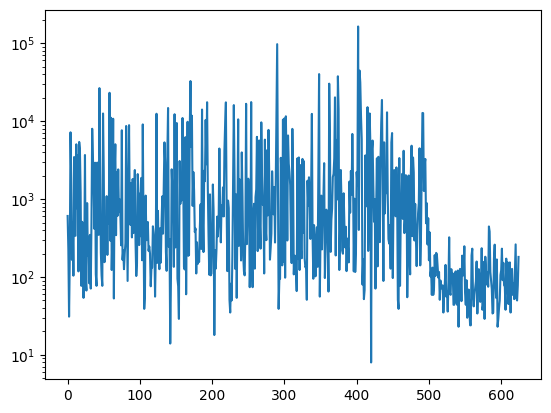

In [17]:
gns,cts = np.unique(genes,return_counts=True)
plt.semilogy(cts)

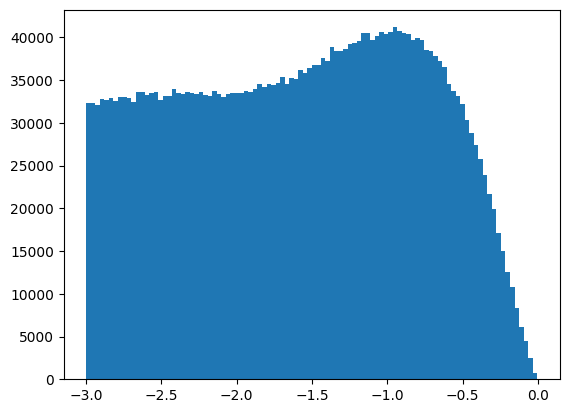

In [6]:
scoreA = np.load(fl)['scoreA']
import matplotlib.pylab as plt
plt.hist(scoreA,bins=100);